# Terminologies

In [1]:
# Financial_Terminologies:
'''FinancialInstitutions, Borrower, Lender, Legal Claims, Third-parties,
SocialSecurityNo's, Paystabs, w2s, ITR, DisclosureSigning, CreditReport, AssetDoc,
ESCROW instructions, Appraisal.'''

# FICO Score:
'''FICO score is a credit score created by the Fair Isaac Corporation (FICO).
Lenders use borrowers' FICO scores along with other details on borrowers'
A FICO Score above 670 is better than average, while scores above 740 indicate 
that the borrower is extremely responsible with credit.
A FICO Score above 800 is considered exceptional.'''

# Hardship
'''You are in financial hardship if you have difficulty paying your bills and 
repayments on your loans and debts when they are due.'''

# Settlement:
'''Settlement is the "final step in the transfer of ownership involving the physical
exchange of securities or payment". 
After settlement, the obligations of all the parties have been discharged and 
the transaction is considered complete.'''

'''Exchange of payment to the seller and 
the Transfer of securities to the buyer of a trade.'''
'*'

'*'

# PROBLEM CATEGORY

#### RISK ANALYSIS

# 1. PROBLEM STATEMENT

## To downsizing the risks involved in financial investments

## IMPORTING REQUIRED LIBRARIES

In [2]:
import pandas as pd # Data manipulation
import numpy as np # Numerical operations on Array

import re # String matches particular regular expression or vice-versa

import matplotlib.pyplot as plt # Visualizing Static, Animated, Interactive
import seaborn as sns # Visualize random distribution

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from catboost import Pool, CatBoostClassifier

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations
from statsmodels.stats.proportion import proportion_confint

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Financial_Risk_Assessment.csv') # Create DataFrame of the csv file
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       89824638        NaN    20000.0      20000.0          19750.0   
1      135727227        NaN    16000.0      16000.0          16000.0   
2      104347194        NaN    25750.0      25750.0          25750.0   
3        7668185        NaN    20000.0      20000.0          20000.0   
4        7355265        NaN    16000.0      16000.0          16000.0   
...          ...        ...        ...          ...              ...   
99995   56140812        NaN     9350.0       9350.0           9350.0   
99996    1167793        NaN    25000.0      25000.0          24900.0   
99997  141084437        NaN     4000.0       4000.0           4000.0   
99998   43349780        NaN    20250.0      20250.0          20250.0   
99999   70153523        NaN    18000.0      18000.0          18000.0   

             term  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months     10.99       654.68     B        B4  ...        12602.19   
1       36 months     11.05       524.20     B        B4  ...        16108.04   
2       60 months     12.74       582.48     C        C1  ...          582.48   
3       60 months     15.61       482.23     C        C3  ...          482.23   
4       36 months     17.10       571.25     C        C5  ...        14437.28   
...           ...       ...          ...   ...       ...  ...             ...   
99995   36 months     19.19       343.64     E        E3  ...         6034.10   
99996   60 months     21.48       683.11     E        E4  ...          683.11   
99997   36 months     15.02       138.71     C        C3  ...          138.71   
99998   36 months     12.29       675.40     C        C1  ...         4666.74   
99999   36 months     10.78       587.43     B        B4  ...          587.43   

      last_credit_pull_d policy_code  application_type debt_settlement_flag  \
0               Mar-2019         1.0        Individual                    N   
1               Mar-2019         1.0        Individual                    N   
2               Sep-2018         1.0        Individual                    N   
3               Apr-2017         1.0        Individual                    N   
4               Oct-2018         1.0        Individual                    N   
...                  ...         ...               ...                  ...   
99995           Jan-2017         1.0        Individual                    N   
99996           Feb-2017         1.0        Individual                    N   
99997           Mar-2019         1.0        Individual                    N   
99998           Mar-2019         1.0        Individual                    N   
99999           Dec-2016         1.0        Individual                    N   

      last_fico_range_high last_fico_range_low tot_coll_amt tot_cur_bal  \
0                    574.0               570.0          0.0    351251.0   
1                    719.0               715.0        958.0     98611.0   
2                    624.0               620.0          0.0     21926.0   
3                    514.0               510.0          0.0    240046.0   
4                    689.0               685.0          0.0    177022.0   
...                    ...                 ...          ...         ...   
99995                684.0               680.0          0.0     68046.0   
99996                594.0               590.0          NaN         NaN   
99997                699.0               695.0          0.0    313577.0   
99998                564.0               560.0          0.0     63482.0   
99999                559.0               555.0          0.0    147279.0   

      verification_status_joint  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
...                         ...  
99995                       NaN  
99996                       NaN  
99997               

In [8]:
list_num = list(df.select_dtypes('number').columns)
df_num = df[list_num]

In [9]:
df_num.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0   89824638        NaN    20000.0      20000.0          19750.0     10.99   
1  135727227        NaN    16000.0      16000.0          16000.0     11.05   

   installment  annual_inc  total_acc   total_pymnt  recoveries  \
0       654.68    140000.0       33.0  22420.055437         0.0   
1       524.20     74000.0       24.0  16088.404444         0.0   

   last_pymnt_amnt  policy_code  last_fico_range_high  last_fico_range_low  \
0         12602.19          1.0                 574.0                570.0   
1         16108.04          1.0                 719.0                715.0   

   tot_coll_amt  tot_cur_bal  
0           0.0     351251.0  
1         958.0      98611.0

In [10]:
df.describe()

id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  1.000000e+05        0.0  100000.000000  100000.000000    100000.000000   
mean   8.024553e+07        NaN   14998.272000   14992.925000     14975.619433   
std    4.505640e+07        NaN    9178.892661    9176.183457      9179.722753   
min    5.670500e+04        NaN     600.000000     600.000000         0.000000   
25%    4.477614e+07        NaN    8000.000000    8000.000000      8000.000000   
50%    8.454568e+07        NaN   12800.000000   12800.000000     12800.000000   
75%    1.226545e+08        NaN   20000.000000   20000.000000     20000.000000   
max    1.456361e+08        NaN   40000.000000   40000.000000     40000.000000   

            int_rate    installment    annual_inc     total_acc  \
count  100000.000000  100000.000000  1.000000e+05  99998.000000   
mean       13.096431     444.497273  7.760486e+04     24.140923   
std         4.838397     266.607844  7.296191e+04     12.021770   
min         5.310000      21.590000  0.000000e+00      1.000000   
25%         9.490000     251.327500  4.600000e+04     15.000000   
50%        12.620000     377.040000  6.500000e+04     22.000000   
75%        15.990000     589.810000  9.300000e+04     31.000000   
max        30.990000    1618.030000  8.706582e+06    162.000000   

         total_pymnt     recoveries  last_pymnt_amnt  policy_code  \
count  100000.000000  100000.000000    100000.000000     100000.0   
mean    12051.711814     143.818737      3425.416585          1.0   
std      9866.800168     751.602452      5995.142546          0.0   
min         0.000000       0.000000         0.000000          1.0   
25%      4529.830000       0.000000       309.740000          1.0   
50%      9331.980057       0.000000       600.730000          1.0   
75%     16907.257505       0.000000      3767.027500          1.0   
max     62670.382315   34740.400000     40729.130000          1.0   

       last_fico_range_high  last_fico_range_low   tot_coll_amt   tot_cur_bal  
count         100000.000000        100000.000000   96809.000000  9.680900e+04  
mean             687.507100           675.399000     236.684017  1.430540e+05  
std               72.800584           110.924413    2144.823333  1.603586e+05  
min                0.000000             0.000000       0.000000  0.000000e+00  
25%              654.000000           650.000000       0.000000  2.909200e+04  
50%              699.000000           695.000000       0.000000  7.933100e+04  
75%              734.000000           730.000000       0.000000  2.143330e+05  
max              850.000000           845.000000  262740.000000  3.608951e+06

In [11]:
from sklearn.preprocessing import StandardScaler # let's standardize numerical features
scaler = StandardScaler()
def Standardize(x):
    '''Pass the dataframe to be transformed to this function'''
    df_numerical_std = scaler.fit_transform(x)
    return df_numerical_std

In [12]:
from sklearn.preprocessing import normalize #let's Normalize numerical features
def Normalize_data(x):
    '''Pass the dataframe to be Normalized to this function'''
    return normalize(x)

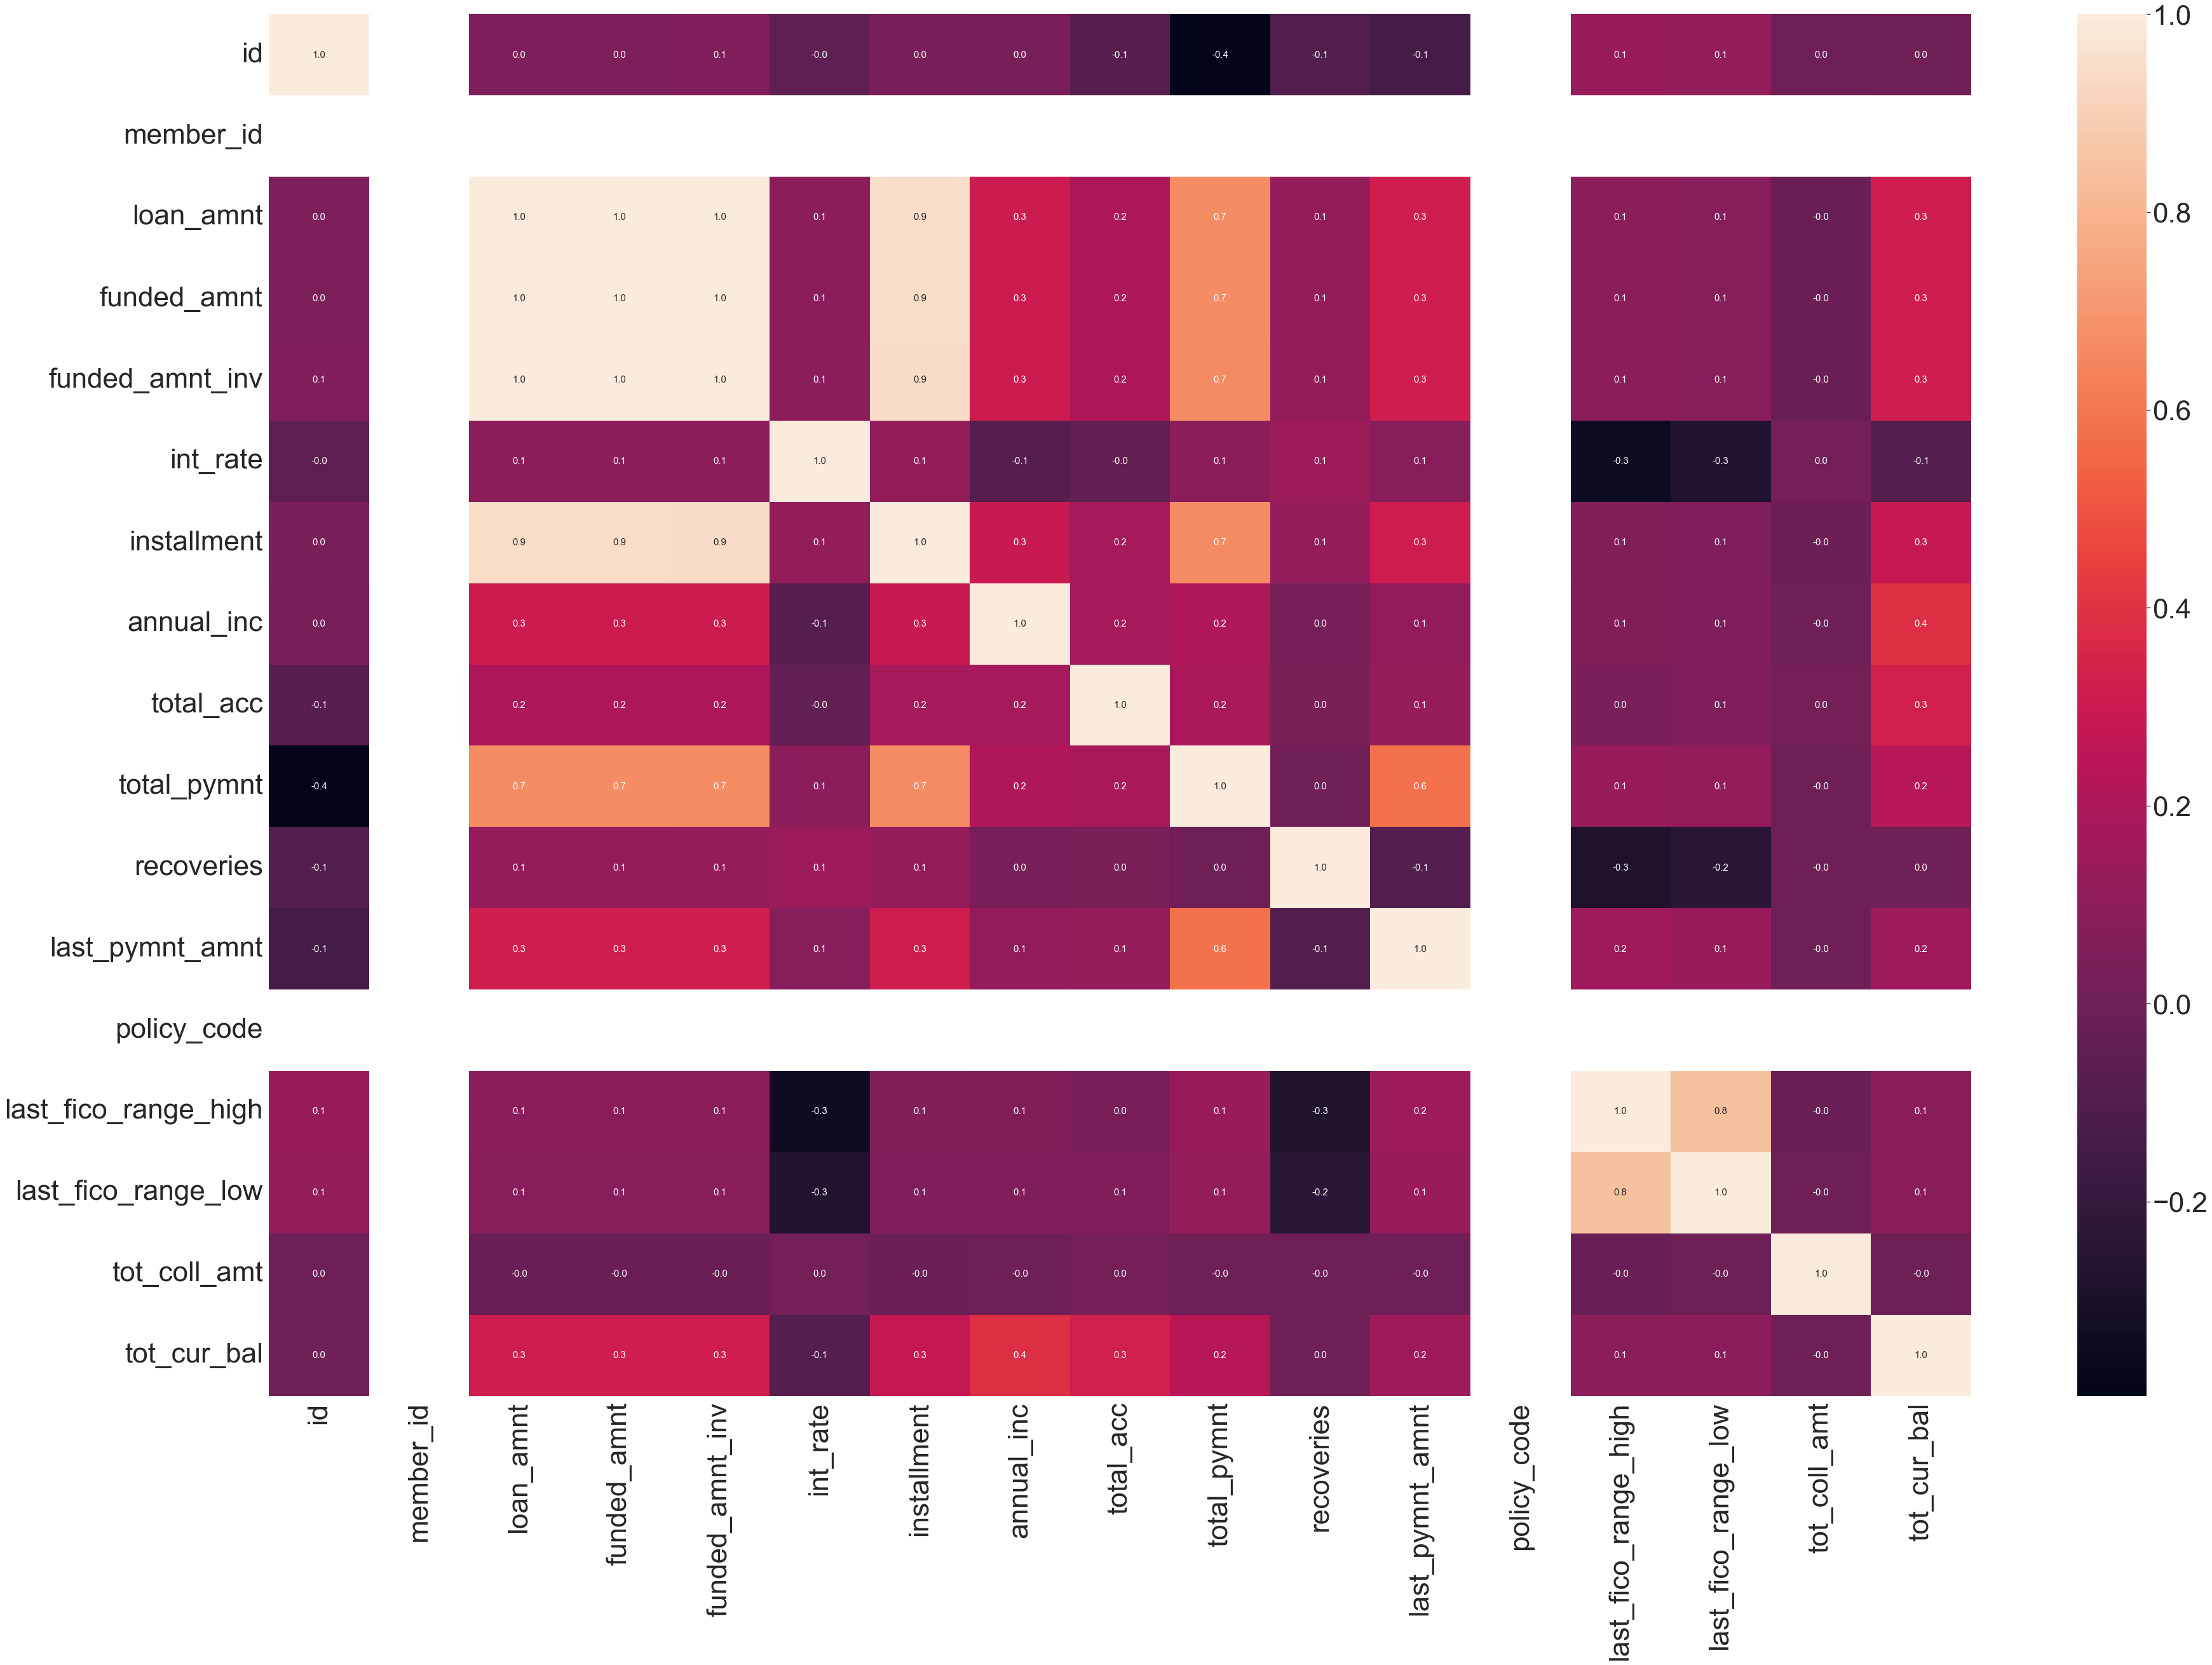

In [13]:
# PLOTTING CORRELATION HEATMAP:
sns.set(rc={'figure.figsize':(60,40)})#Setting Figure Size
sns.set(font_scale = 4) #Setting Axis Labels Font Size
sns.set_style('whitegrid') # Setting Style
# HeatMap
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 15},fmt='.1f') # Rounding
plt.show()

# Pre-Processing

### Dealing With Missing Data

In [14]:
# Total percentage of null value in the data
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100

8.626277777777776

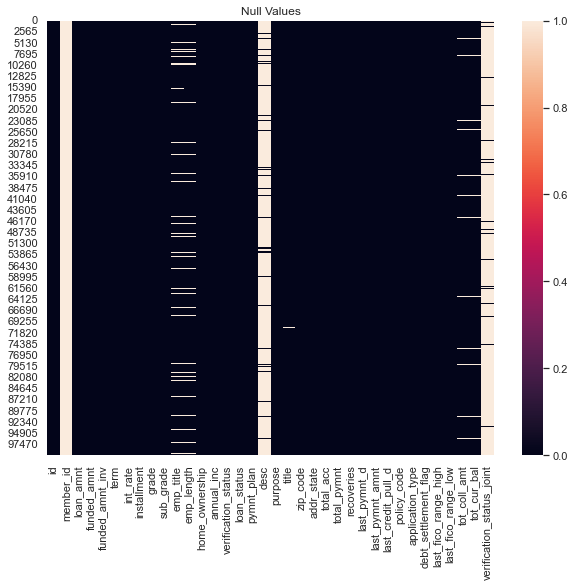

In [15]:
# Check for Null values using Heatmap
def Plot_Null_Values(x):
    sns.set(font_scale = 1)
    plt.figure(figsize=(10,8))
    plt.title('Null Values')
    sns.heatmap(x.isna())
Plot_Null_Values(df)

In [16]:
null_value = df.isna().mean()*100 # Plotting null value in percentage
null_value[null_value >15].sort_values()

desc                          94.318
verification_status_joint     94.950
member_id                    100.000
dtype: float64

In [17]:
null_colabv_15 = [col for col in df.columns if df[col].isna().mean()*100 >15]
null_colabv_15

['member_id', 'desc', 'verification_status_joint']

In [18]:
df.drop(null_colabv_15,axis=1,inplace=True)

0.6447878787878788 %


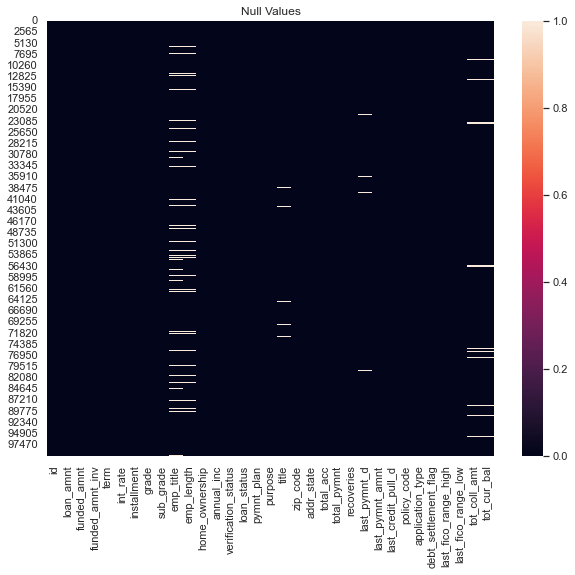

In [19]:
# Total percentage of null value in the data
null_perc = df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100
print(null_perc,'%')
# Check for Null values using Heatmap
def Plot_Null_Values(x):
    sns.set(font_scale = 1)
    plt.figure(figsize=(10,8))
    plt.title('Null Values')
    sns.heatmap(x.isna())
Plot_Null_Values(df)

In [20]:
null_col1 = [col for col in df.columns if df[col].isna().mean()*100 >0]
# null_col1

In [21]:
df['emp_length'] = df['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype('float')

In [22]:
numerical_feat = df.select_dtypes('number').columns.values

In [23]:
df[numerical_feat].isna().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
emp_length              6451
annual_inc                 0
total_acc                  2
total_pymnt                0
recoveries                 0
last_pymnt_amnt            0
policy_code                0
last_fico_range_high       0
last_fico_range_low        0
tot_coll_amt            3191
tot_cur_bal             3191
dtype: int64

In [24]:
print(numerical_feat)
print(len(numerical_feat))

['id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'int_rate' 'installment'
 'emp_length' 'annual_inc' 'total_acc' 'total_pymnt' 'recoveries'
 'last_pymnt_amnt' 'policy_code' 'last_fico_range_high'
 'last_fico_range_low' 'tot_coll_amt' 'tot_cur_bal']
17


In [25]:
fill_empty = ['emp_title', 'verification_status_joint'] 
#list of col's supposed to be filled with nothing

fill_max = ['bc_open_to_buy', 'mo_sin_old_il_acct', 'mths_since_last_delinq',
            'mths_since_last_major_derog', 'mths_since_last_record',
            'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
            'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
            'pct_tl_nvr_dlq','sec_app_mths_since_last_major_derog']
#list of col's supposed to be filled with max

fill_min = np.setdiff1d(df.columns.values, np.append(fill_empty, fill_max))
# list of col's supposed to be filled with min

In [26]:
for col in numerical_feat:
    if col in fill_empty:
        df[col] = df[col].fillna('') # Filling with null/nan value ie. nothing
    elif col in fill_max:
        df[col] = df[col].fillna(df[col].max()) #Filling with max
    elif col in fill_min:
        df[col] = df[col].fillna(df[col].min()) # Filling with min
df[numerical_feat].isna().sum() # Checking all the removed Null values

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
int_rate                0
installment             0
emp_length              0
annual_inc              0
total_acc               0
total_pymnt             0
recoveries              0
last_pymnt_amnt         0
policy_code             0
last_fico_range_high    0
last_fico_range_low     0
tot_coll_amt            0
tot_cur_bal             0
dtype: int64

0.2558484848484849 %


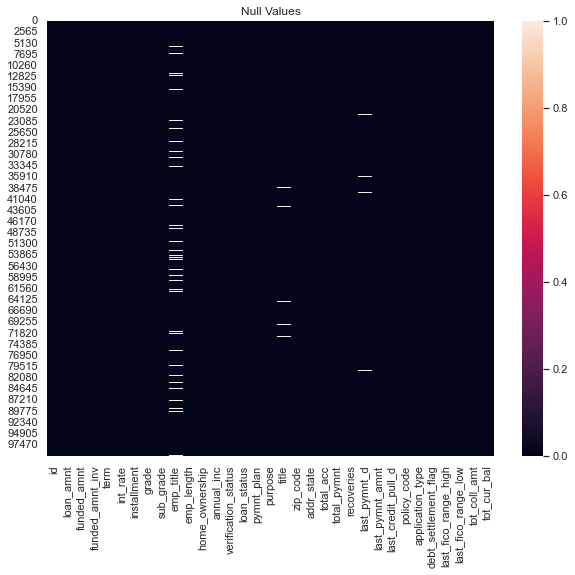

In [27]:
# Total percentage of null value in the data
null_perc = df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100
print(null_perc,'%')
# Check for Null values using Heatmap
Plot_Null_Values(df)

In [28]:
# Handling Missing values for categorical columns

In [29]:
categorical_feat = df.select_dtypes('object').columns.values

In [30]:
(df[categorical_feat].isnull().sum().sum())/(df[categorical_feat].shape[0]*df[categorical_feat].shape[1])*100

0.5276875000000001

In [31]:
categorical_feat

array(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'title', 'zip_code', 'addr_state', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'debt_settlement_flag'],
      dtype=object)

In [32]:
df.drop(['emp_title'], axis=1, errors='ignore',inplace=True)

In [33]:
categorical_feat_1 = df.select_dtypes('object').columns.values
categorical_feat_1

array(['term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'title', 'zip_code', 'addr_state', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'debt_settlement_flag'],
      dtype=object)

In [34]:
cat_na_list = [] # Creating list of categorical variables having null 
for feature in categorical_feat_1:
    if df[feature].isna().sum() > 0:
        cat_na_list.append(feature)
cat_na_list

['title', 'last_pymnt_d', 'last_credit_pull_d']

In [35]:
print([df[feat].nunique() for feat in cat_na_list],'nunique')

[4299, 129, 118] nunique


In [36]:
df.isna().sum().sum()/df.shape[0]*df.shape[1]

0.35616

In [37]:
df.dropna(inplace=True)

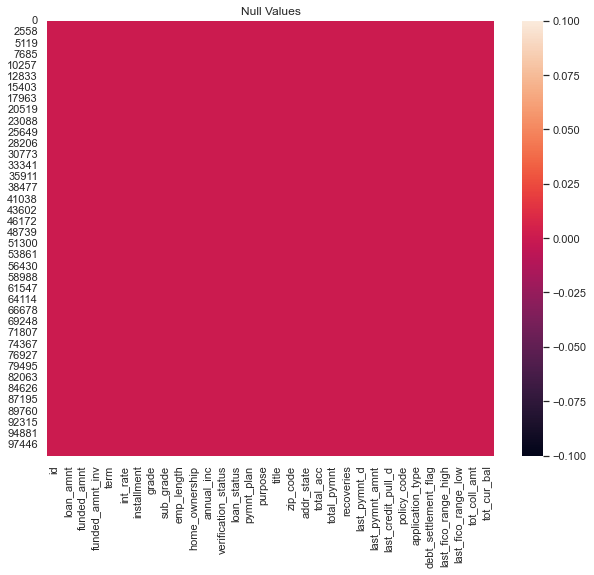

In [38]:
Plot_Null_Values(df)

In [39]:
df.isna().sum().sum()

0

In [40]:
df.shape

(98890, 32)

## Correlation

In [41]:
numerical_feat = df.select_dtypes('number').columns.values
df[numerical_feat].nunique().sort_values()

policy_code                 1
emp_length                 11
last_fico_range_low        71
last_fico_range_high       72
total_acc                 111
int_rate                  561
loan_amnt                1432
funded_amnt              1434
funded_amnt_inv          1857
tot_coll_amt             3739
recoveries               7485
annual_inc               8769
installment             28168
last_pymnt_amnt         59998
tot_cur_bal             79461
total_pymnt             92861
id                      98890
dtype: int64

In [42]:
df = df.drop(['policy_code', 'id'], axis=1, errors='ignore')

In [43]:
numerical_feat = df.select_dtypes('number').columns.values

In [44]:
# Numerical Correlation
numerical_feat = df.select_dtypes('number').columns.values
comb_num_feat = np.array(list(combinations(numerical_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(df[comb[0]], df[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [45]:
print(corr_num_feat,type(corr_num_feat))
print(comb_num_feat,type(comb_num_feat))

[ 0.99975104  0.99910012  0.09339205  0.94568898  0.10633216  0.30116226
  0.19837282  0.66791802  0.12564836  0.32169211  0.09947324  0.08130769
 -0.01690852  0.31662958  0.99941944  0.09338066  0.94601542  0.1063027
  0.30113877  0.19830704  0.66772009  0.12577698  0.32163551  0.09931814
  0.08116837 -0.01685077  0.31722443  0.09345129  0.94523178  0.106699
  0.30093269  0.19804851  0.66685021  0.1254036   0.32143212  0.09937931
  0.08129026 -0.01671585  0.31818988  0.11995618 -0.01323716 -0.08055304
 -0.04333664  0.10125714  0.1433156   0.0803869  -0.34718759 -0.27137312
  0.01408435 -0.08424837  0.09107035  0.29131513  0.1779401   0.66598704
  0.12563258  0.30846334  0.06623117  0.05570707 -0.01143918  0.28343673
  0.09470605  0.11178475  0.1089399   0.01574394  0.06385774  0.01887657
  0.02172928  0.00147051  0.11946066  0.1757422   0.21286066  0.02720455
  0.11095678  0.06002094  0.05435452 -0.00136862  0.38050779  0.18966426
  0.04409911  0.13112858  0.03540607  0.0529892   0.02

In [46]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.9]
high_corr_num

array([['loan_amnt', 'funded_amnt'],
       ['loan_amnt', 'funded_amnt_inv'],
       ['loan_amnt', 'installment'],
       ['funded_amnt', 'funded_amnt_inv'],
       ['funded_amnt', 'installment'],
       ['funded_amnt_inv', 'installment']], dtype='<U20')

In [47]:
df.shape

(98890, 30)

In [48]:
df = df.drop(np.unique(high_corr_num[:, 1]), axis=1, errors='ignore')

In [49]:
df.shape

(98890, 27)

In [50]:
cat_feat = df.select_dtypes('object').columns.values
df[cat_feat].nunique().sort_values()

term                       2
pymnt_plan                 2
application_type           2
debt_settlement_flag       2
verification_status        3
home_ownership             6
grade                      7
loan_status                9
purpose                   14
sub_grade                 35
addr_state                51
last_credit_pull_d       118
last_pymnt_d             129
zip_code                 879
title                   4297
dtype: int64

In [51]:
df.shape

(98890, 27)

In [52]:
cat_feat

array(['term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'title', 'zip_code', 'addr_state', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'debt_settlement_flag'],
      dtype=object)

In [53]:
cat_feat = df.select_dtypes('object').columns.values
comb_cat_feat = np.array(list(combinations(cat_feat, 2)))
corr_cat_feat = np.array([])
for comb in comb_cat_feat:
#     table = pd.pivot_table(df, index=comb[0], columns=comb[1], aggfunc='count').fillna(0)
    table1 = pd.crosstab(df[comb[0]],df[comb[1]])
    corr = np.sqrt(chi2_contingency(table1)[0] / (table1.values.sum() * (np.min(table1.shape) - 1) ) )
    corr_cat_feat = np.append(corr_cat_feat, corr)

In [54]:
corr_cat_feat

array([0.38083074, 0.39173142, 0.10855703, 0.0984117 , 0.17889088,
       0.00207245, 0.10054724, 0.2187333 , 0.1235341 , 0.05917989,
       0.12176504, 0.06784608, 0.07049123, 0.0240318 , 1.        ,
       0.03879413, 0.17573017, 0.09628311, 0.0081289 , 0.07608887,
       0.23228901, 0.09607337, 0.02596176, 0.06743435, 0.06541138,
       0.01658301, 0.06832719, 0.04727612, 0.19019034, 0.08955869,
       0.01637186, 0.058664  , 0.22045966, 0.09402721, 0.02284561,
       0.04897633, 0.04361502, 0.03529554, 0.07281968, 0.03115501,
       0.04074096, 0.00631797, 0.08710852, 0.2843798 , 0.18670688,
       0.11490455, 0.0930816 , 0.03747426, 0.07843025, 0.01400289,
       0.09001778, 0.00340073, 0.06565813, 0.23643954, 0.10138233,
       0.03071178, 0.10770901, 0.07792864, 0.05643999, 0.03738095,
       0.18405366, 0.0508221 , 0.43382594, 0.09476595, 0.03159468,
       0.43471924, 0.29631965, 0.18554148, 0.33640624, 0.01564875,
       0.01711574, 0.08040658, 0.01810238, 0.02062051, 0.01410

In [55]:
print(len(comb_cat_feat))
print(len(corr_cat_feat))

105
105


In [56]:
high_corr_cat = comb_cat_feat[corr_cat_feat >= 0.9]
high_corr_cat

array([['grade', 'sub_grade'],
       ['purpose', 'title'],
       ['zip_code', 'addr_state']], dtype='<U20')

In [57]:
high_corr_cat[:, 1]

array(['sub_grade', 'title', 'addr_state'], dtype='<U20')

In [58]:
df.drop(np.unique(high_corr_cat[:, 1]), axis=1, errors='ignore',inplace=True)

In [59]:
df.shape

(98890, 24)

In [60]:
df.iloc[98889]

loan_amnt                    18000.0
term                       36 months
int_rate                       10.78
grade                              B
emp_length                       8.0
home_ownership              MORTGAGE
annual_inc                   70000.0
verification_status     Not Verified
loan_status              Charged Off
pymnt_plan                         n
purpose                  credit_card
zip_code                       891xx
total_acc                       41.0
total_pymnt                  3377.21
recoveries                    1625.7
last_pymnt_d                May-2016
last_pymnt_amnt               587.43
last_credit_pull_d          Dec-2016
application_type          Individual
debt_settlement_flag               N
last_fico_range_high           559.0
last_fico_range_low            555.0
tot_coll_amt                     0.0
tot_cur_bal                 147279.0
Name: 99999, dtype: object

# Visualization

In [61]:
# Settings--> for visualization of subplot's
# Writing function--> for Plotting Box and Sub plot's
def Set_size_subplot():
    BIGGER_SIZE = 35
    plt.rc('xtick', labelsize=35)
    plt.rc('ytick',labelsize=35)
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)
    plt.figure(figsize=(2,1))

def Set_plot():
    SIZE = 10
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick',labelsize=10)
    plt.rc('font', size=SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
    plt.rc('legend', fontsize=SIZE)    # legend fontsize
    plt.rc('figure', titlesize=SIZE)
def Plot_Numerical_BoxandSub(x):
    plt.subplot(121)
    sns.kdeplot(x,fill=True);
    plt.subplot(122)
#     x.plot.box(figsize=(8,3))
    plt.boxplot(x)
    plt.show()

# Visualizing for Skewness and Outliers

## Visualizing Actual Data

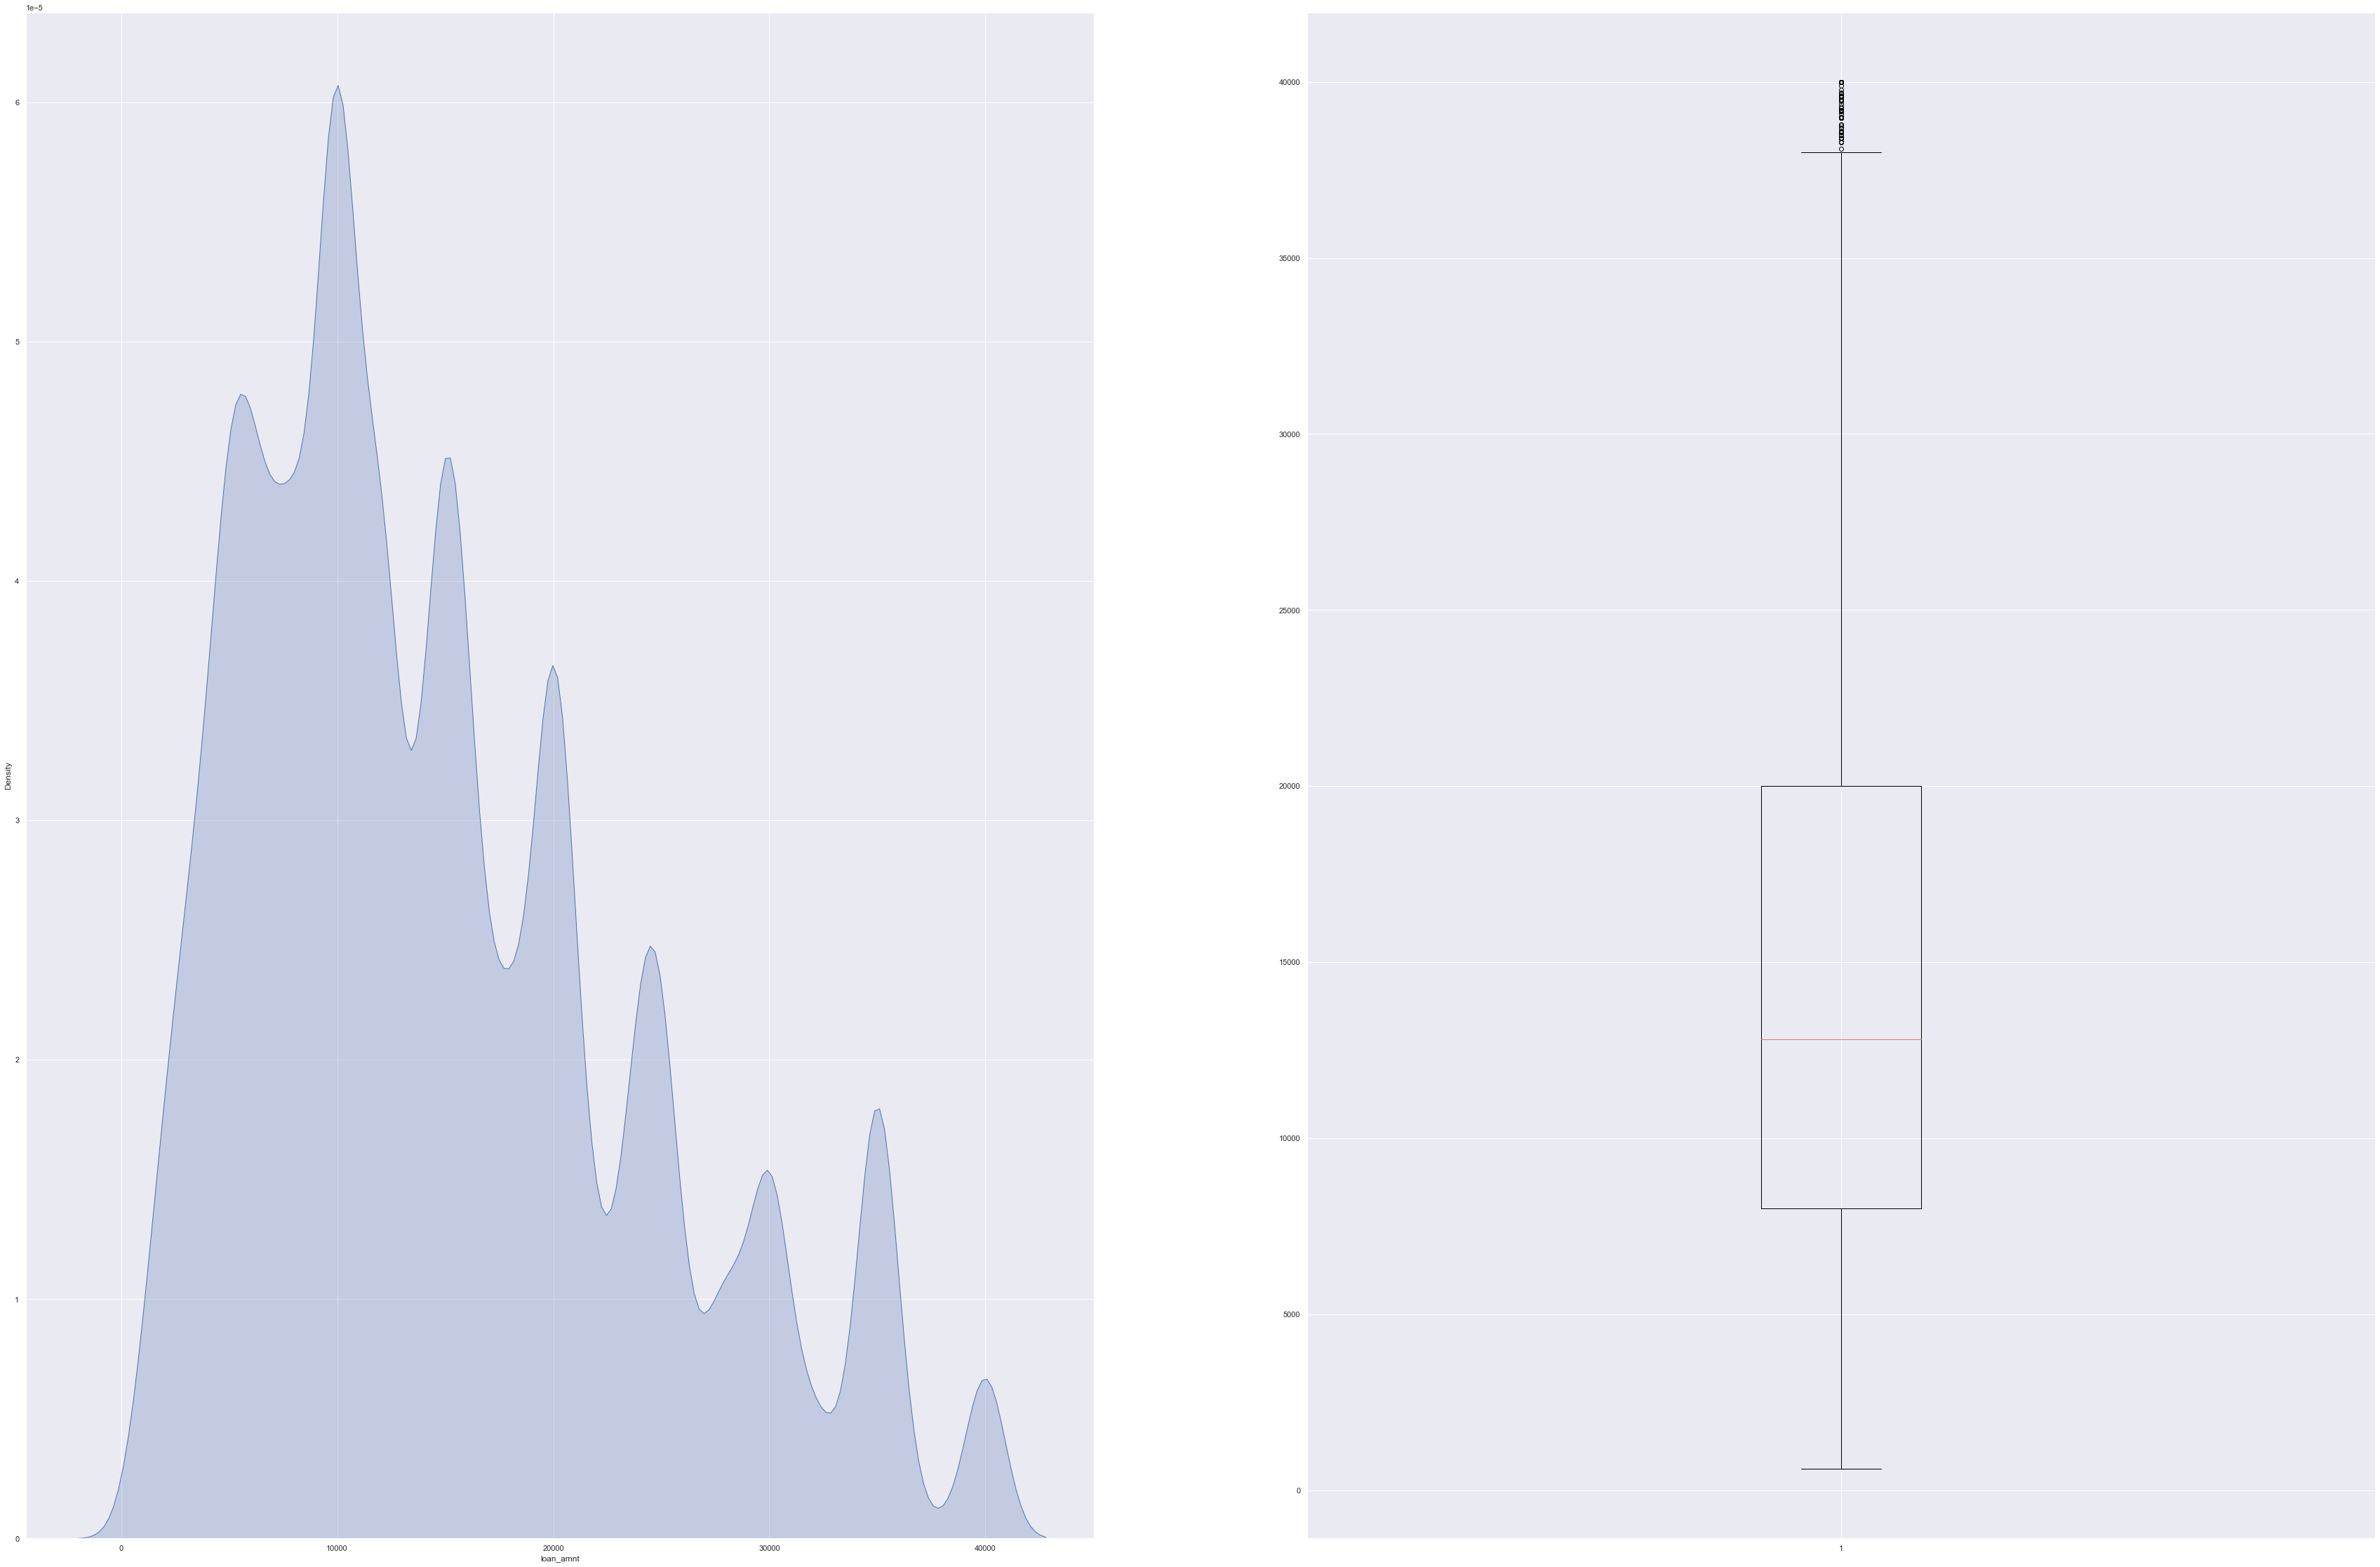

None


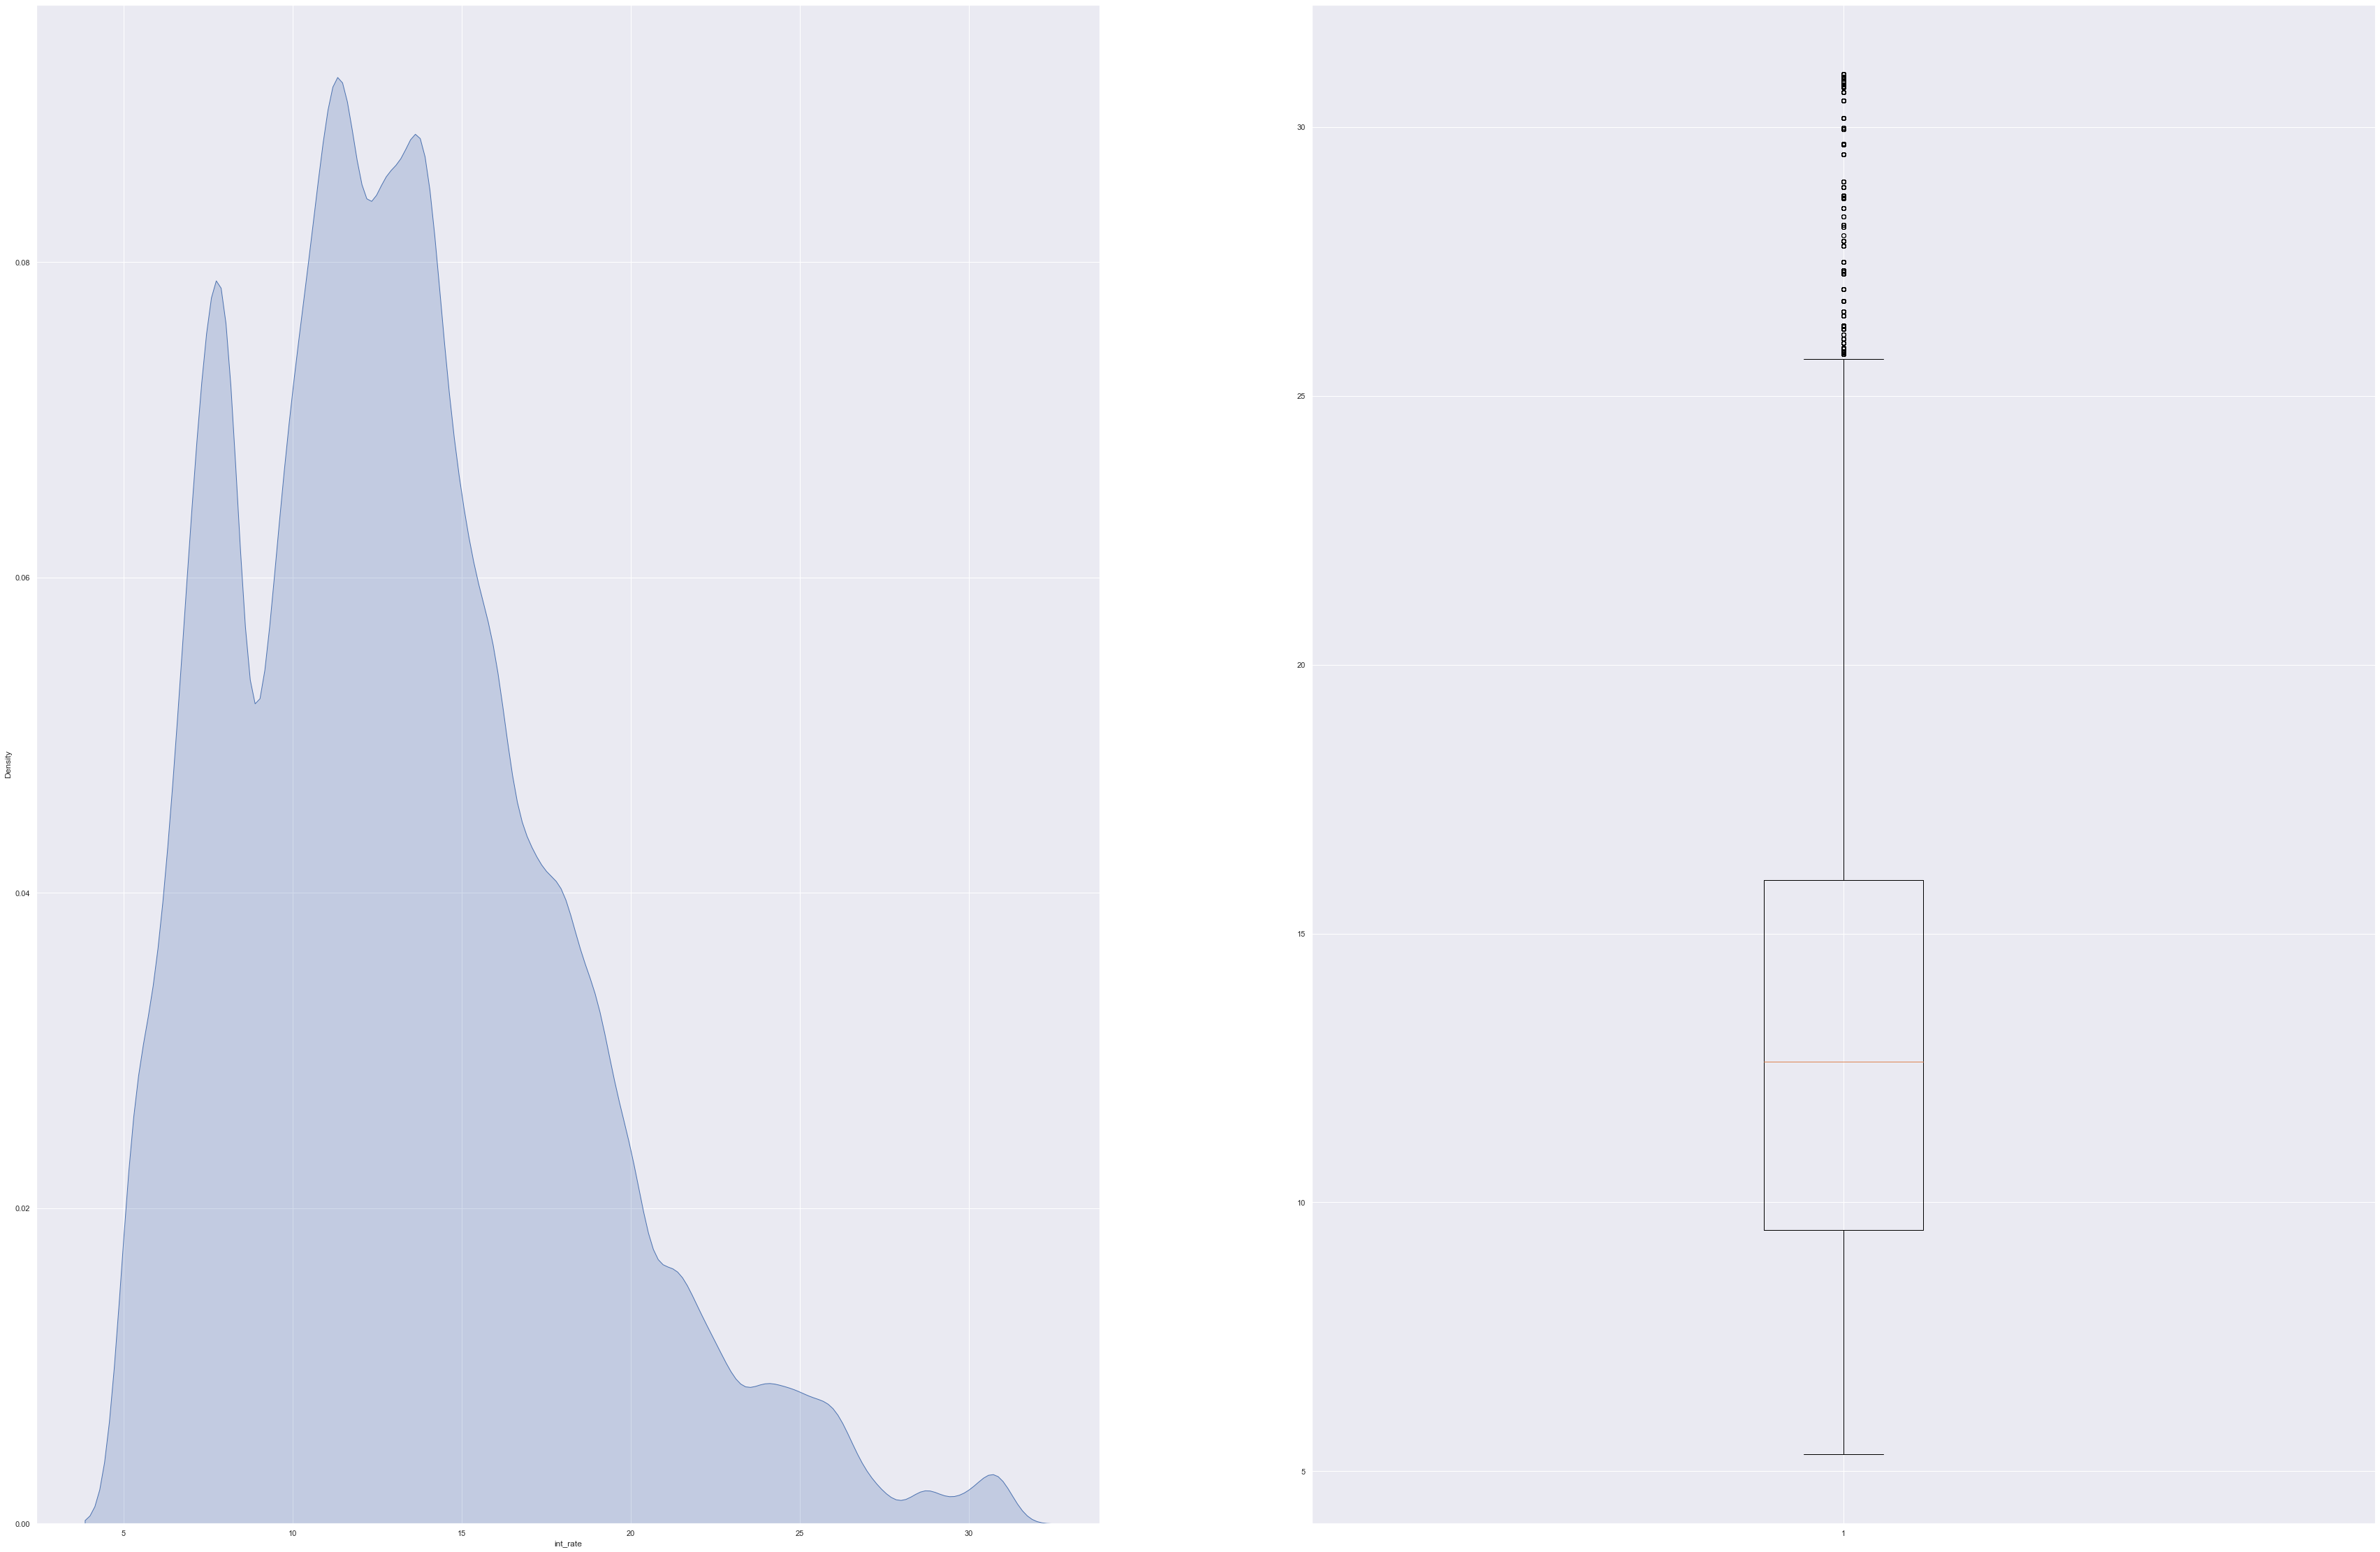

None


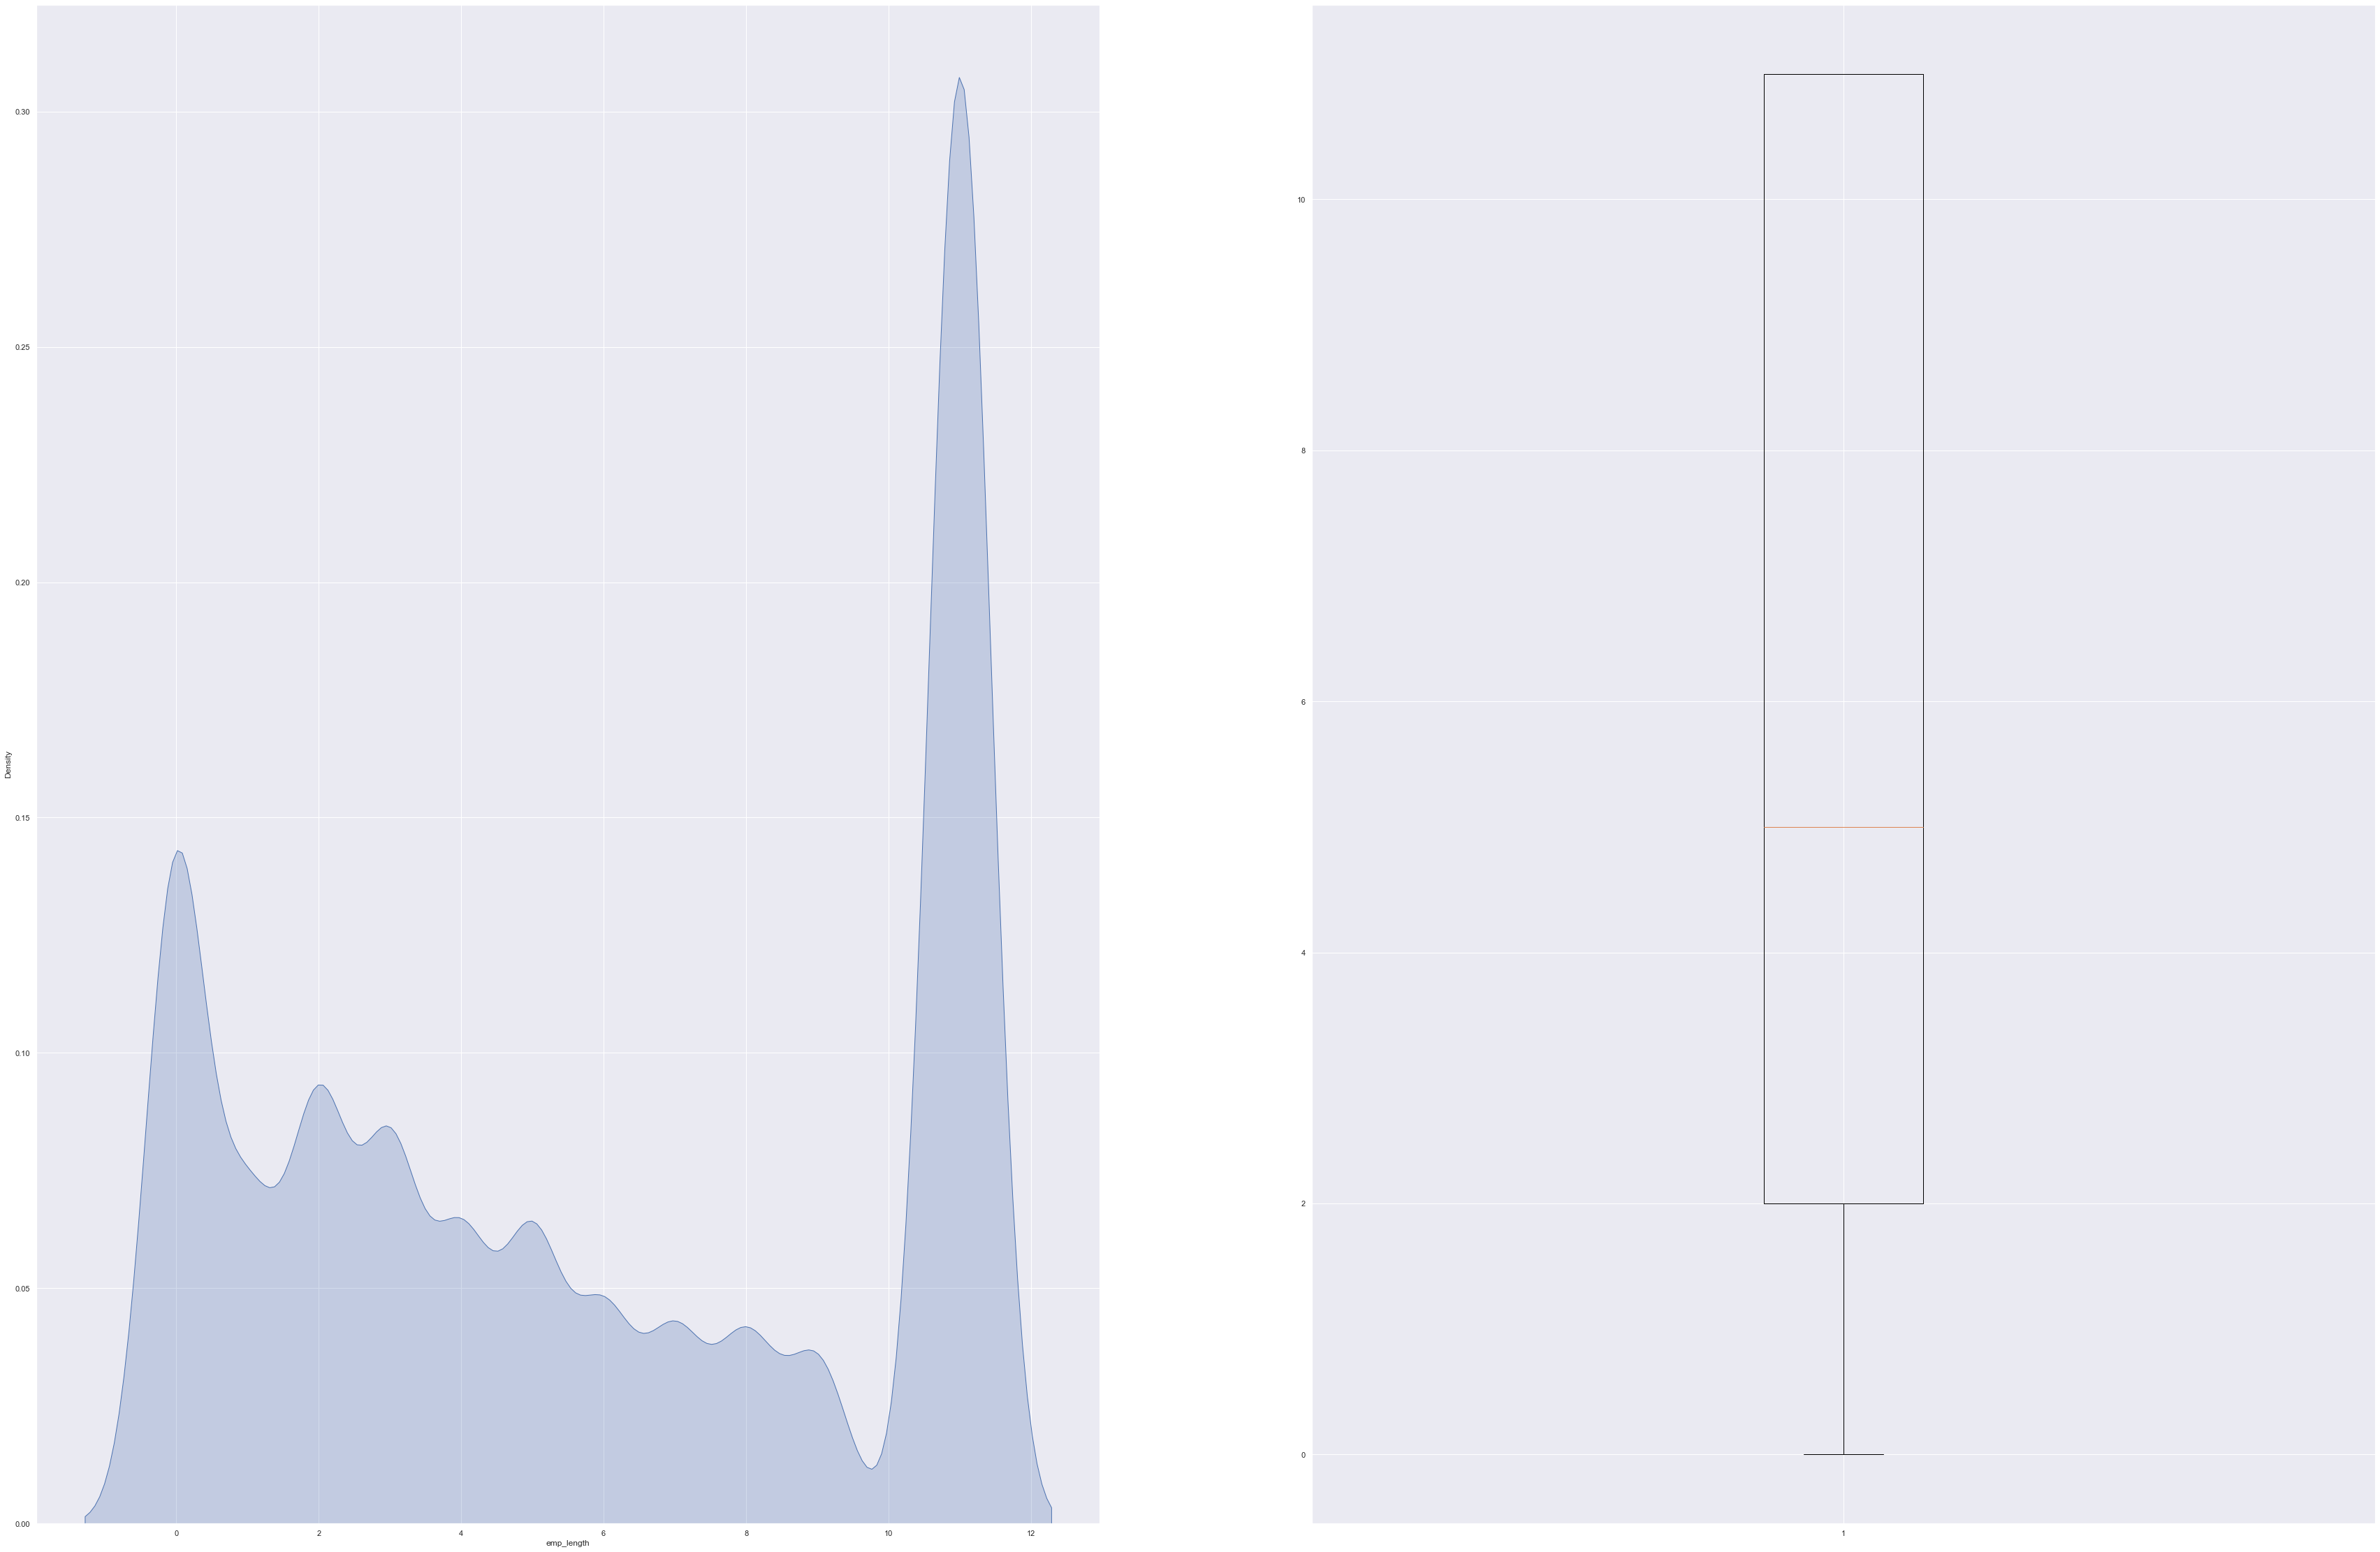

None


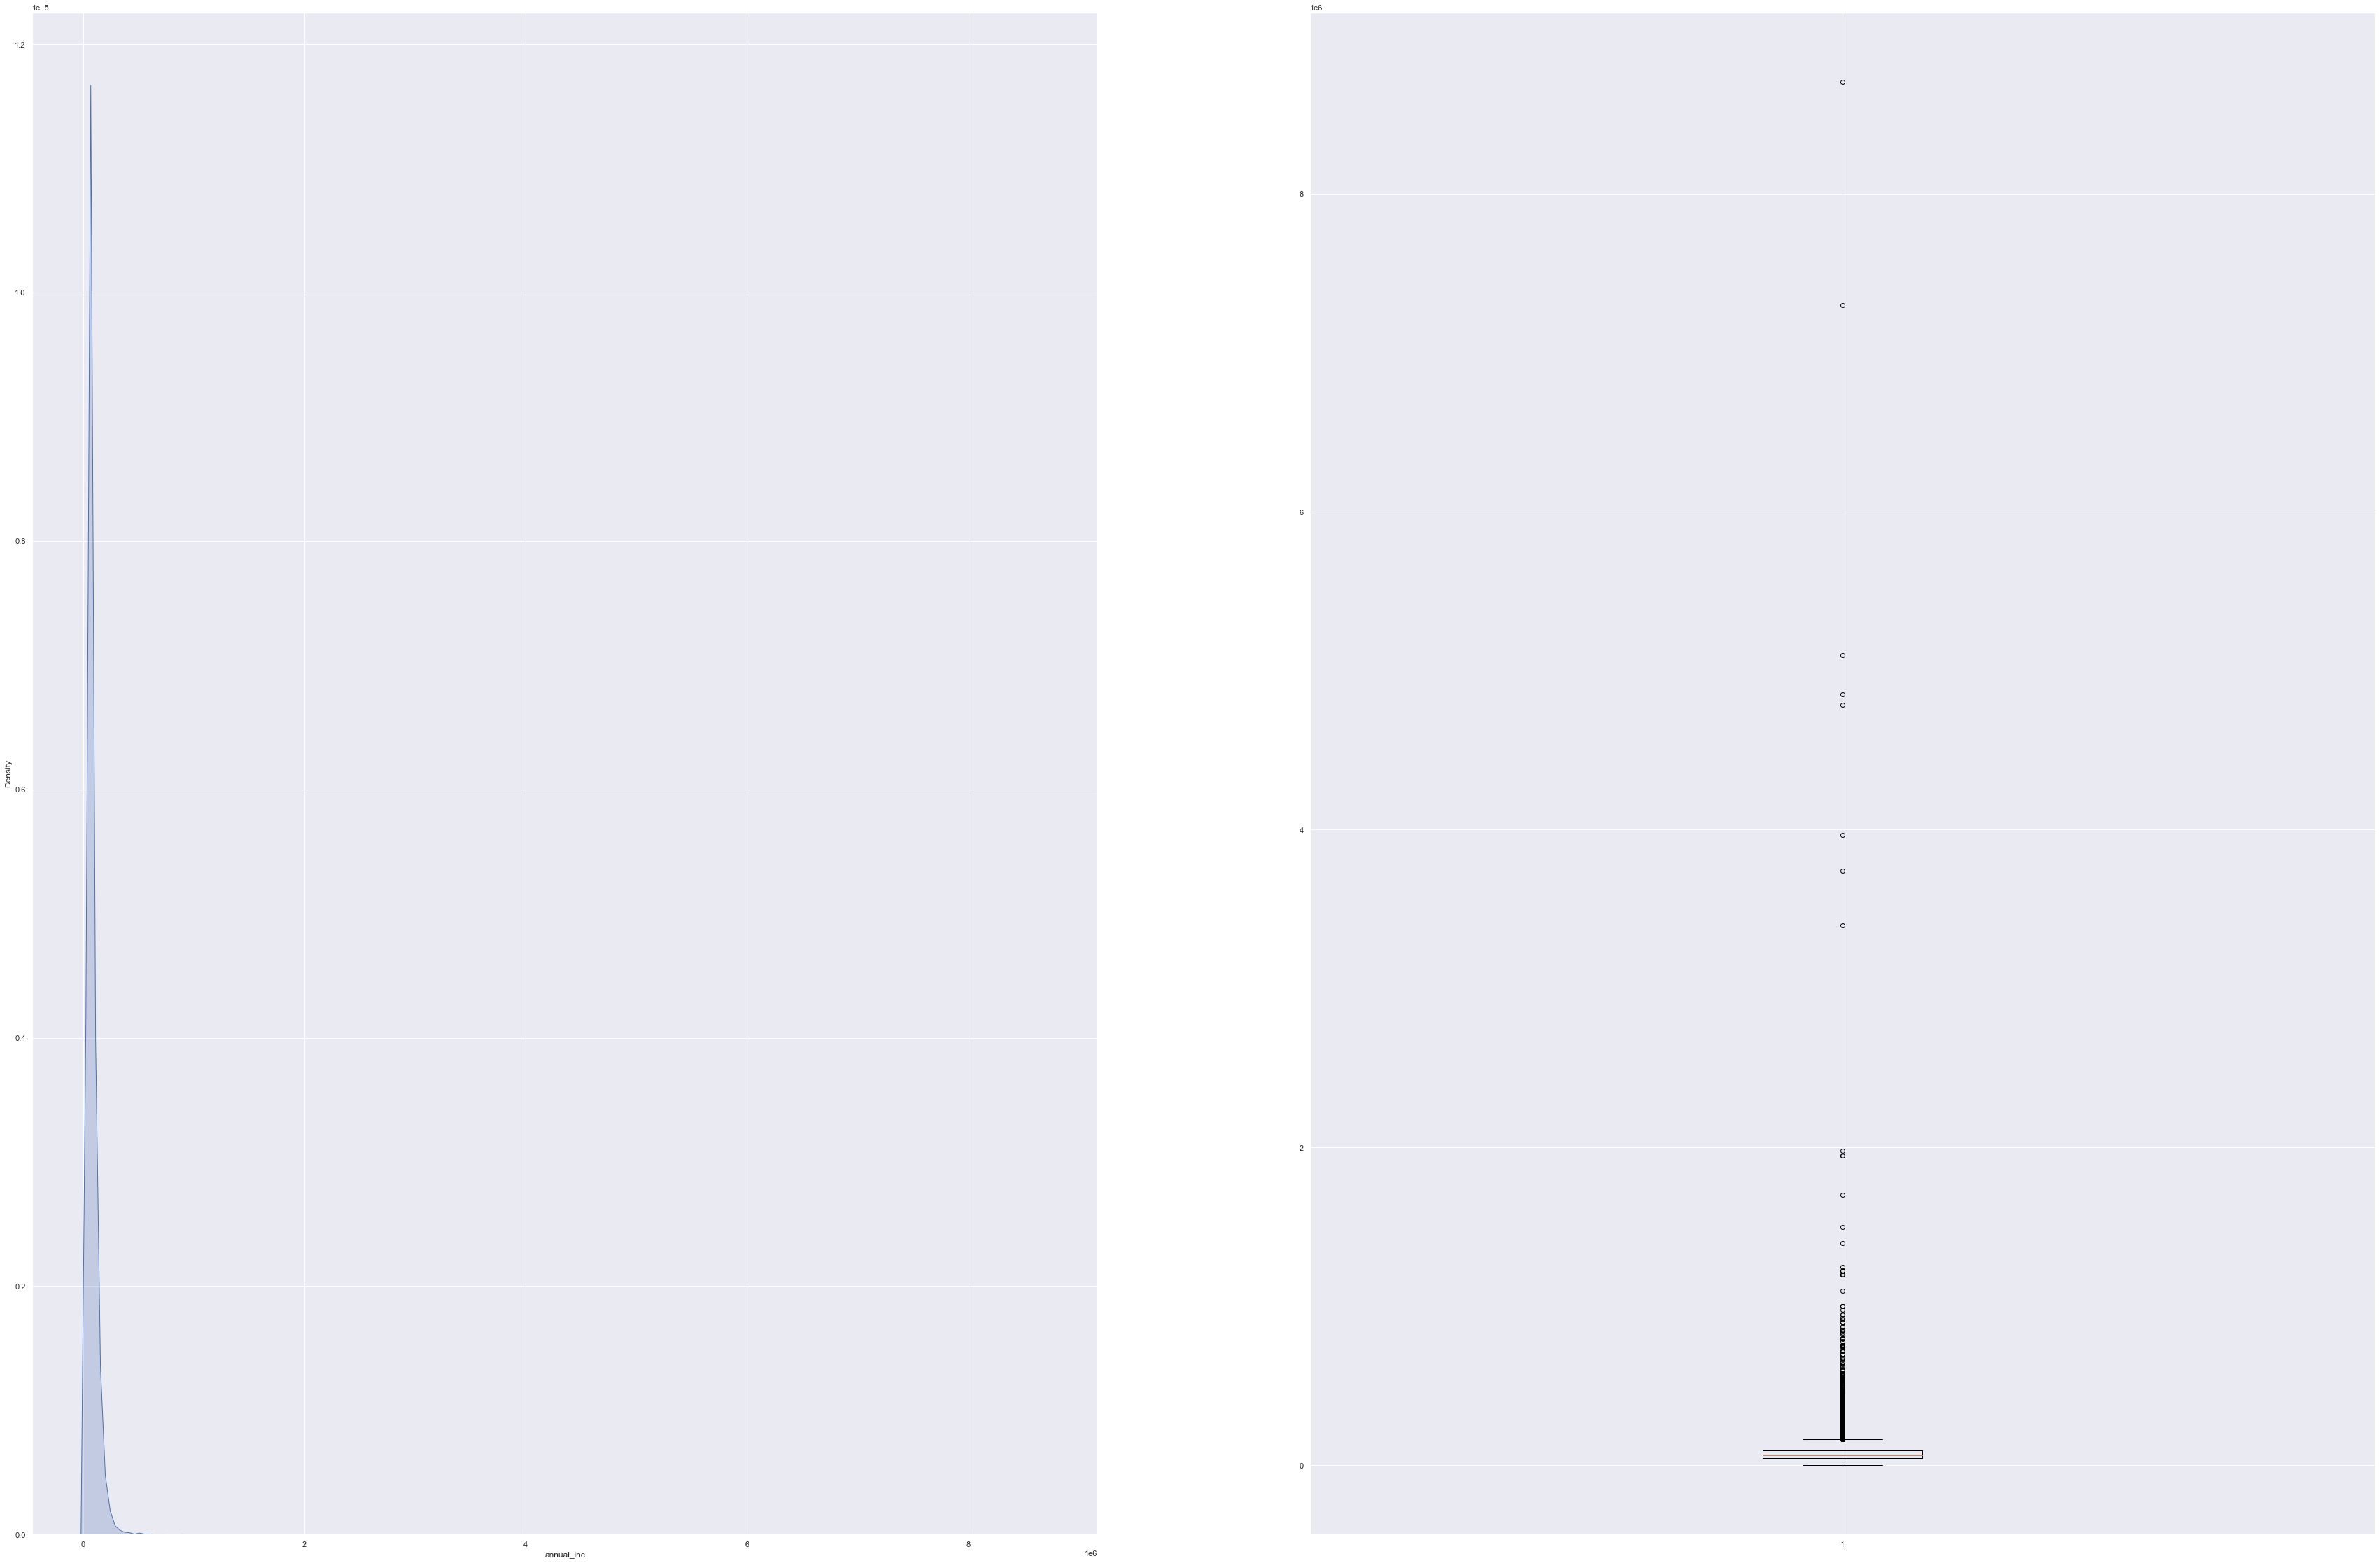

None


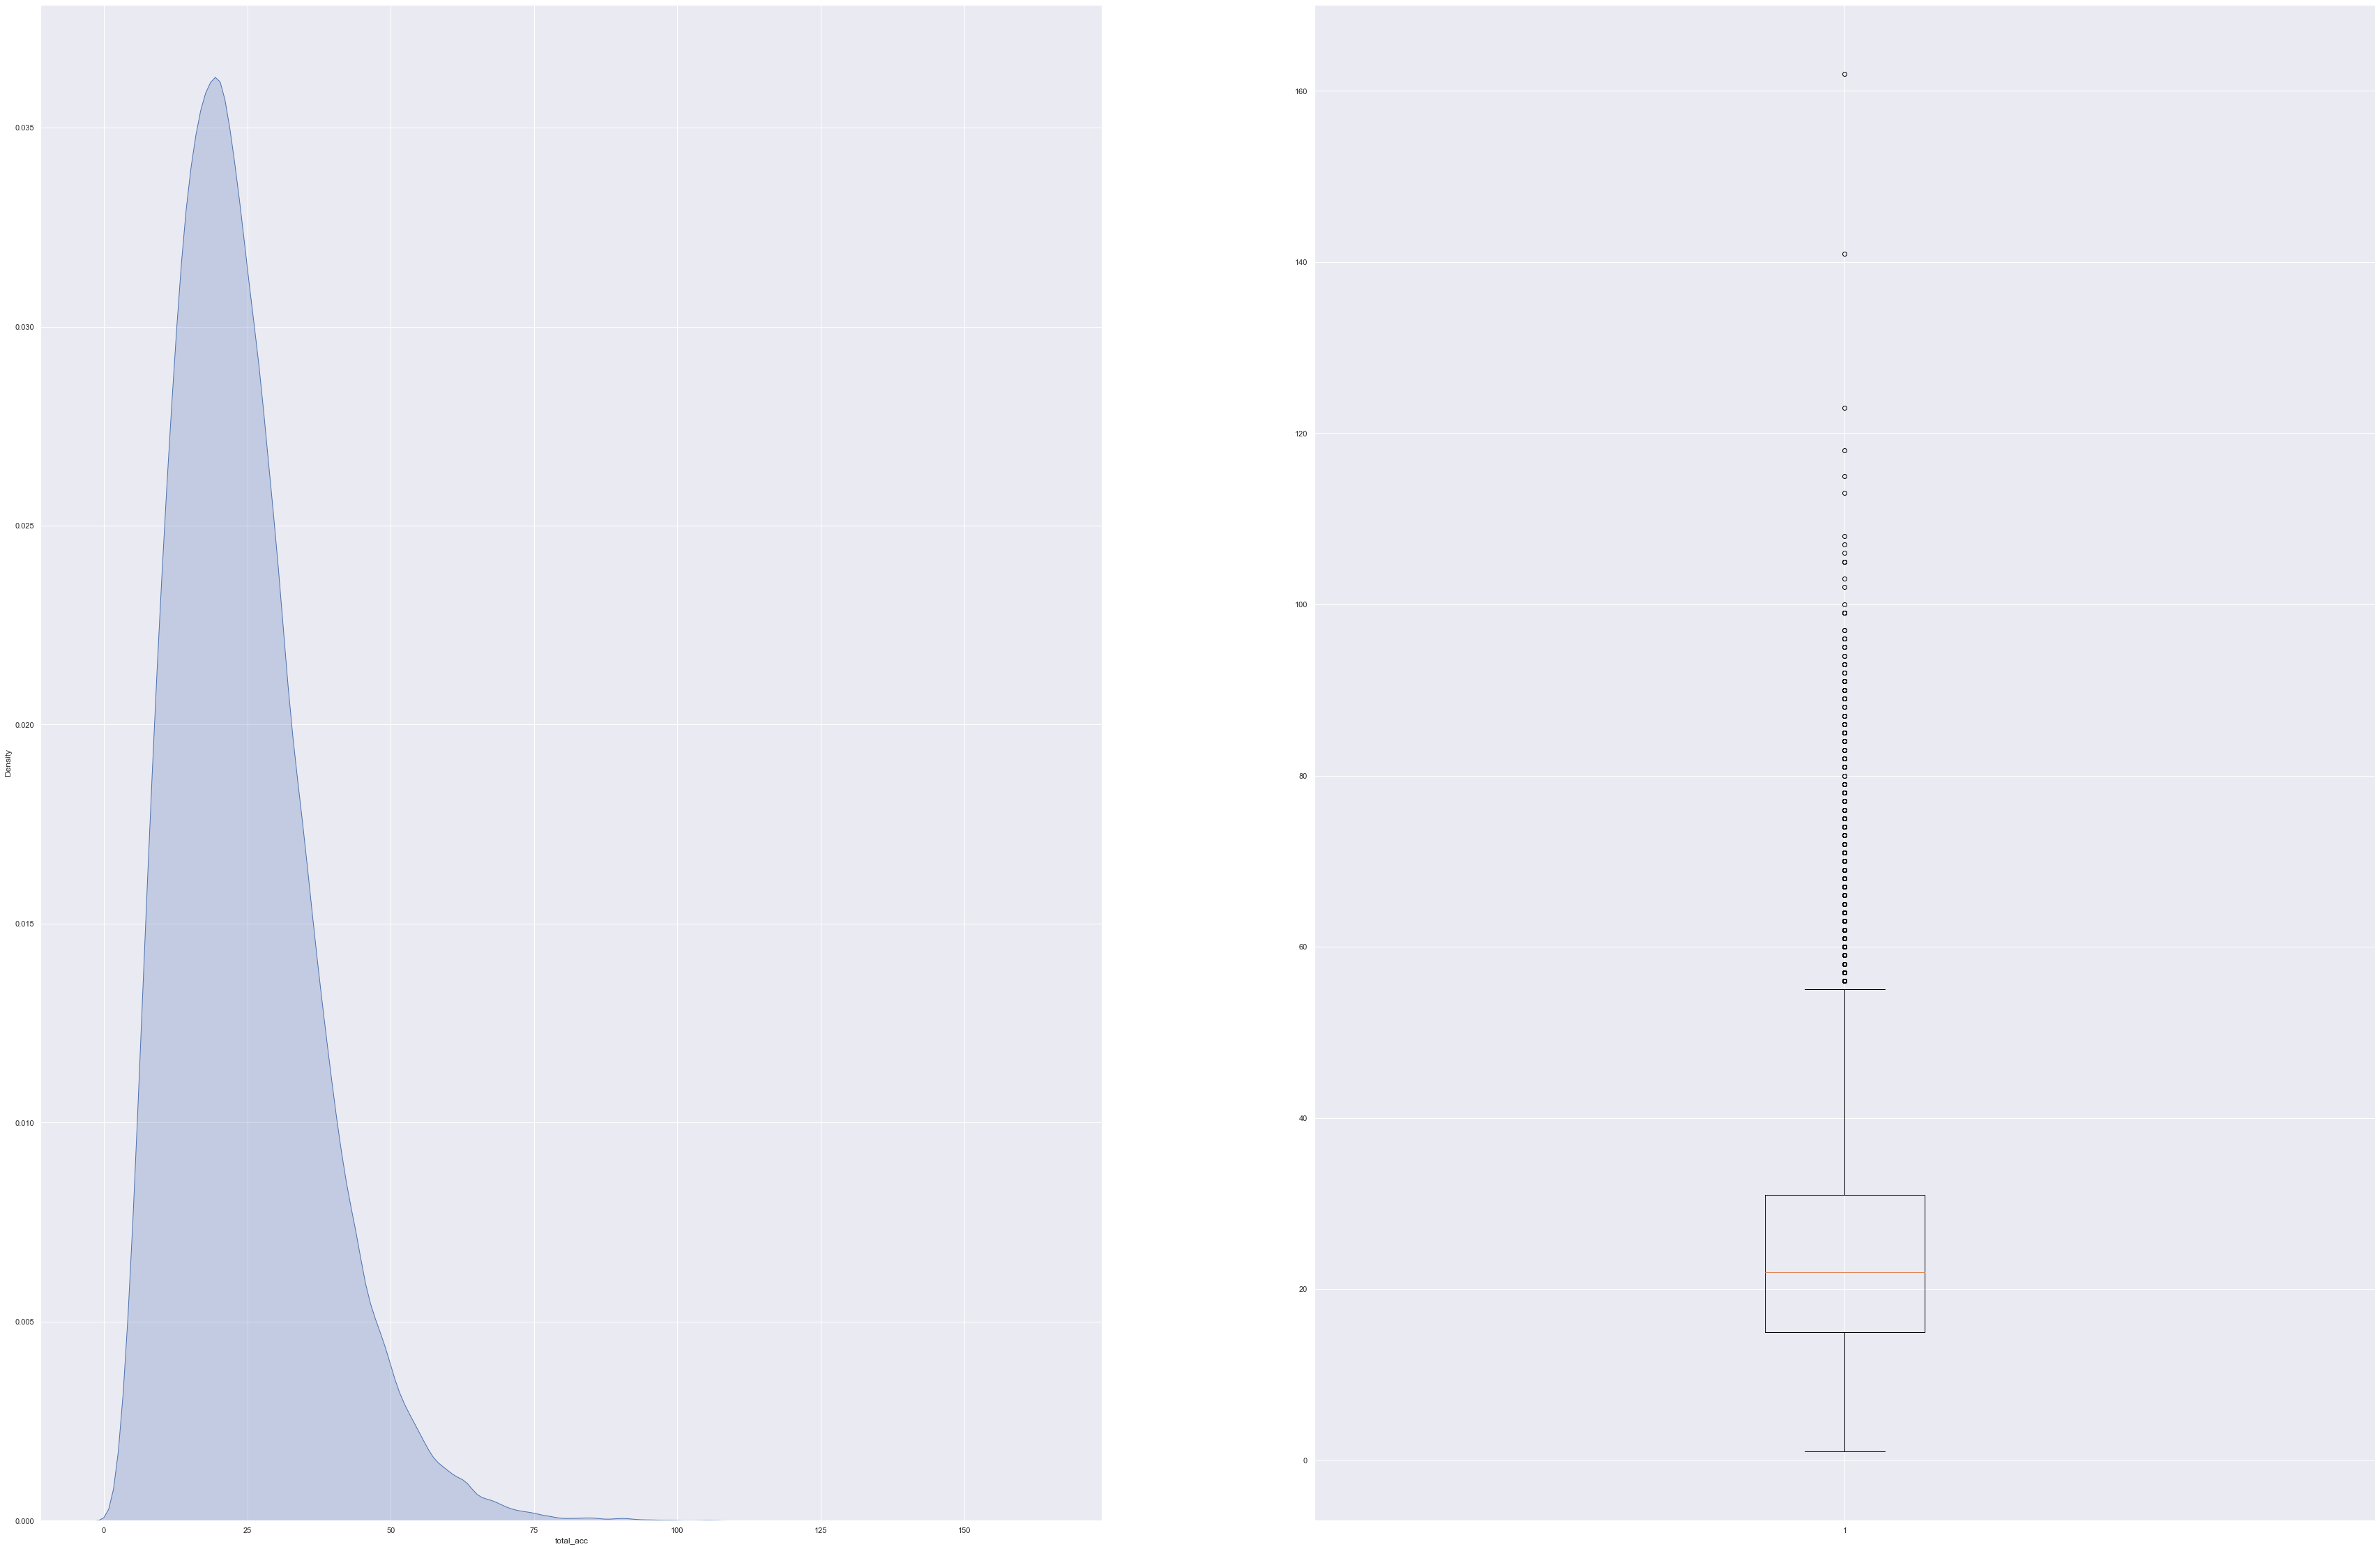

None


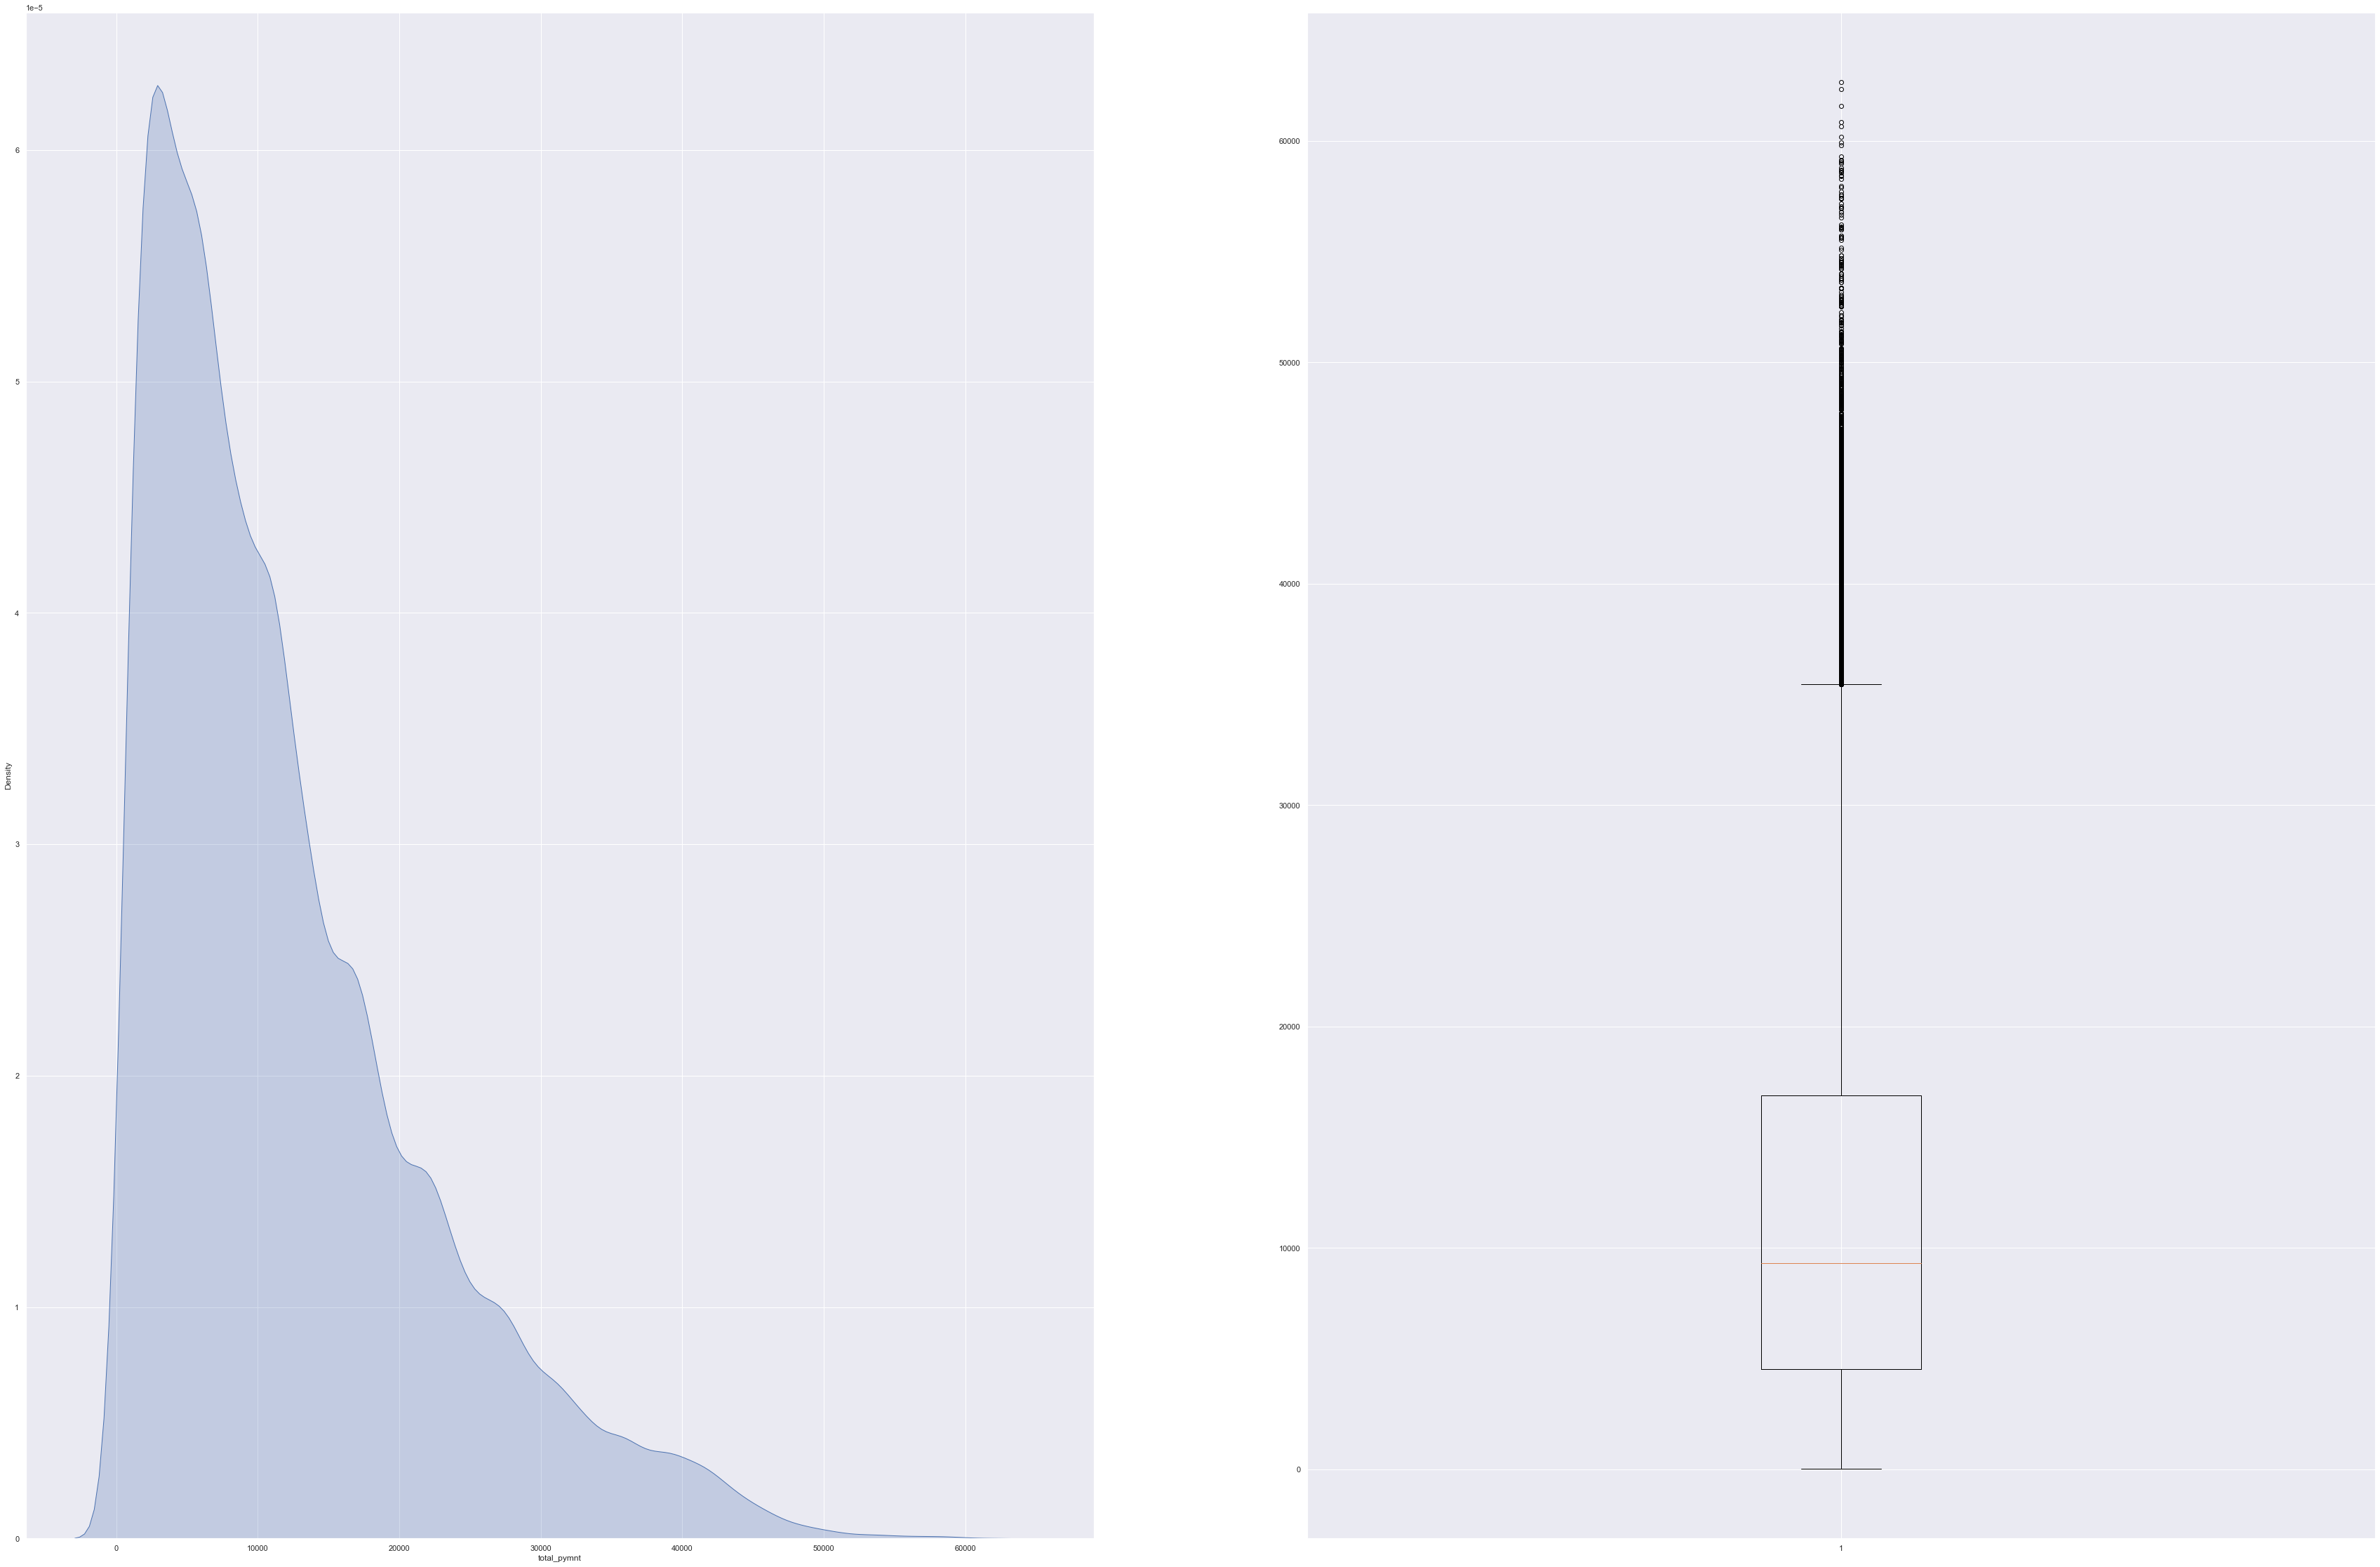

None


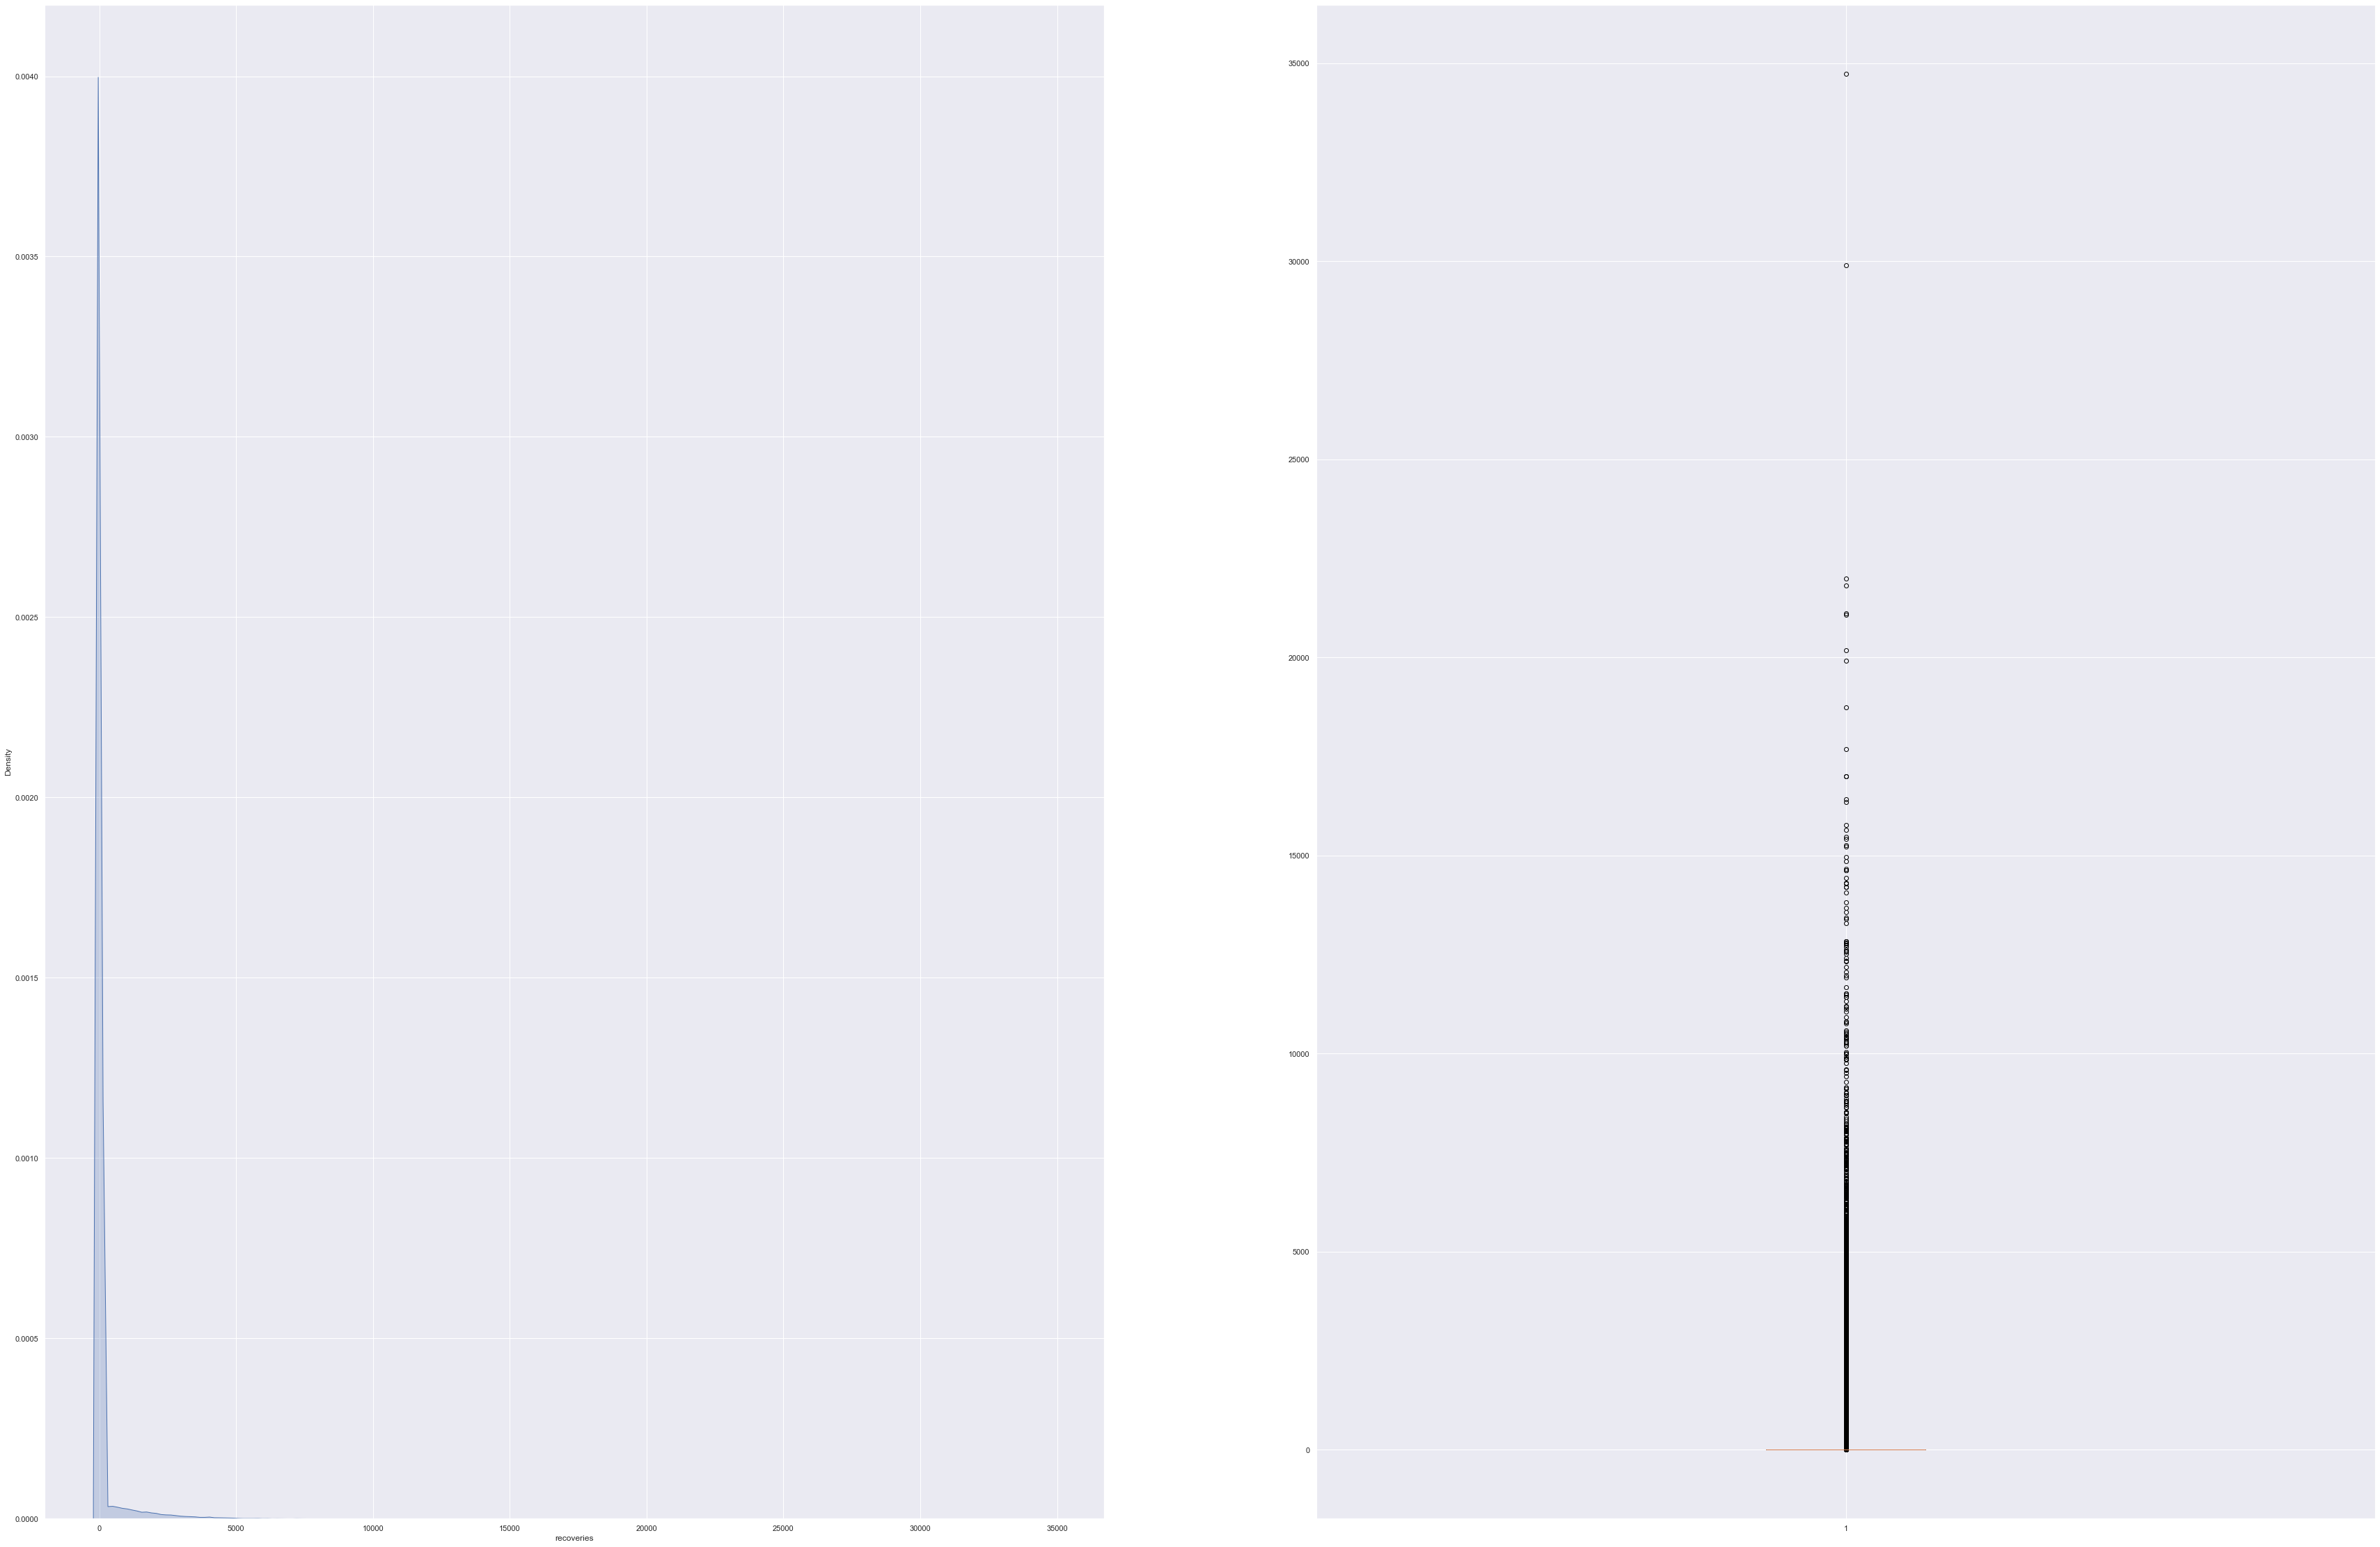

None


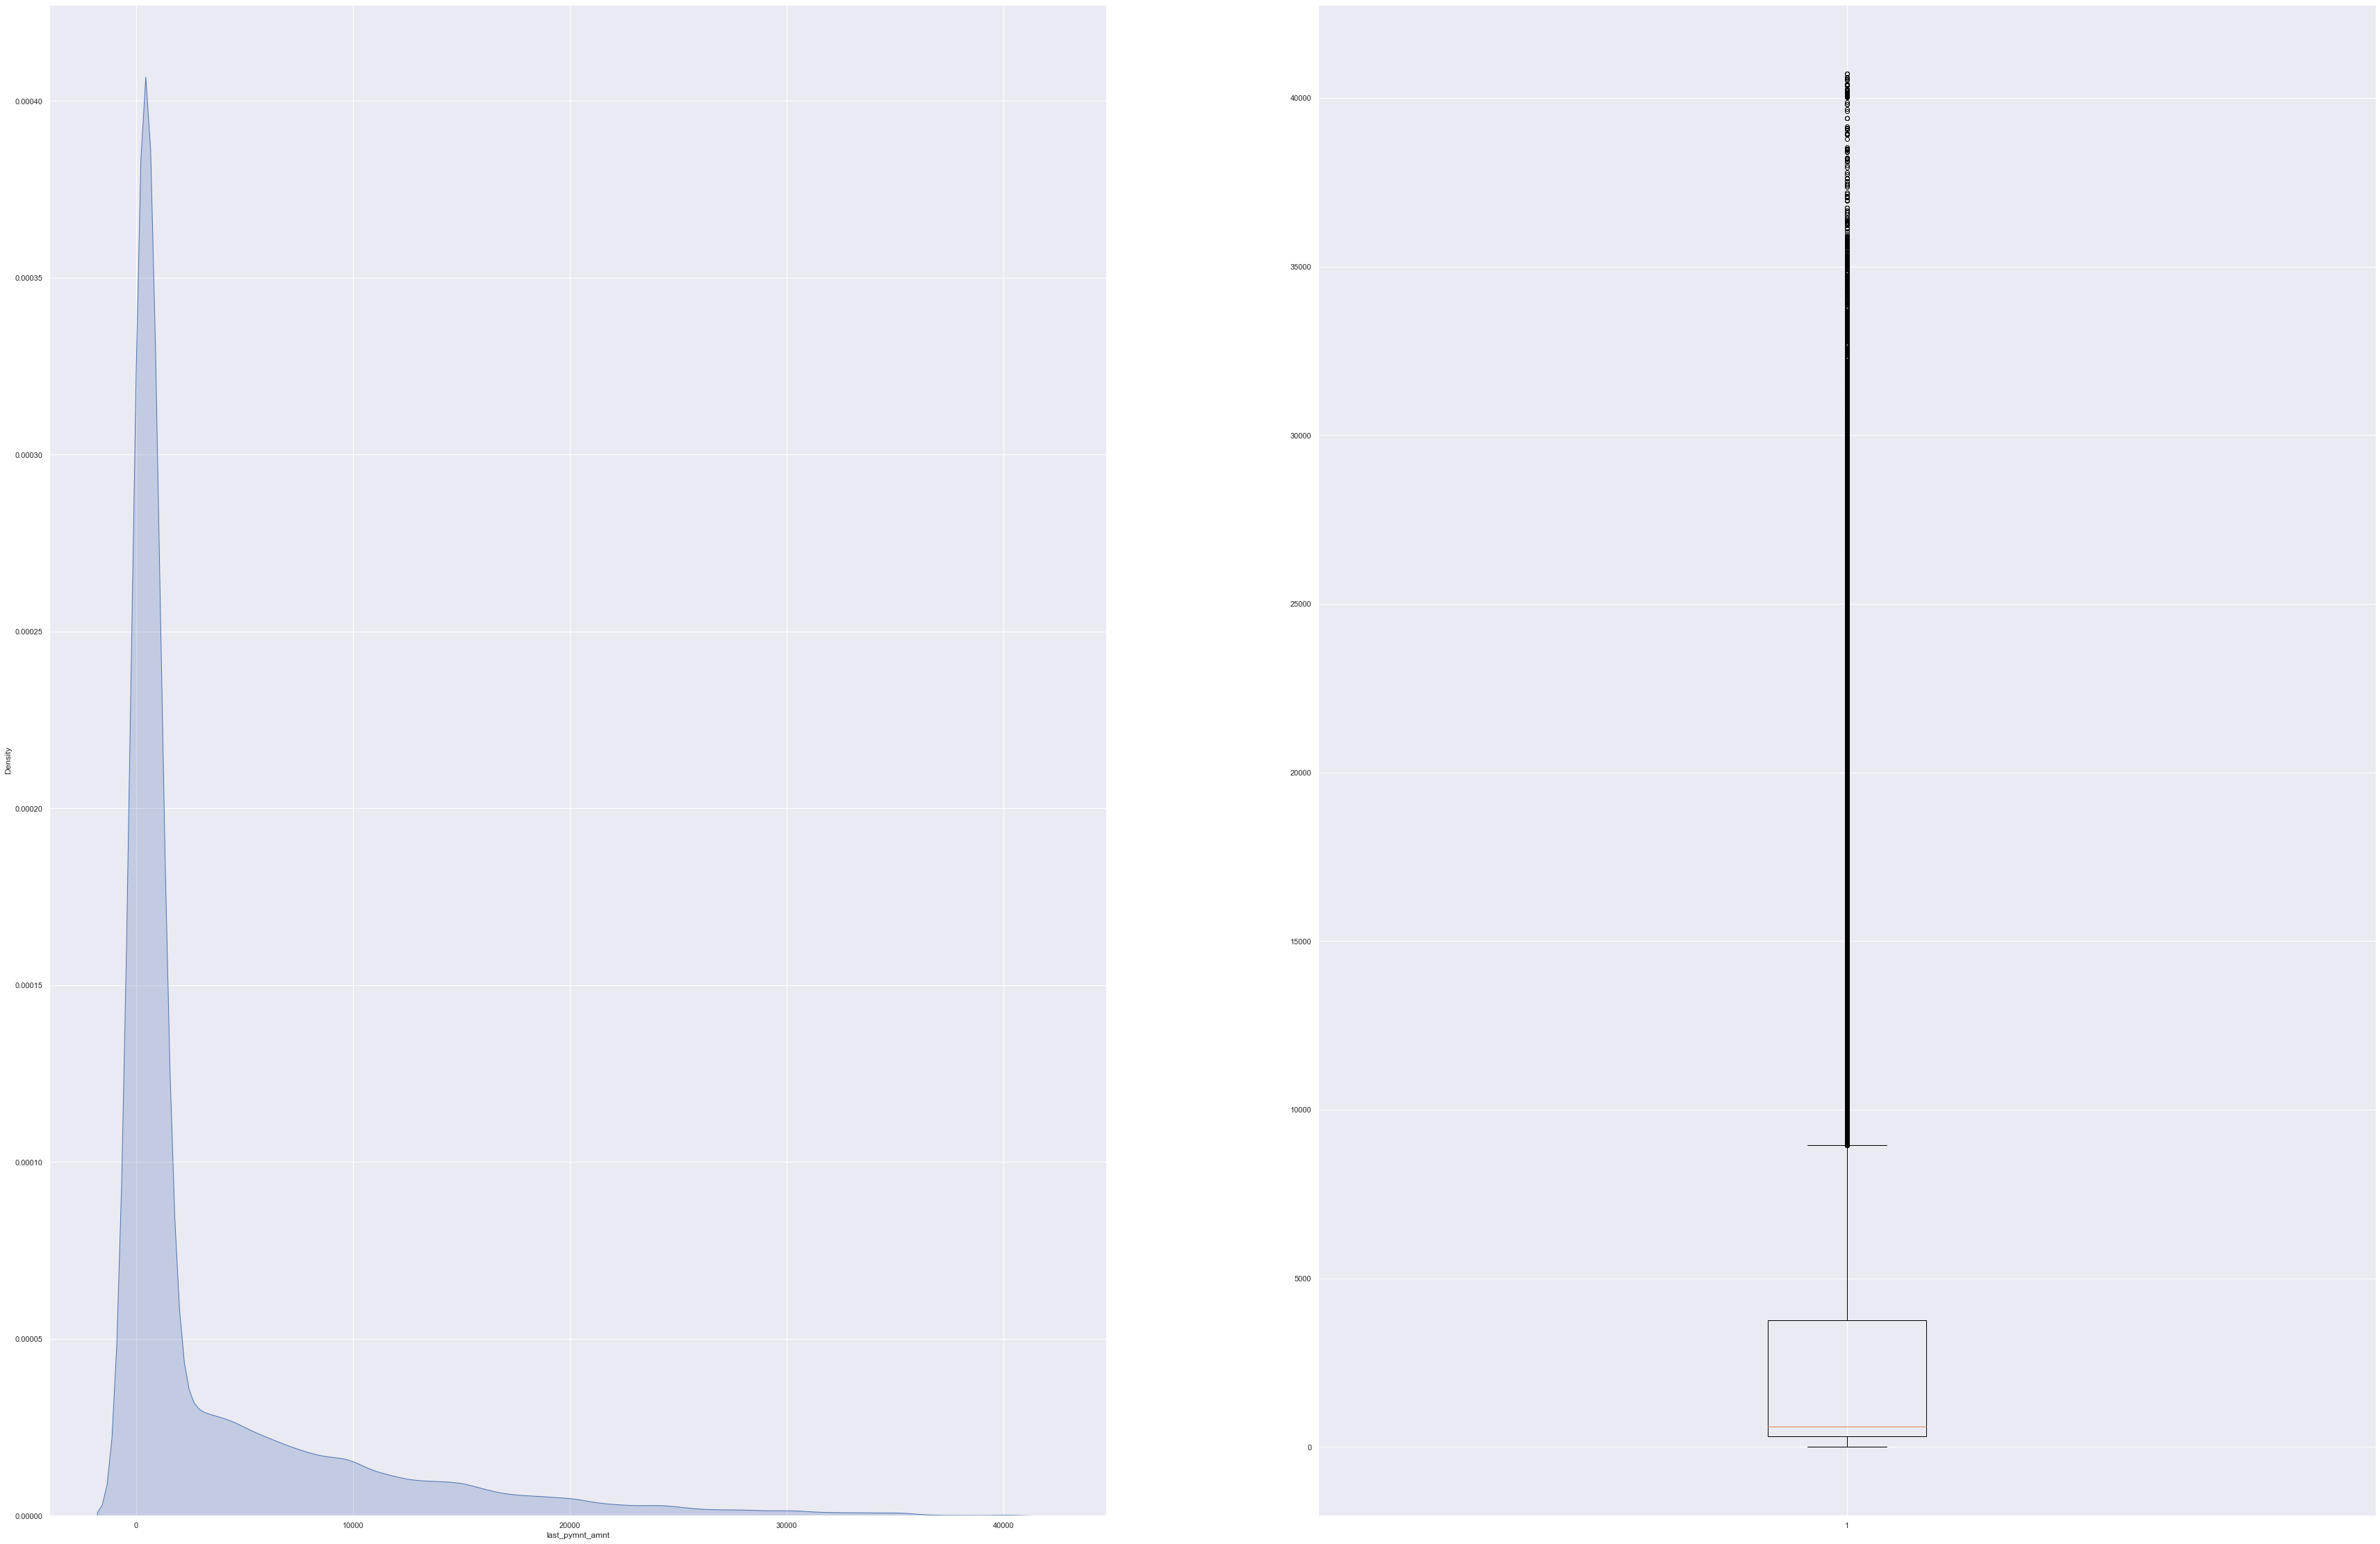

None


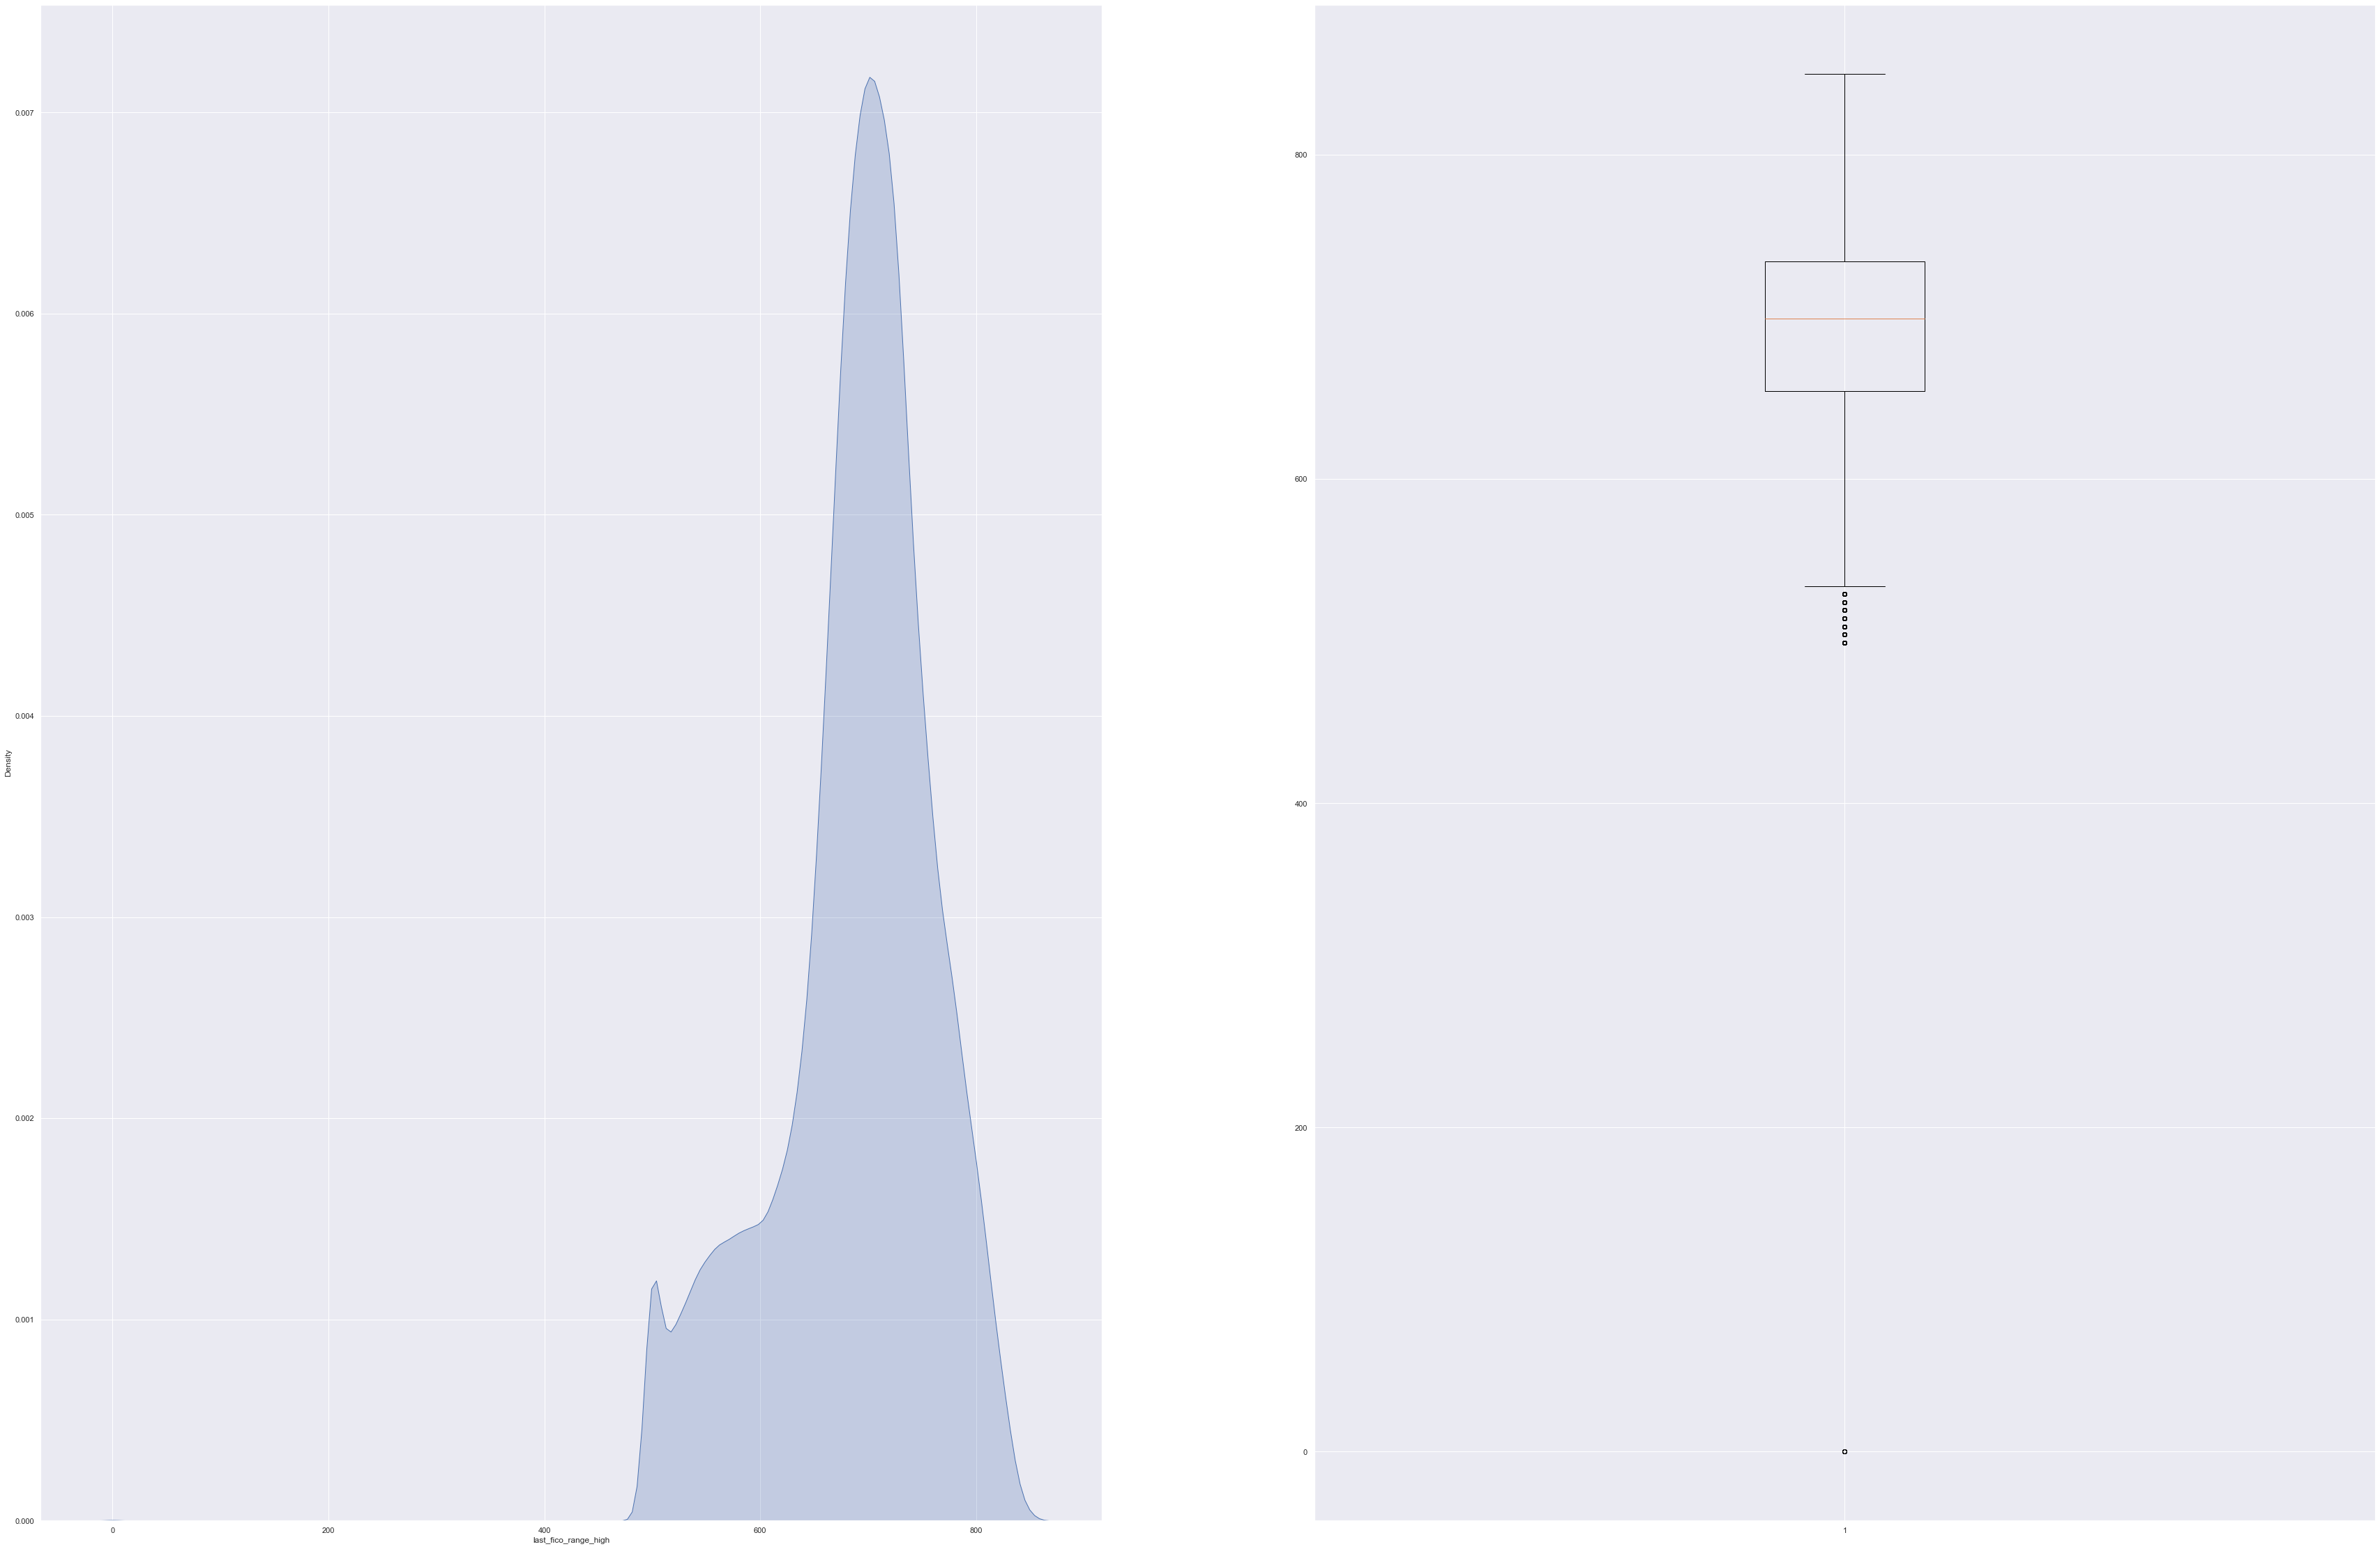

None


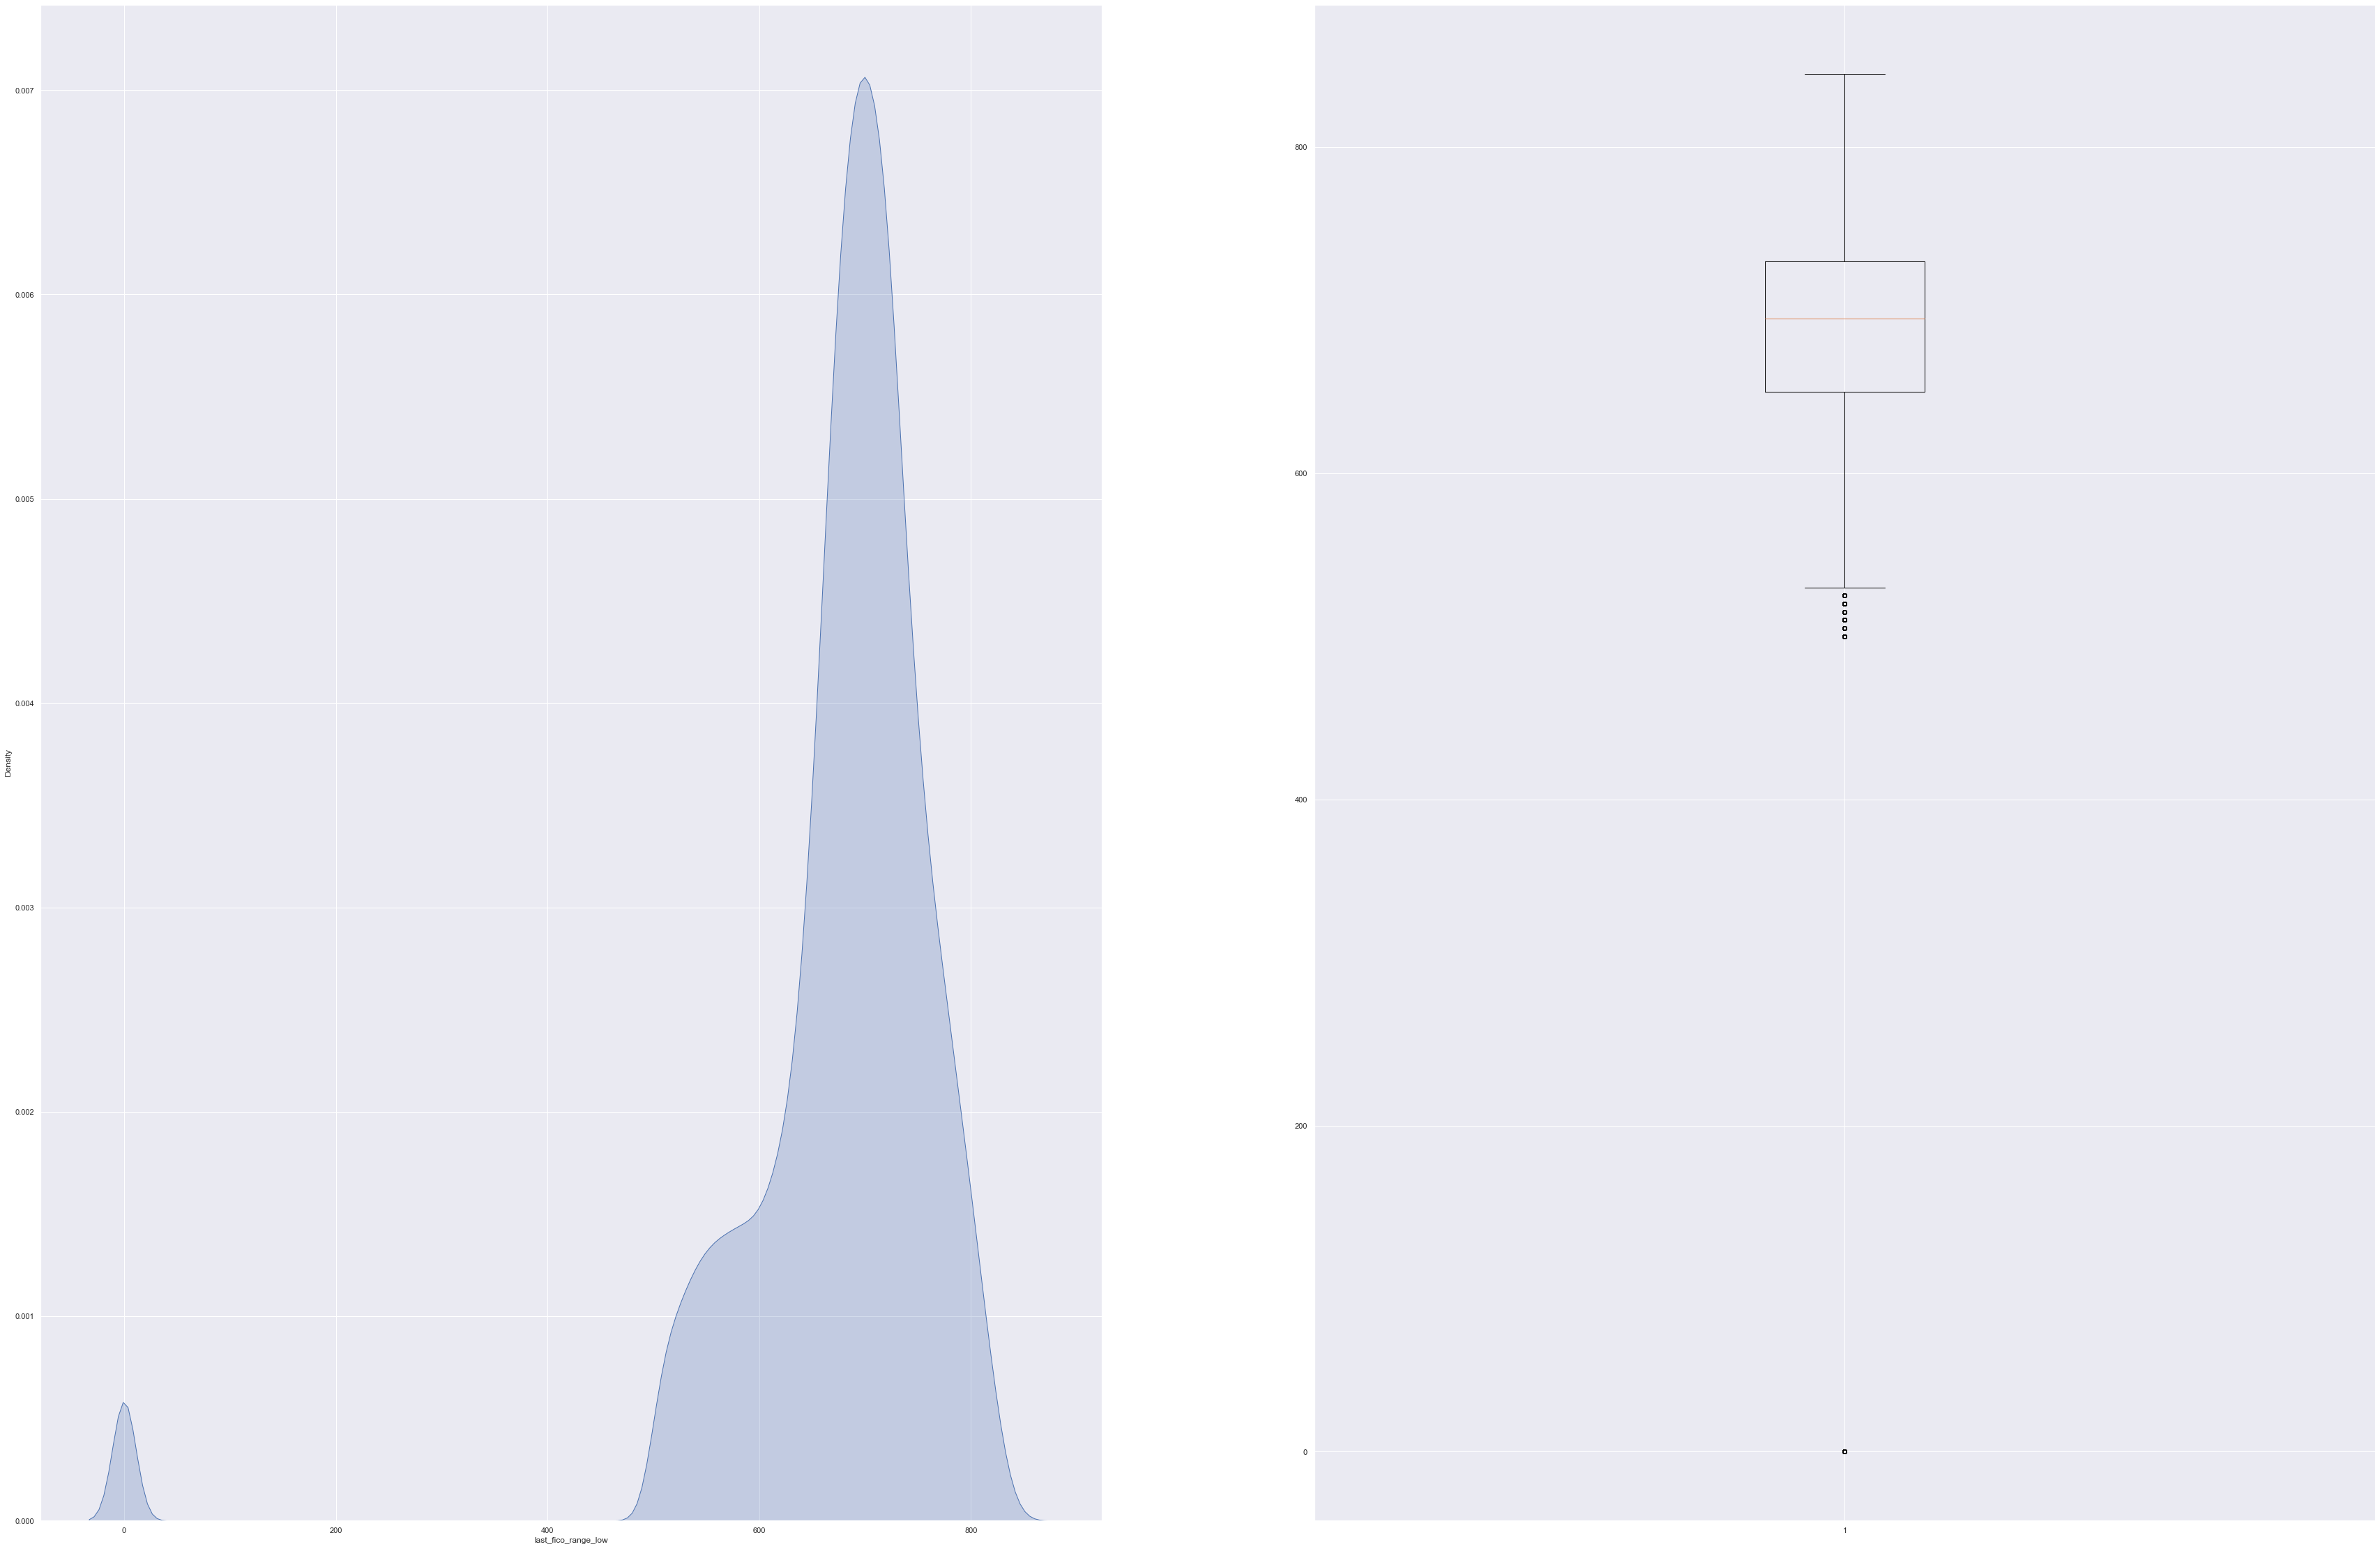

None


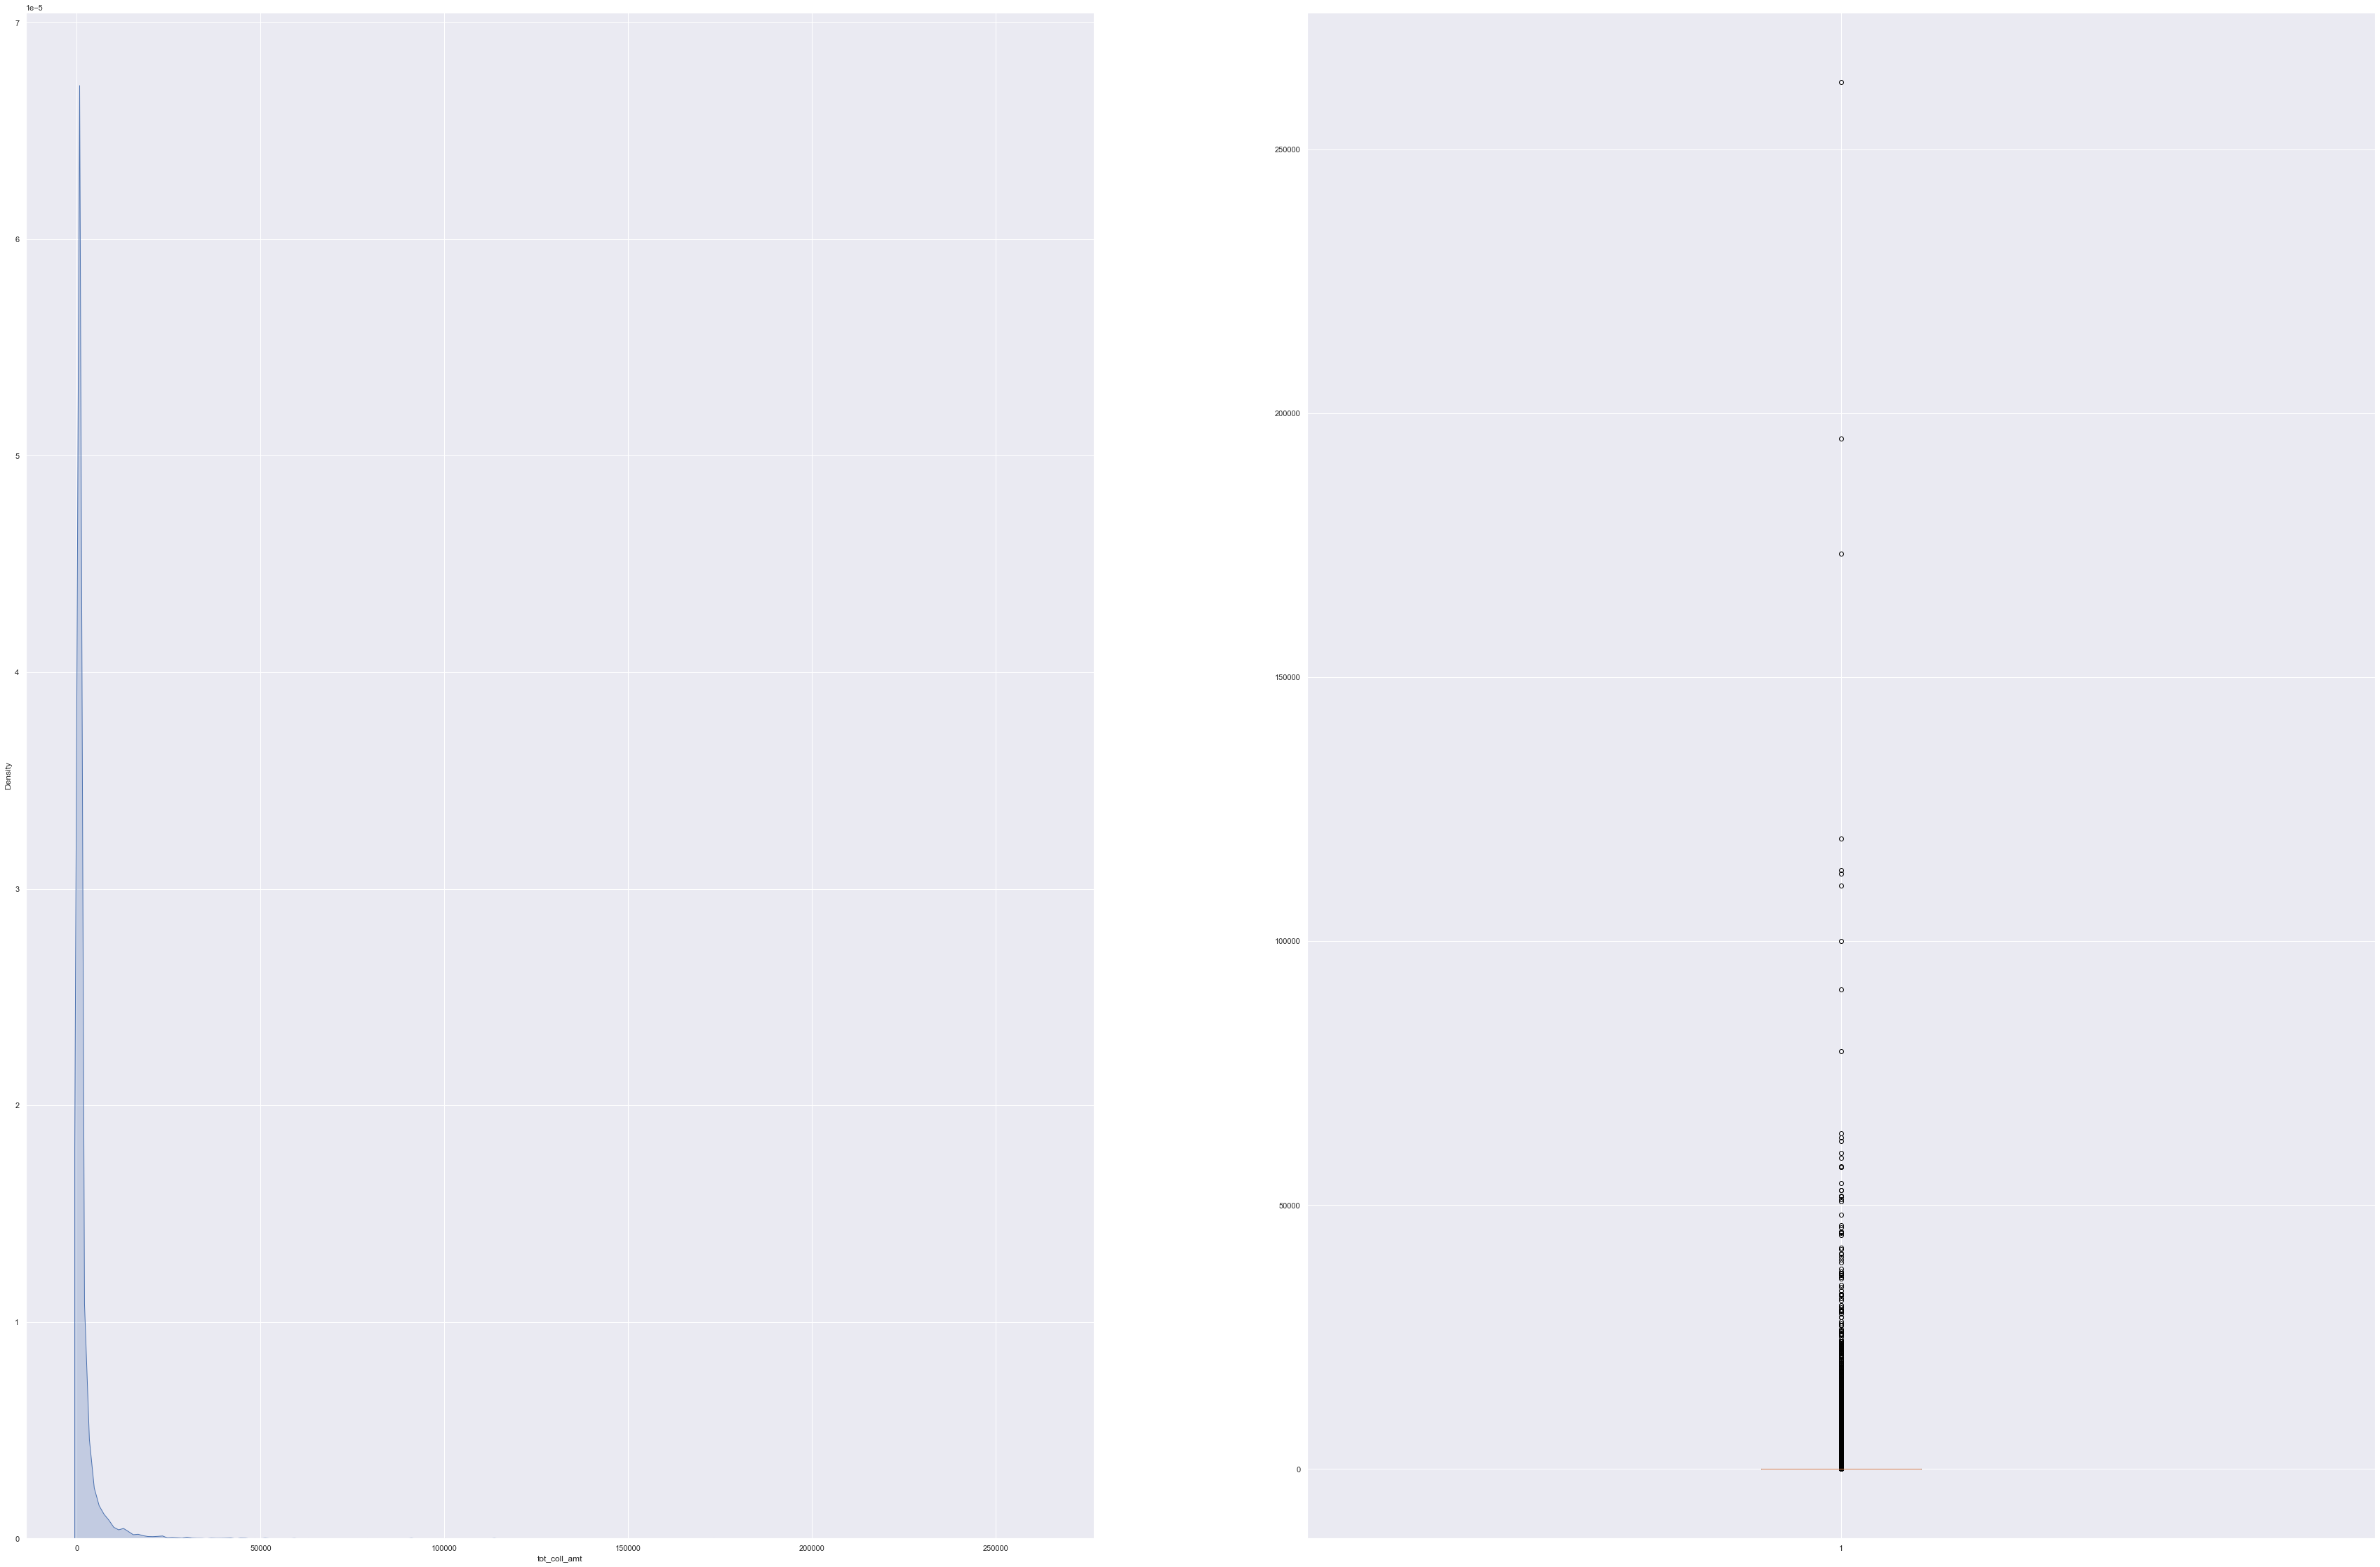

None


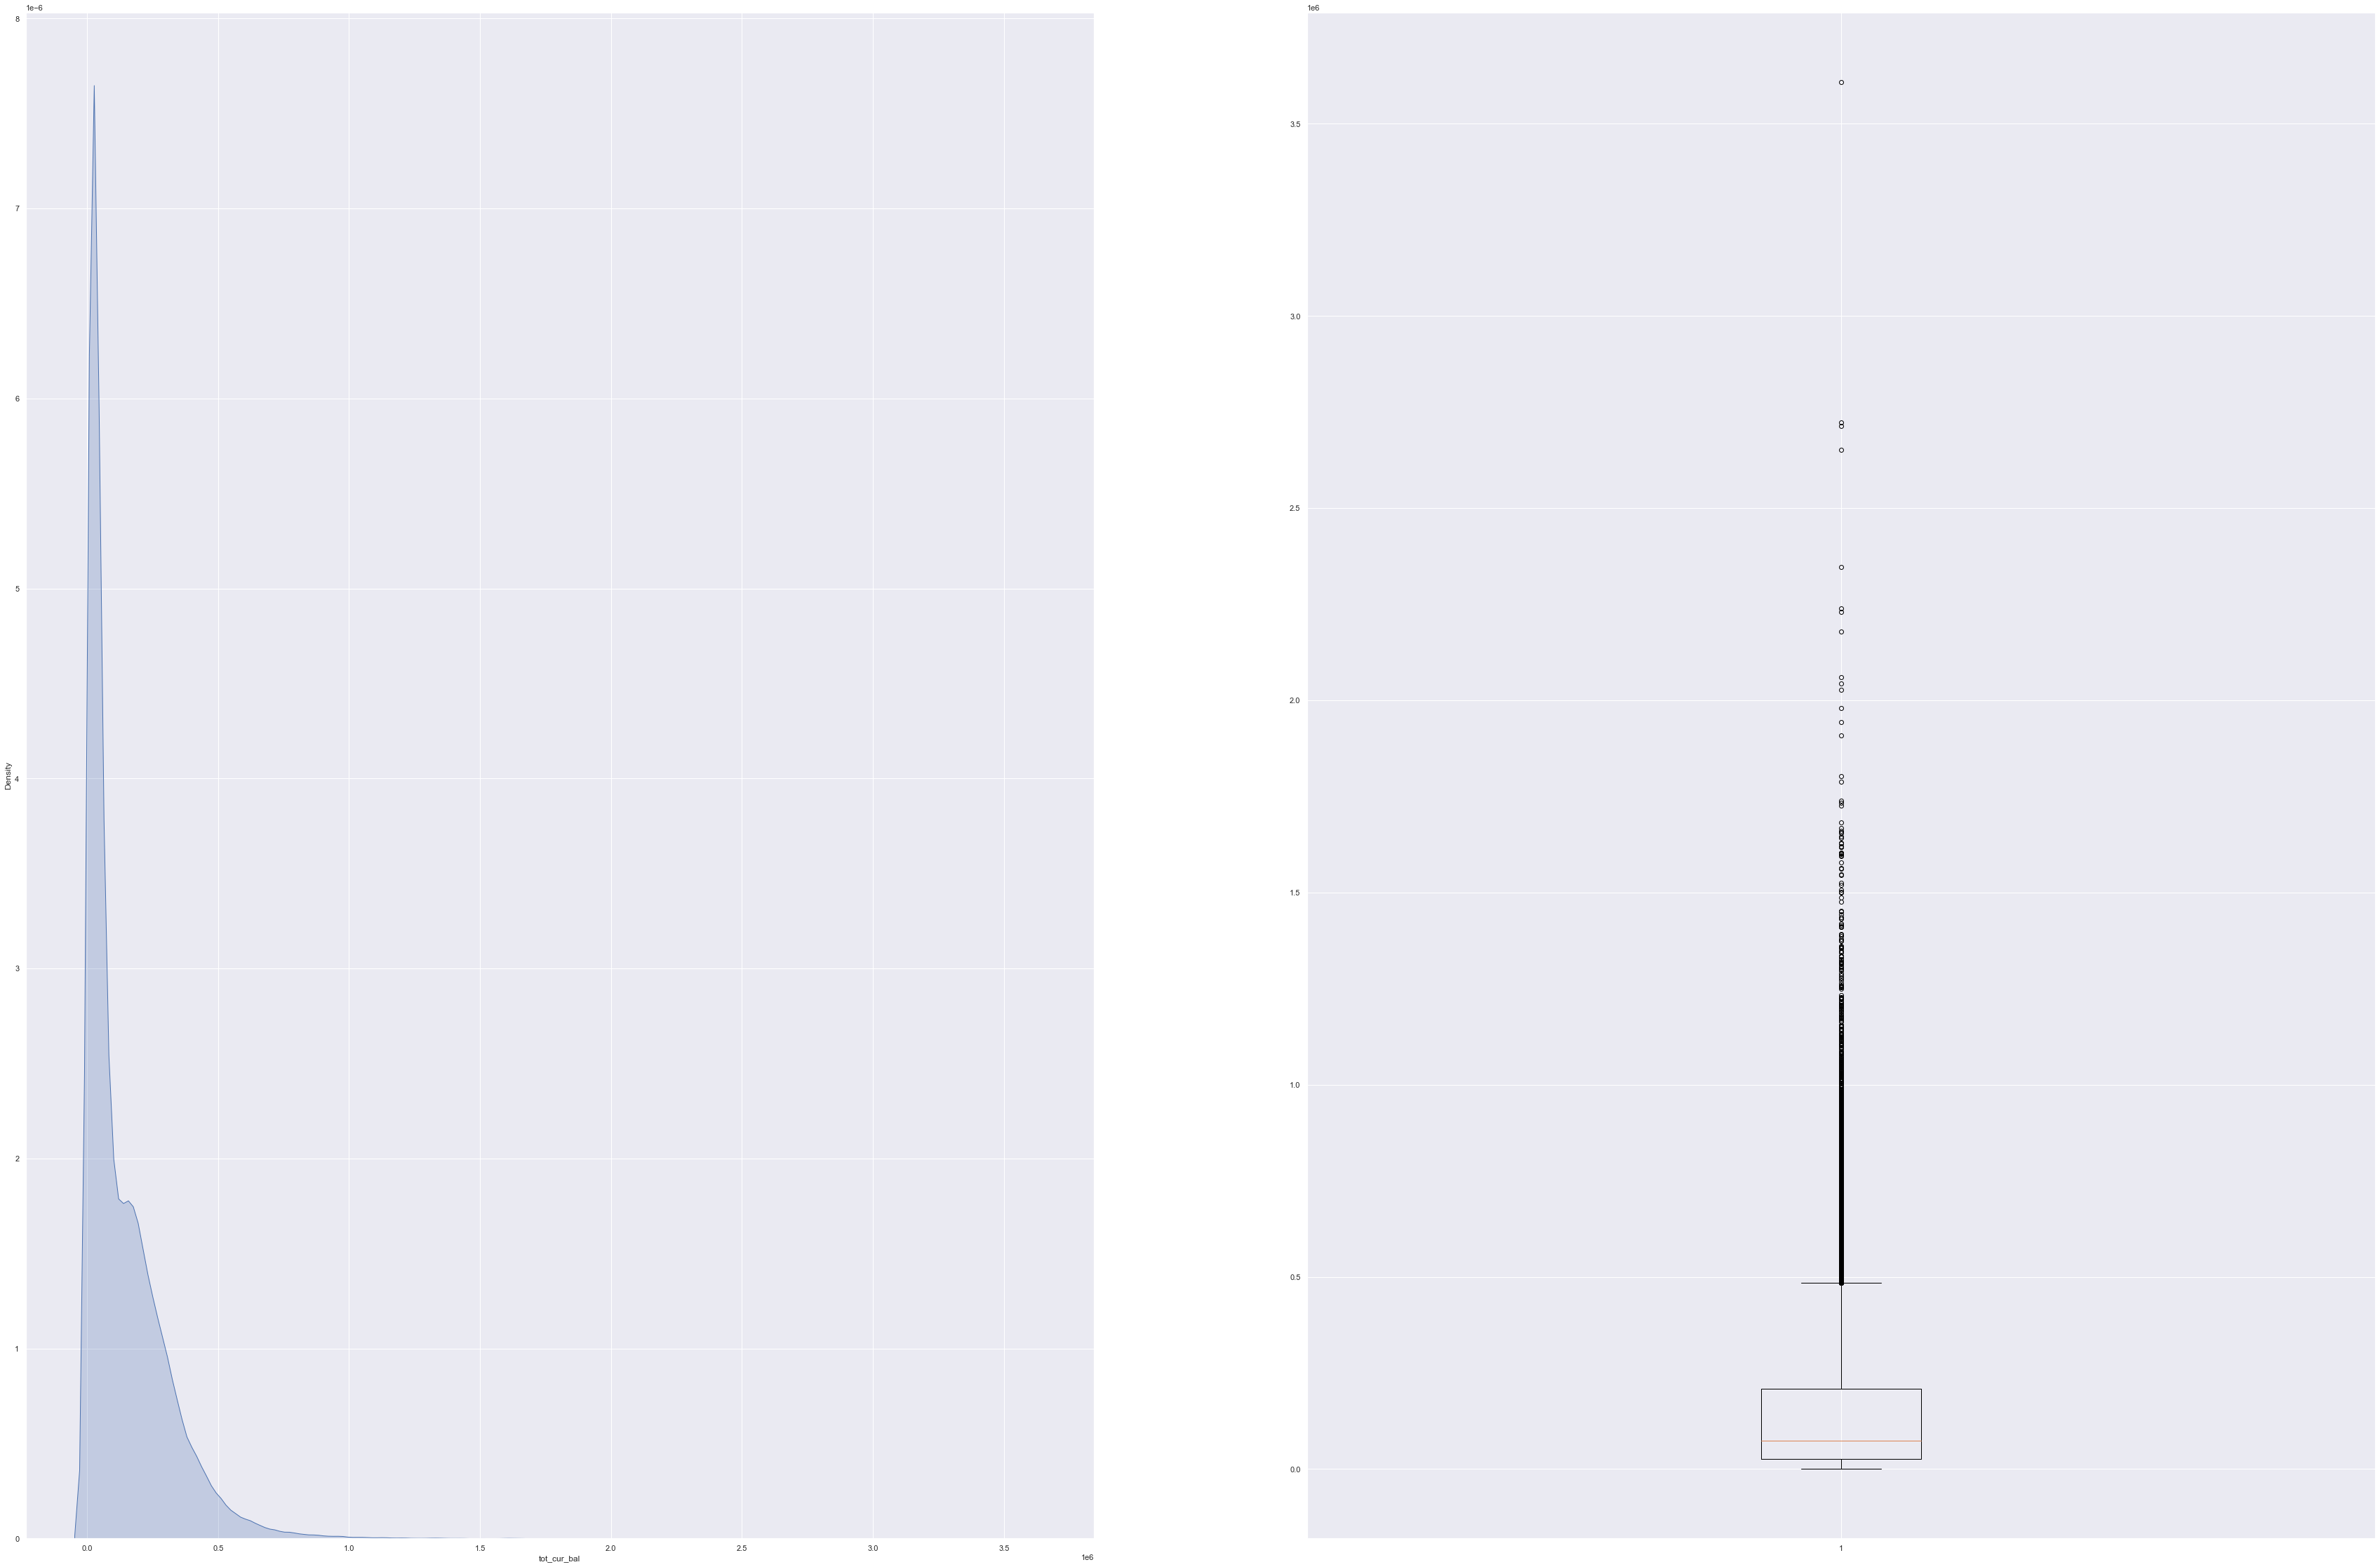

None


[None, None, None, None, None, None, None, None, None, None, None, None]

In [62]:
[print(Plot_Numerical_BoxandSub(df[col])) for col in df.select_dtypes('number')]

# Visualizing Standardized Data

In [63]:
arr_num_std = Standardize(df.select_dtypes('number'))
df_num_std = pd.DataFrame(arr_num_std,columns=df.select_dtypes('number').columns)
df_num_std

loan_amnt  int_rate  emp_length  annual_inc  total_acc  total_pymnt  \
0       0.544004 -0.433993   -1.374455    0.850357   0.736626     1.050495   
1       0.108628 -0.421579    1.201439   -0.050727  -0.012073     0.409210   
2       1.169856 -0.071927    0.498922    0.372509   0.237493    -0.315283   
3       0.544004  0.521861    1.201439    0.099453  -1.093528     0.640475   
4       0.108628  0.830134    0.498922   -0.460311  -0.511206     0.531237   
...          ...       ...         ...         ...        ...          ...   
98885  -0.615183  1.262544   -1.374455   -0.635067  -0.261640    -0.054259   
98886   1.088223  1.736333    0.733095   -0.392047  -0.012073     1.685593   
98887  -1.197498  0.399793    1.201439    0.068052  -0.428017    -1.136645   
98888   0.571215 -0.165030   -1.140283   -0.214561   0.320682     1.233374   
98889   0.326316 -0.477441    0.498922   -0.105339   1.402137    -0.878210   

       recoveries  last_pymnt_amnt  last_fico_range_high  last_fico_range_low  \
0       -0.189469         1.530428             -1.567817            -0.959858   
1       -0.189469         2.115131              0.429592             0.355074   
2        3.991120        -0.474209             -0.879056            -0.506433   
3        1.162121        -0.490929             -2.394332            -1.503968   
4       -0.189469         1.836483              0.016335             0.083020   
...           ...              ...                   ...                  ...   
98885   -0.189469         0.435008             -0.052541             0.037677   
98886   -0.149007        -0.457426             -1.292313            -0.778488   
98887   -0.189469        -0.548221              0.154087             0.173705   
98888   -0.189469         0.206961             -1.705570            -1.050543   
98889    1.982851        -0.473383             -1.774446            -1.095885   

       tot_coll_amt  tot_cur_bal  
0         -0.108301     1.328433  
1          0.344739    -0.250797  
2         -0.108301    -0.730149  
3         -0.108301     0.633301  
4         -0.108301     0.239343  
...             ...          ...  
98885     -0.108301    -0.441857  
98886     -0.108301    -0.867206  
98887     -0.108301     1.092936  
98888     -0.108301    -0.470386  
98889     -0.108301     0.053422  

[98890 rows x 12 columns]

In [64]:
# Standardization:
'''stretching" or "squeezing" data uniformly does not remove skewness'''

'stretching" or "squeezing" data uniformly does not remove skewness'

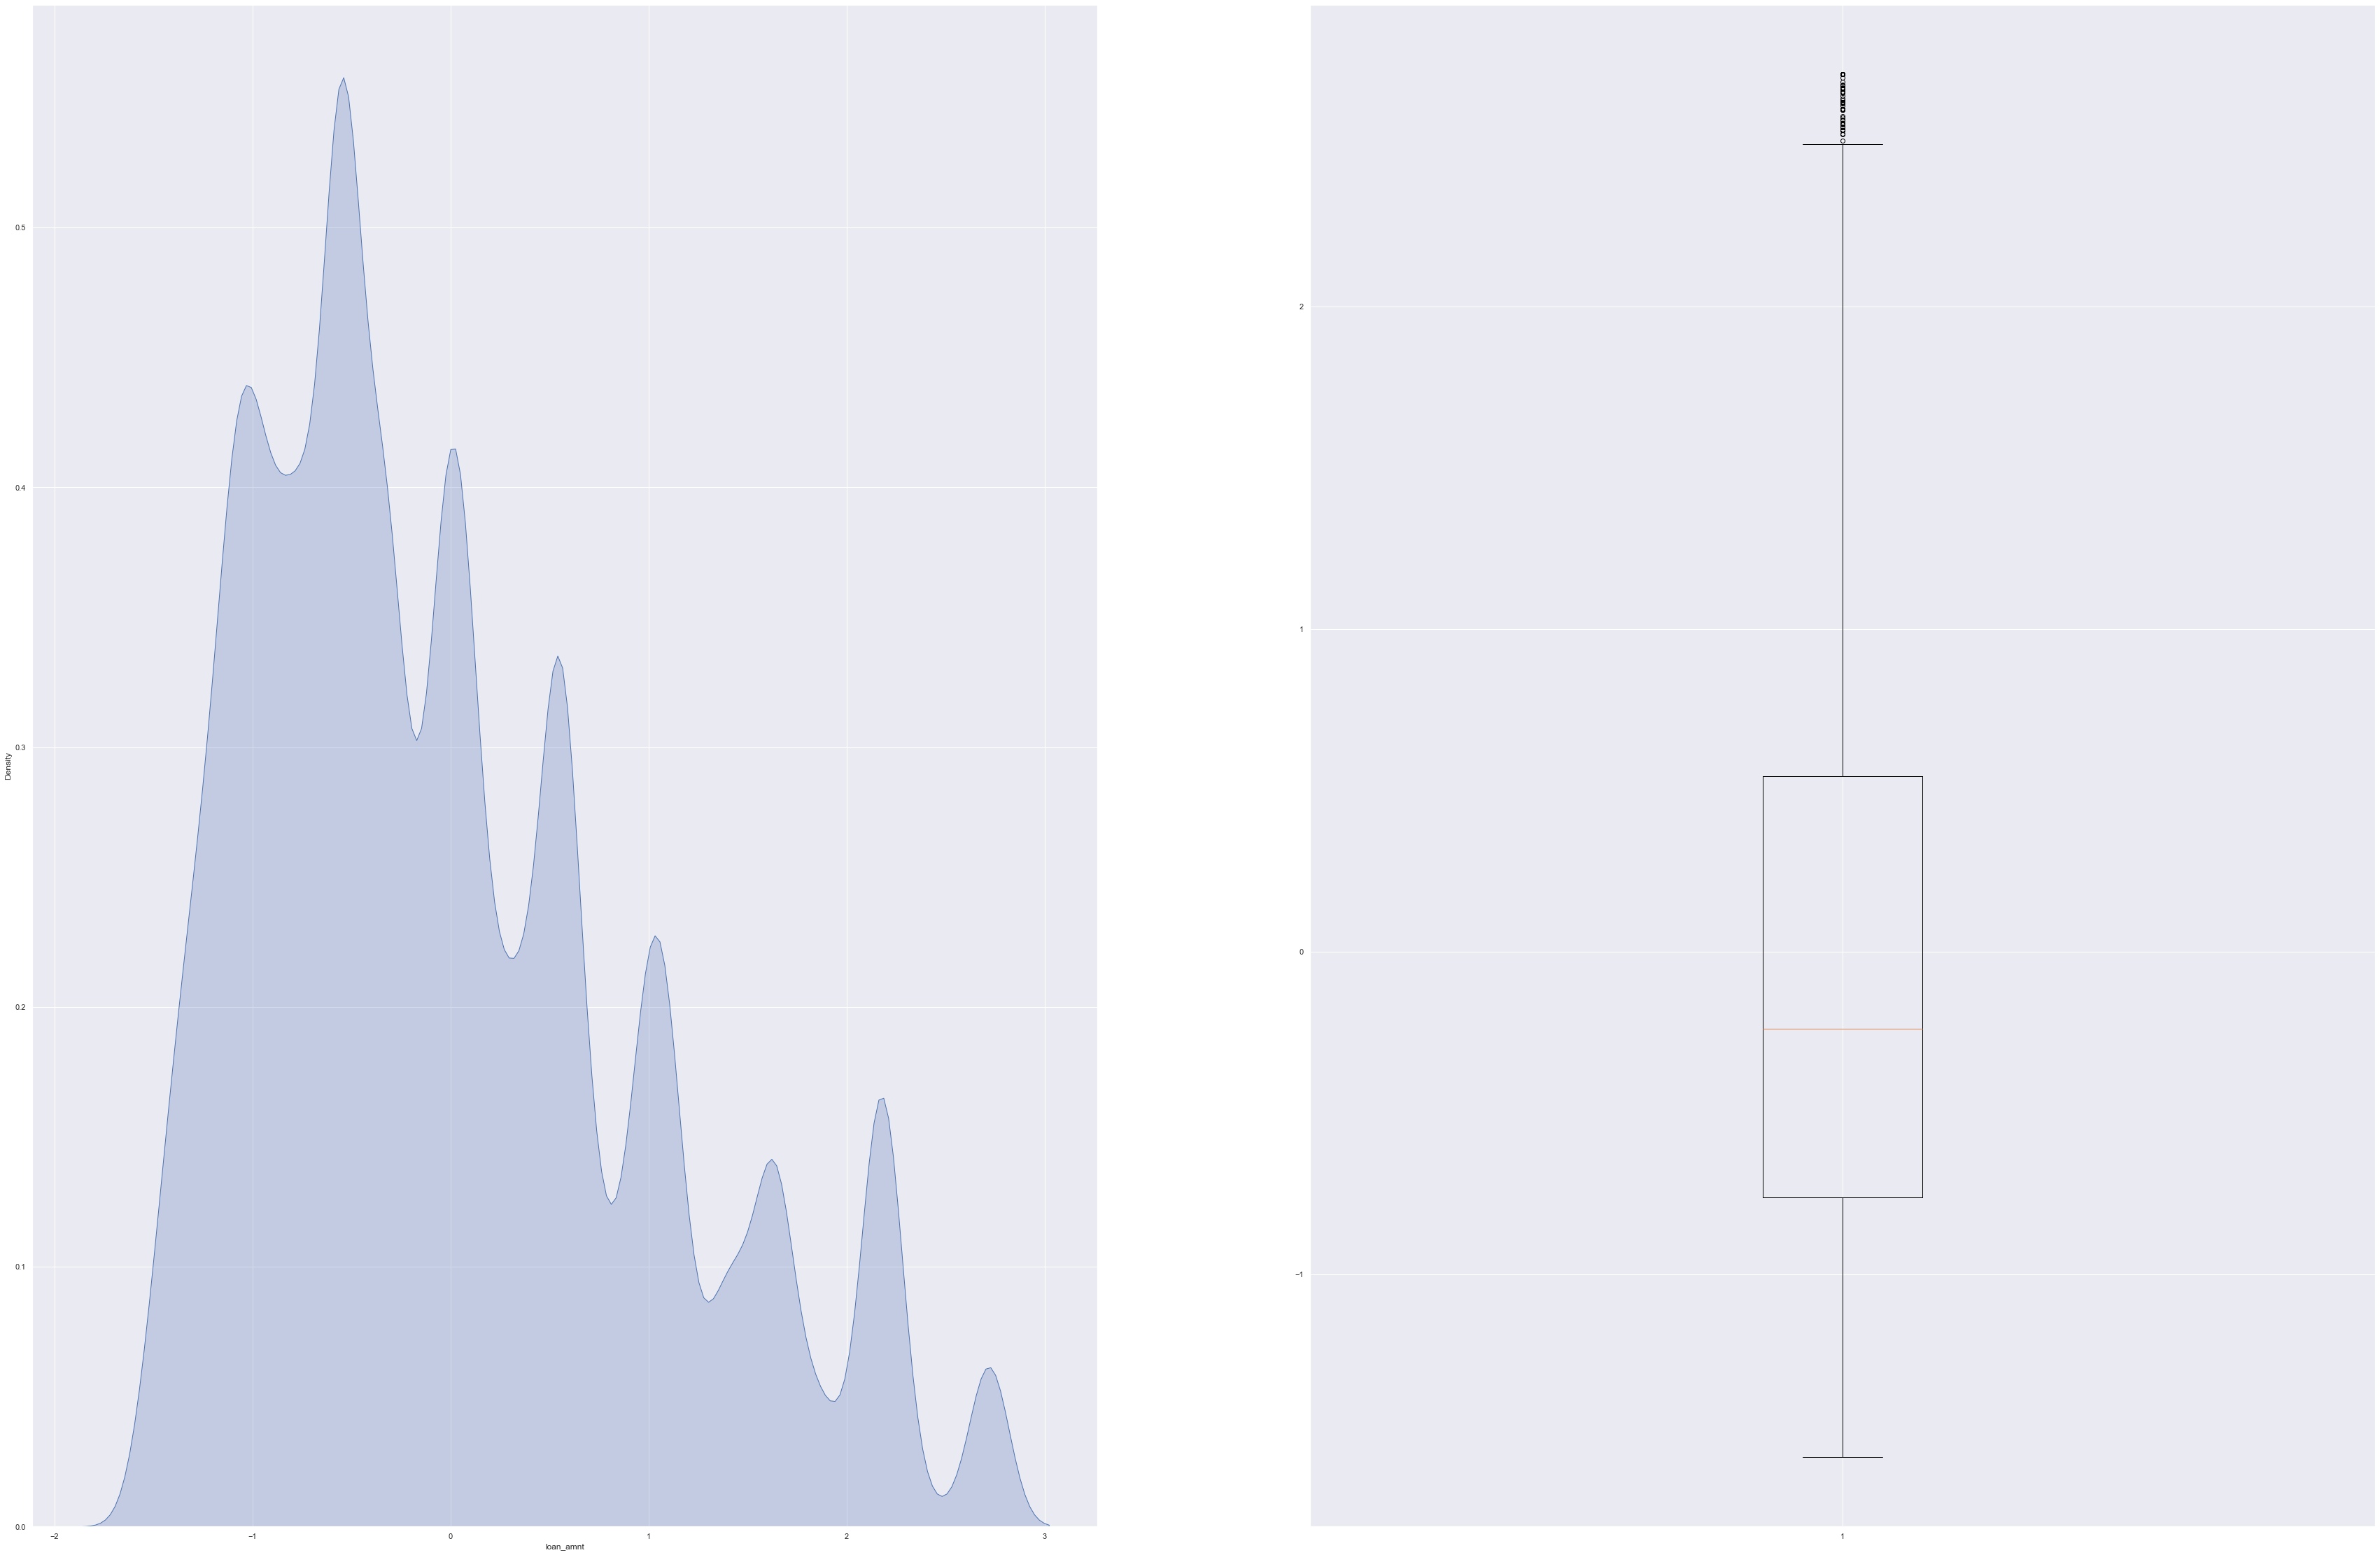

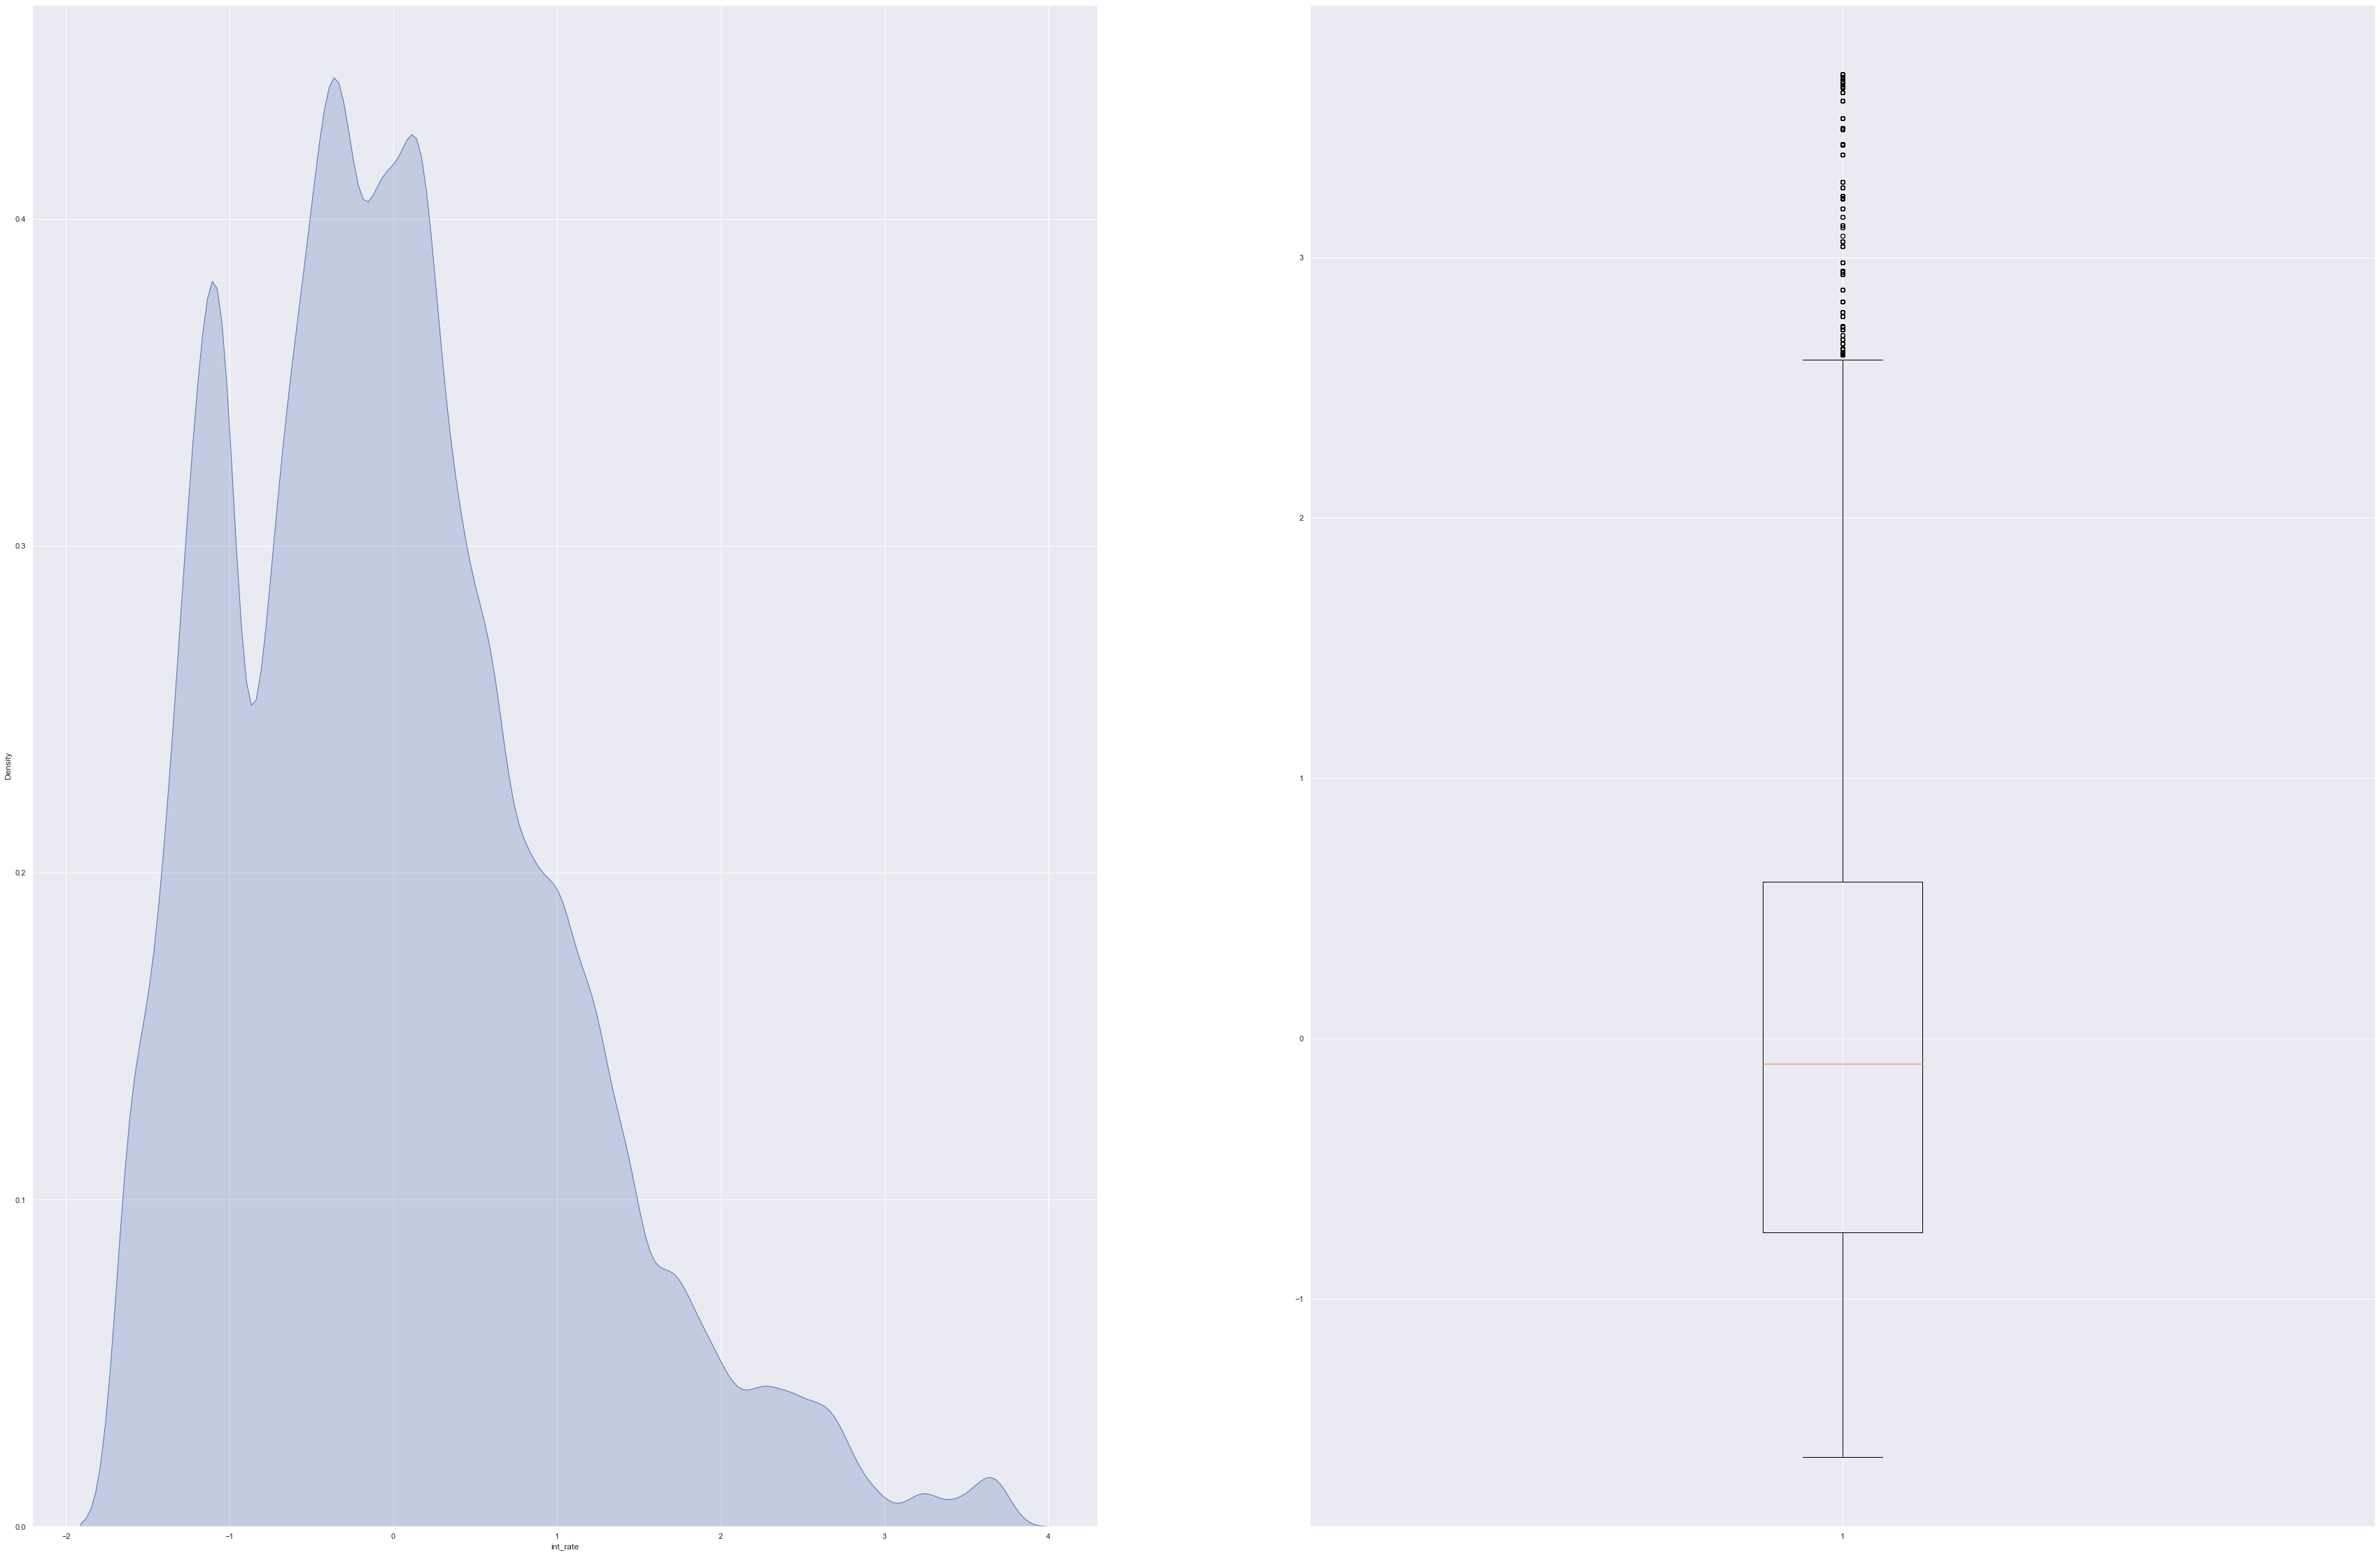

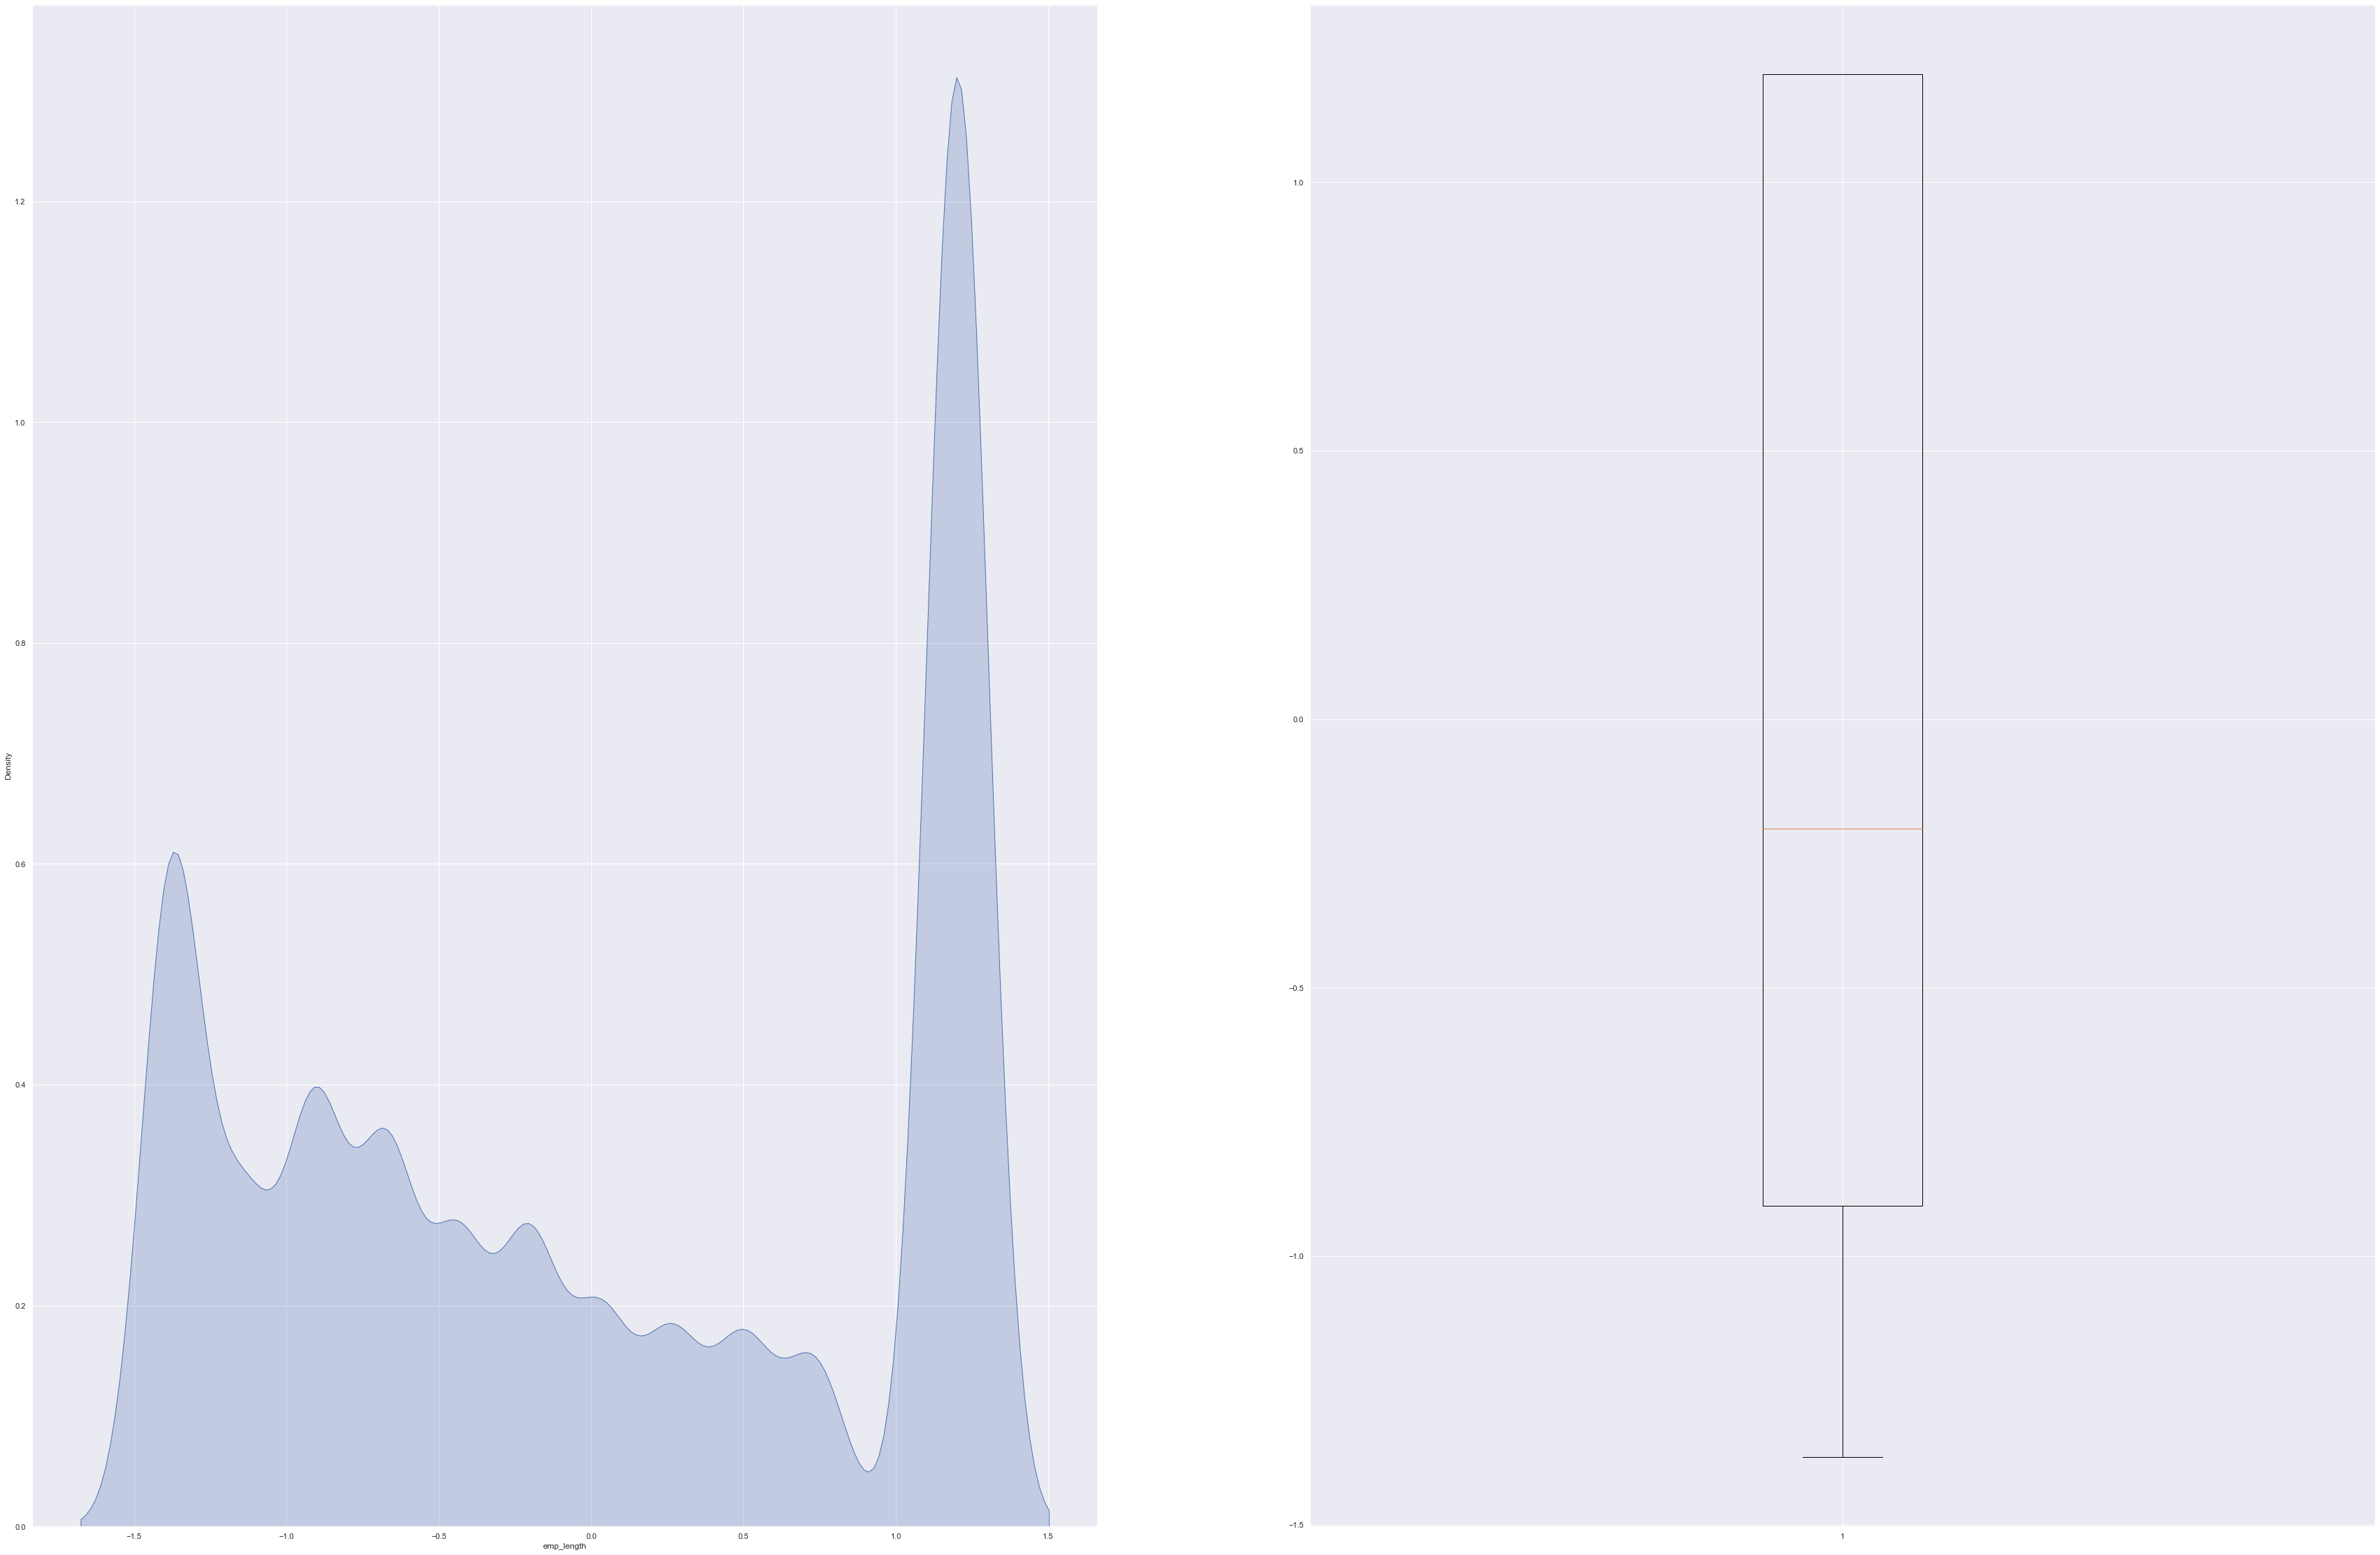

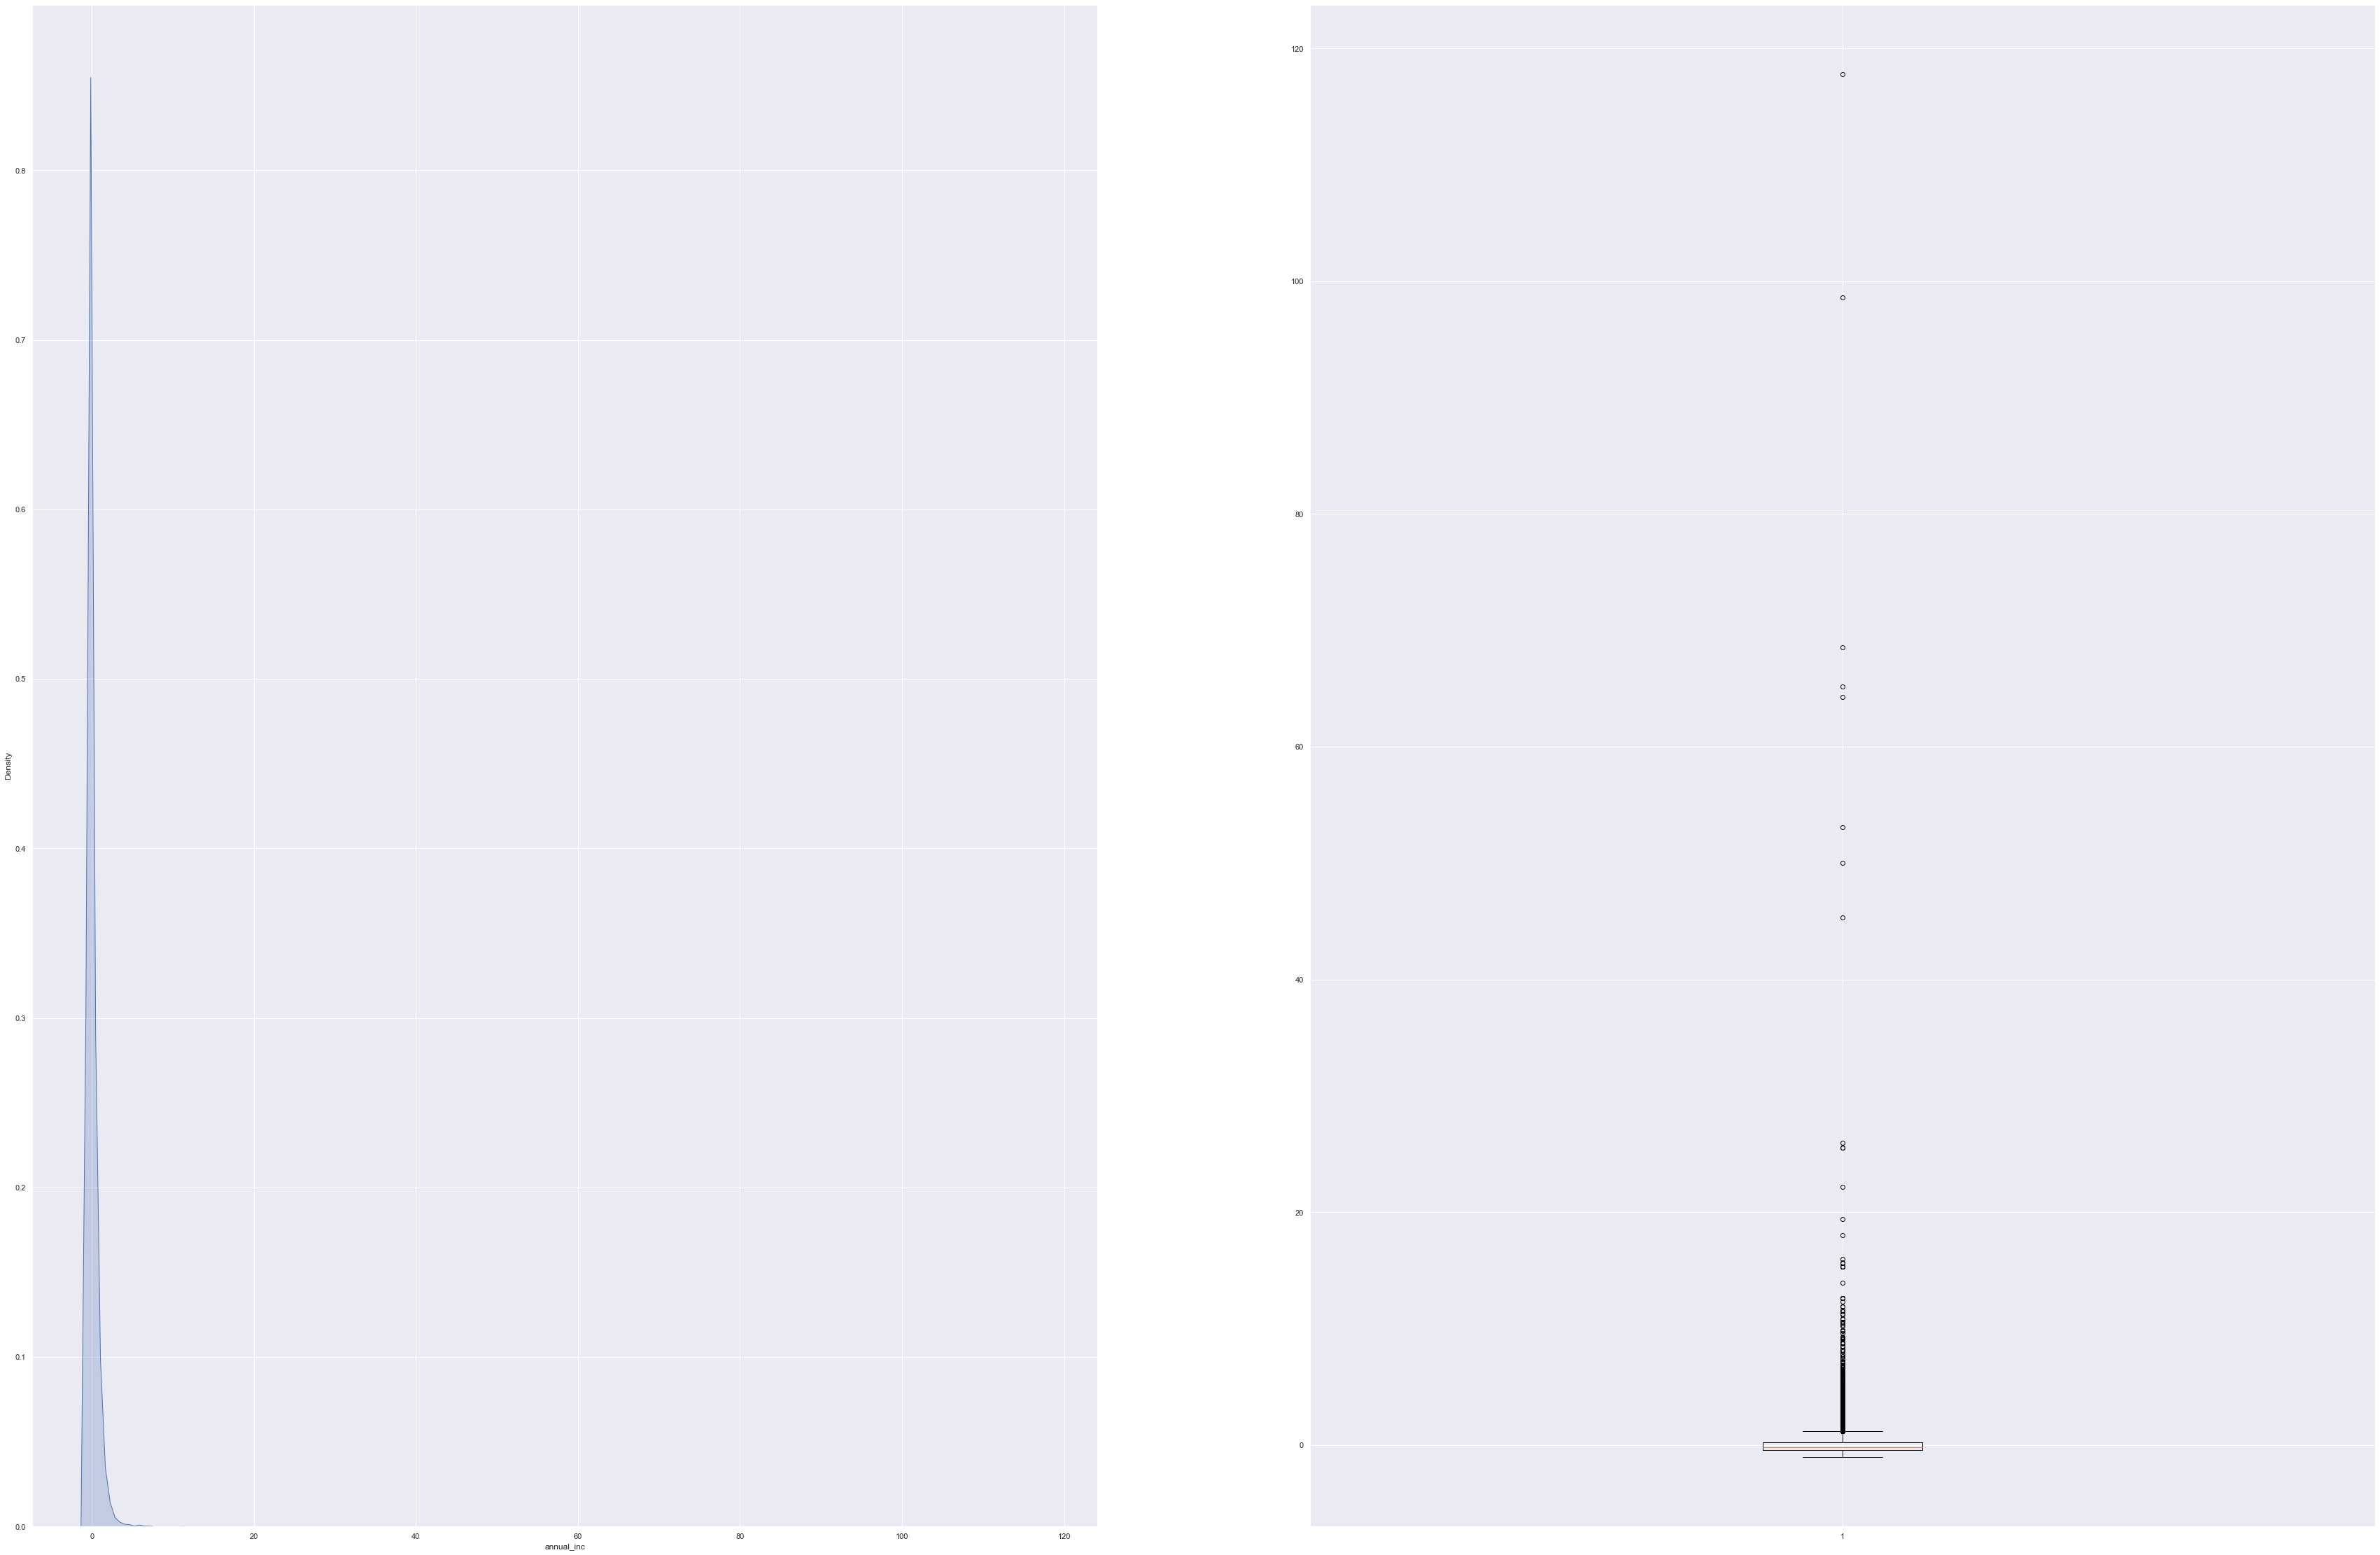

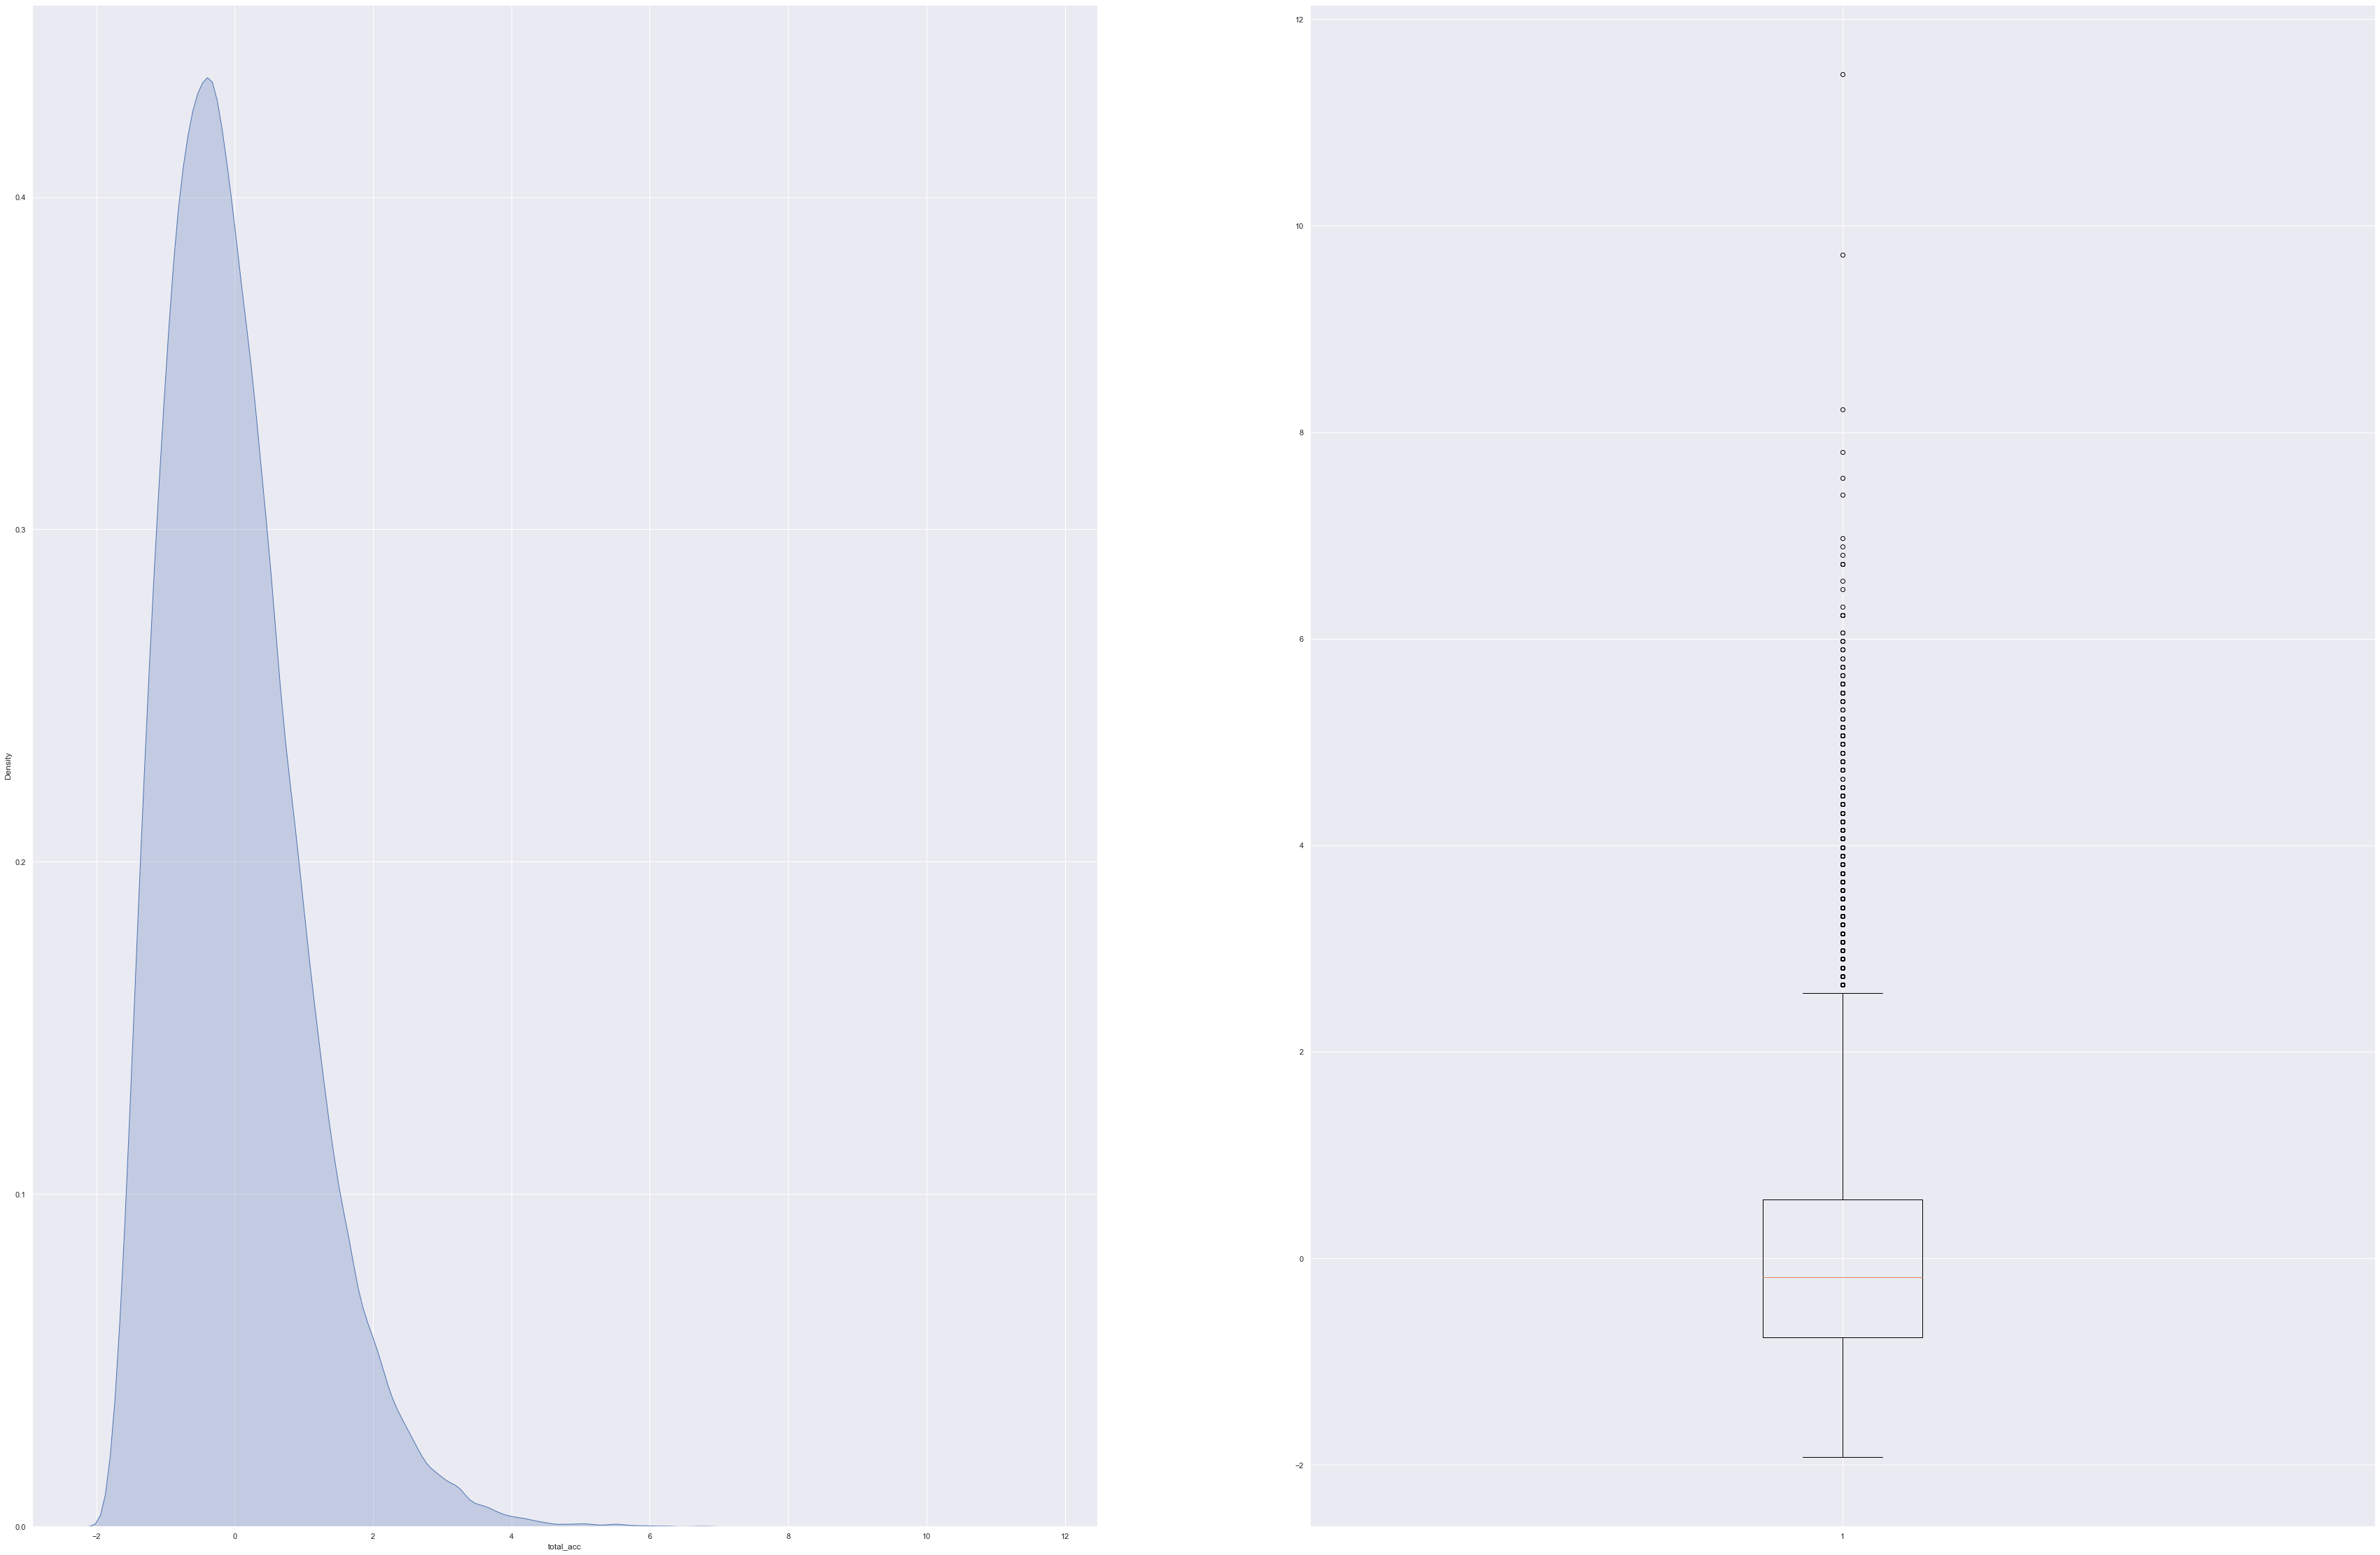

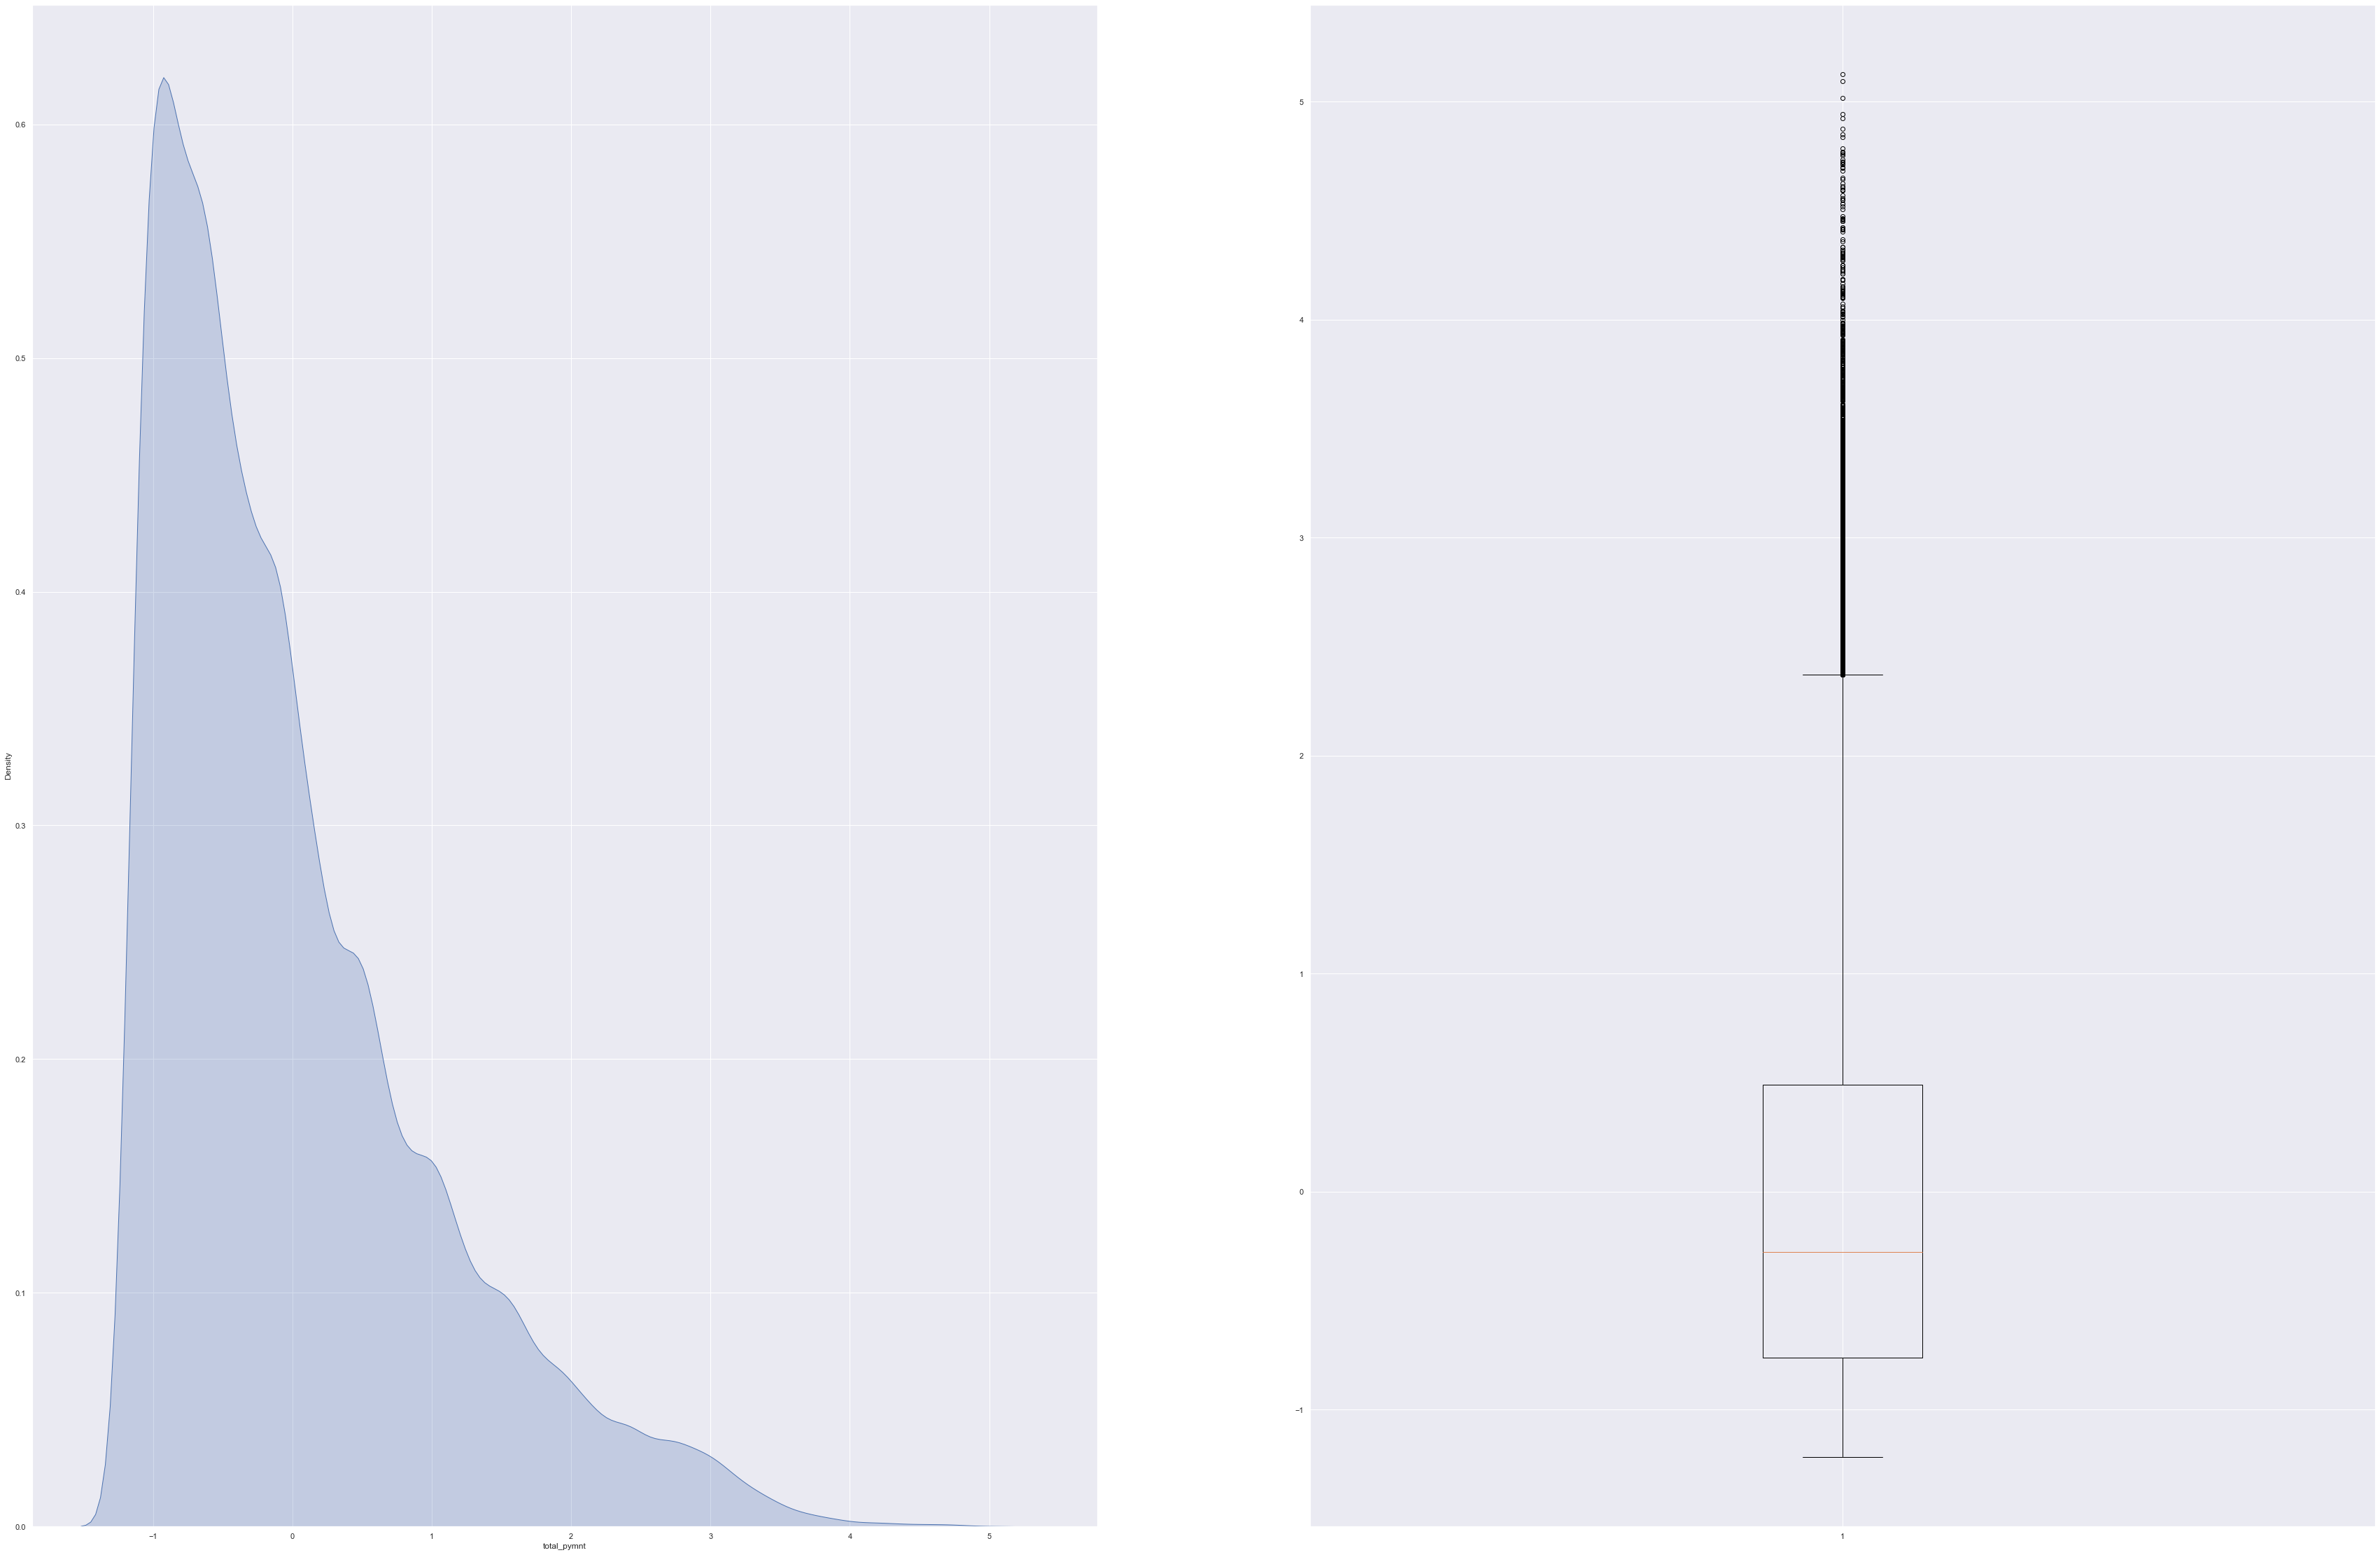

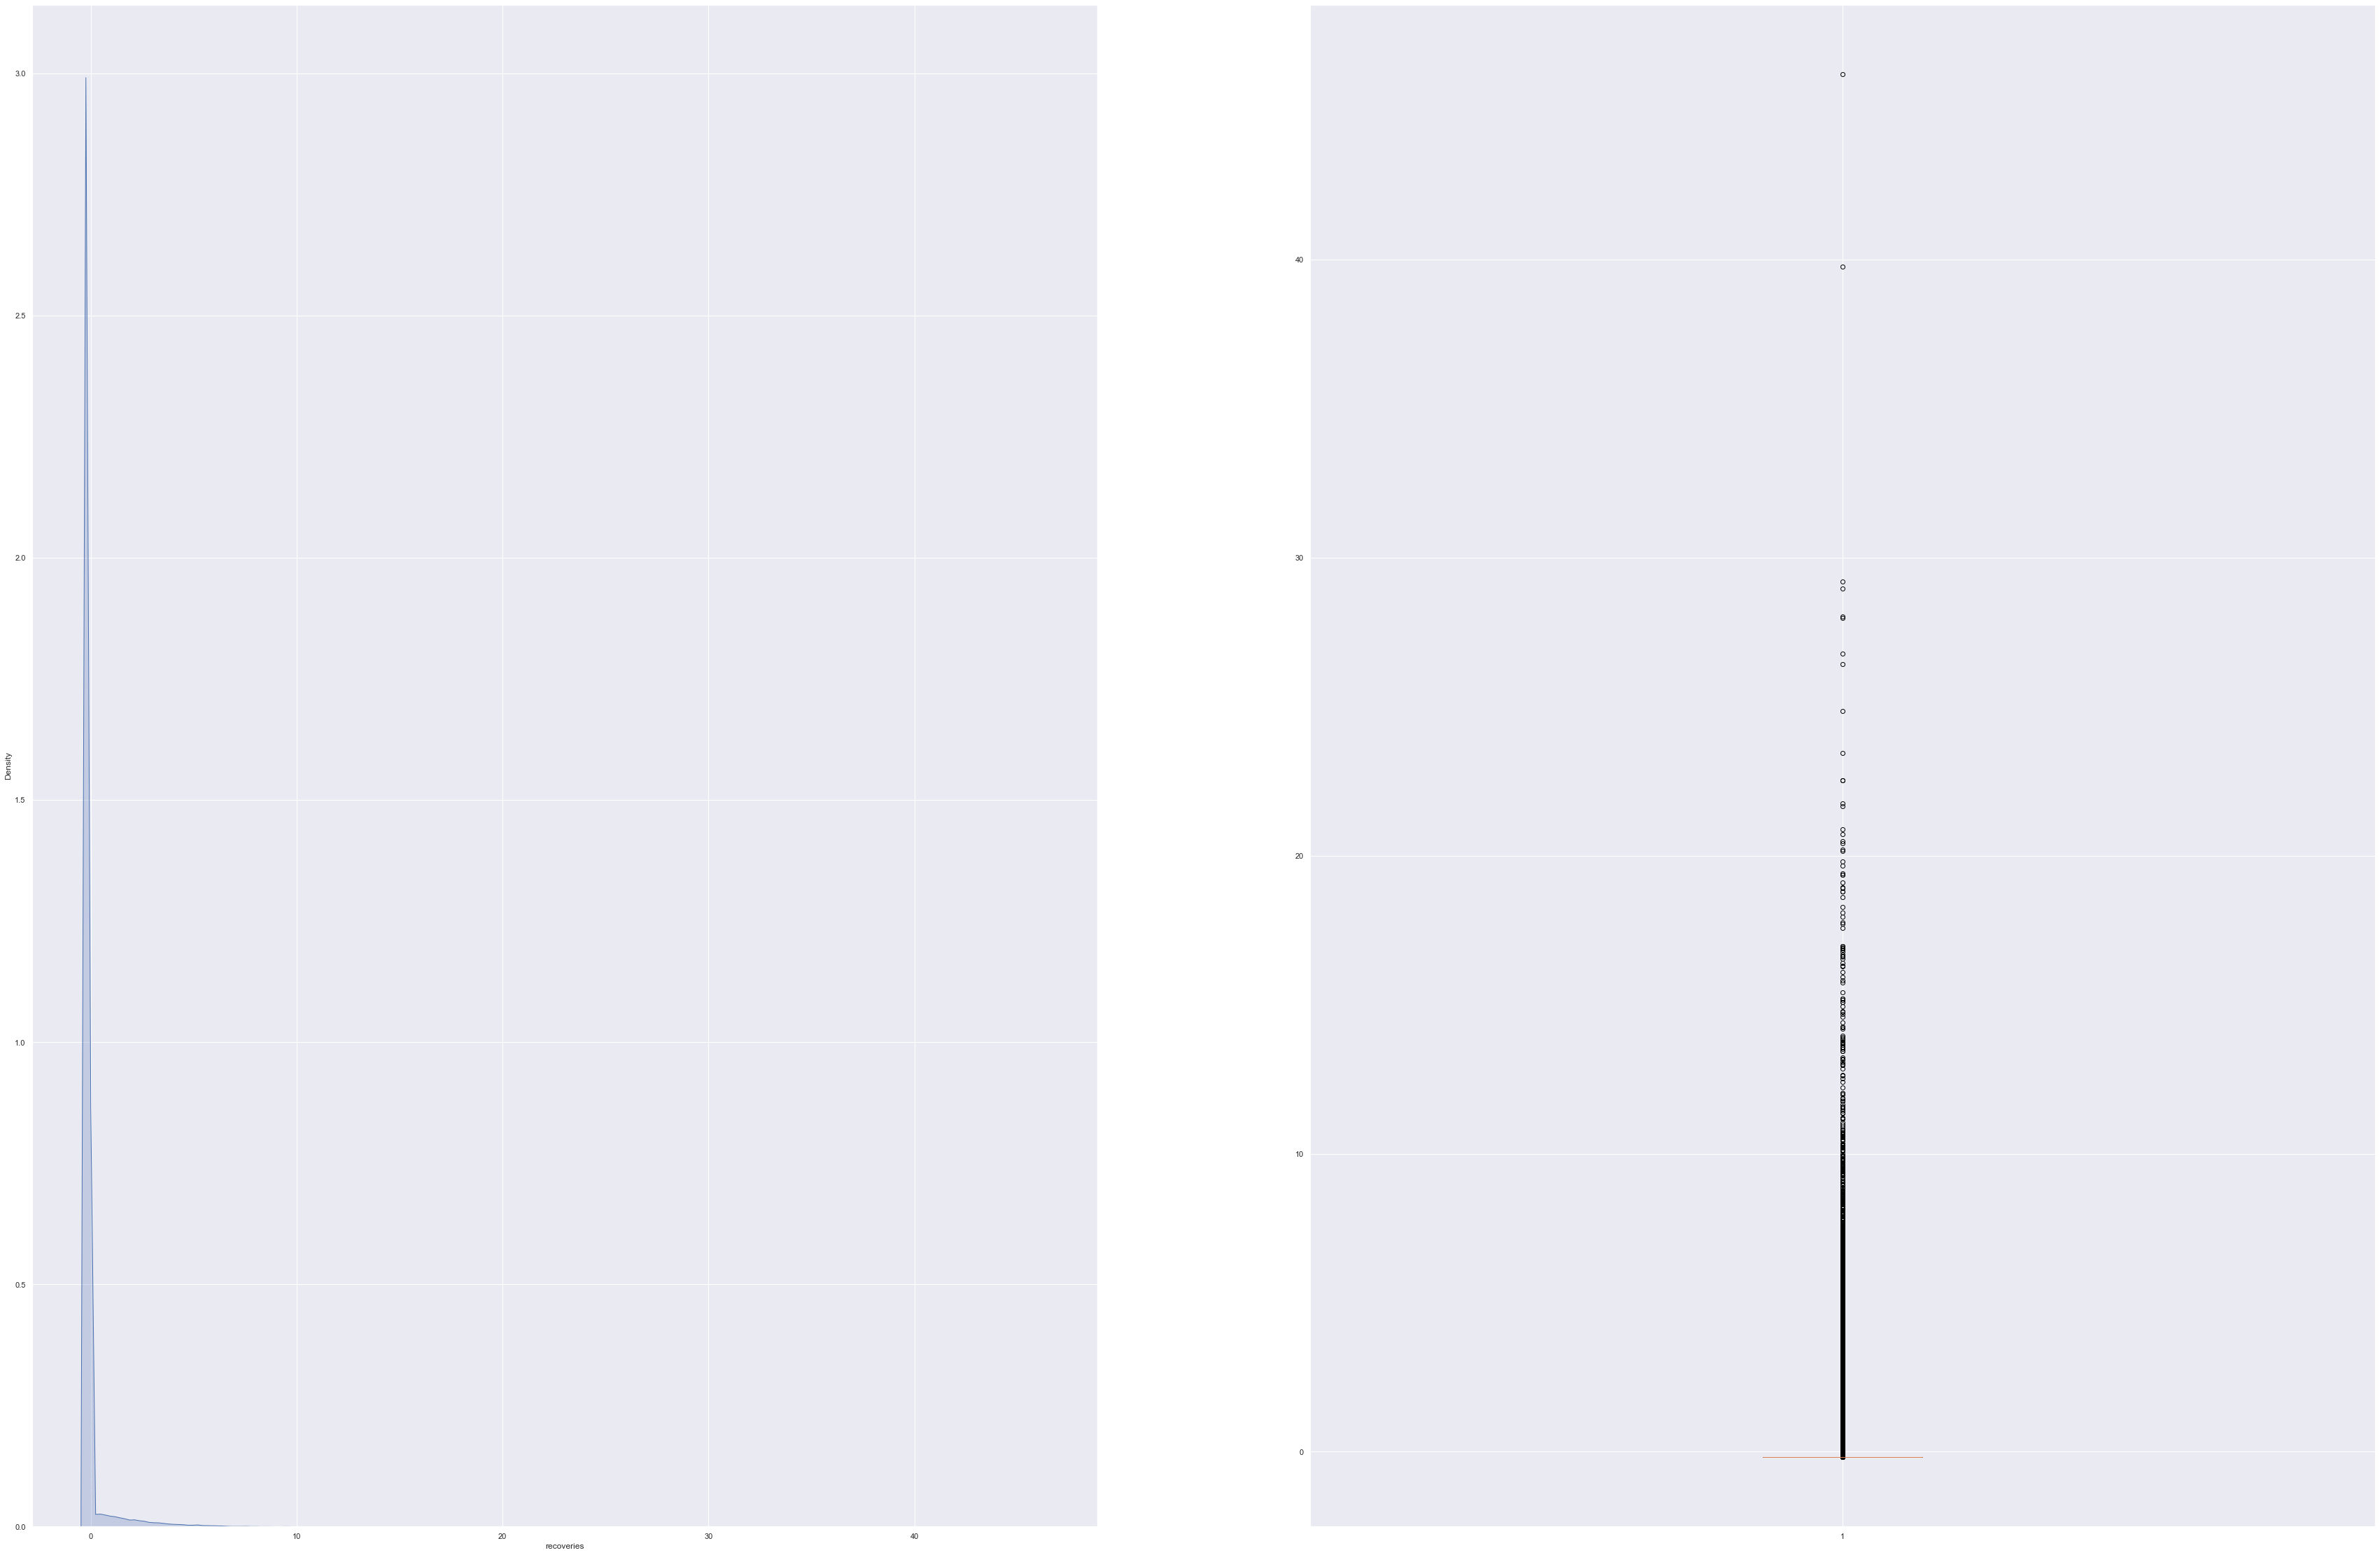

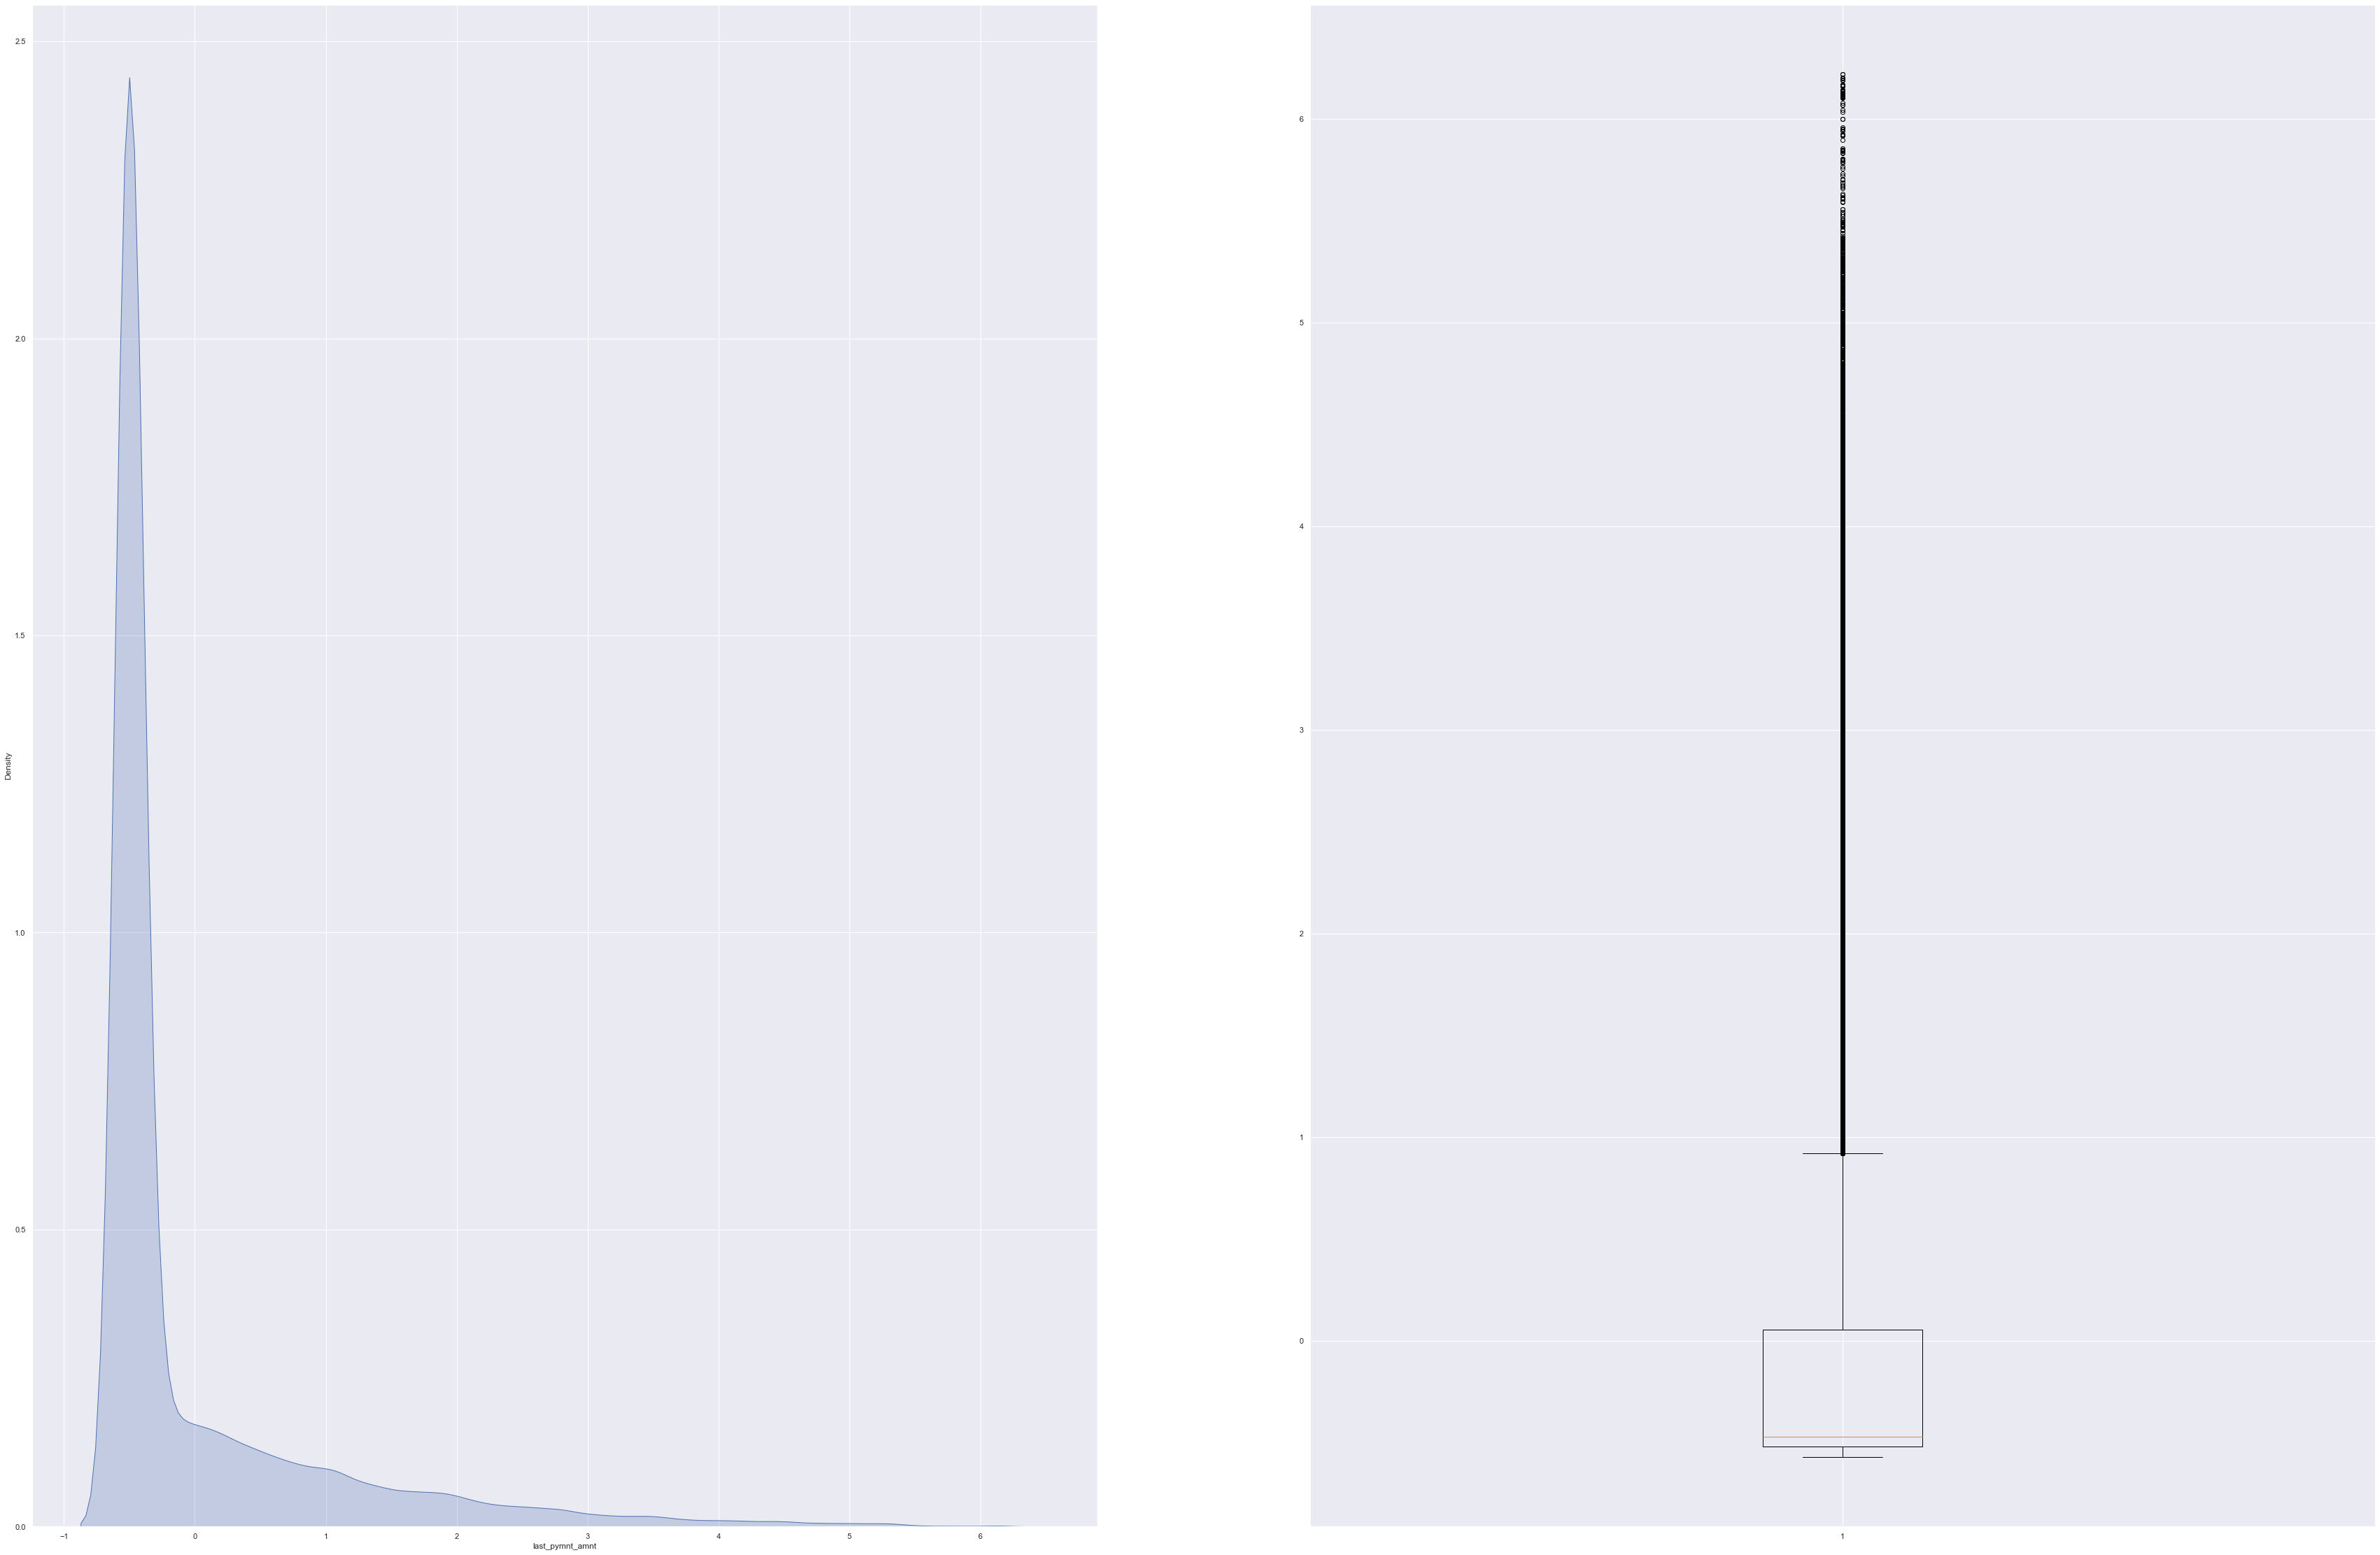

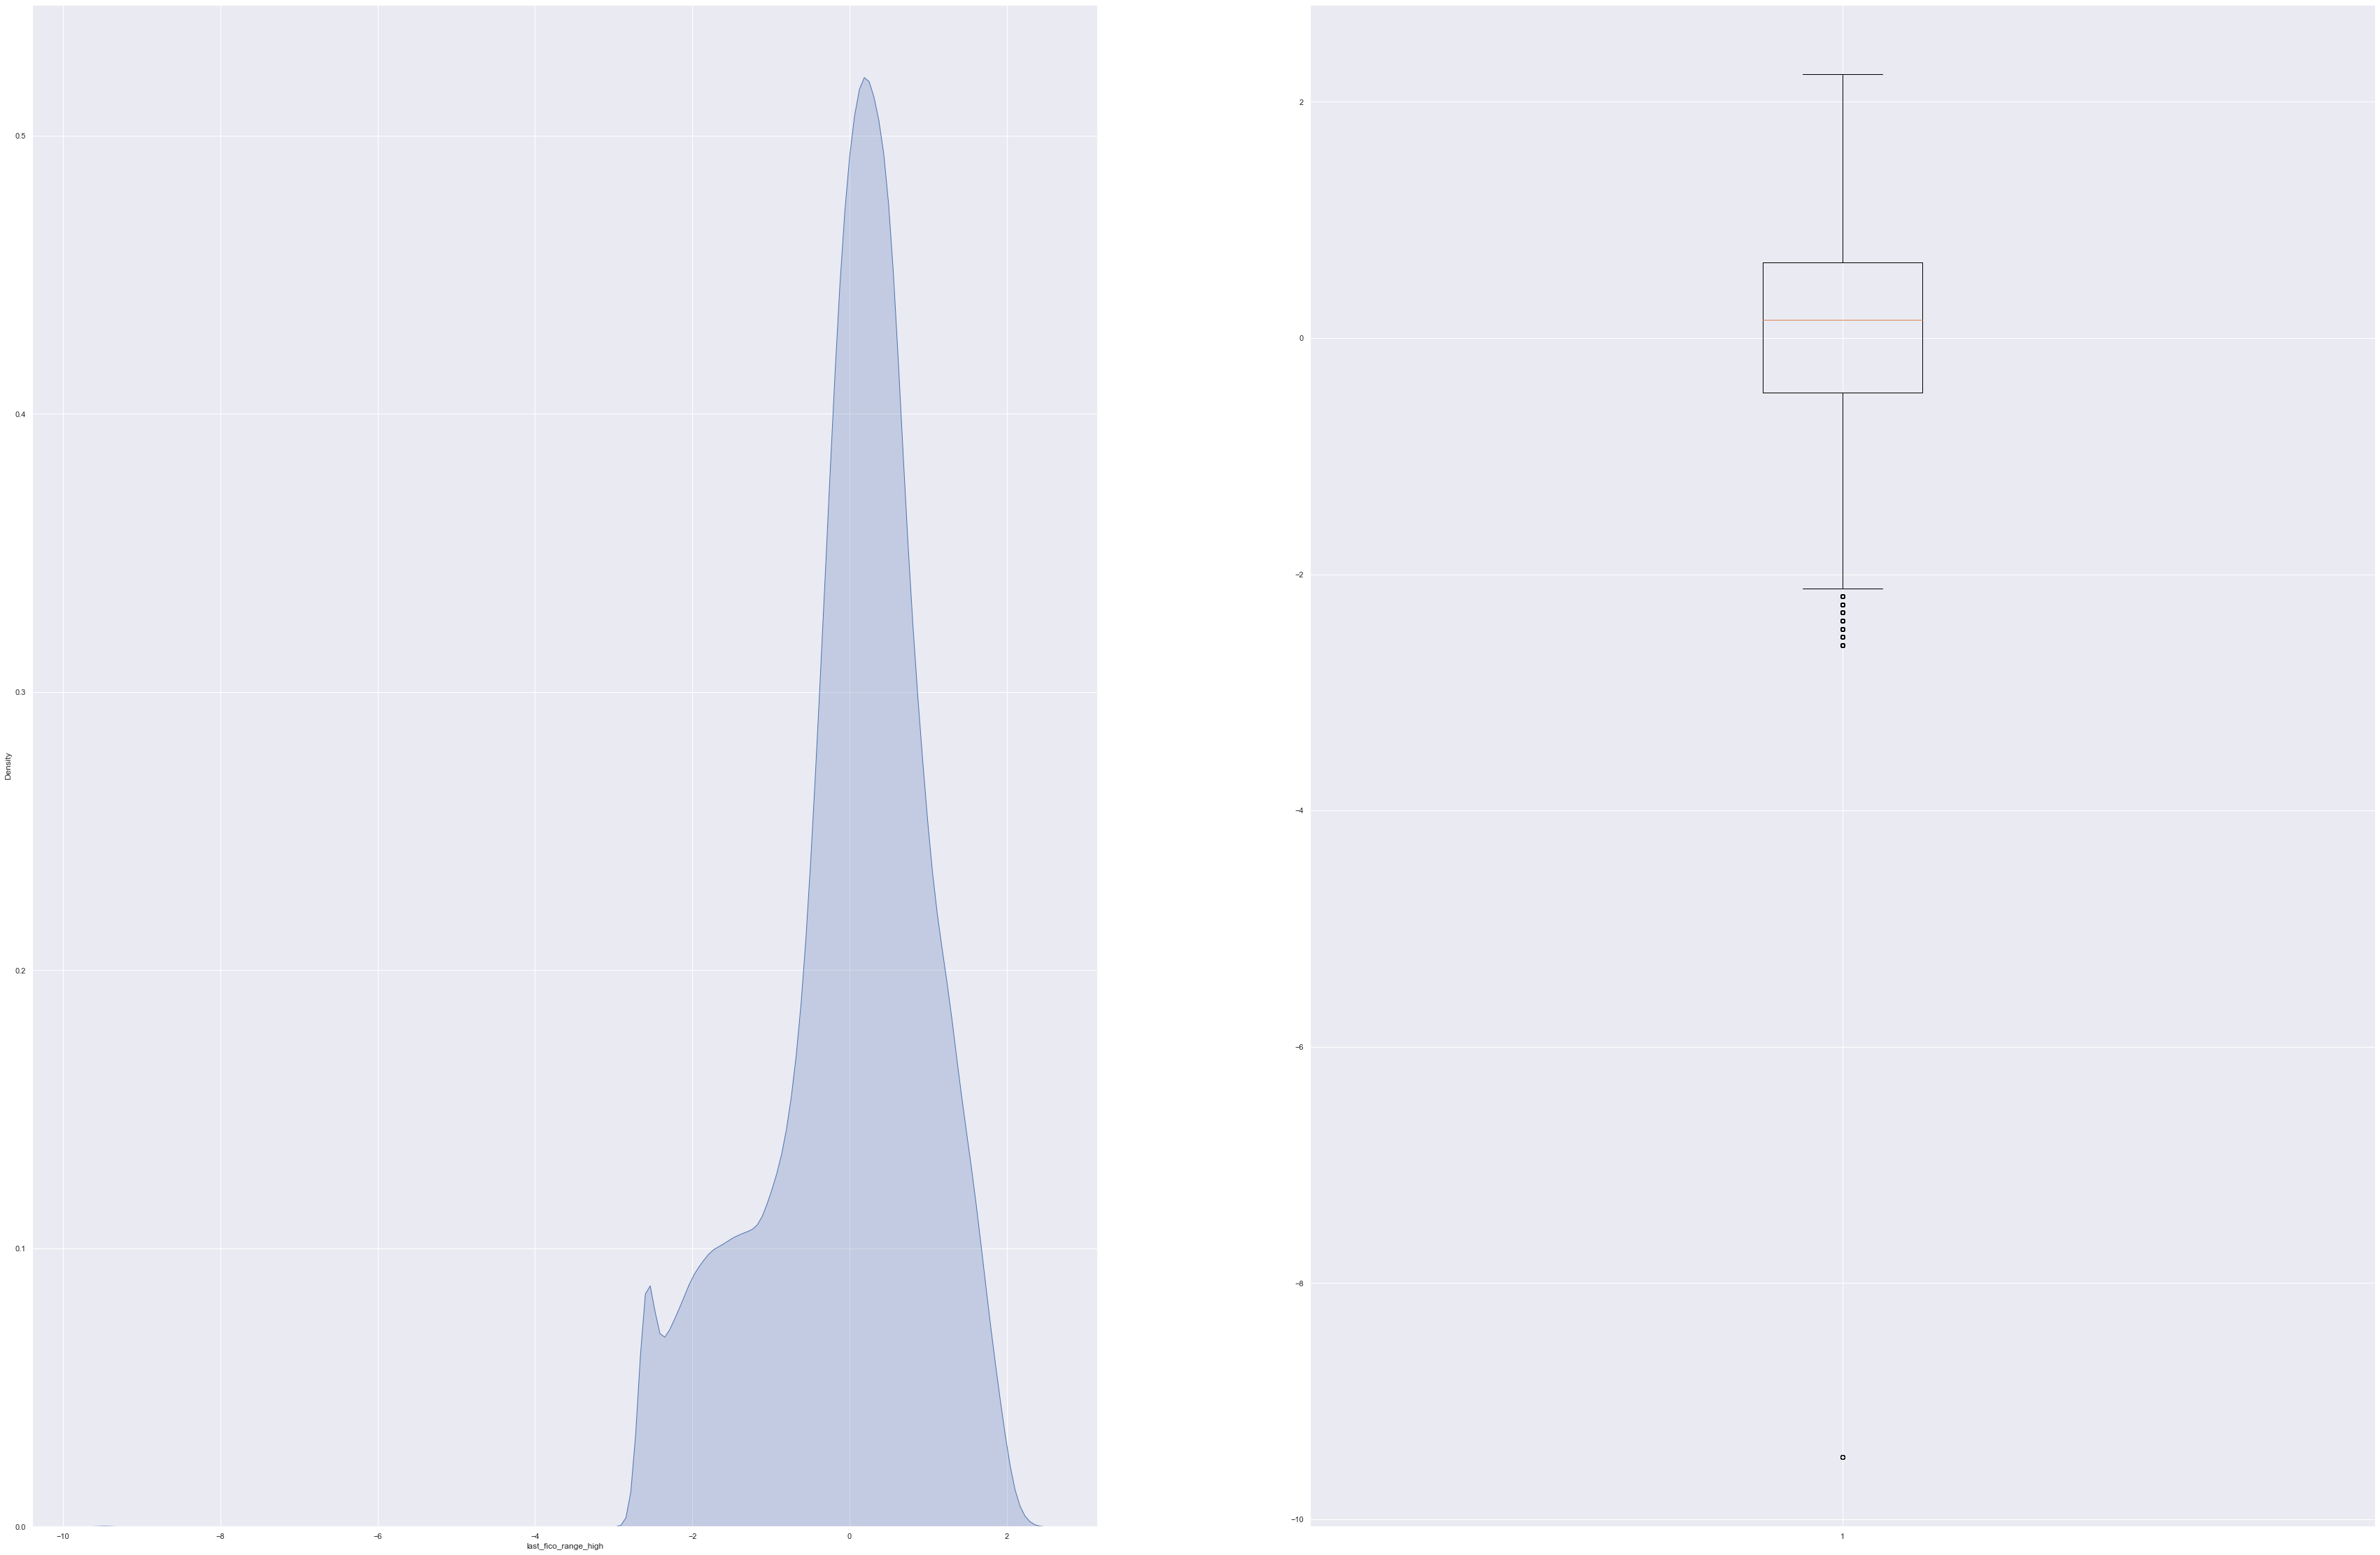

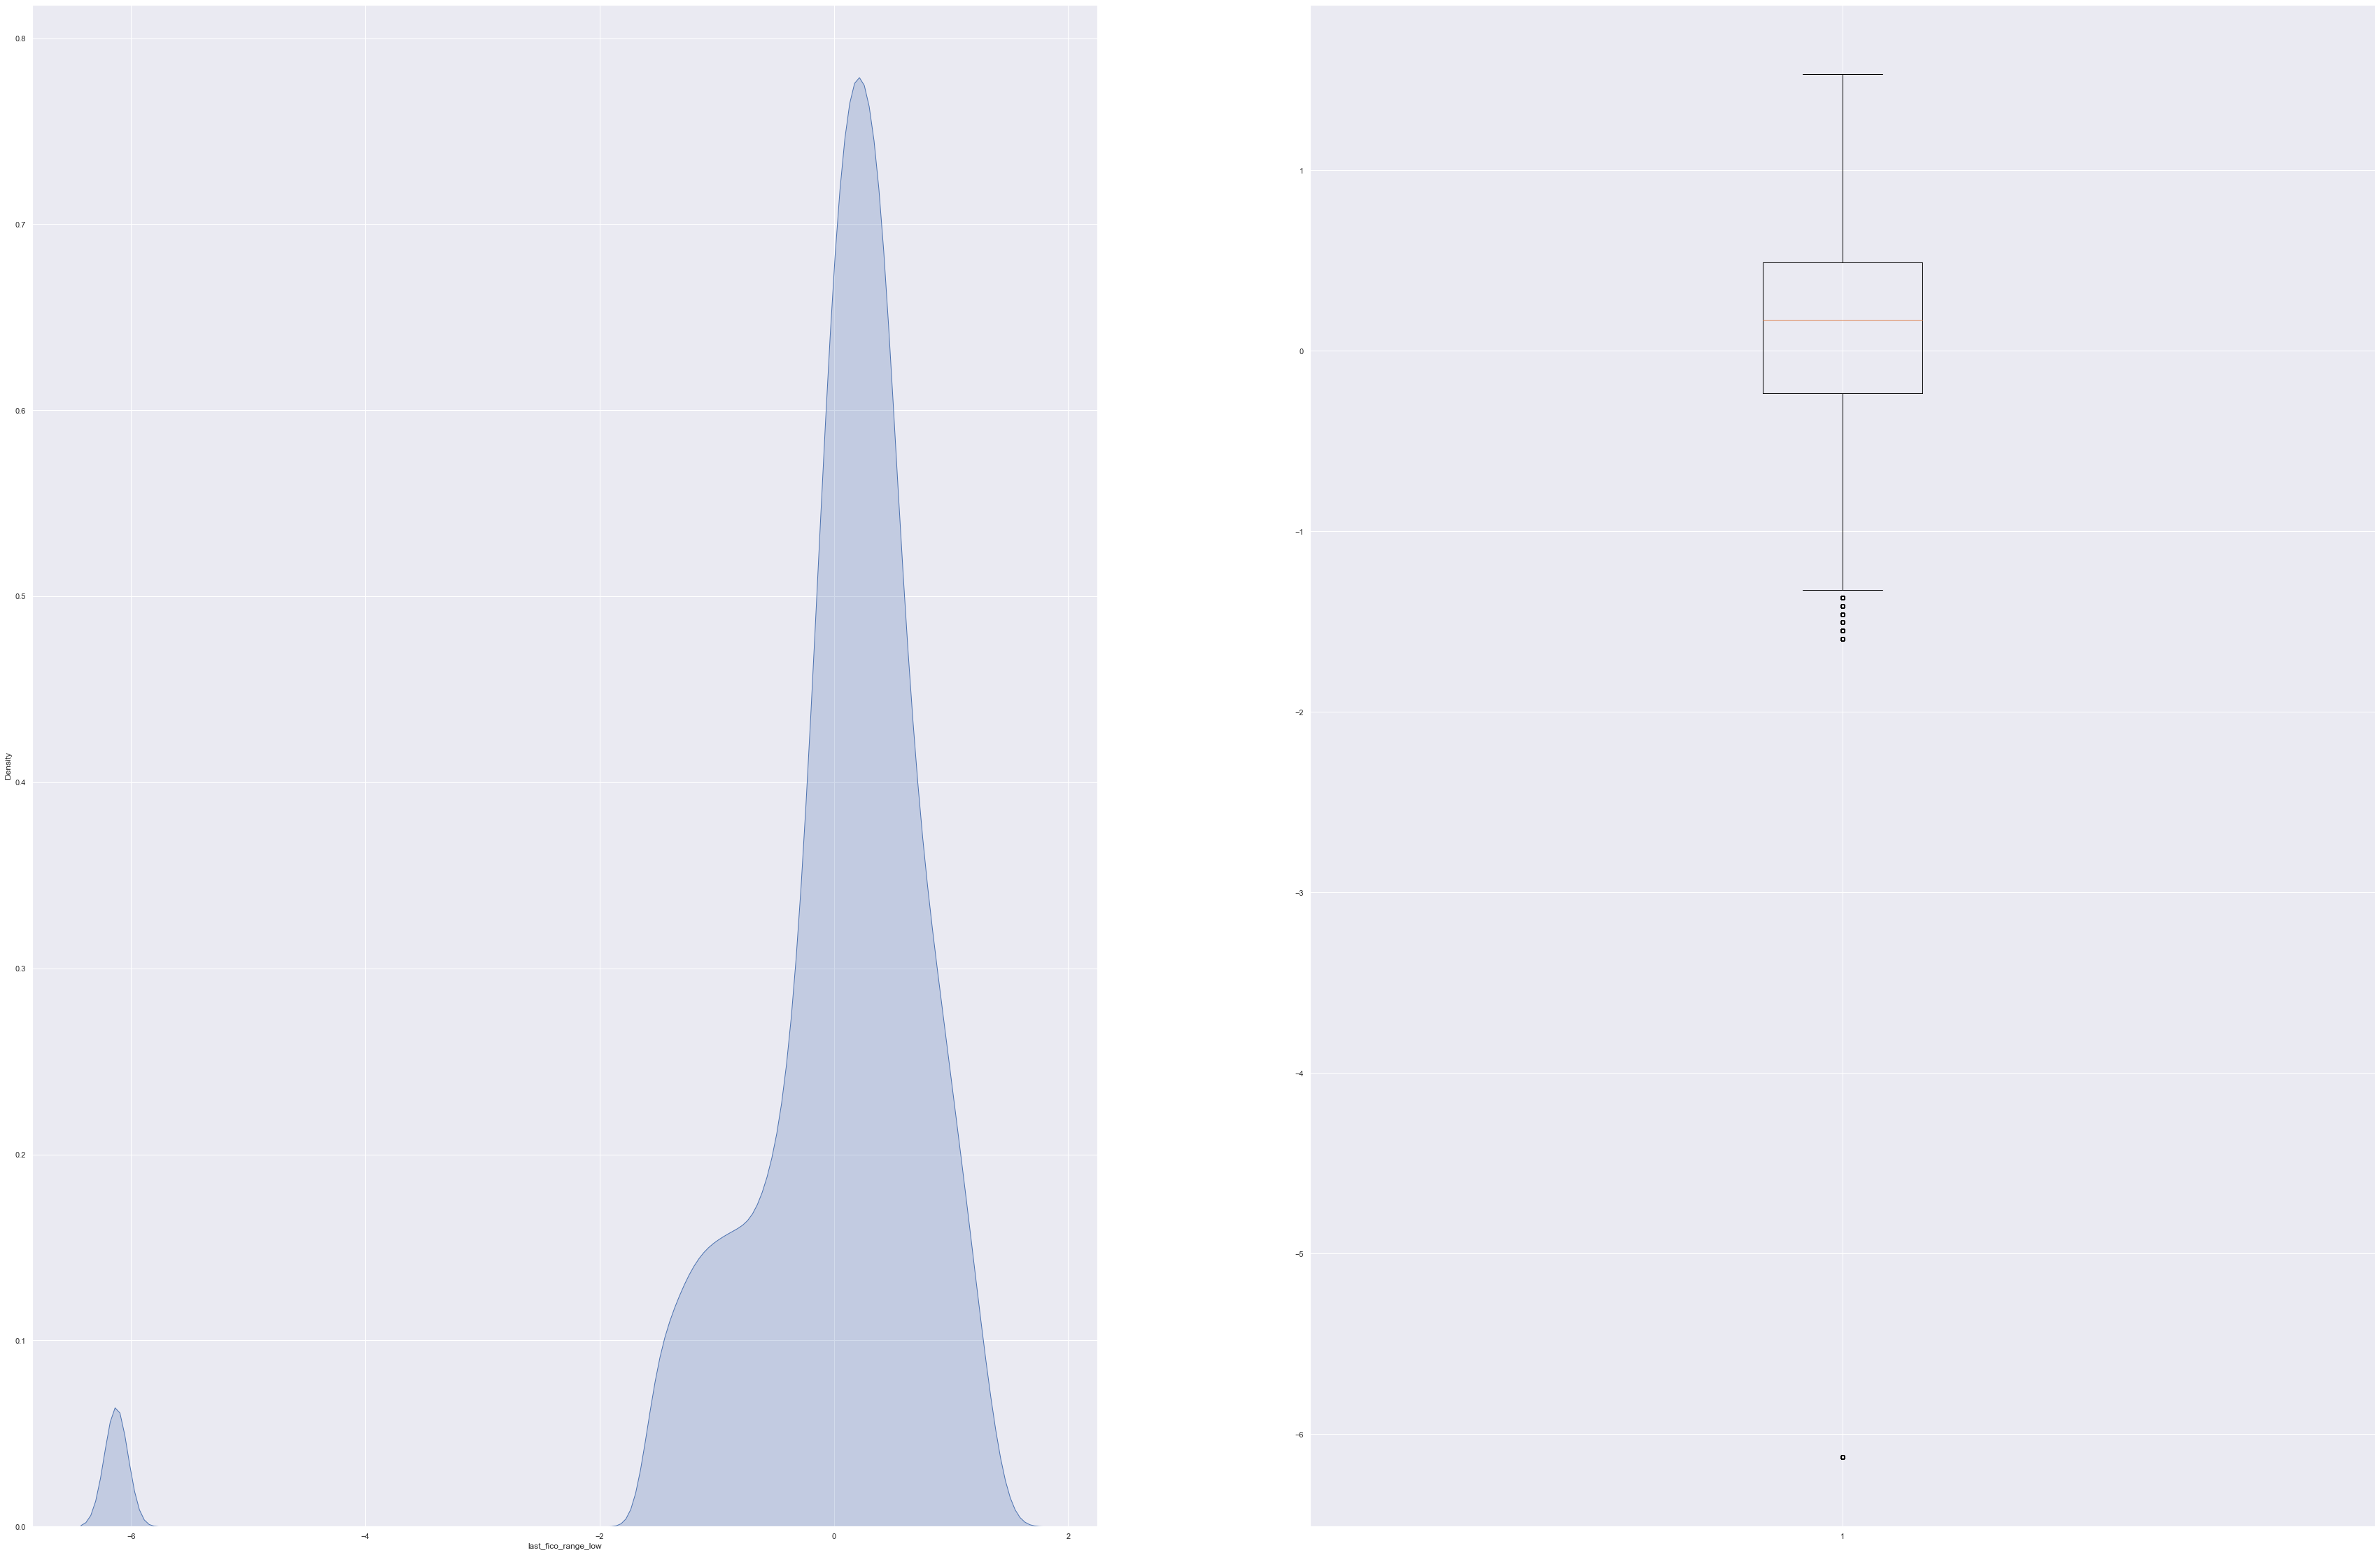

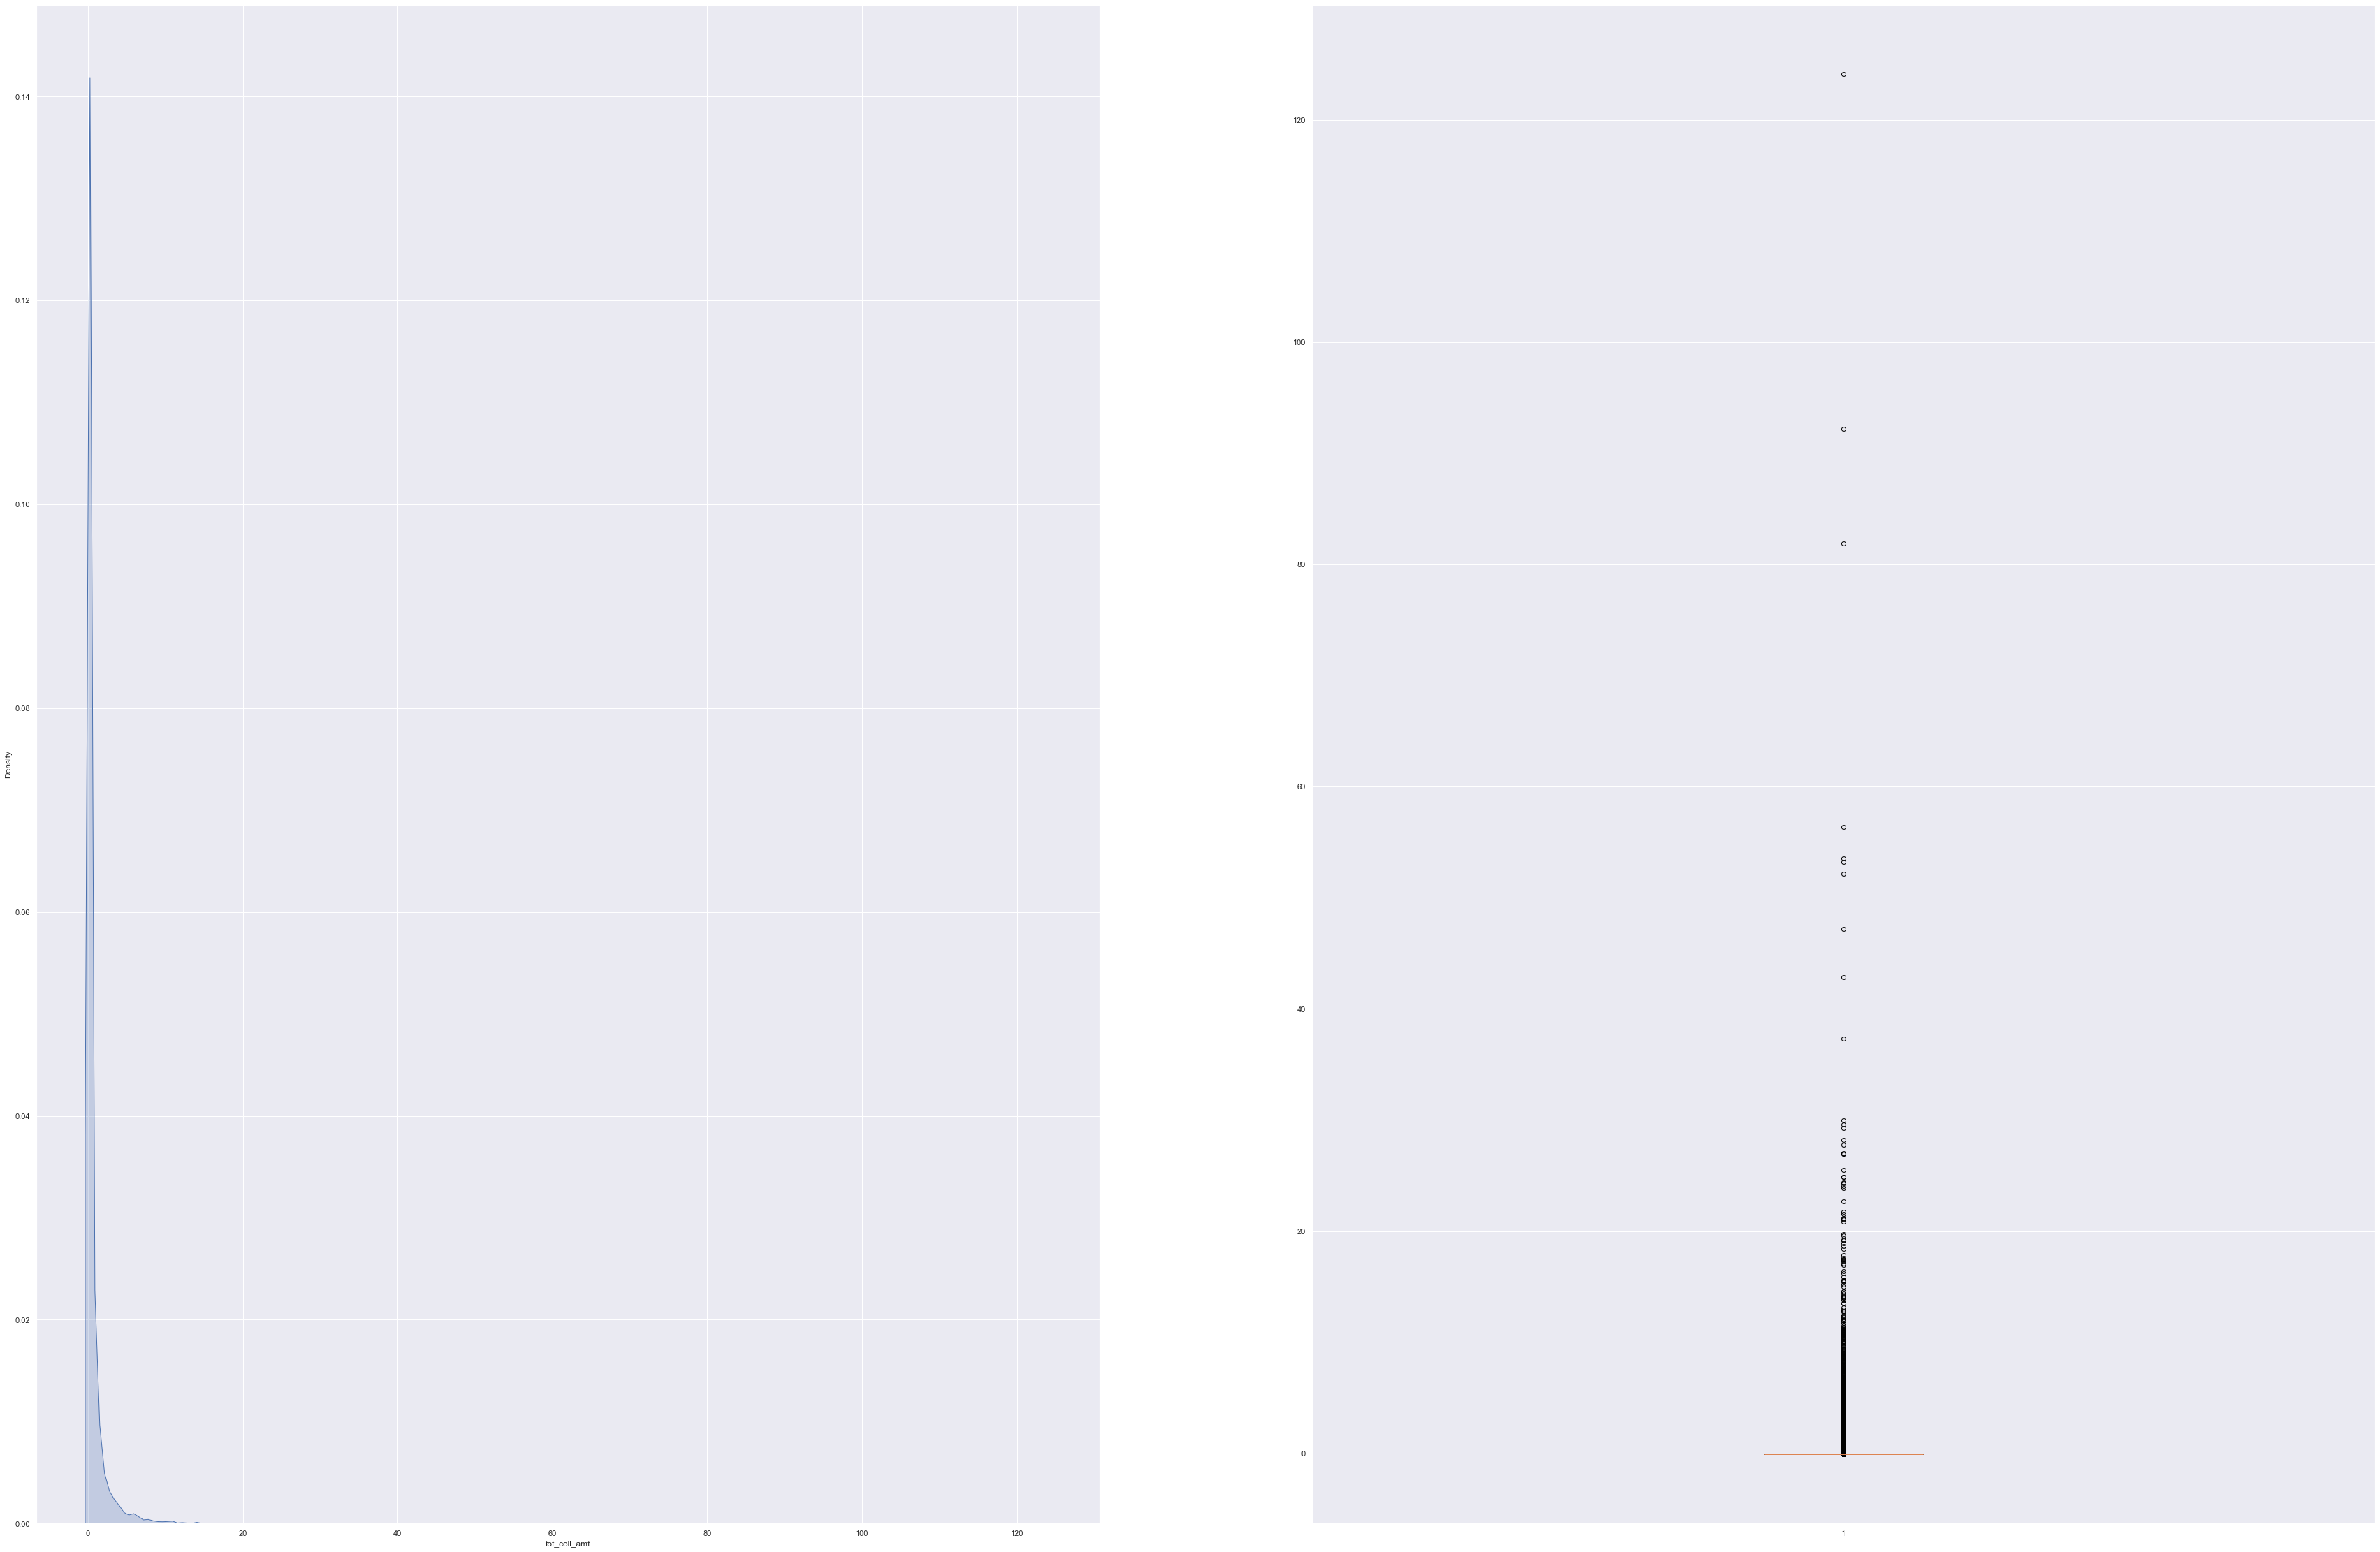

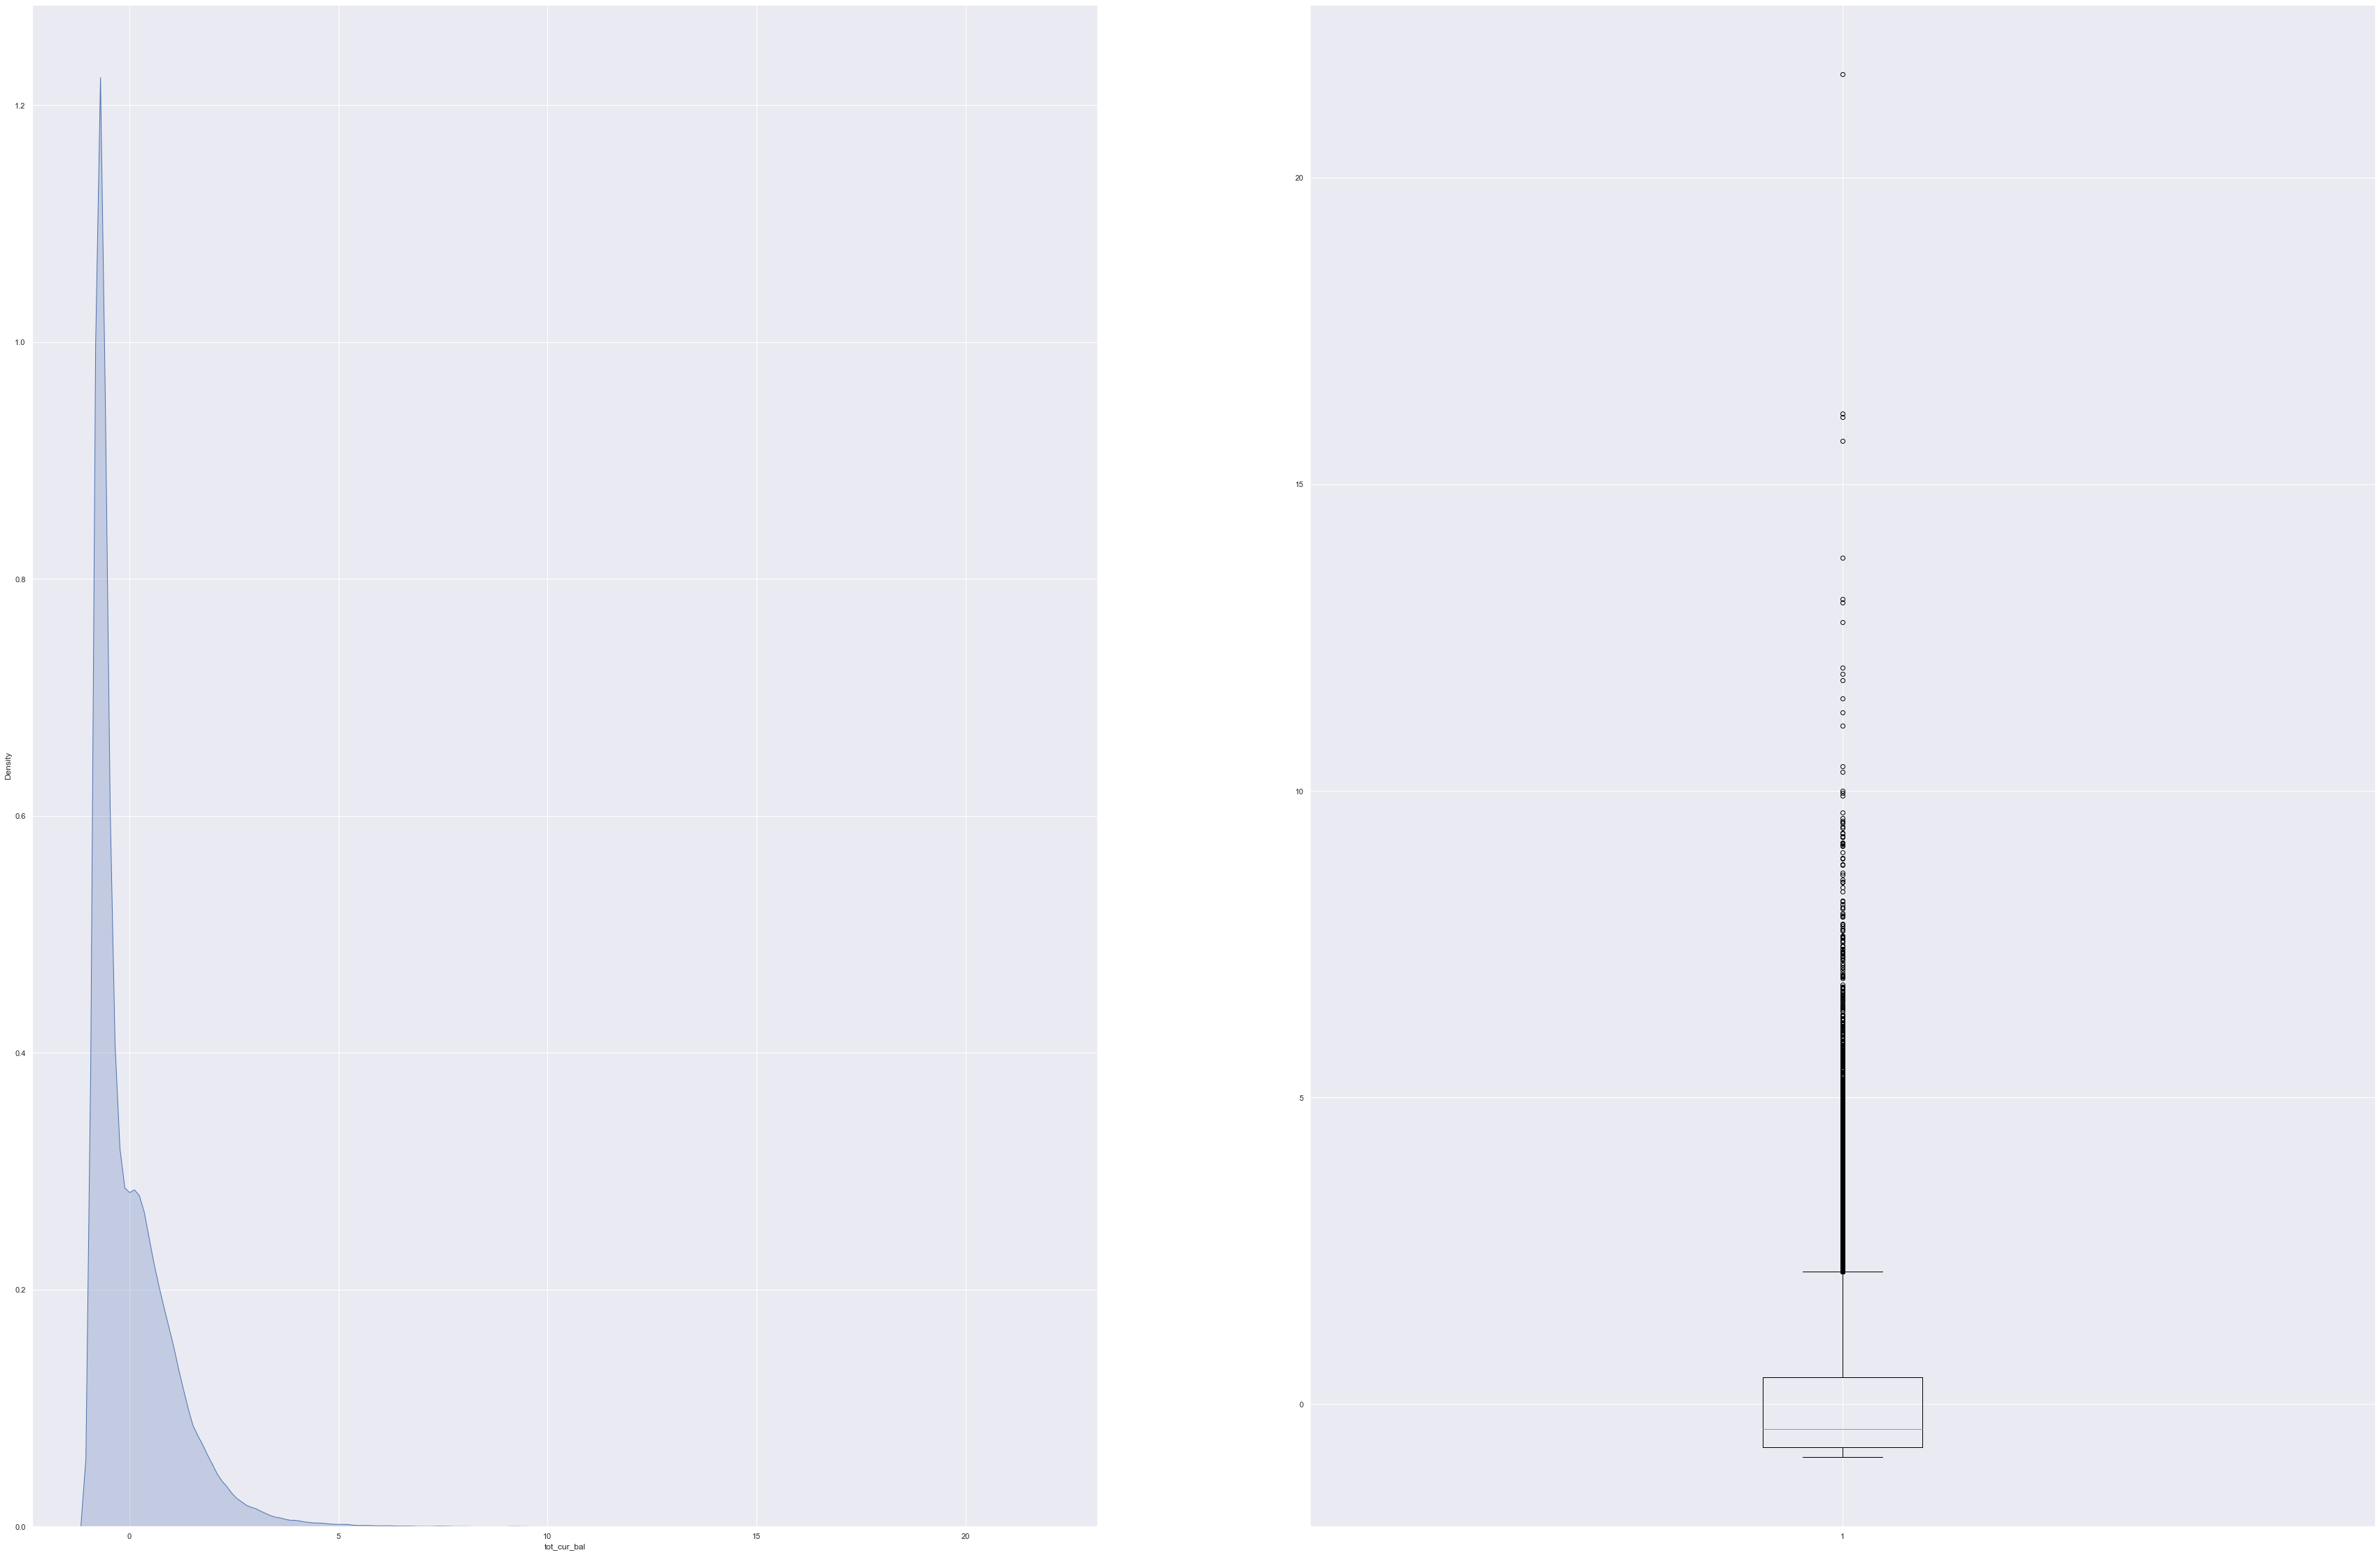

[None, None, None, None, None, None, None, None, None, None, None, None]

In [65]:
[Plot_Numerical_BoxandSub(df_num_std[col]) for col in df_num_std]

# Visualizing Normalized Data

In [66]:
arr_num_norm = Normalize_data(df.select_dtypes('number'))
df_num_norm = pd.DataFrame(arr_num_norm,columns=df.select_dtypes('number').columns)
df_num_norm.head(3)

loan_amnt  int_rate  emp_length  annual_inc  total_acc  total_pymnt  \
0   0.052697  0.000029    0.000000    0.368882   0.000087     0.059074   
1   0.126585  0.000087    0.000087    0.585454   0.000190     0.127284   
2   0.232563  0.000115    0.000072    0.948314   0.000244     0.080699   

   recoveries  last_pymnt_amnt  last_fico_range_high  last_fico_range_low  \
0    0.000000         0.033205              0.001512             0.001502   
1    0.000000         0.127439              0.005688             0.005657   
2    0.028256         0.005261              0.005636             0.005600   

   tot_coll_amt  tot_cur_bal  
0      0.000000     0.925501  
1      0.007579     0.780164  
2      0.000000     0.198026

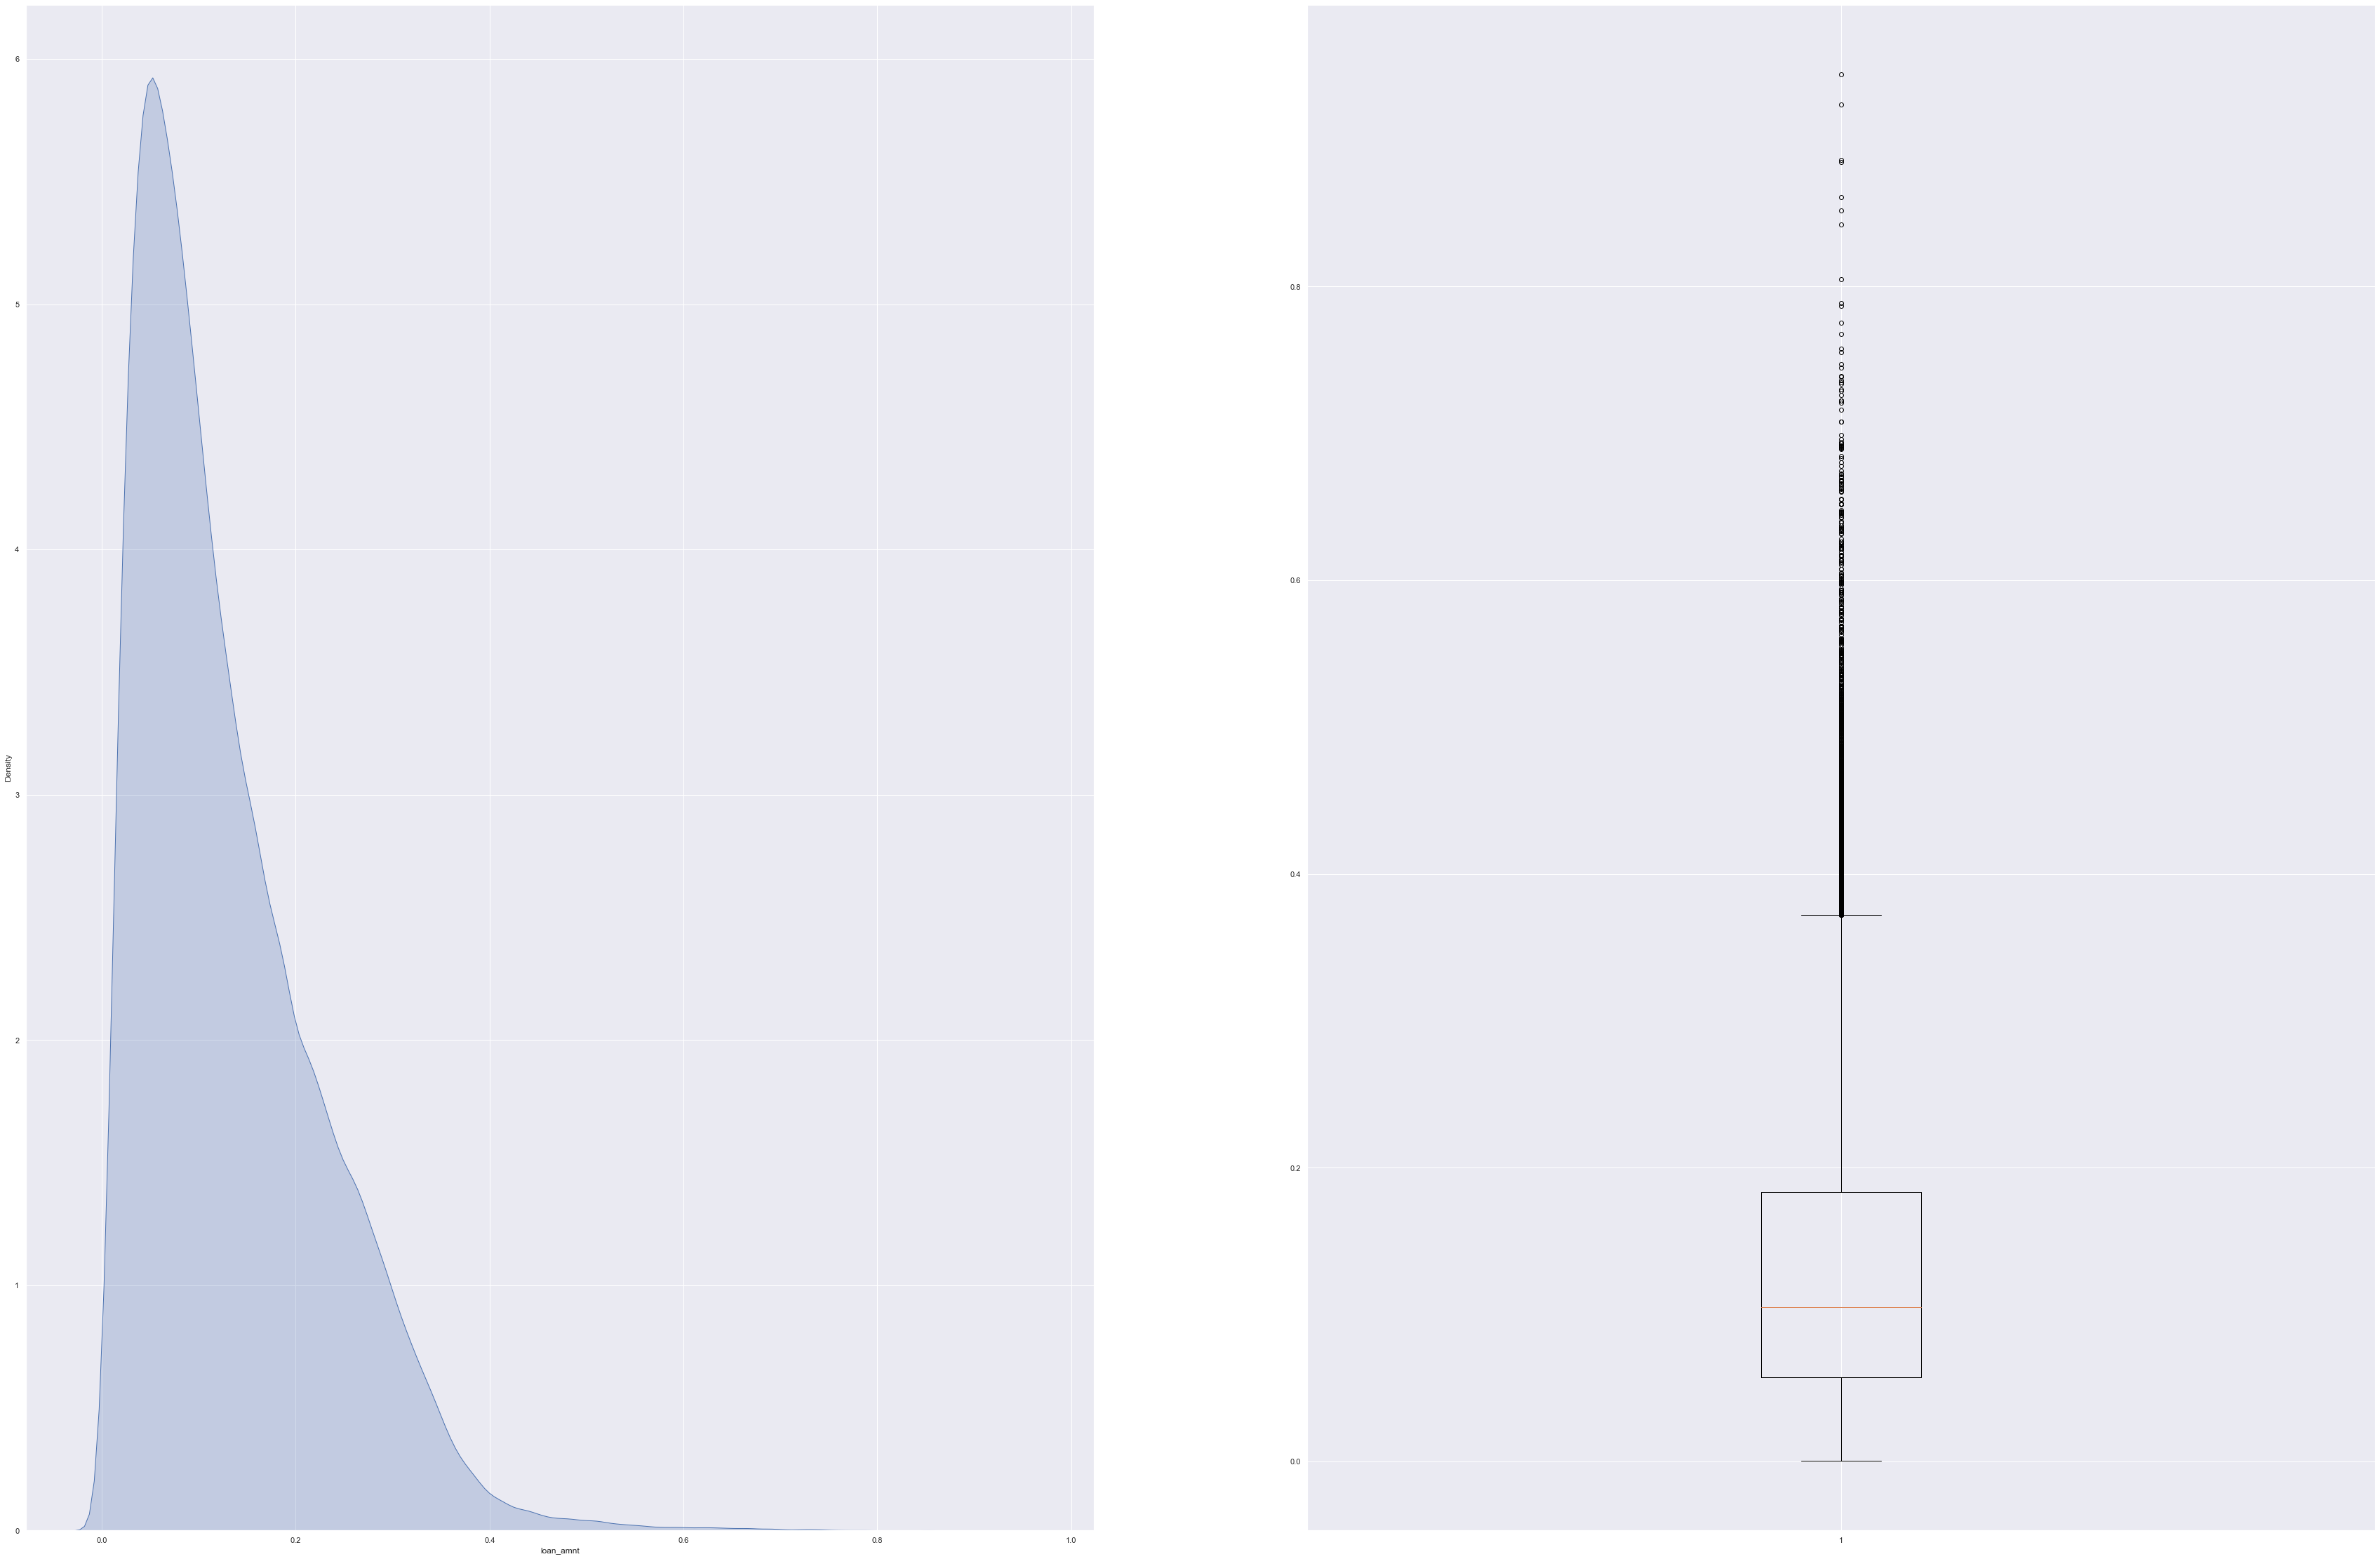

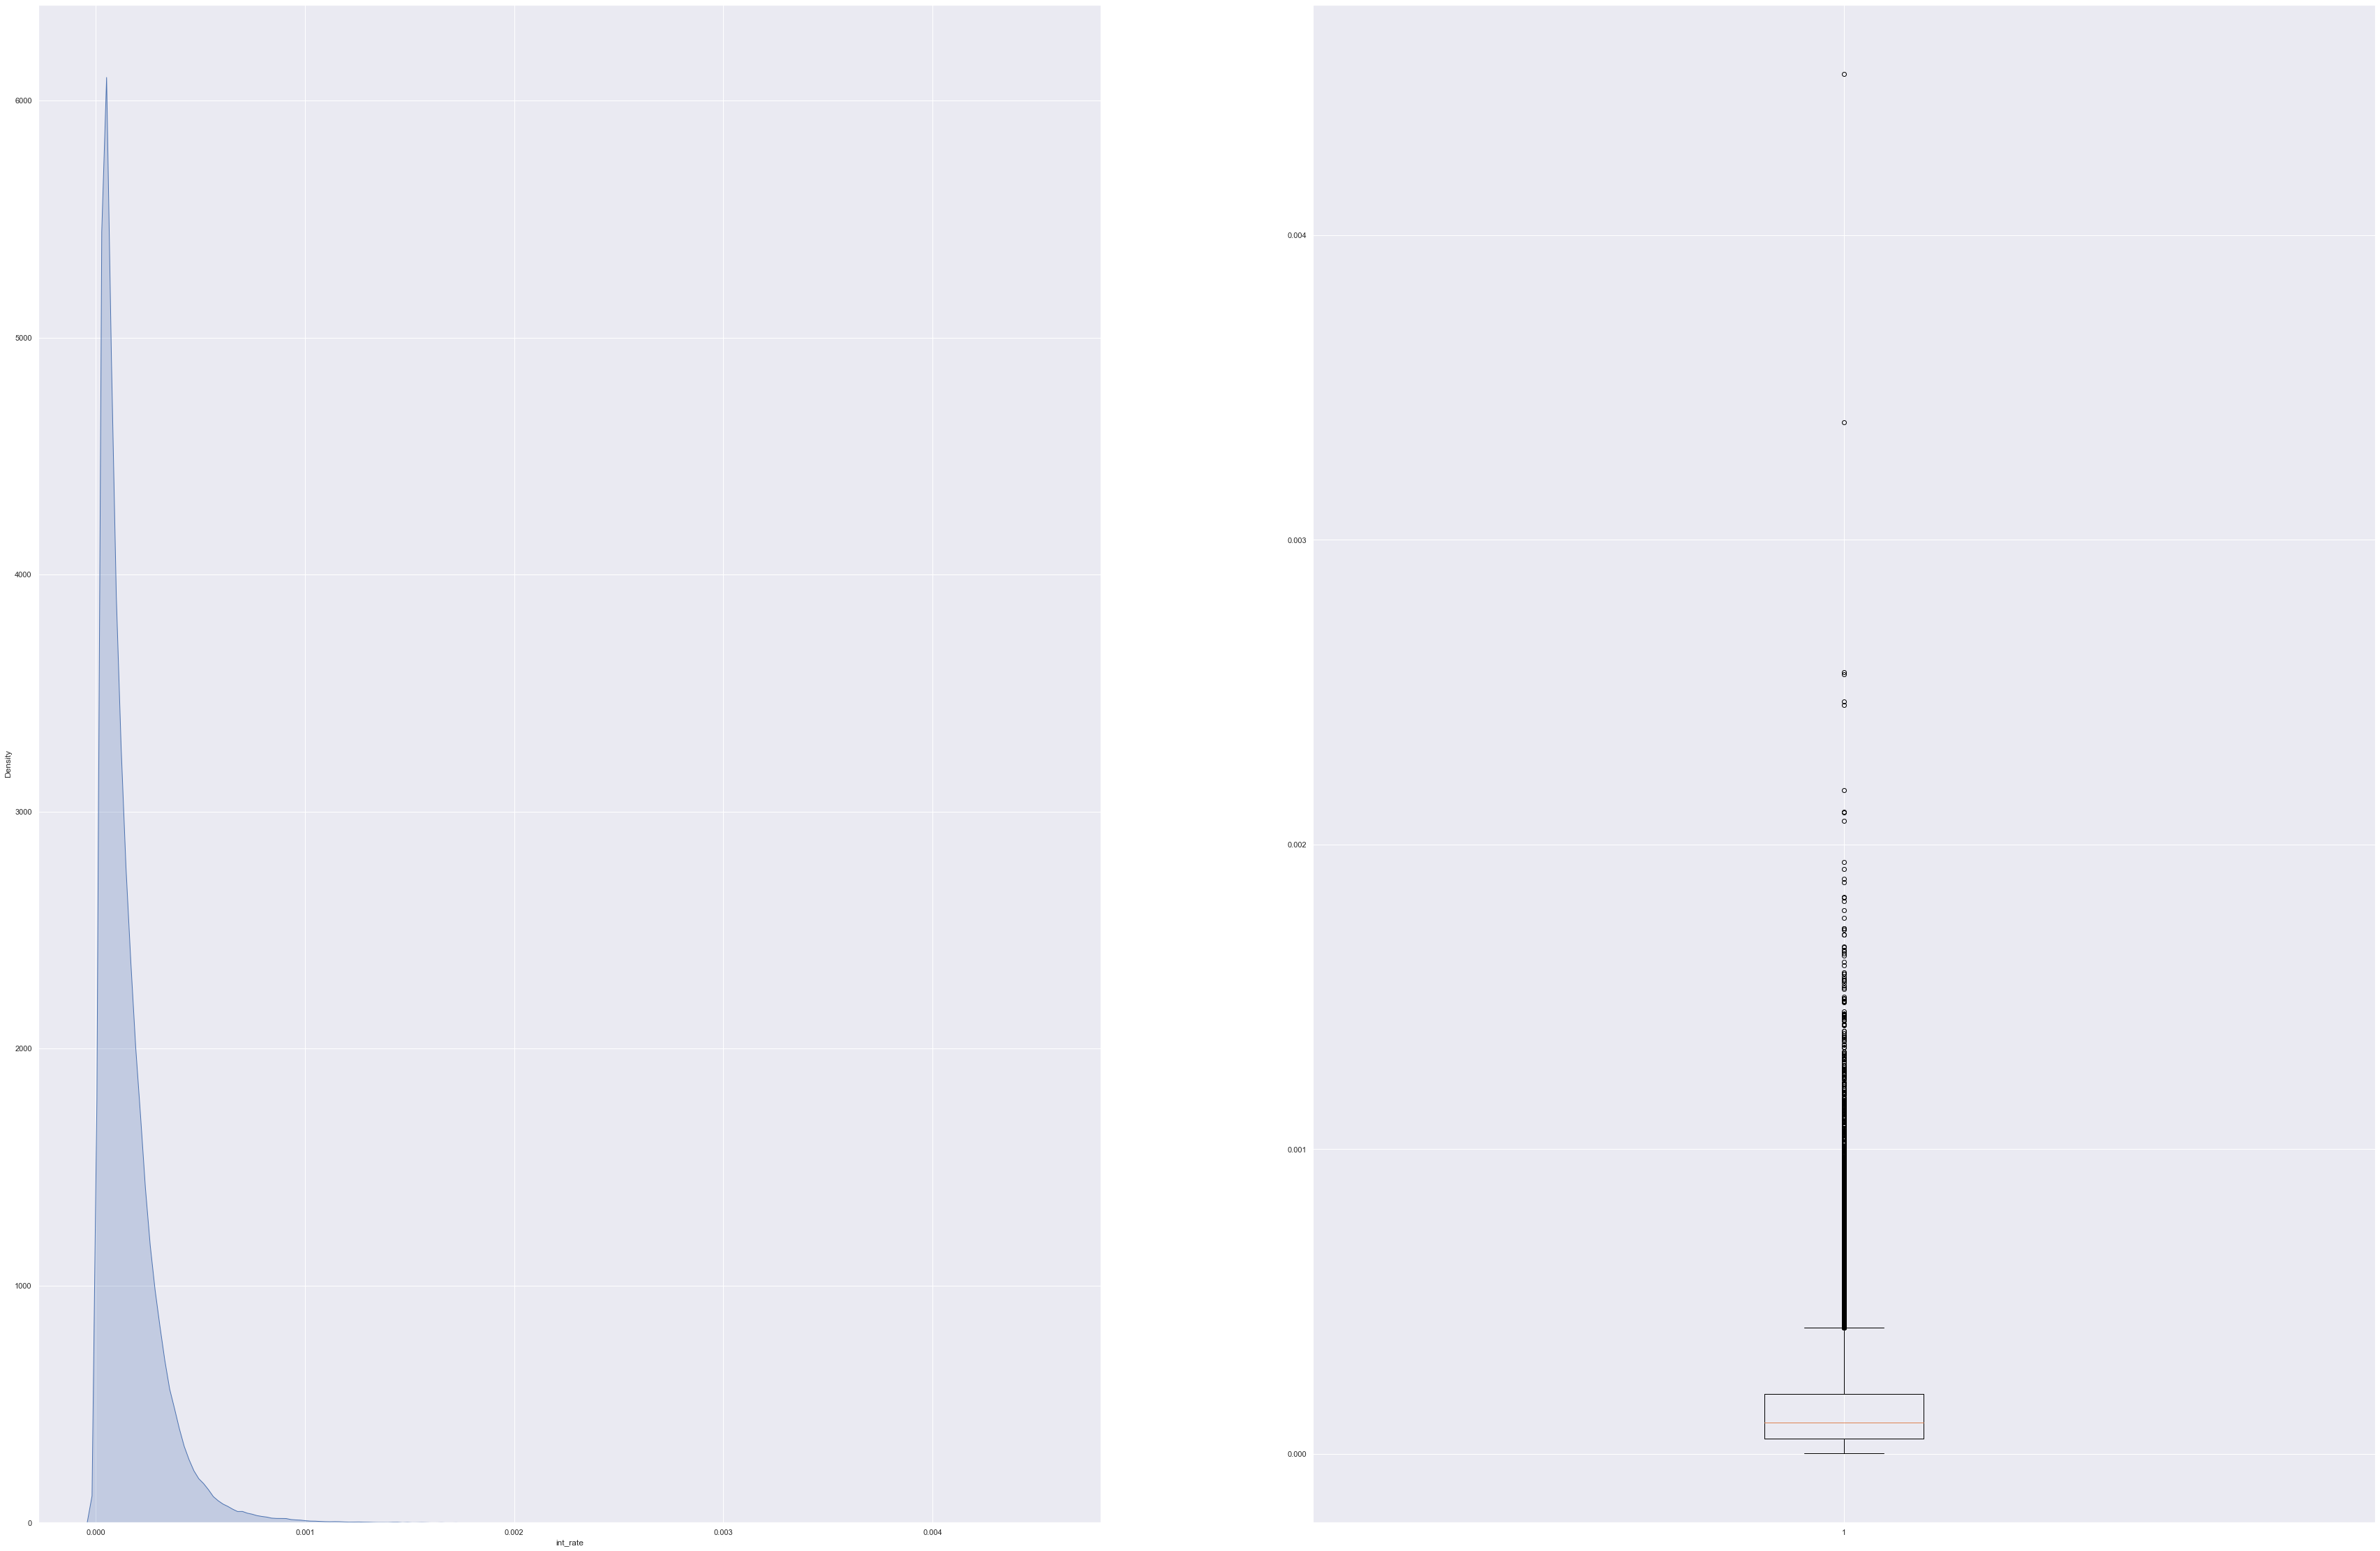

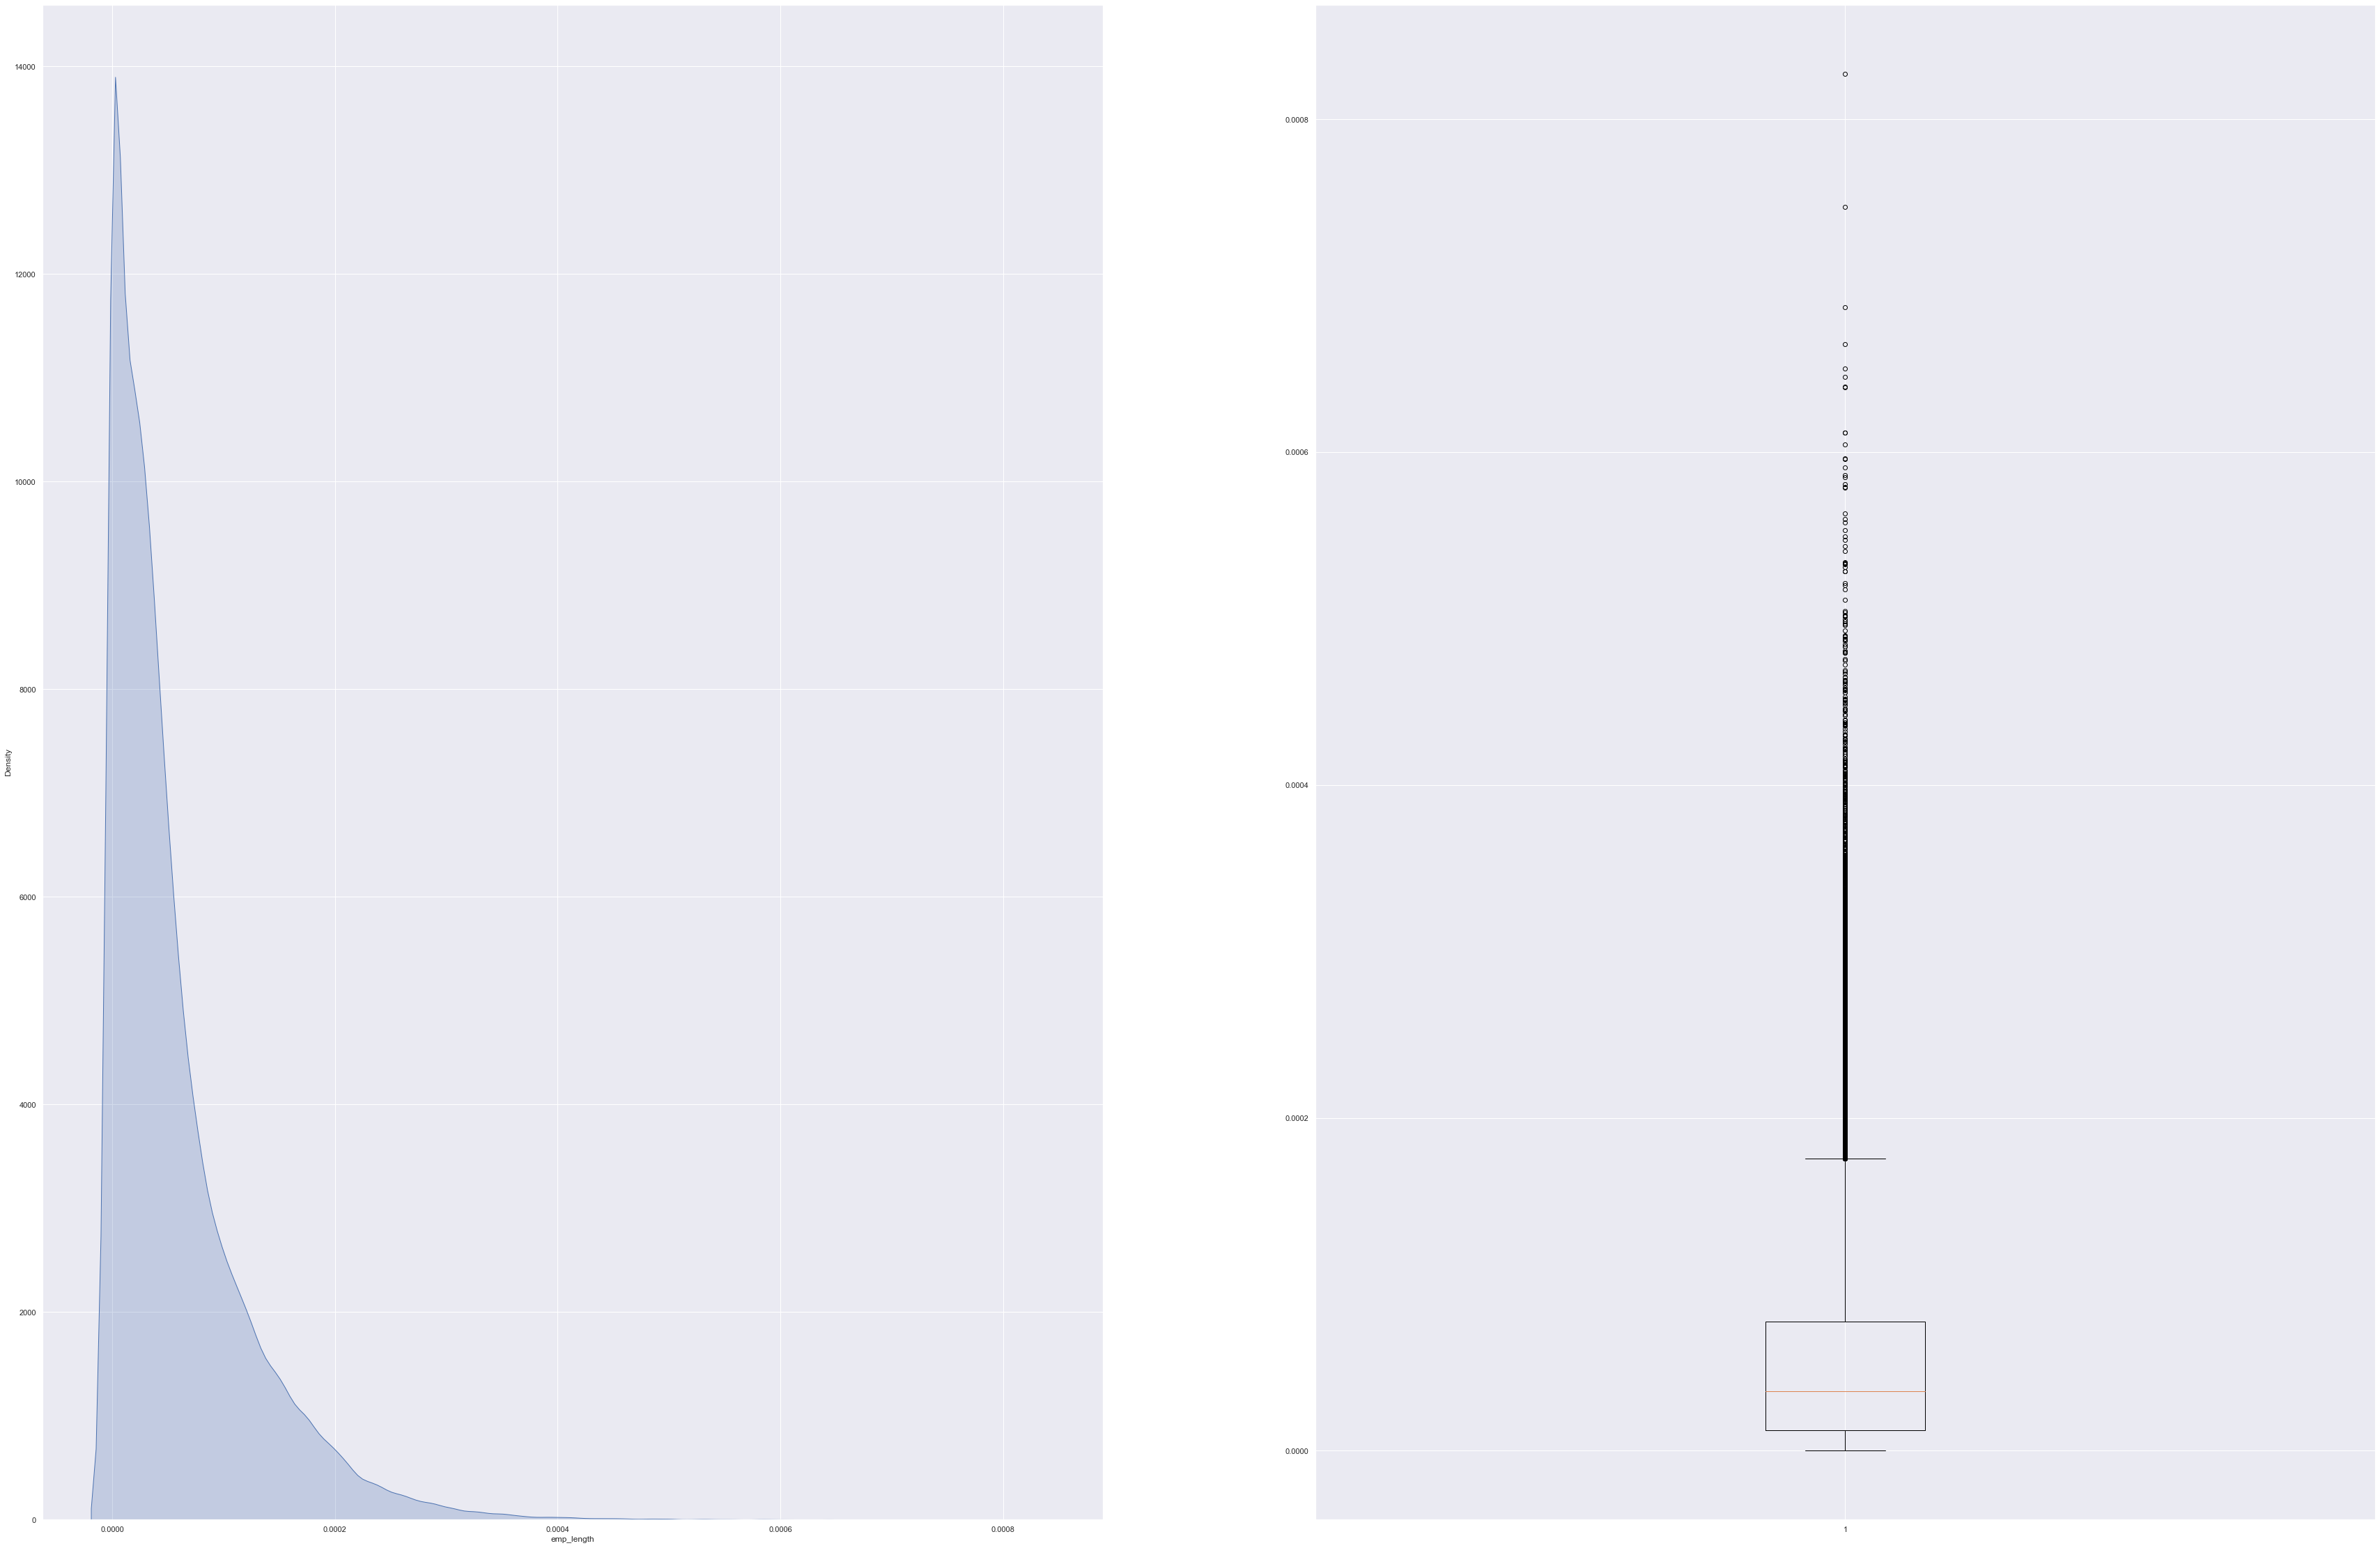

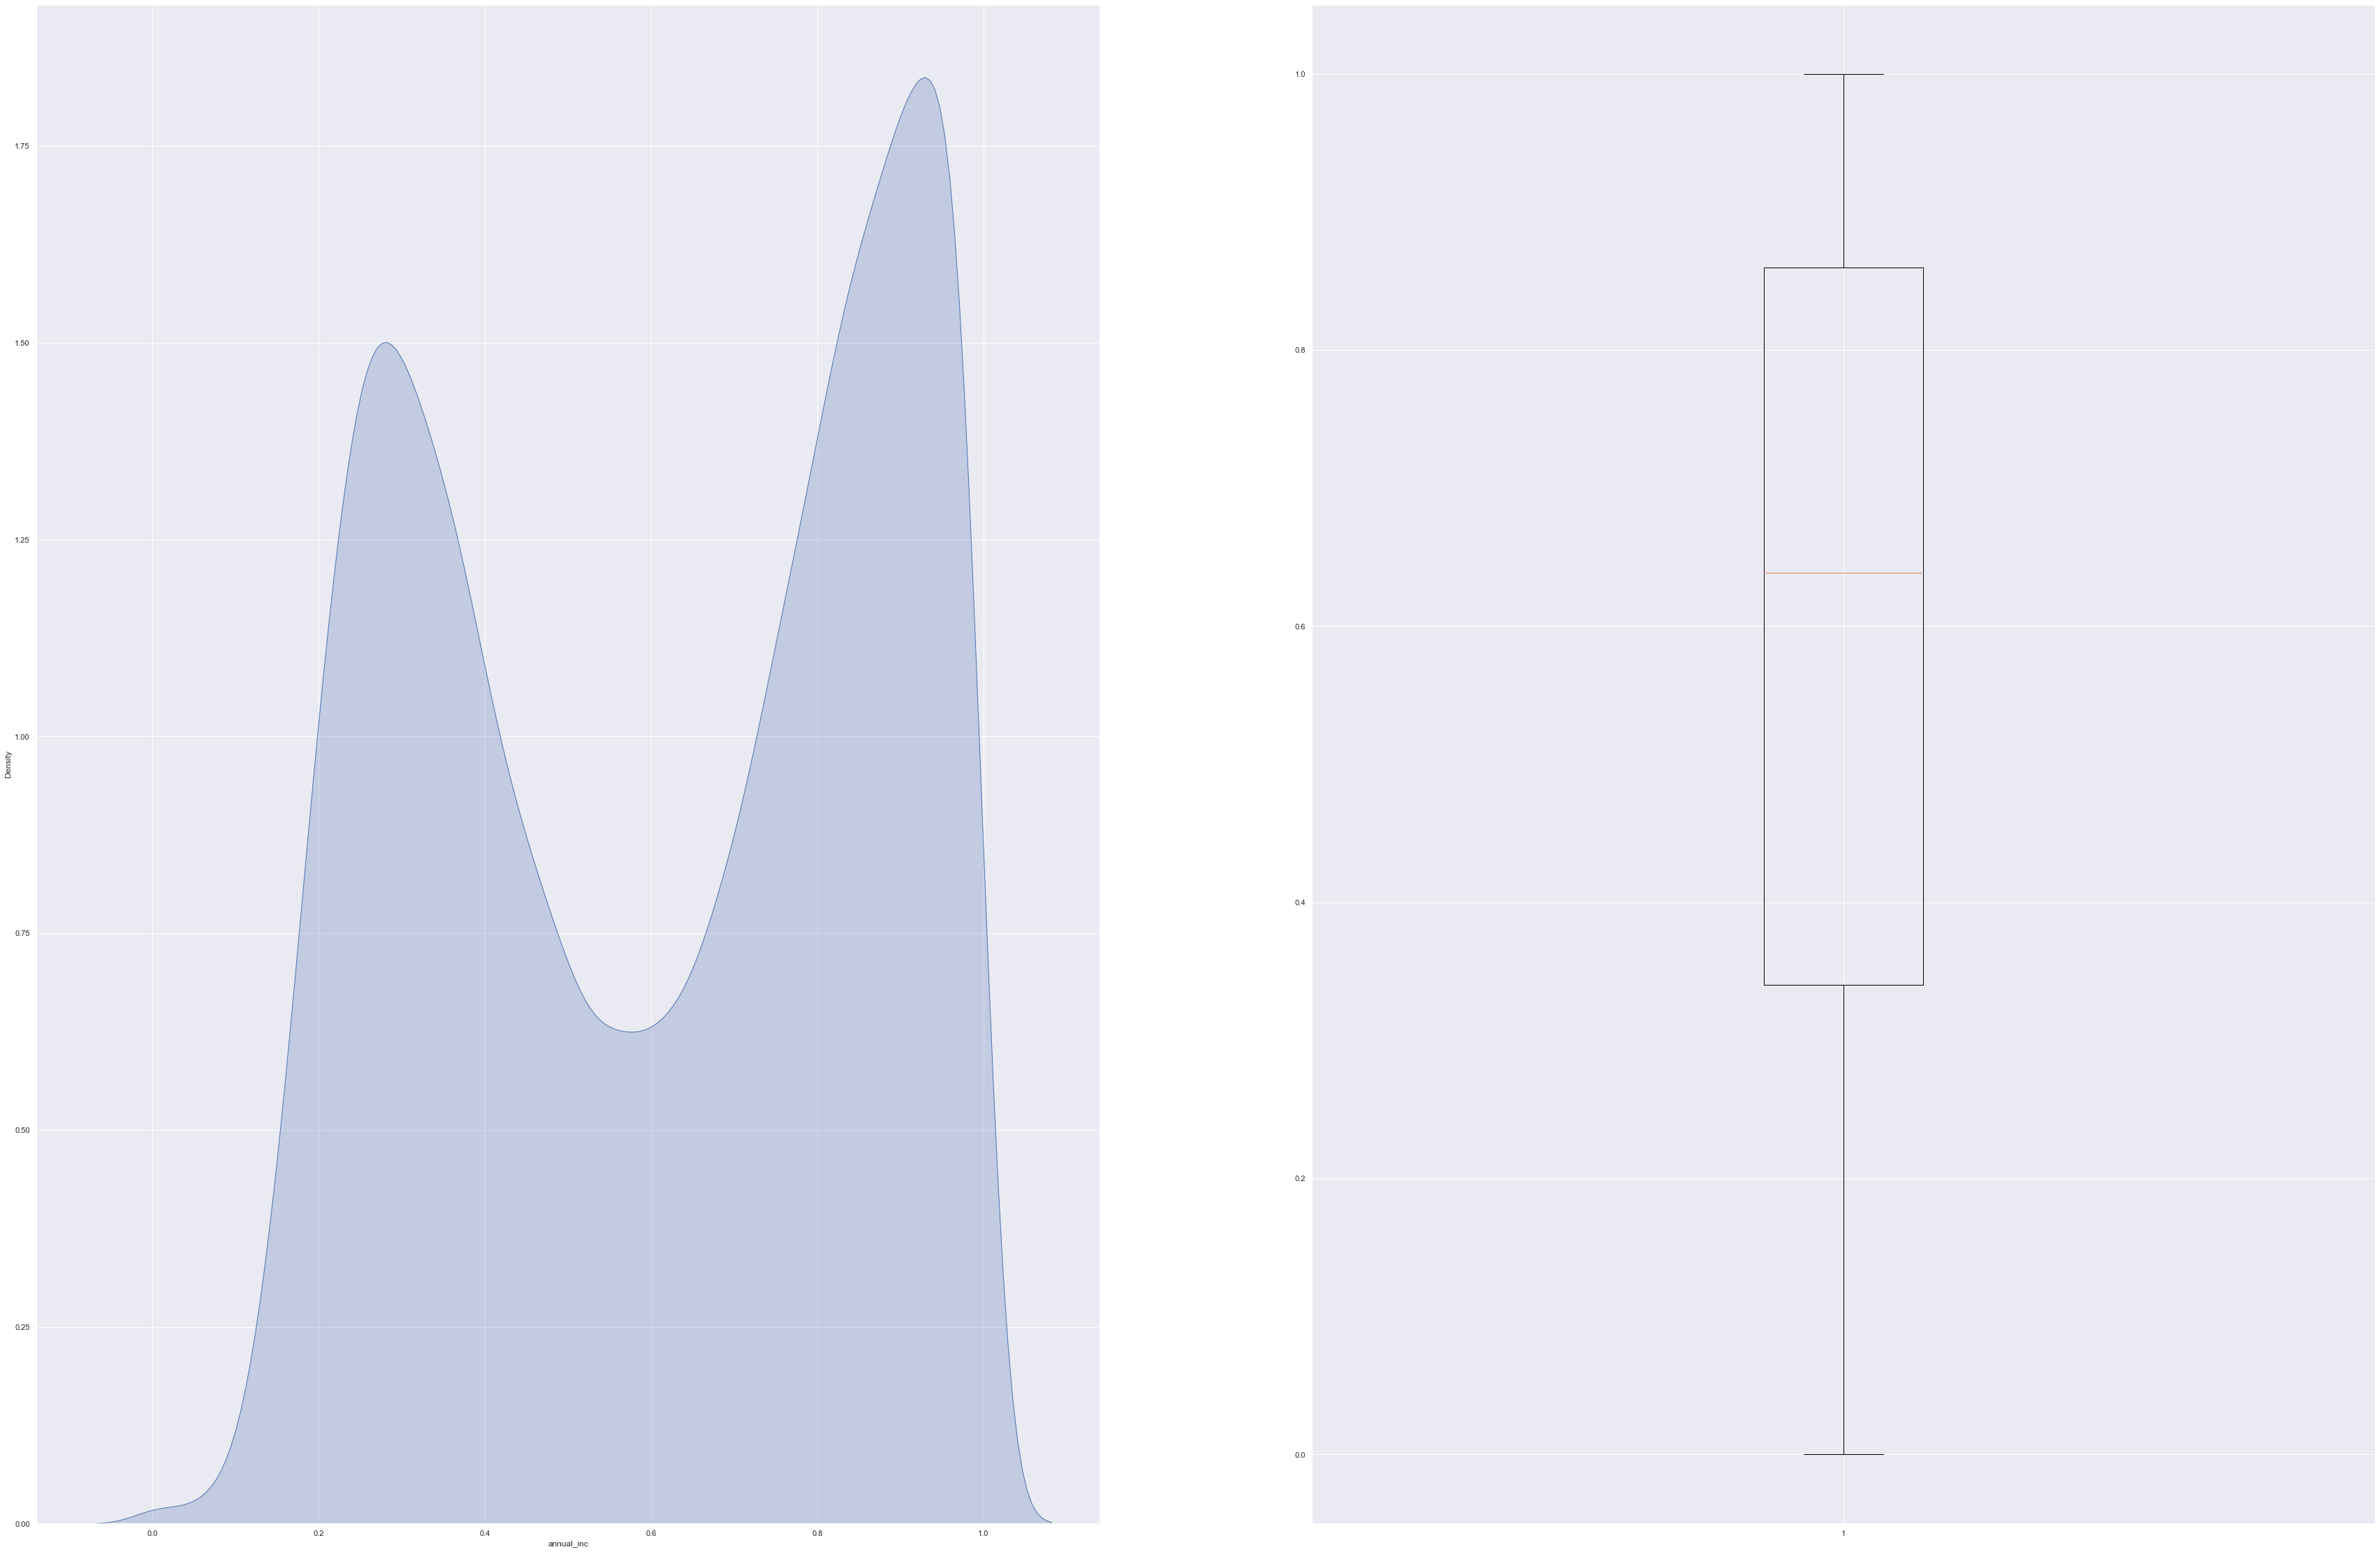

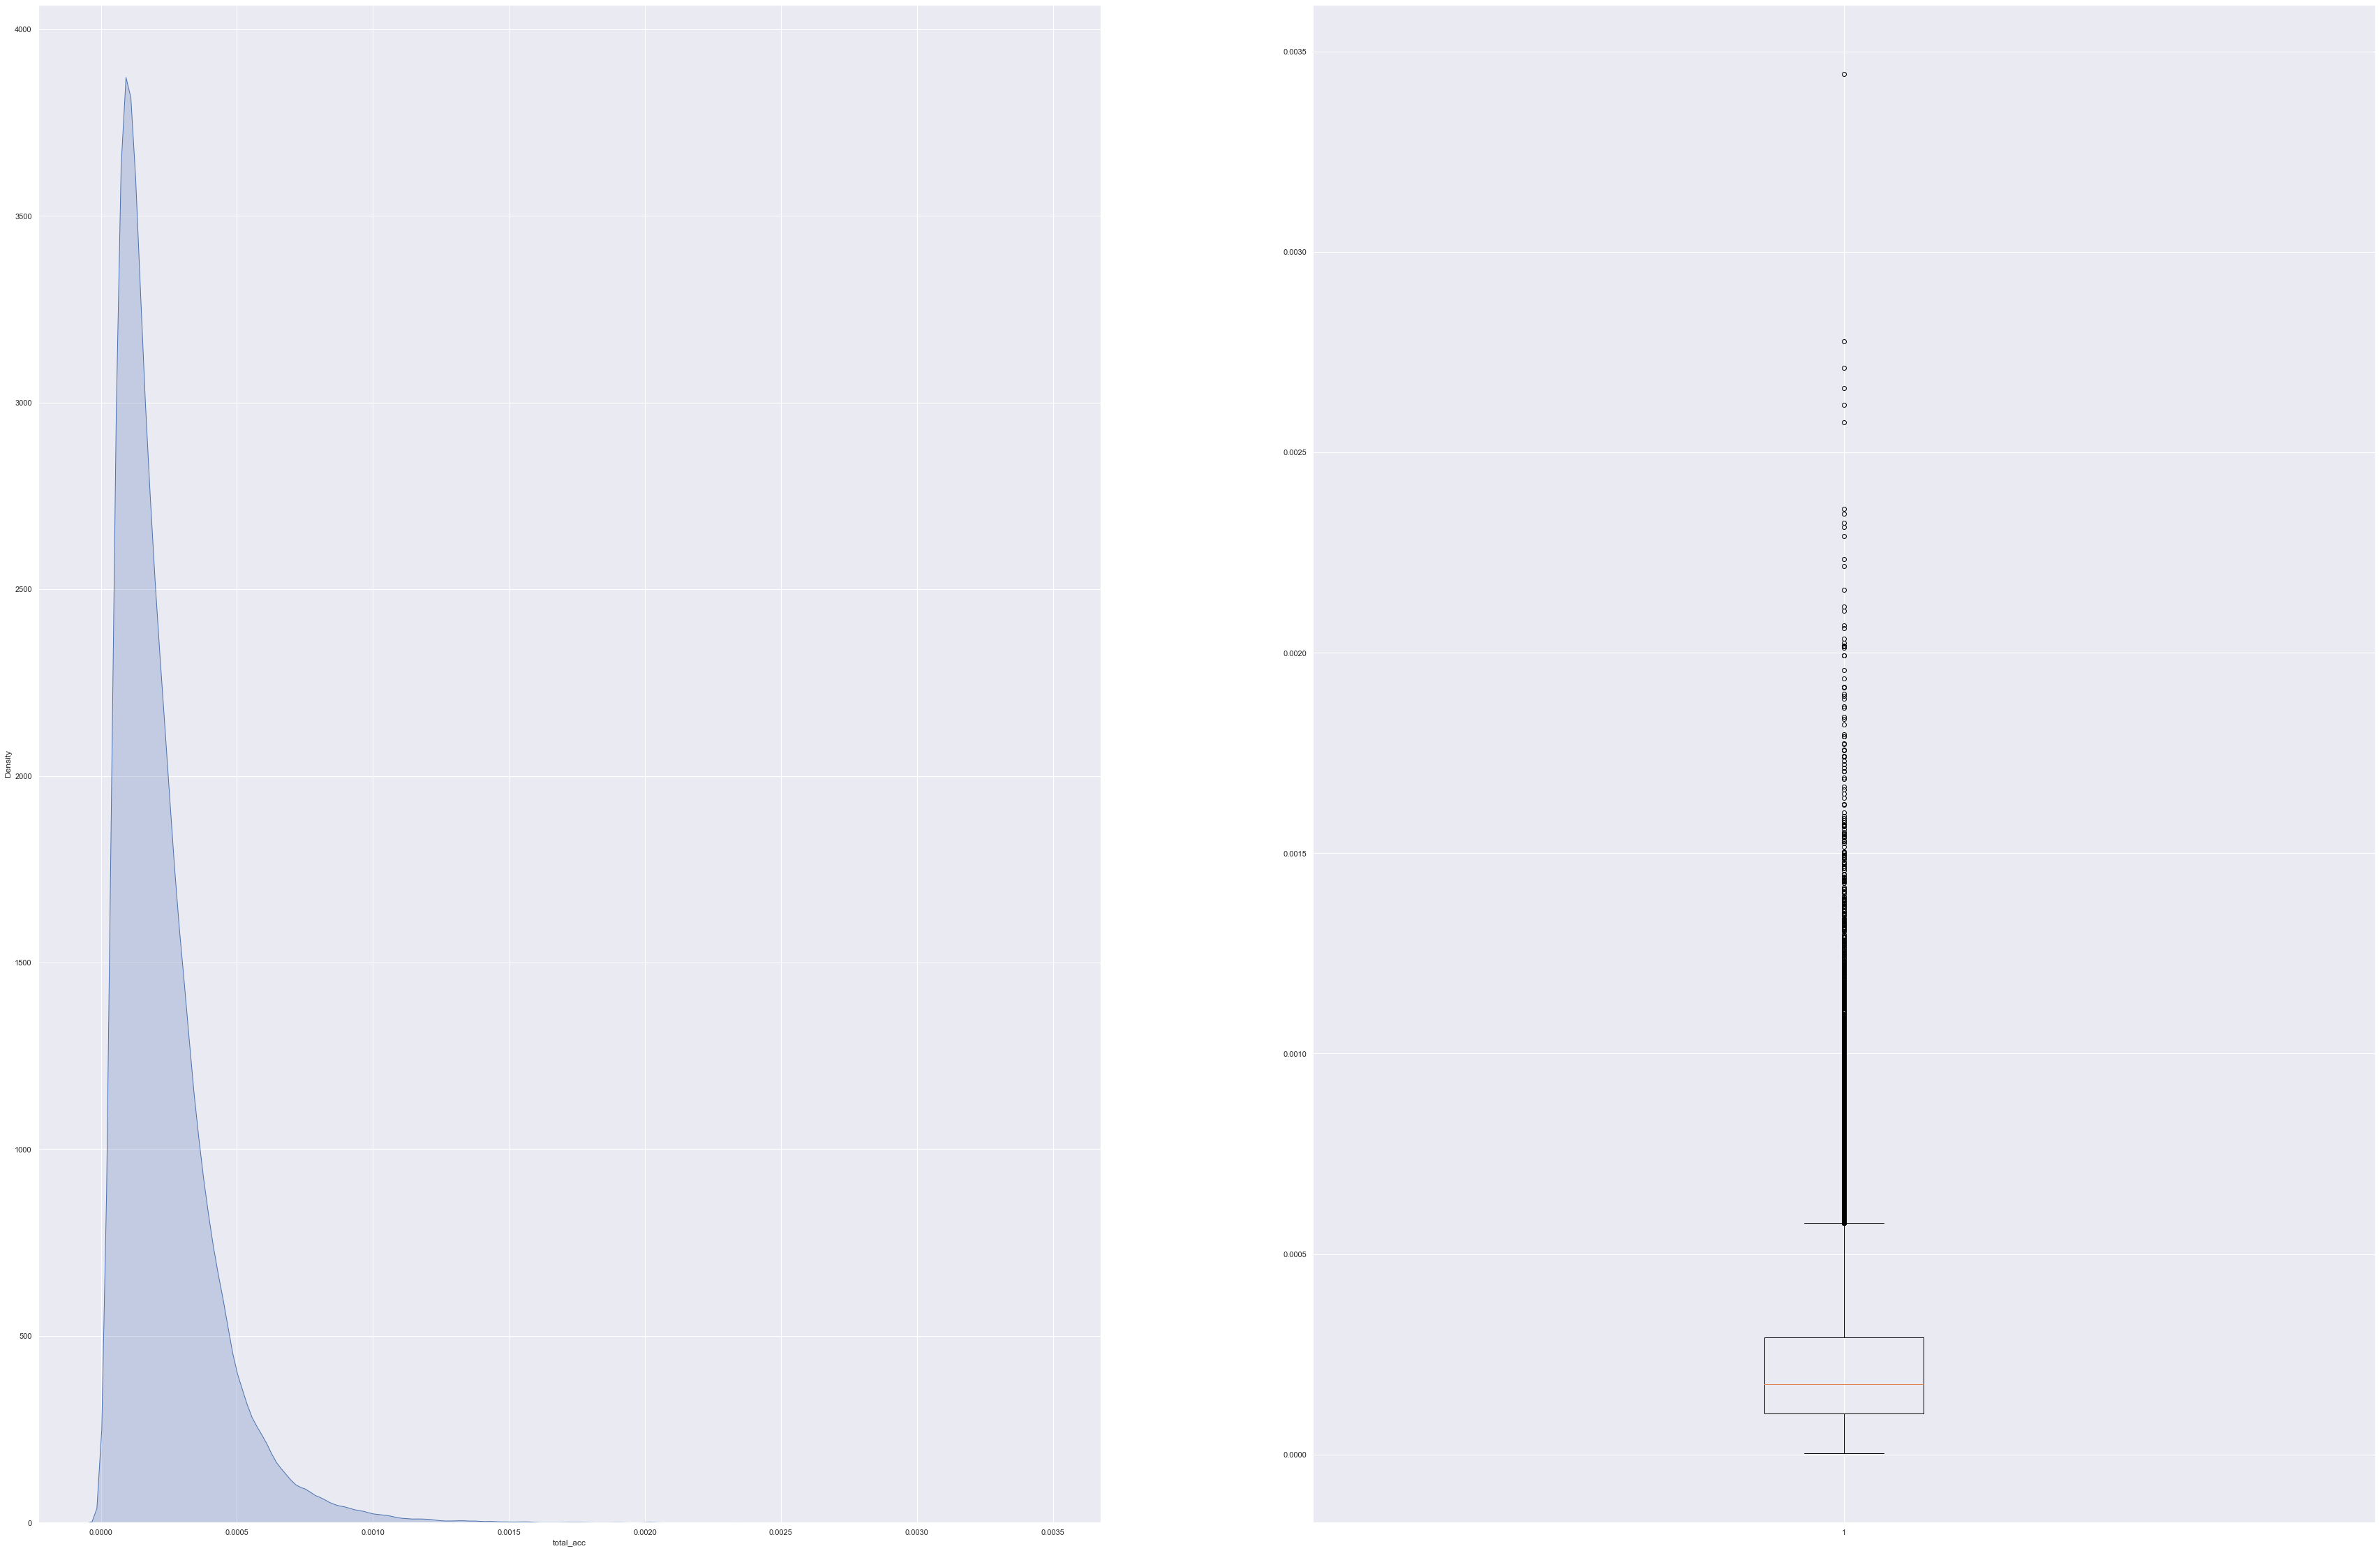

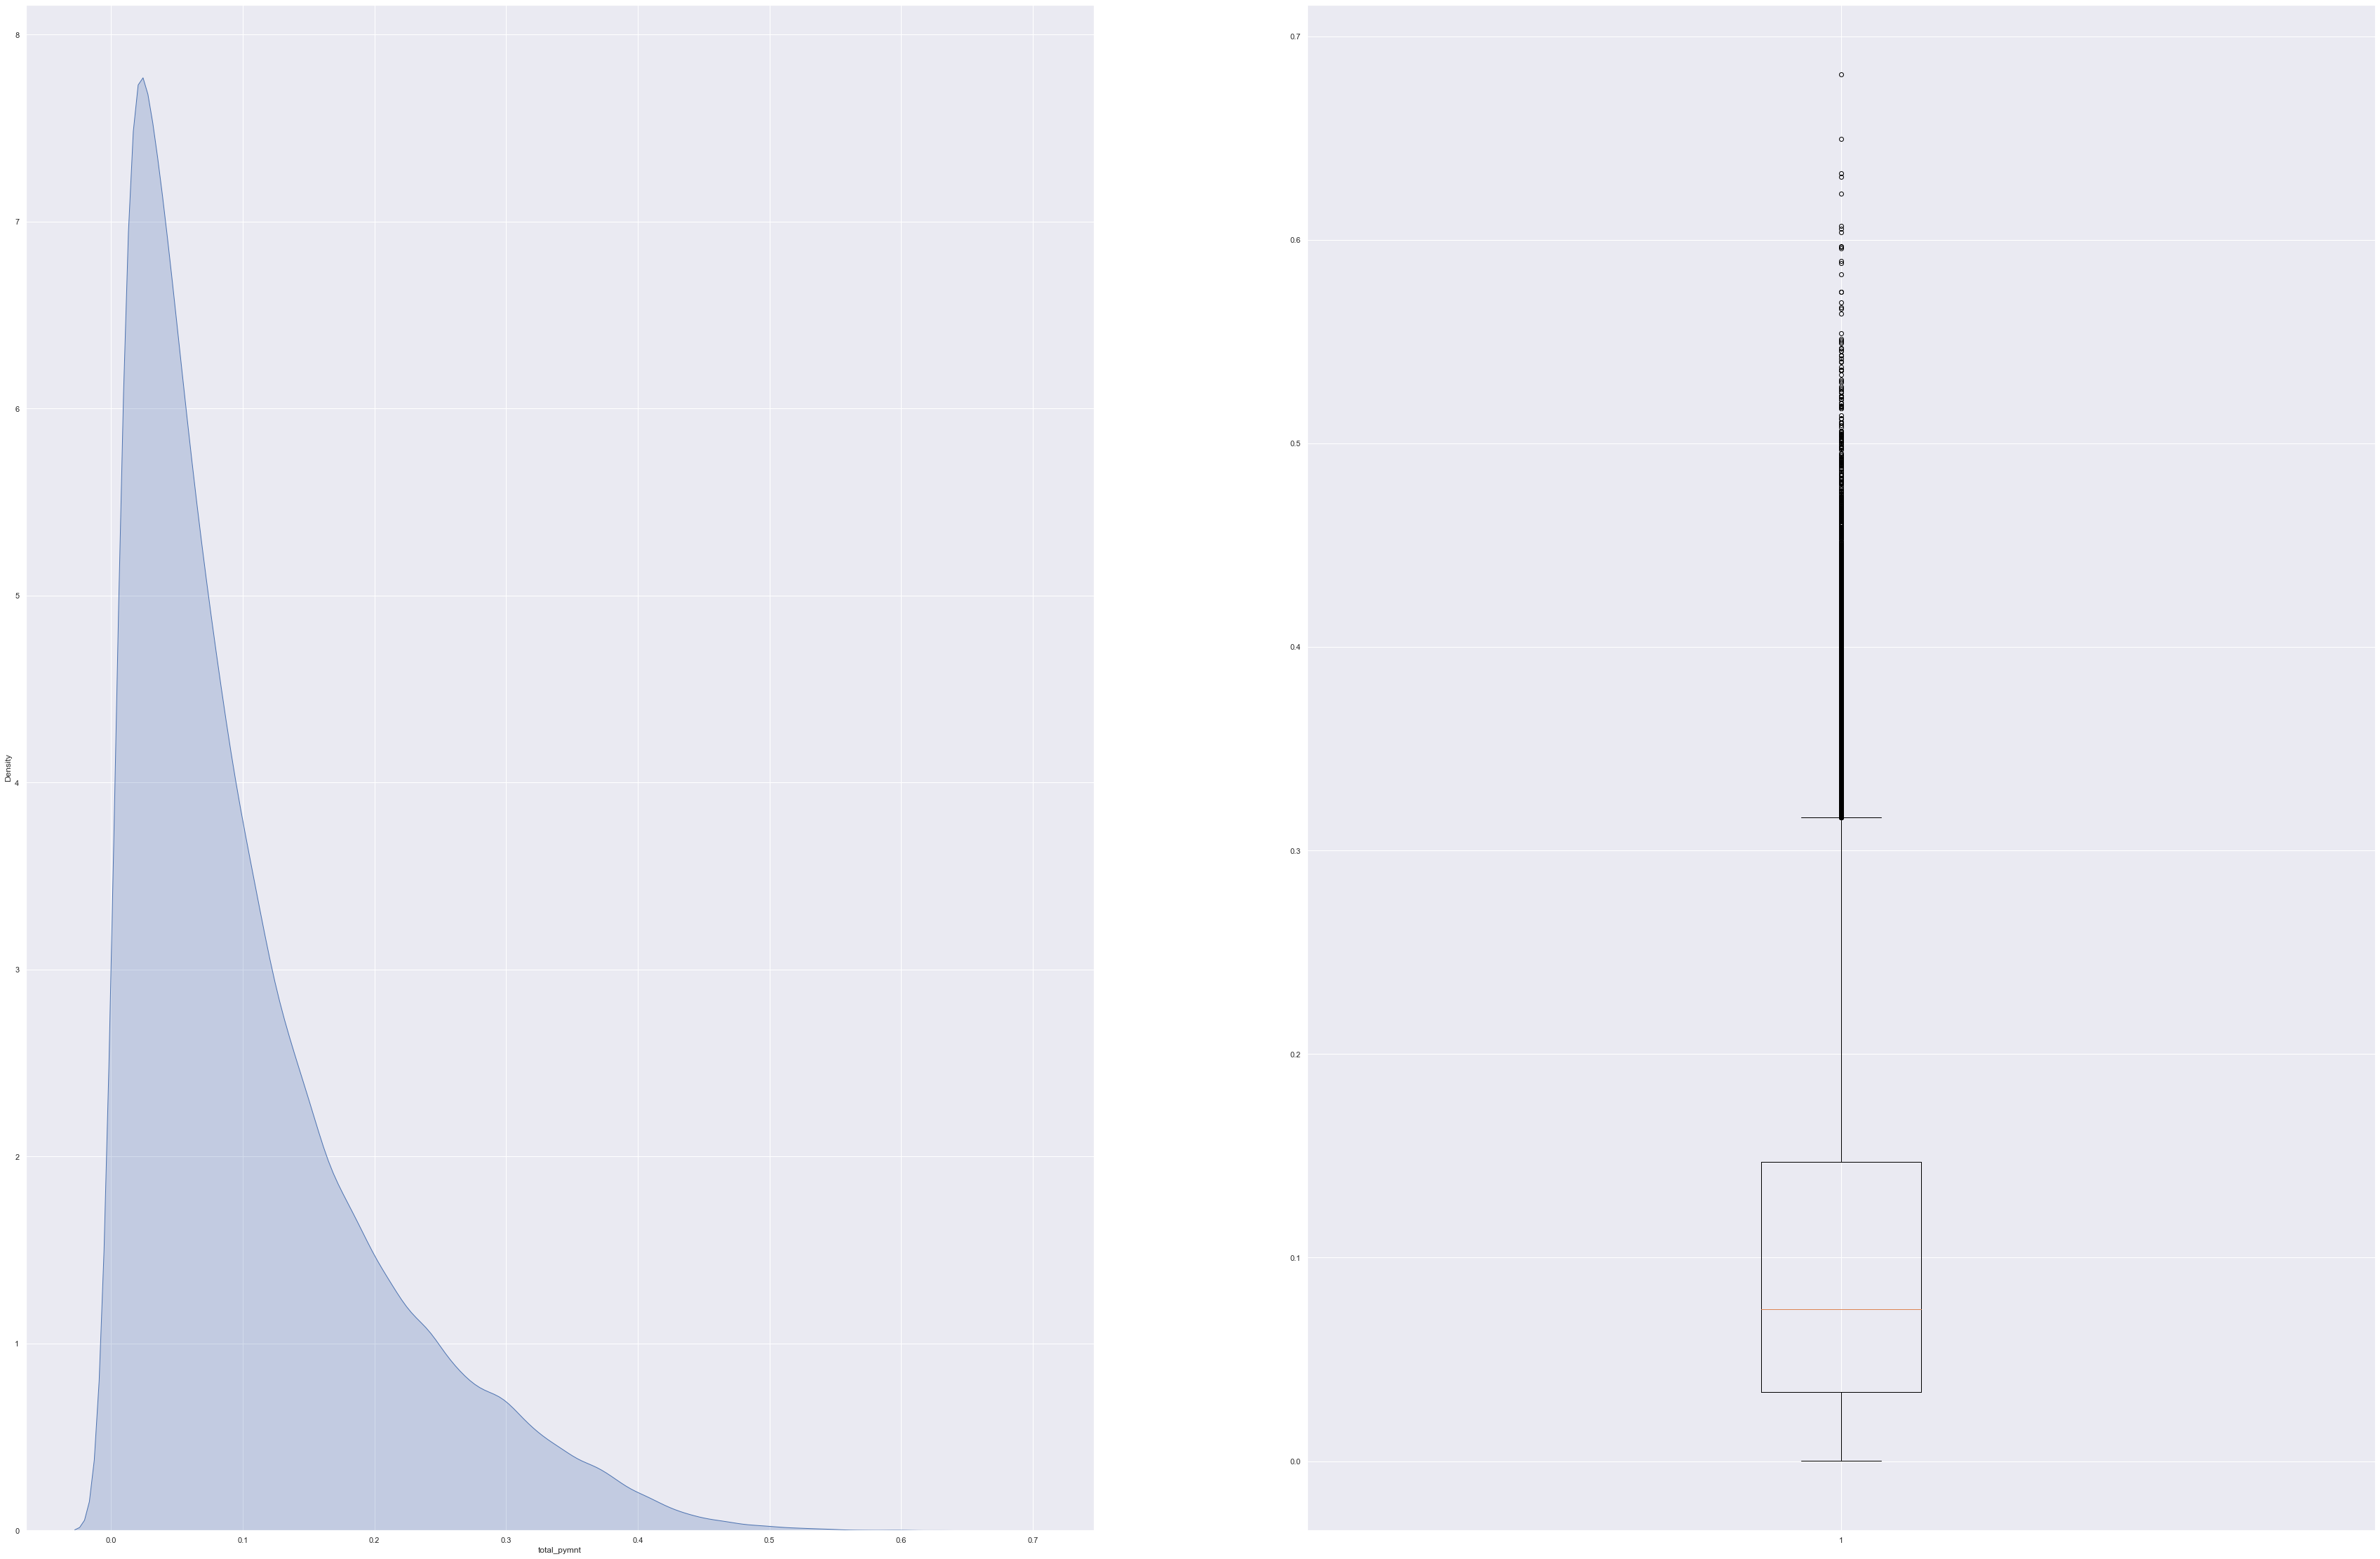

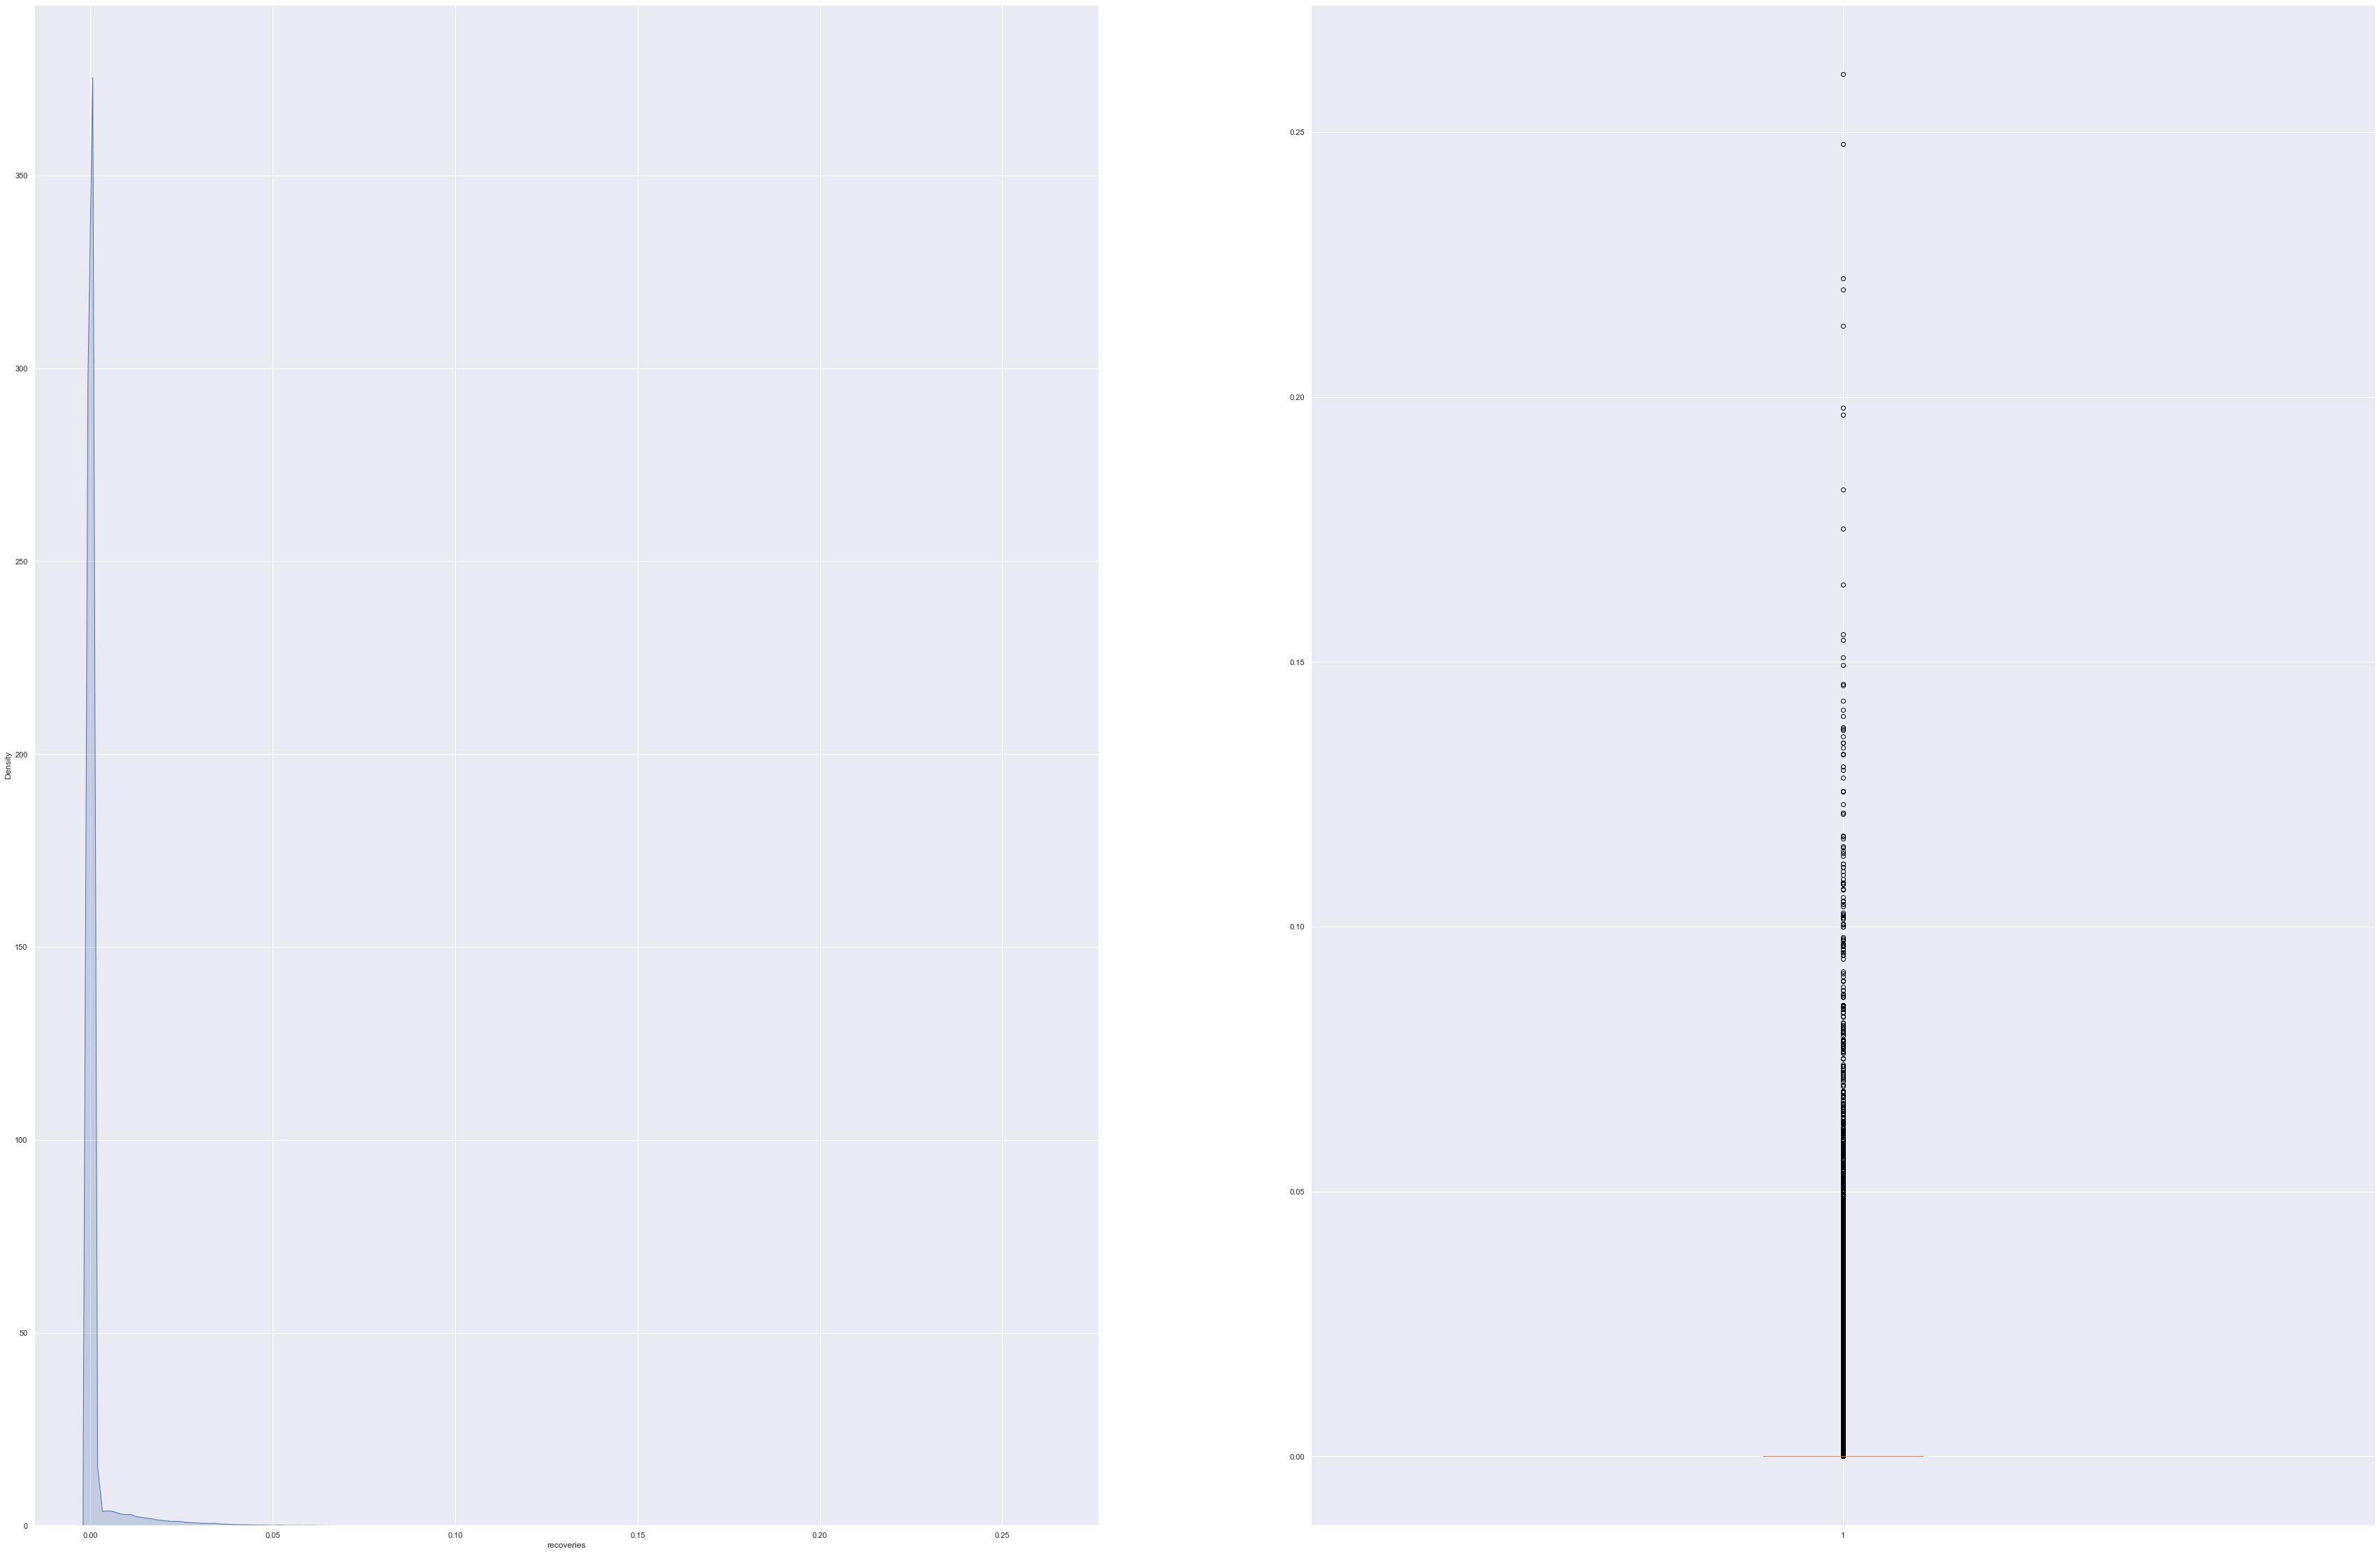

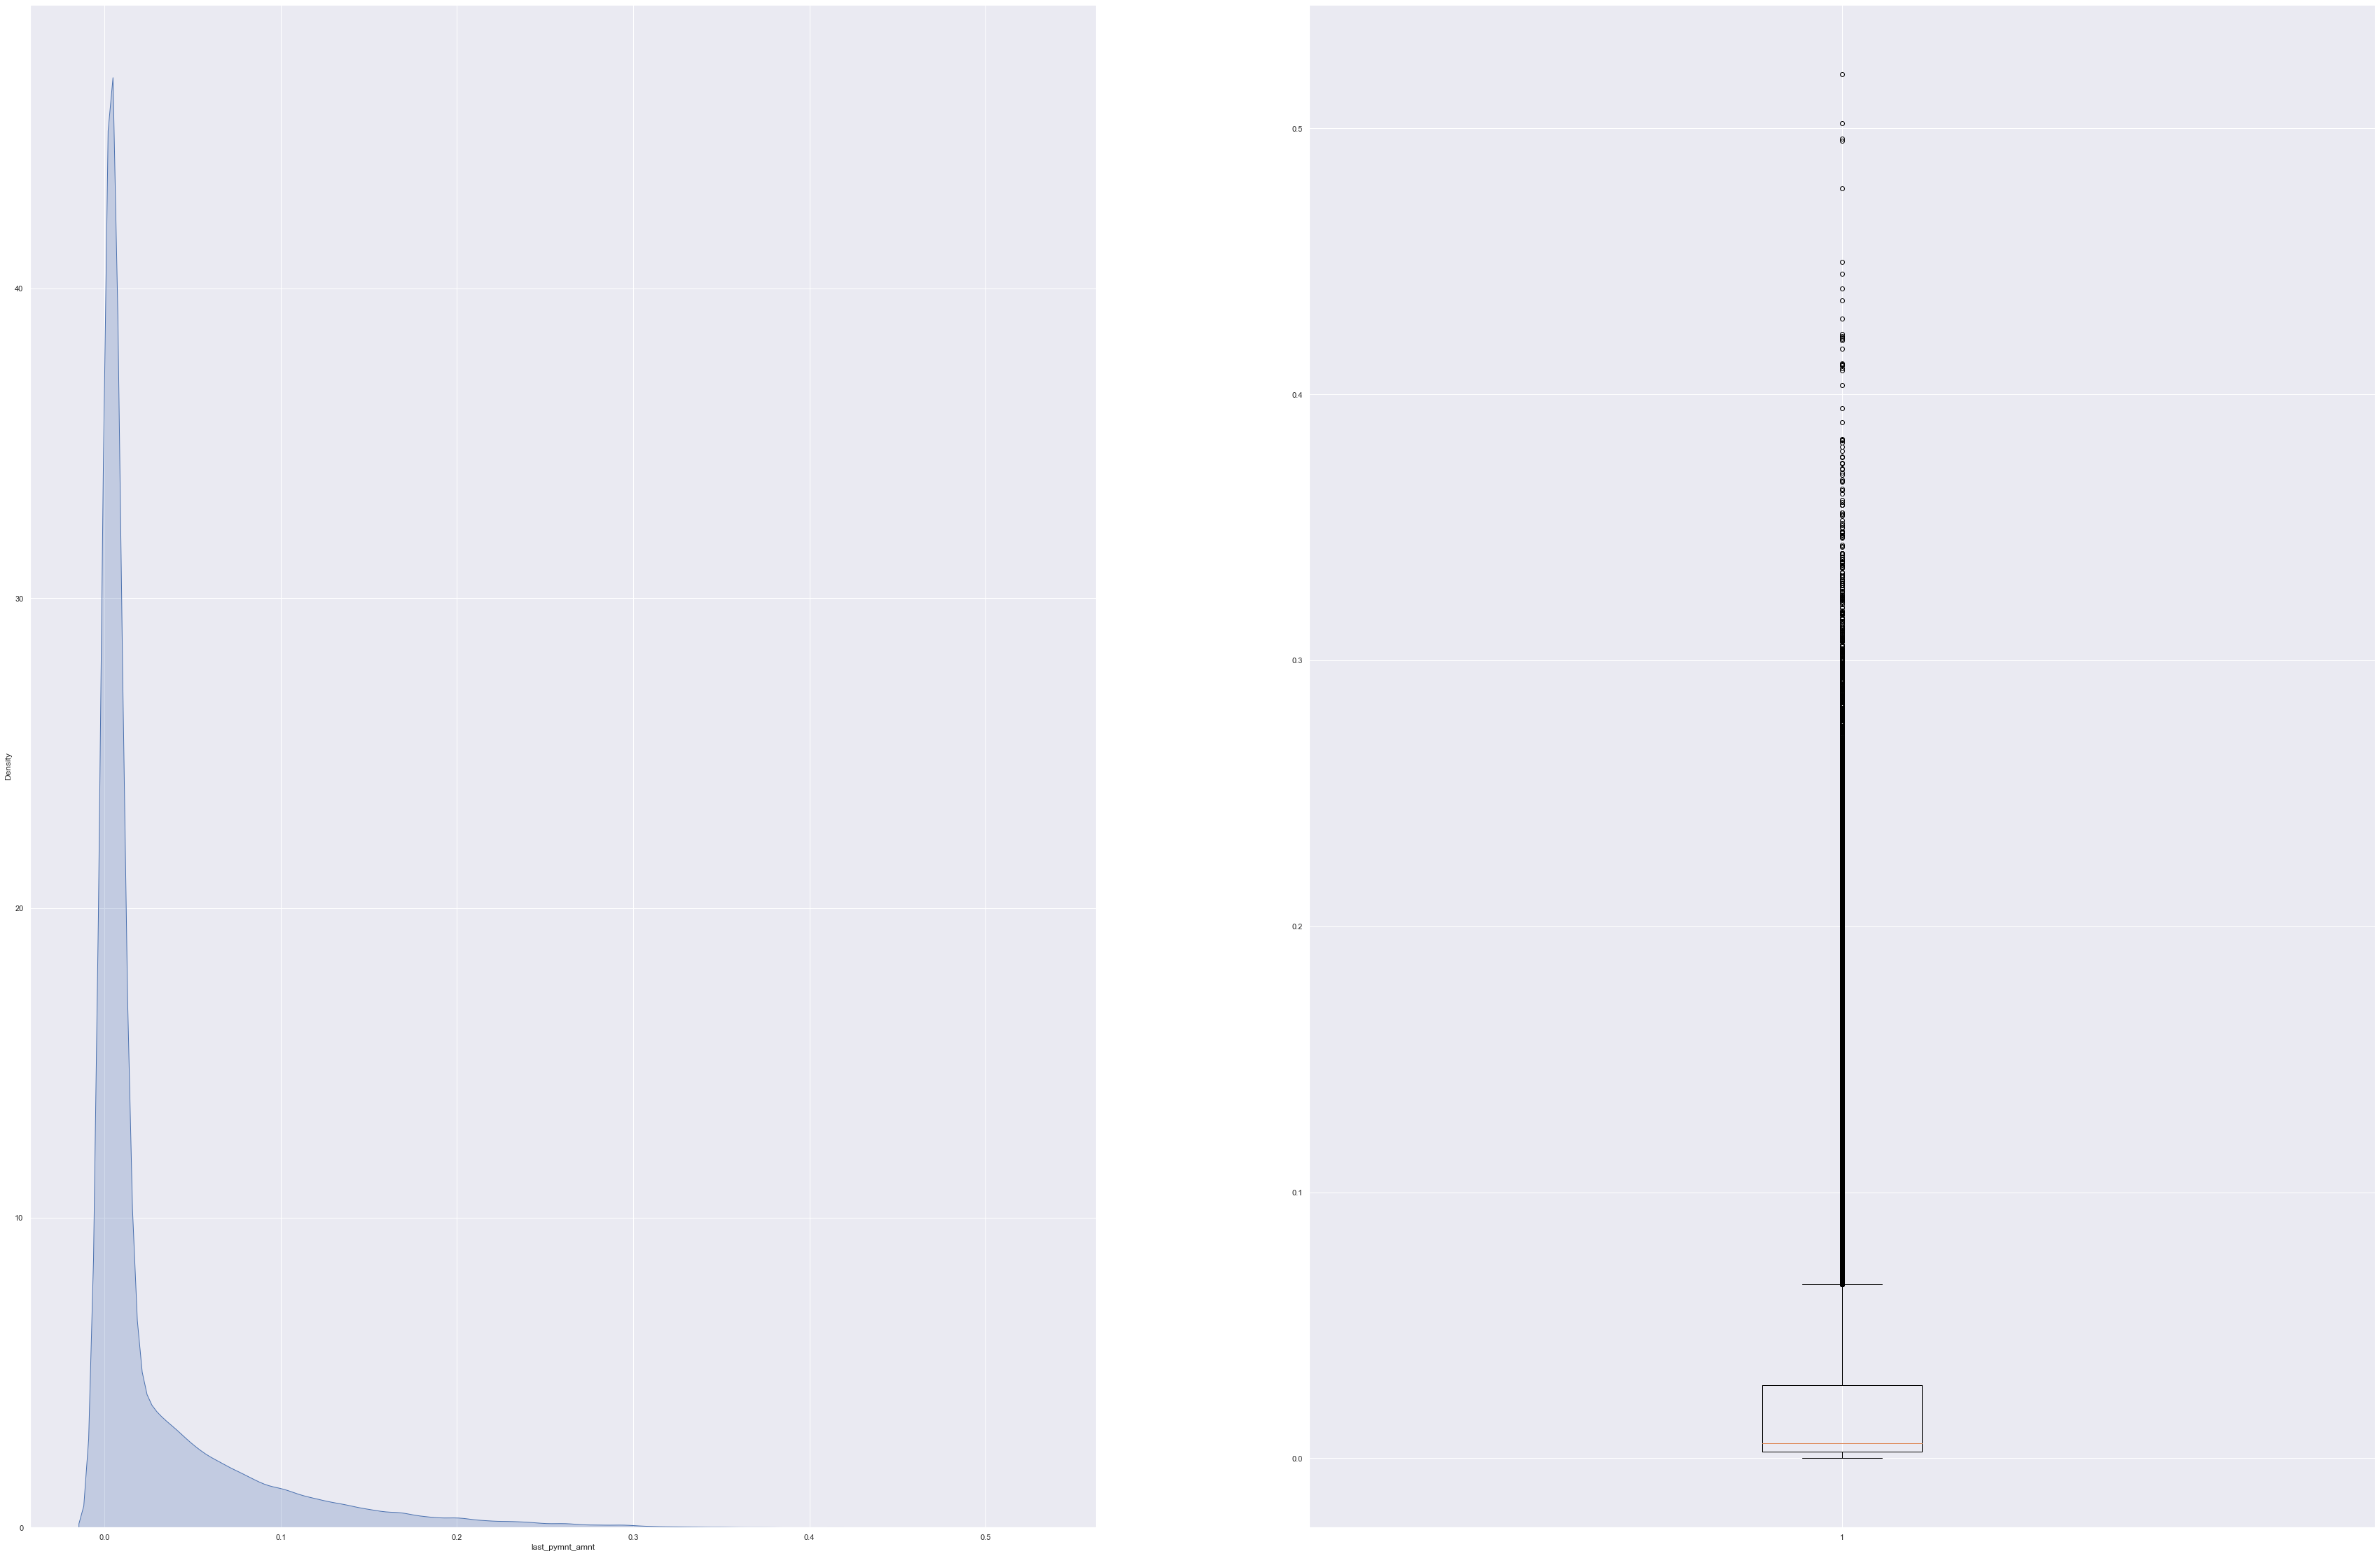

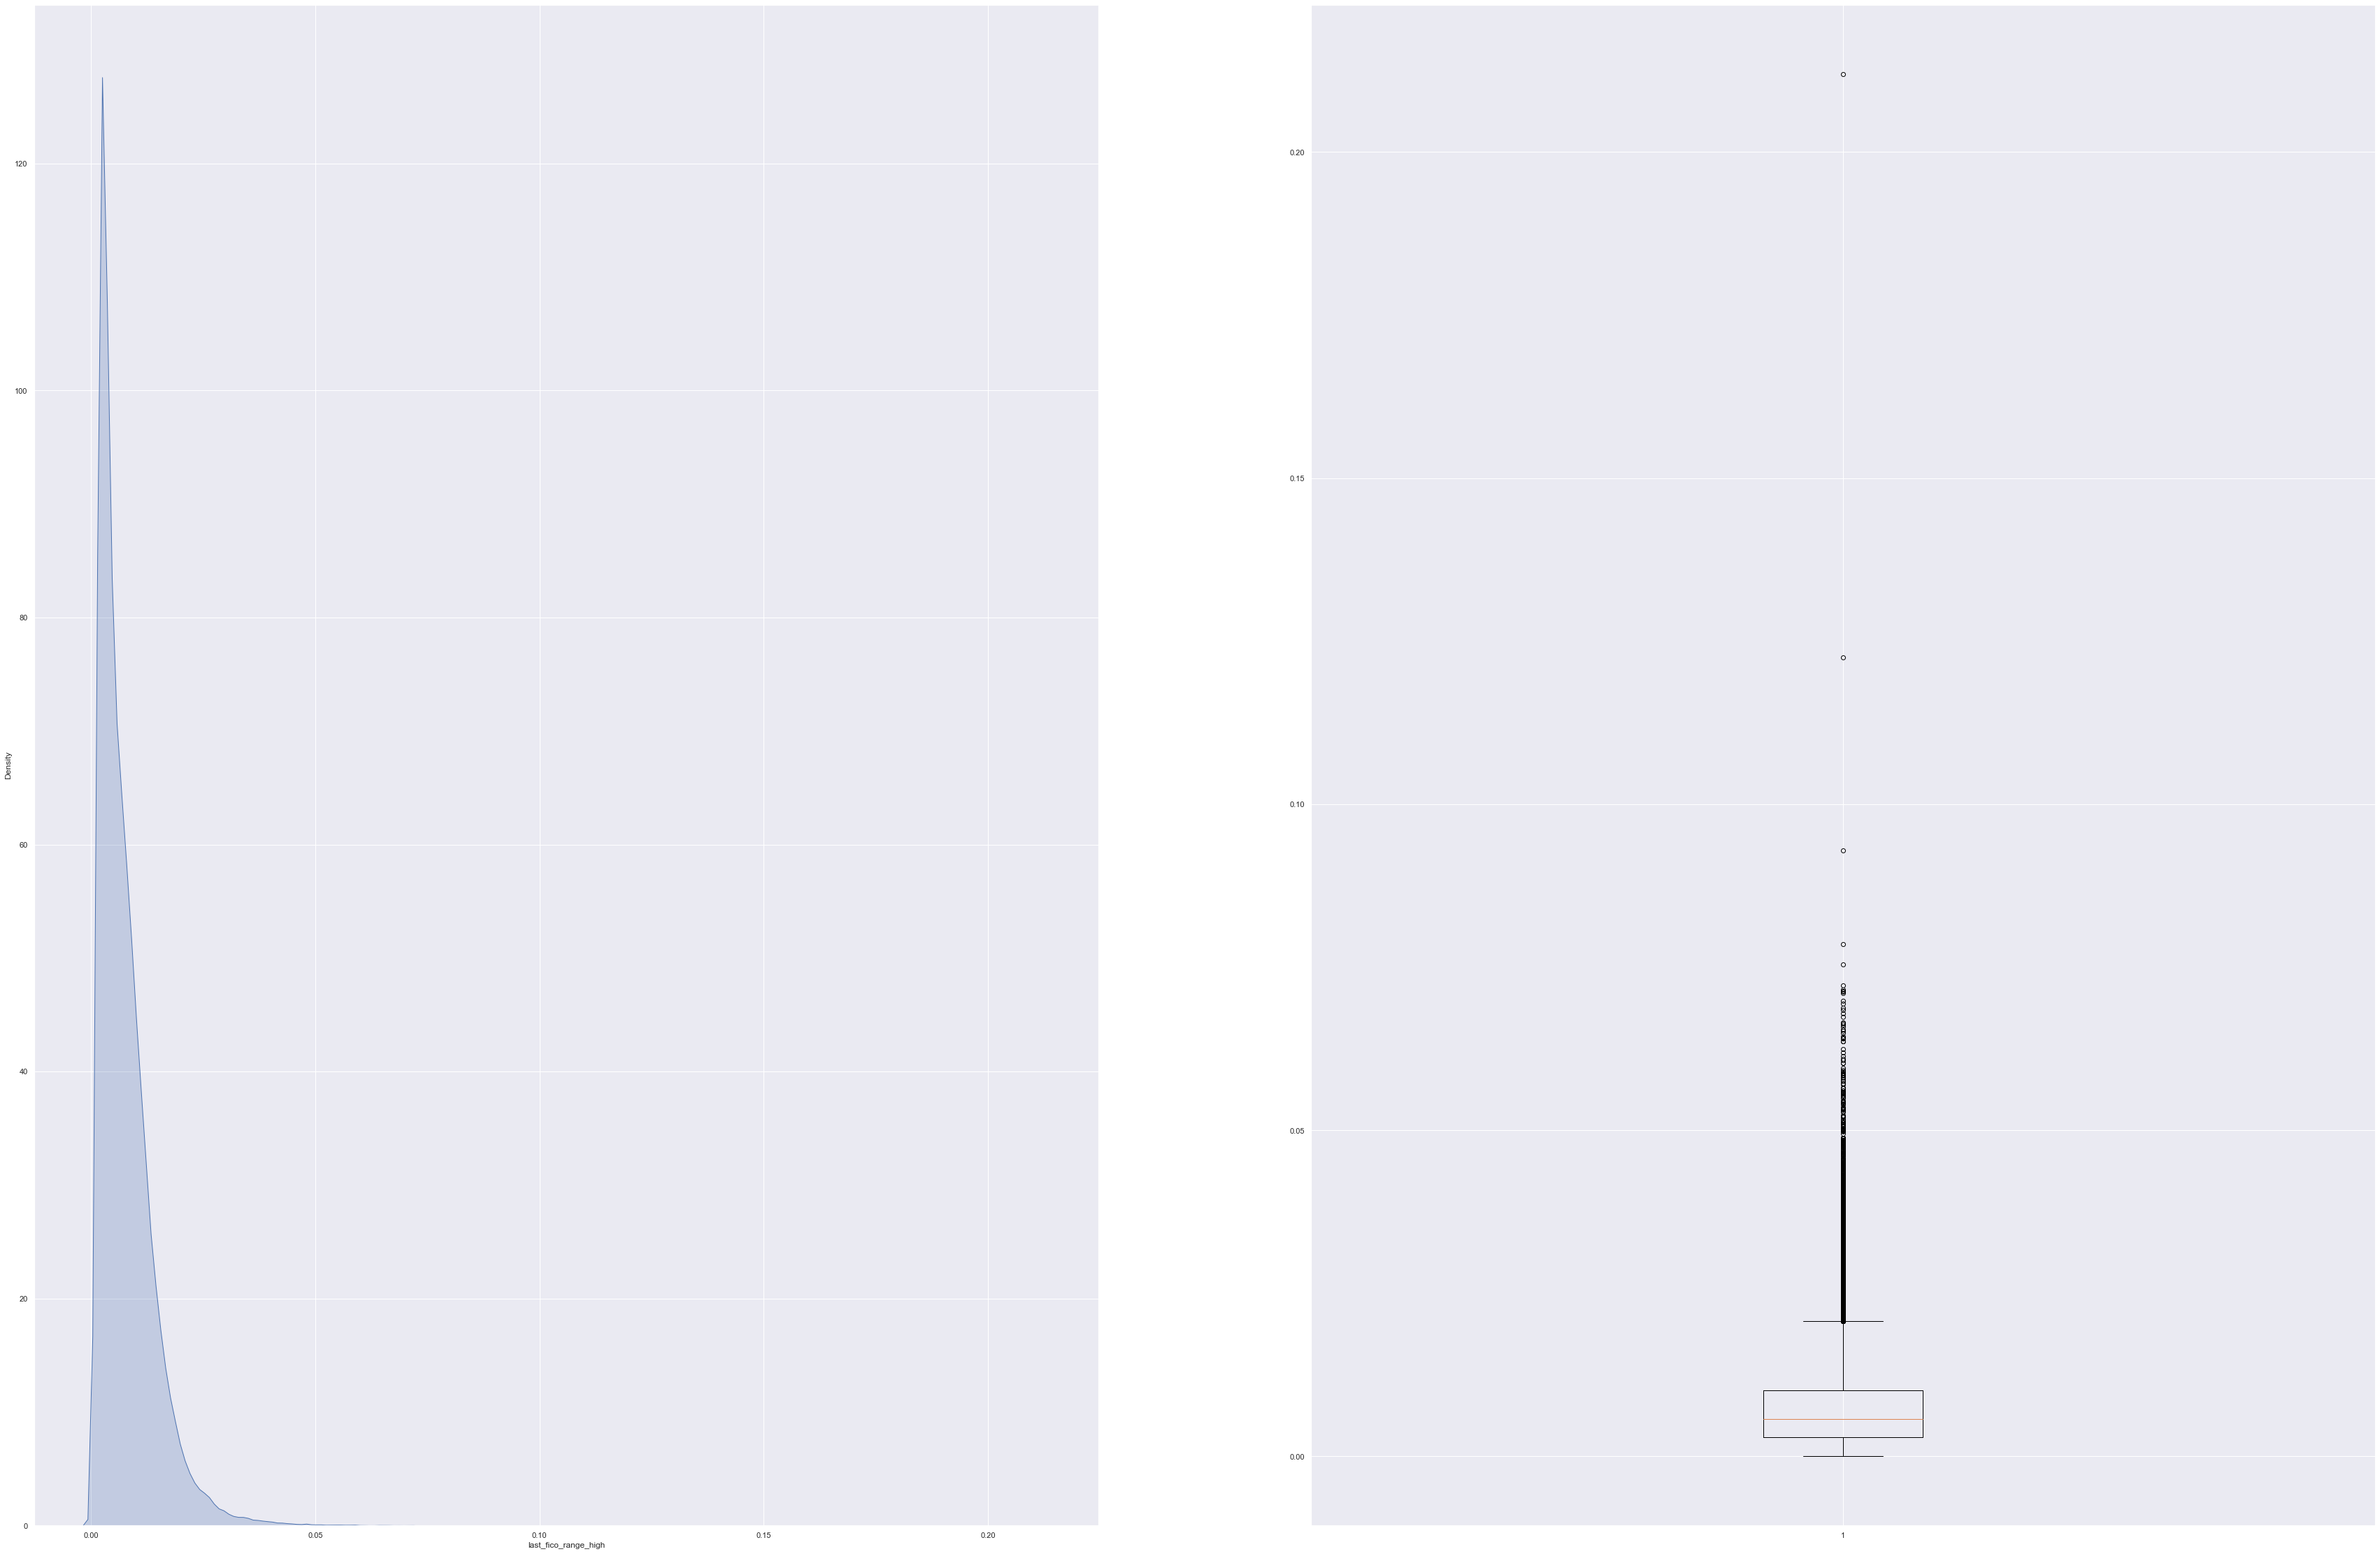

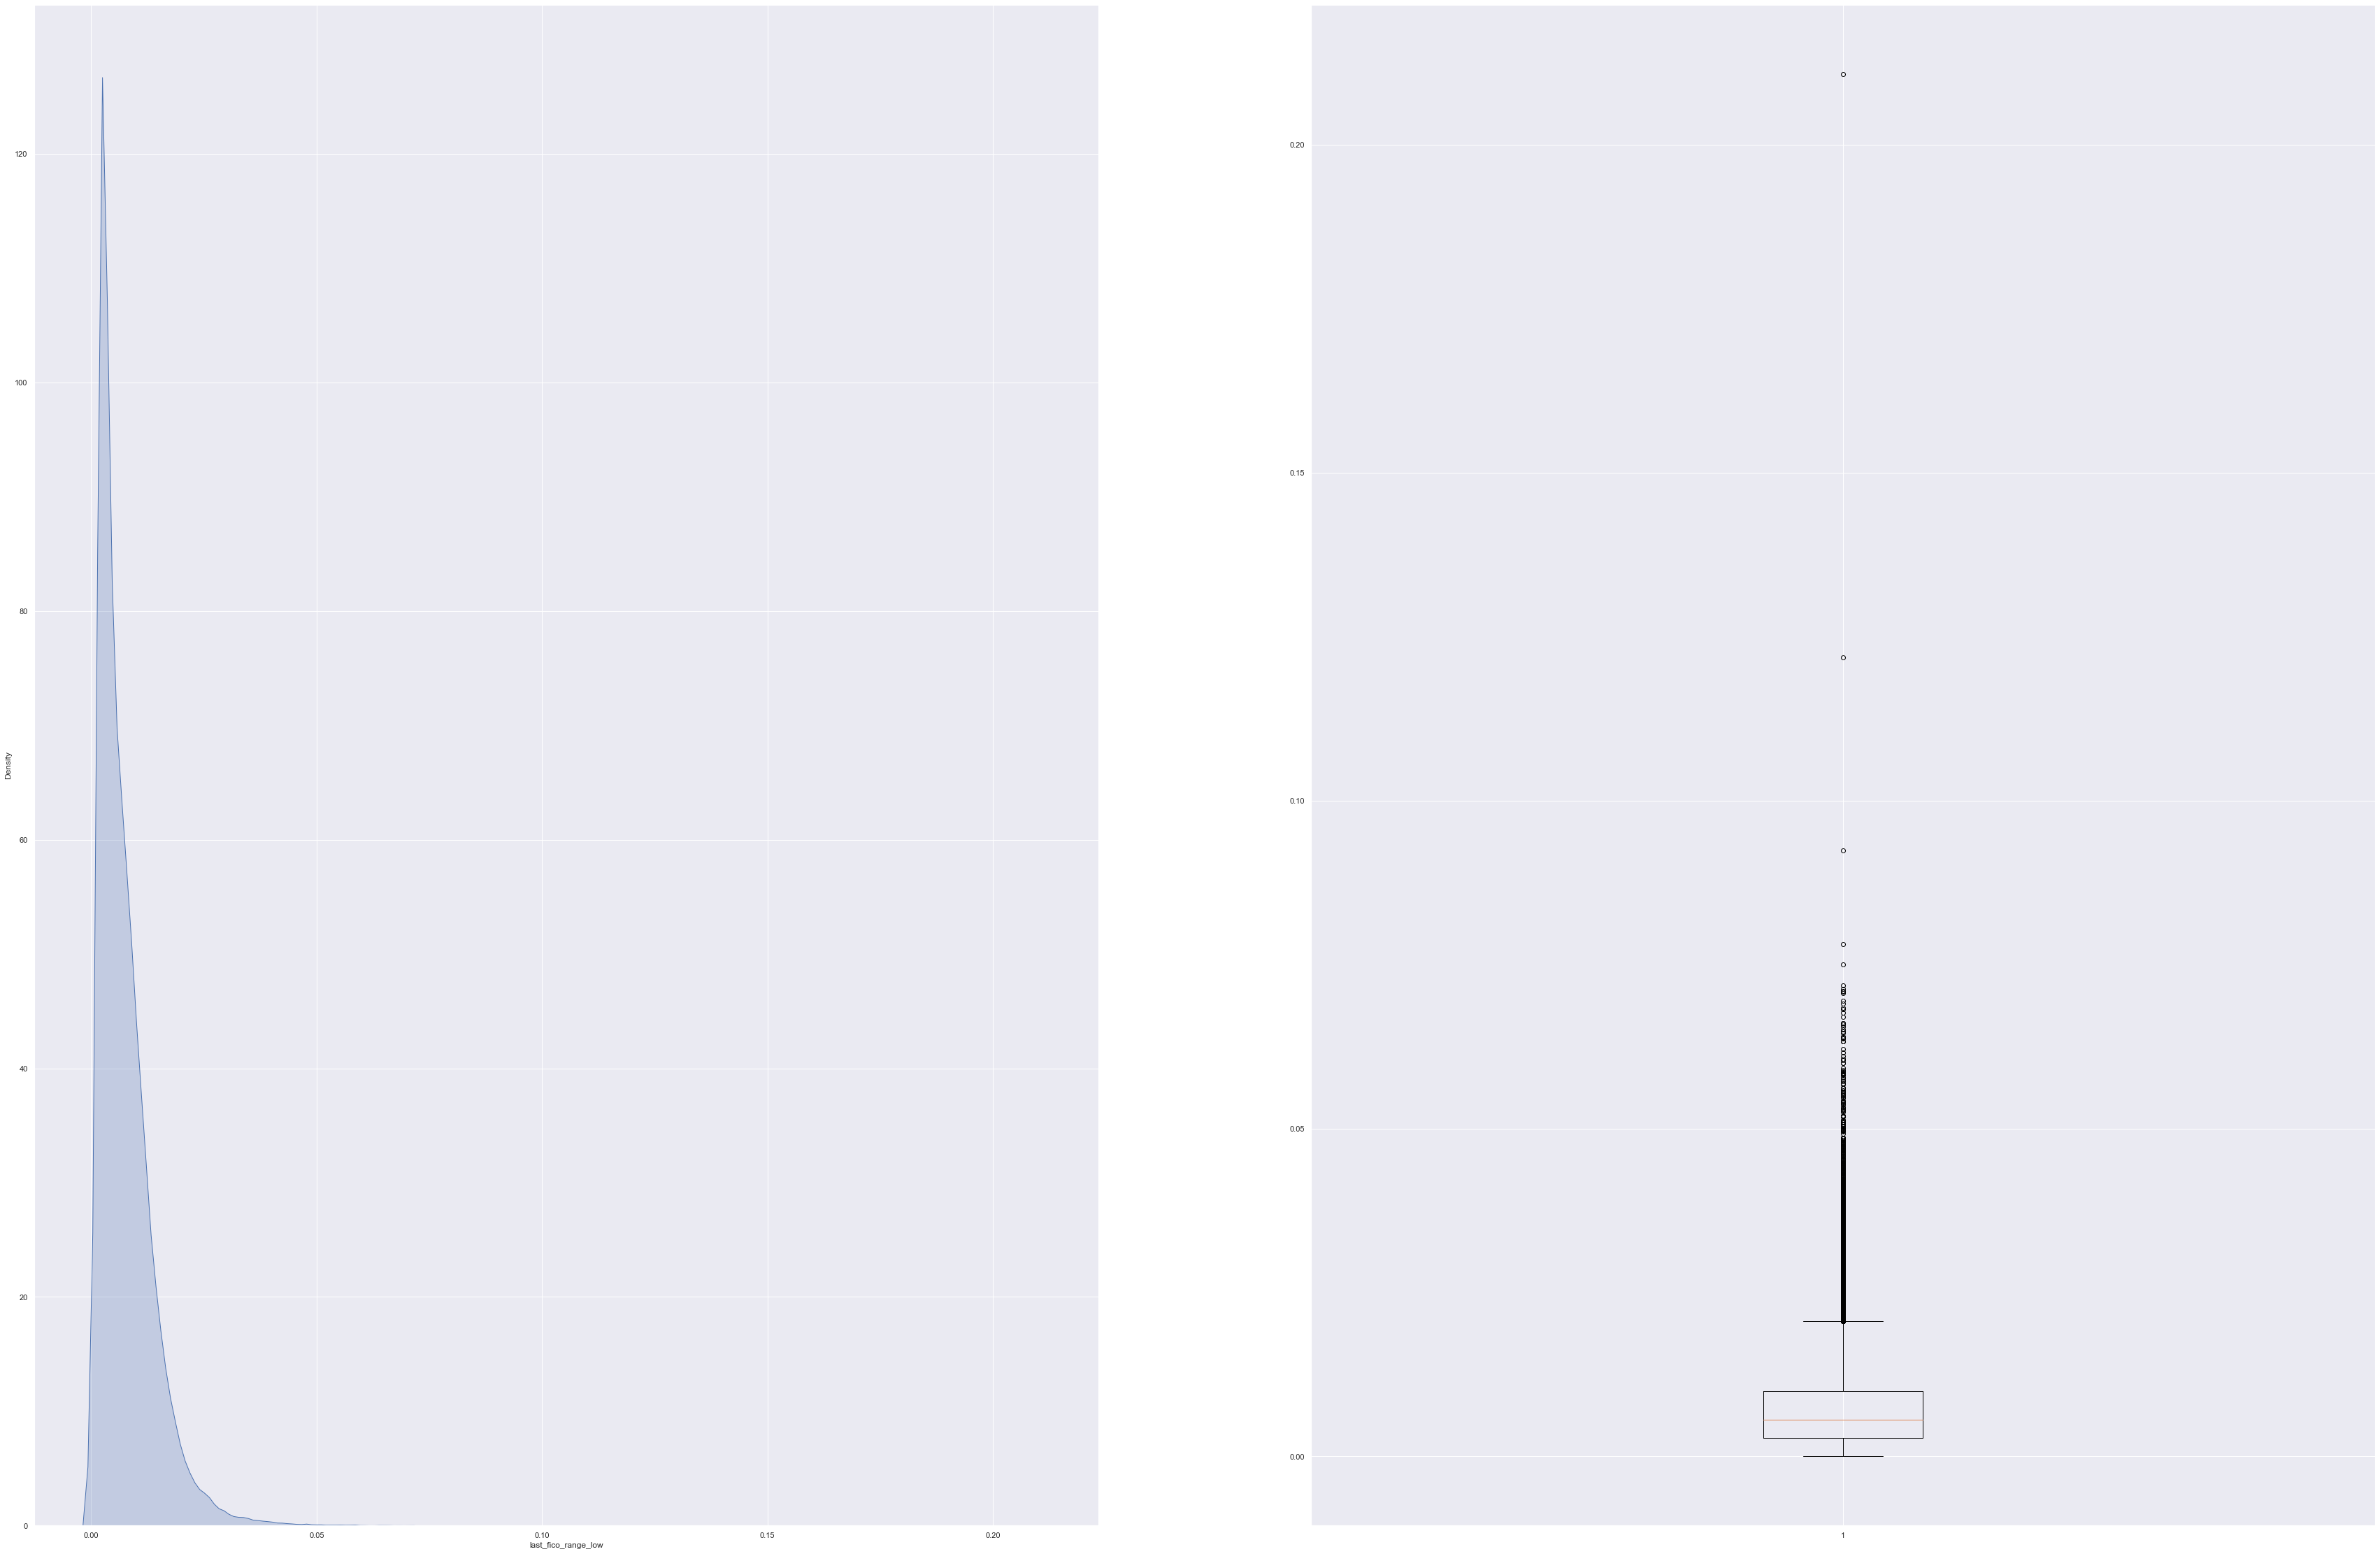

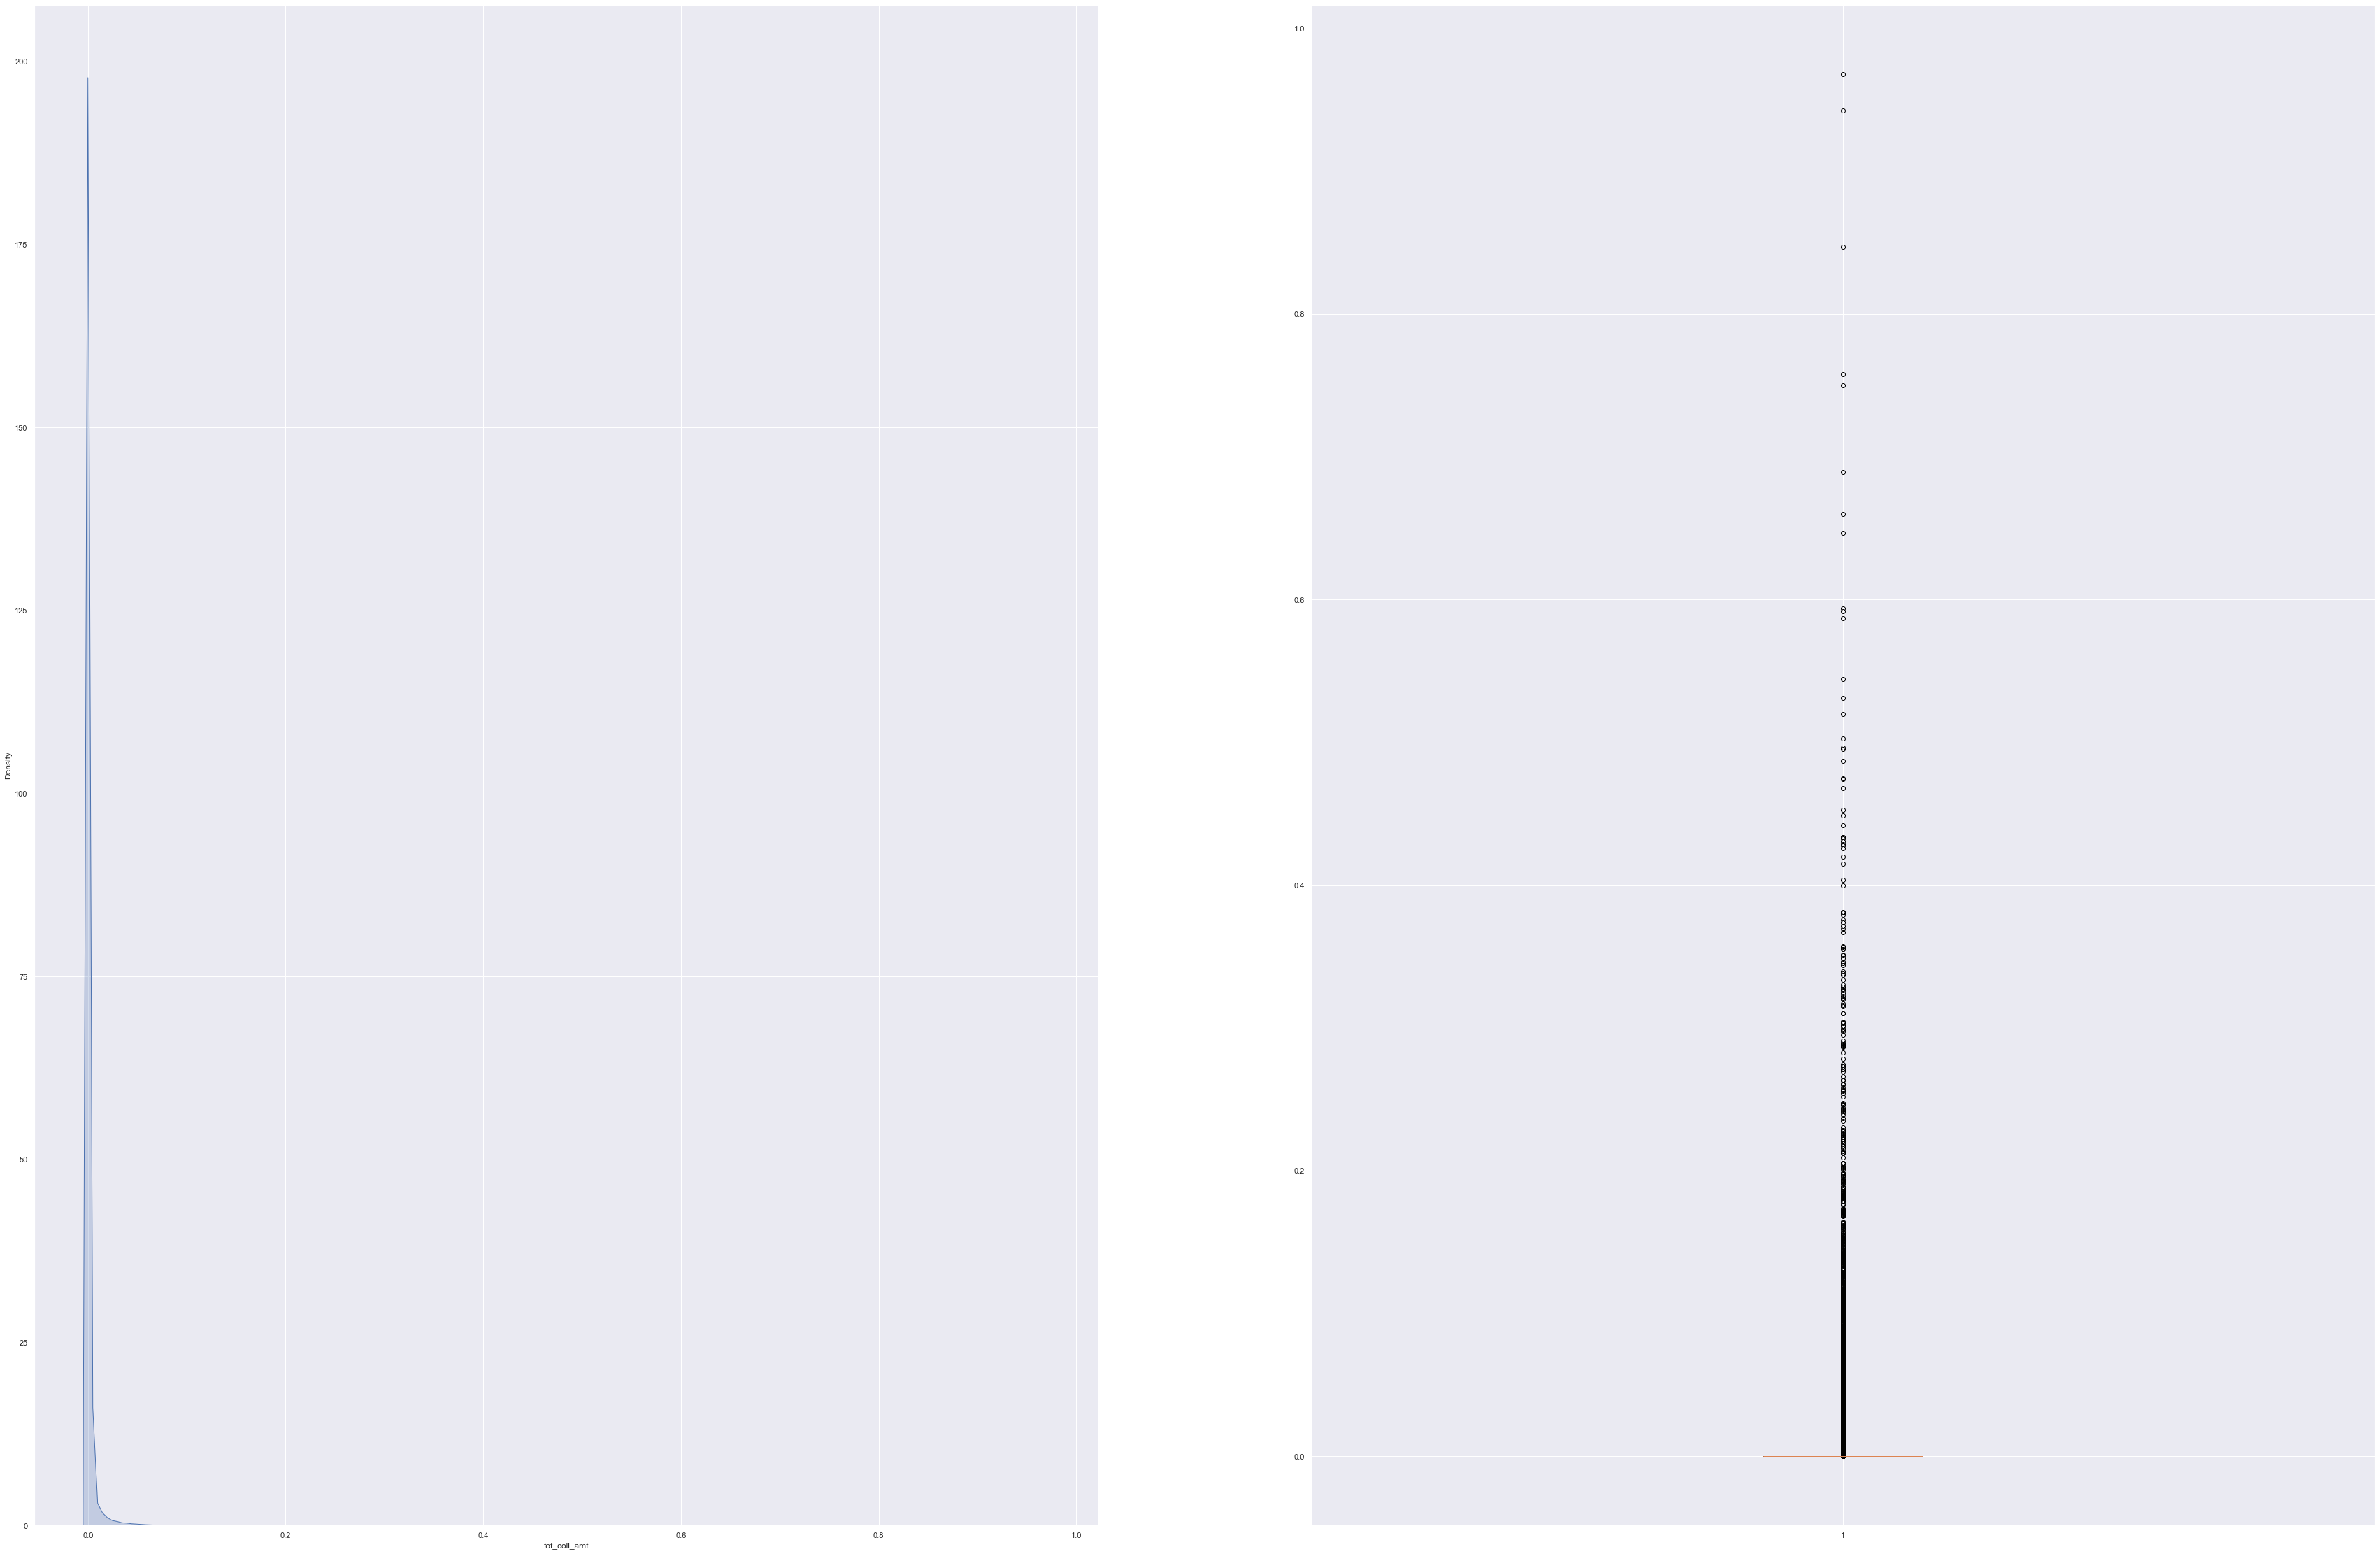

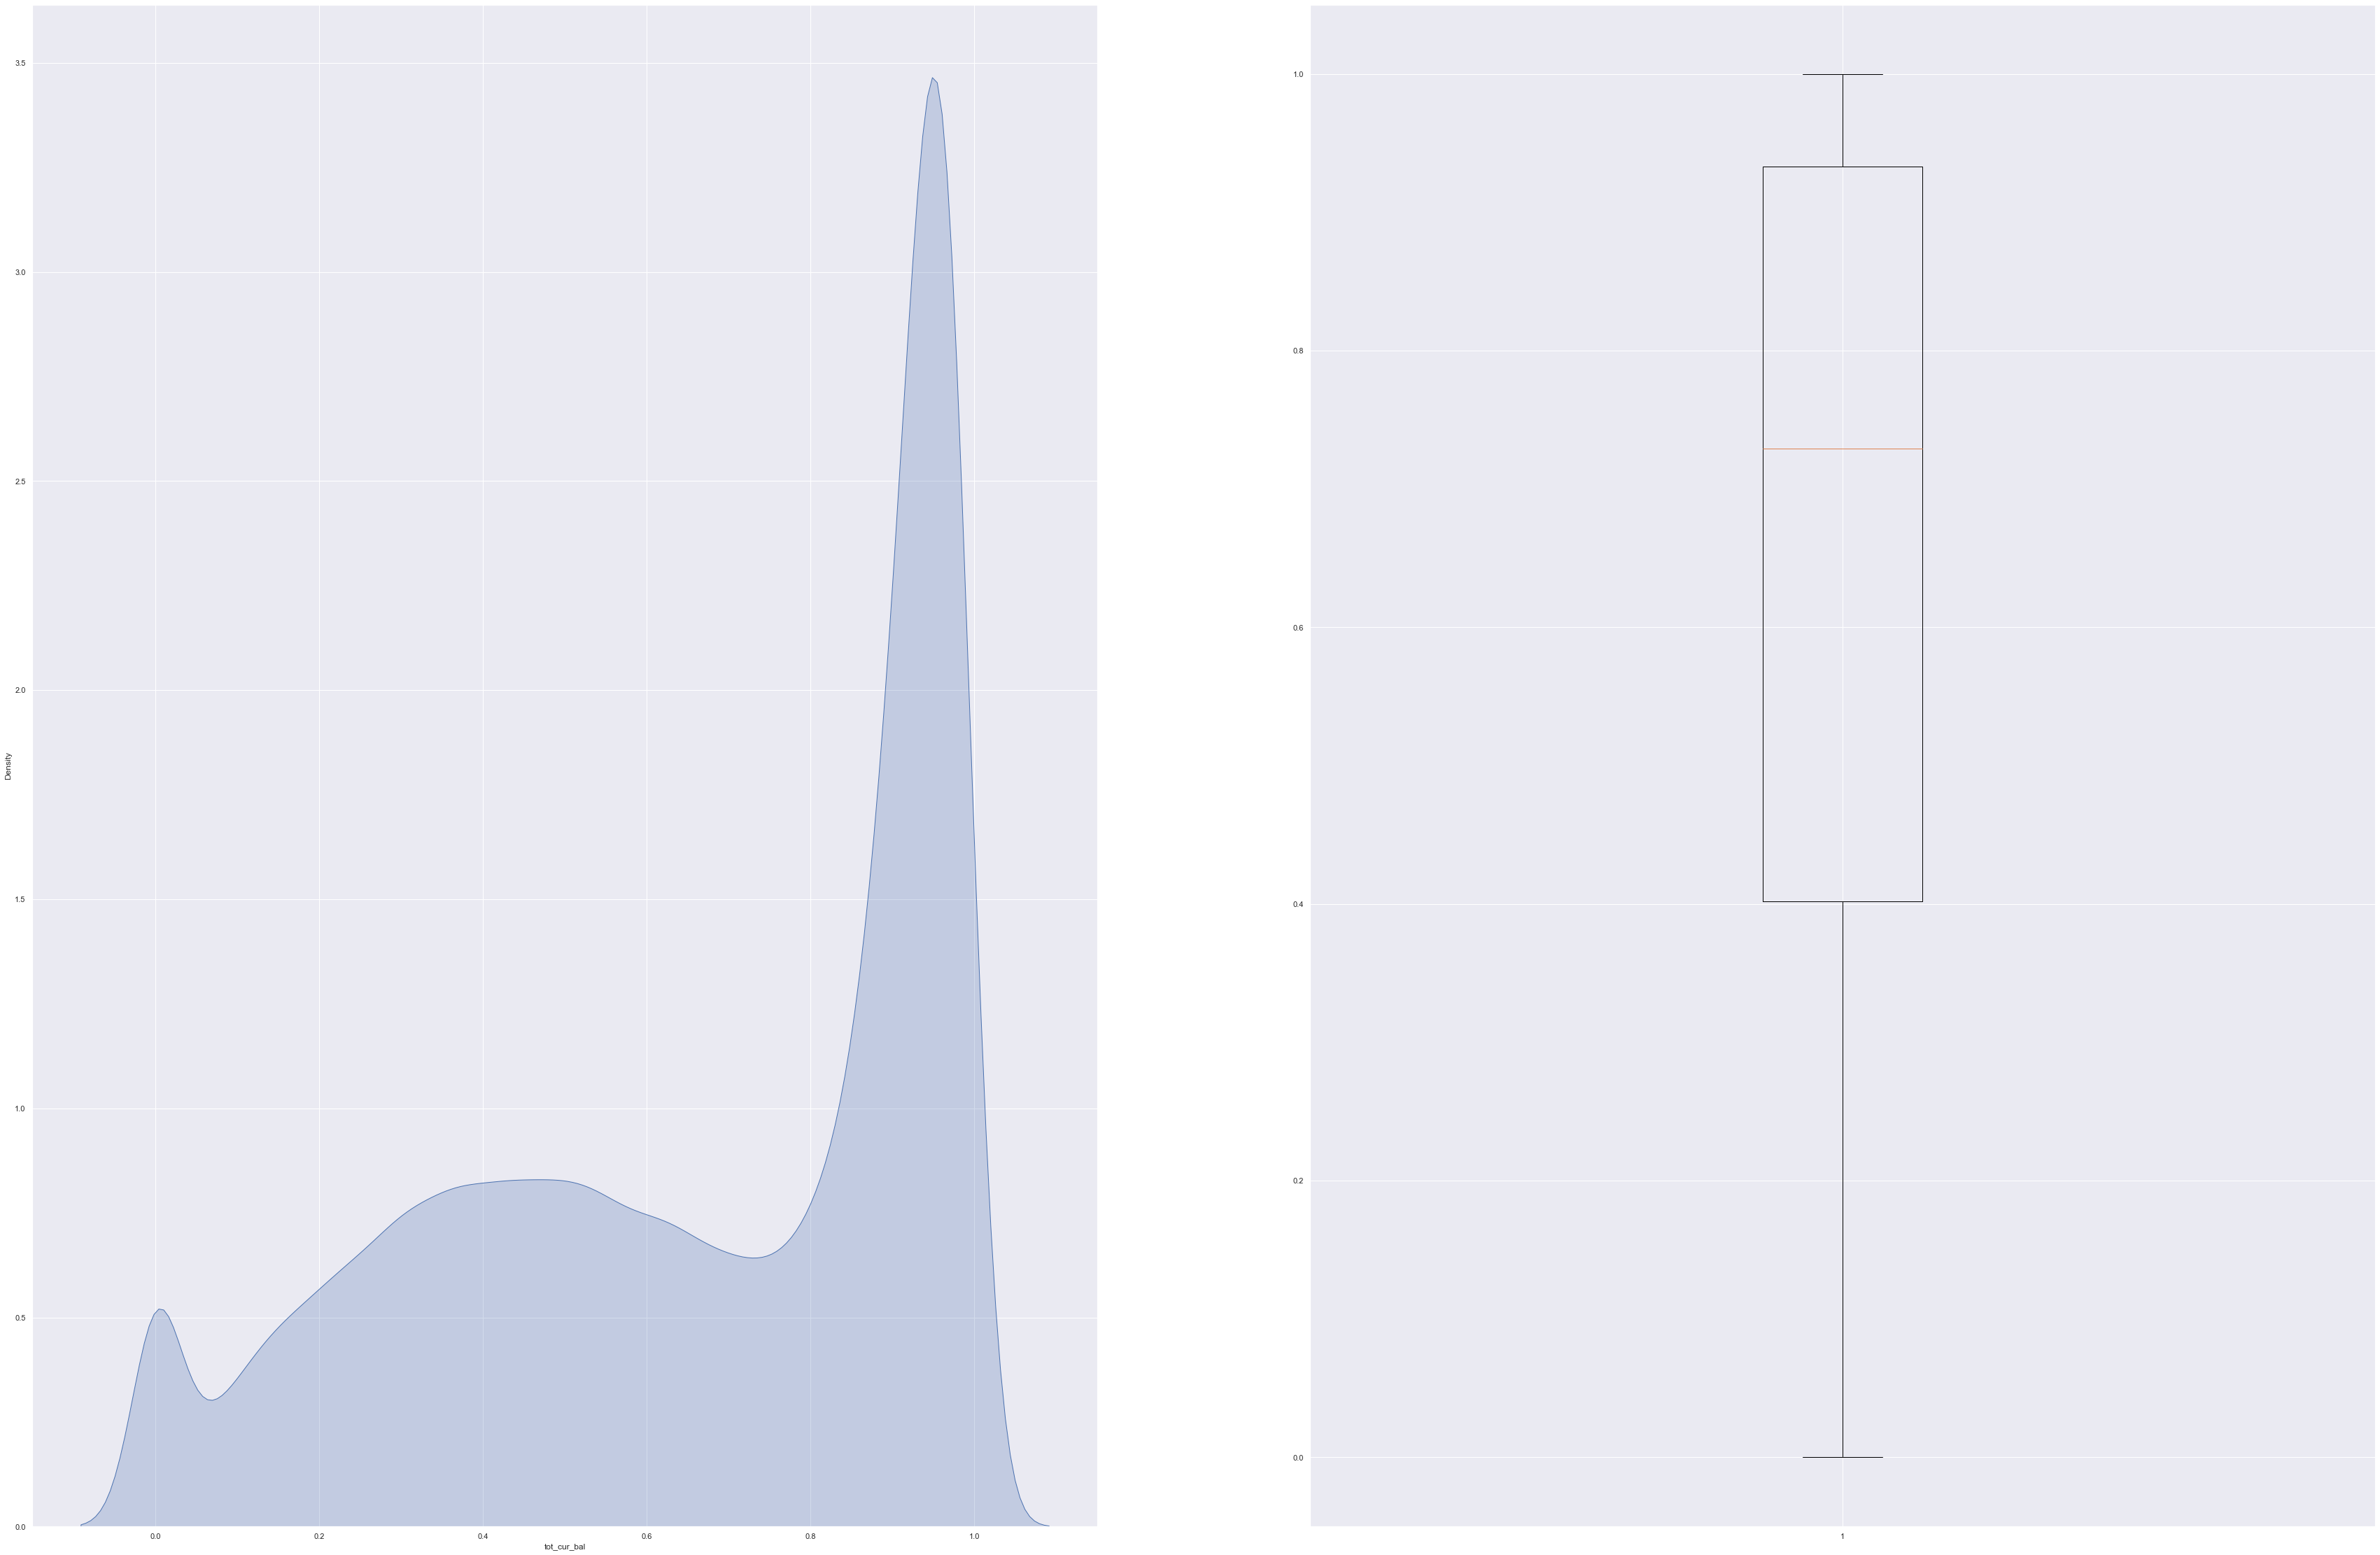

[None, None, None, None, None, None, None, None, None, None, None, None]

In [67]:
[Plot_Numerical_BoxandSub(df_num_norm[col]) for col in df_num_norm]

# 4.4. Target feature

In [68]:
df['loan_status'].value_counts()

Fully Paid                                             47160
Current                                                38603
Charged Off                                            11532
Late (31-120 days)                                       907
In Grace Period                                          370
Late (16-30 days)                                        180
Does not meet the credit policy. Status:Fully Paid       102
Does not meet the credit policy. Status:Charged Off       33
Default                                                    3
Name: loan_status, dtype: int64

In [69]:
y = df['loan_status'].copy()
y = y.isin(['Current', 'Fully Paid', 'In Grace Period']).astype('int')
y.value_counts()

1    86133
0    12757
Name: loan_status, dtype: int64

In [70]:
df_ratio = pd.DataFrame(y.value_counts())
df_ratio

loan_status
1        86133
0        12757

In [71]:
df_ratio['Ratio'] = df_ratio.loan_status/sum(df_ratio.loan_status)
df_ratio

loan_status     Ratio
1        86133  0.870998
0        12757  0.129002

In [72]:
df

loan_amnt        term  int_rate grade  emp_length home_ownership  \
0        20000.0   36 months     10.99     B         0.0       MORTGAGE   
1        16000.0   36 months     11.05     B        11.0       MORTGAGE   
2        25750.0   60 months     12.74     C         8.0       MORTGAGE   
3        20000.0   60 months     15.61     C        11.0       MORTGAGE   
4        16000.0   36 months     17.10     C         8.0       MORTGAGE   
...          ...         ...       ...   ...         ...            ...   
99995     9350.0   36 months     19.19     E         0.0           RENT   
99996    25000.0   60 months     21.48     E         9.0           RENT   
99997     4000.0   36 months     15.02     C        11.0       MORTGAGE   
99998    20250.0   36 months     12.29     C         1.0            OWN   
99999    18000.0   36 months     10.78     B         8.0       MORTGAGE   

       annual_inc verification_status  loan_status pymnt_plan  ... recoveries  \
0        140000.0        Not Verified   Fully Paid          n  ...       0.00   
1         74000.0     Source Verified   Fully Paid          n  ...       0.00   
2        105000.0        Not Verified  Charged Off          n  ...    3128.63   
3         85000.0     Source Verified  Charged Off          n  ...    1011.49   
4         44000.0     Source Verified   Fully Paid          n  ...       0.00   
...           ...                 ...          ...        ...  ...        ...   
99995     31200.0            Verified   Fully Paid          n  ...       0.00   
99996     49000.0            Verified  Charged Off          n  ...      30.28   
99997     82700.0        Not Verified      Current          n  ...       0.00   
99998     62000.0     Source Verified   Fully Paid          n  ...       0.00   
99999     70000.0        Not Verified  Charged Off          n  ...    1625.70   

      last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  application_type  \
0         Jan-2018         12602.19            Mar-2019        Individual   
1         Aug-2018         16108.04            Mar-2019        Individual   
2         Feb-2018           582.48            Sep-2018        Individual   
3         Oct-2016           482.23            Apr-2017        Individual   
4         Mar-2014         14437.28            Oct-2018        Individual   
...            ...              ...                 ...               ...   
99995     Jan-2017          6034.10            Jan-2017        Individual   
99996     Oct-2015           683.11            Feb-2017        Individual   
99997     Mar-2019           138.71            Mar-2019        Individual   
99998     Oct-2017          4666.74            Mar-2019        Individual   
99999     May-2016           587.43            Dec-2016        Individual   

      debt_settlement_flag  last_fico_range_high last_fico_range_low  \
0                        N                 574.0               570.0   
1                        N                 719.0               715.0   
2                        N                 624.0               620.0   
3                        N                 514.0               510.0   
4                        N                 689.0               685.0   
...                    ...                   ...                 ...   
99995                    N                 684.0               680.0   
99996                    N                 594.0               590.0   
99997                    N                 699.0               695.0   
99998                    N                 564.0               560.0   
99999                    N                 559.0               555.0   

      tot_coll_amt tot_cur_bal  
0              0.0    351251.0  
1            958.0     98611.0  
2              0.0     21926.0  
3              0.0    240046.0  
4              0.0    177022.0  
...            ...         ...  
99995          0.0     68046.0  
99996          0.0         0.0  
99997          0.0    313577.0  
99998        

# 5. Model Building

In [73]:
X_mod = df[df.grade == 'E'].copy()
# X_mod = X_mod.drop(['grade', 'int_rate'], axis=1, errors='ignore')
X_mod = X_mod.drop(['grade', 'int_rate','loan_status'], axis=1, errors='ignore')


y_mod = y[X_mod.index]

X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, stratify=y_mod, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=0)

# CatboostModel

In [74]:
cat_feat_ind = (X_train.dtypes == 'object')

In [75]:
X_train.select_dtypes('object').columns.values

array(['term', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'zip_code', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'debt_settlement_flag'], dtype=object)

In [76]:
cat_feat_ind = (X_train.select_dtypes('object').columns.values)
# cat_feat_ind = (X_train.dtypes == 'object')
pool_train = Pool(X_train, y_train, cat_features=cat_feat_ind)
pool_val = Pool(X_val, y_val, cat_features=cat_feat_ind)
pool_test = Pool(X_test, y_test, cat_features=cat_feat_ind)

n = y_train.value_counts()
model = CatBoostClassifier(learning_rate=0.03,
                           iterations=1000,
                           early_stopping_rounds=100,
                           class_weights=[1, n[0] / n[1]],
                           verbose=False,
                           random_state=0)
model.fit(pool_train, eval_set=pool_val, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy (test): 0.968
Precision (test): 0.977
Recall (test): 0.978


<AxesSubplot:>

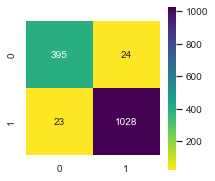

In [77]:
# Testing Data Accuracy
y_pred_test = model.predict(pool_test)

acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')

cm = confusion_matrix(y_test, y_pred_test)
Set_plot()
plt.figure(figsize=(3,3))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)

Accuracy (test): 0.996
Precision (test): 0.998
Recall (test): 0.996


<AxesSubplot:>

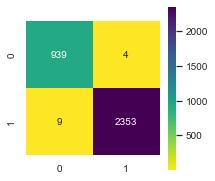

In [78]:
# Training Data Accuracy
y_pred_train = model.predict(pool_train)

acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
print(f'''Accuracy (test): {acc_train:.3f}
Precision (test): {prec_train:.3f}
Recall (test): {rec_train:.3f}''')

cm = confusion_matrix(y_train, y_pred_train)
Set_plot()
plt.figure(figsize=(3,3))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)

# Pickel and Json file Creation

In [79]:
label_encoding = {'target': {0 : 'Not Suitable for Lending', 1 : 'Suitable for Lending'},
               'columns' : list(X_mod.columns.values)
                 }
label_encoding

{'target': {0: 'Not Suitable for Lending', 1: 'Suitable for Lending'},
 'columns': ['loan_amnt',
  'term',
  'emp_length',
  'home_ownership',
  'annual_inc',
  'verification_status',
  'pymnt_plan',
  'purpose',
  'zip_code',
  'total_acc',
  'total_pymnt',
  'recoveries',
  'last_pymnt_d',
  'last_pymnt_amnt',
  'last_credit_pull_d',
  'application_type',
  'debt_settlement_flag',
  'last_fico_range_high',
  'last_fico_range_low',
  'tot_coll_amt',
  'tot_cur_bal']}

In [80]:
import pickle

In [81]:
with open('Financial_Risk_CatBoost.pkl','wb') as f: # Dumping into Pickle file
    pickle.dump(model,f)

In [82]:
import json

In [83]:
with open('project_data.json','w') as f:
    json.dump(label_encoding,f)

### Evaluation By Passing Single Record

In [84]:
# Object Data Types
list_obj = ['term', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'zip_code', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'debt_settlement_flag']

In [85]:
loan_amnt = 257.0
term      = '60 months'
emp_length = 8.0
home_ownership = 'MORTGAGE'
annual_inc = 105000.0
verification_status = 'Not Verified'
pymnt_plan = 'n'
purpose = 'credit_card'
zip_code = '352xx'
total_acc = 27.0
total_pymnt = 8935.2
recoveries = 3128.63
last_pymnt_d = 'Feb-2018'
last_pymnt_amnt = 582.48
last_credit_pull_d = 'Sep-2018'
application_type = 'Individual'
debt_settlement_flag = 'N'
last_fico_range_high = 624.0
last_fico_range_low = 620.0
tot_coll_amt = 0.0
tot_cur_bal = 21926.0

In [86]:
df.loan_amnt[99999]#19299

18000.0

In [87]:
# df_loc_index.iloc[1][2]

In [88]:
index = 2
df_loc_index = pd.DataFrame(df.iloc[index])
df_loc_index

2
loan_amnt                  25750.0
term                     60 months
int_rate                     12.74
grade                            C
emp_length                     8.0
home_ownership            MORTGAGE
annual_inc                105000.0
verification_status   Not Verified
loan_status            Charged Off
pymnt_plan                       n
purpose                credit_card
zip_code                     352xx
total_acc                     27.0
total_pymnt                 8935.2
recoveries                 3128.63
last_pymnt_d              Feb-2018
last_pymnt_amnt             582.48
last_credit_pull_d        Sep-2018
application_type        Individual
debt_settlement_flag             N
last_fico_range_high         624.0
last_fico_range_low          620.0
tot_coll_amt                   0.0
tot_cur_bal                21926.0

In [89]:
df_loc_index.index.values

array(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'total_acc',
       'total_pymnt', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'debt_settlement_flag',
       'last_fico_range_high', 'last_fico_range_low', 'tot_coll_amt',
       'tot_cur_bal'], dtype=object)

In [90]:
dic_loc_index = {}
for i,val in enumerate(df_loc_index.index.values):
    print(i,val)
    dic_loc_index[val] = df_loc_index.iloc[i]

0 loan_amnt
1 term
2 int_rate
3 grade
4 emp_length
5 home_ownership
6 annual_inc
7 verification_status
8 loan_status
9 pymnt_plan
10 purpose
11 zip_code
12 total_acc
13 total_pymnt
14 recoveries
15 last_pymnt_d
16 last_pymnt_amnt
17 last_credit_pull_d
18 application_type
19 debt_settlement_flag
20 last_fico_range_high
21 last_fico_range_low
22 tot_coll_amt
23 tot_cur_bal


In [91]:
index= X_mod.select_dtypes('number').columns.get_loc("tot_cur_bal")
index

10

In [92]:
# test_array = np.zeros(len((X_train.columns))-(X_train.select_dtypes('object').shape[1]))
# print(len(test_array))
# print(test_array) # Test Array Numerical(int)
test_list_cat = ['' for i in range((X_mod).shape[1])]
# test_list_cat

In [93]:
X_mod.columns.get_loc("annual_inc")

4

In [94]:
X_mod.columns.get_loc('debt_settlement_flag')

16

In [95]:
label_encoding['columns'].index('debt_settlement_flag')

16

In [96]:
# Numerical
test_list_cat[X_mod.columns.get_loc("loan_amnt")] =    loan_amnt 
test_list_cat[X_mod.columns.get_loc("emp_length")] =  emp_length 
test_list_cat[X_mod.columns.get_loc("annual_inc")] =  annual_inc 
test_list_cat[X_mod.columns.get_loc("total_acc")] =  total_acc 
test_list_cat[X_mod.columns.get_loc("total_pymnt")] =  total_pymnt 
test_list_cat[X_mod.columns.get_loc("recoveries")] =    recoveries 
test_list_cat[X_mod.columns.get_loc("last_pymnt_amnt")] =    last_pymnt_amnt 
test_list_cat[X_mod.columns.get_loc("last_fico_range_high")] =    last_fico_range_high 
test_list_cat[X_mod.columns.get_loc("last_fico_range_low")] =    last_fico_range_low 
test_list_cat[X_mod.columns.get_loc("tot_coll_amt")] =    tot_coll_amt 
test_list_cat[X_mod.columns.get_loc("tot_cur_bal")] =    tot_cur_bal 

# Categorical
test_list_cat[X_mod.columns.get_loc("term")] =    term
test_list_cat[X_mod.columns.get_loc("home_ownership")] =    home_ownership
test_list_cat[X_mod.columns.get_loc("verification_status")] =    verification_status 
test_list_cat[X_mod.columns.get_loc("pymnt_plan")] =    pymnt_plan 
test_list_cat[X_mod.columns.get_loc("purpose")] =    purpose 
test_list_cat[X_mod.columns.get_loc("zip_code")] =    zip_code 
test_list_cat[X_mod.columns.get_loc("last_pymnt_d")] =    last_pymnt_d 
test_list_cat[X_mod.columns.get_loc("last_credit_pull_d")] =    last_credit_pull_d 
test_list_cat[X_mod.columns.get_loc("application_type")] =    application_type 
test_list_cat[X_mod.columns.get_loc("debt_settlement_flag")] =    debt_settlement_flag 

In [97]:
test_list_cat[0] = loan_amnt
test_list_cat[1] = term
test_list_cat[2] = emp_length
test_list_cat[3] = home_ownership
test_list_cat[4] = annual_inc
test_list_cat[5] = verification_status
test_list_cat[6] = pymnt_plan
test_list_cat[7] = purpose
test_list_cat[8] = zip_code
test_list_cat[9] = total_acc
test_list_cat[10] = total_pymnt
test_list_cat[11] = recoveries
test_list_cat[12] = last_pymnt_d
test_list_cat[13] = last_pymnt_amnt
test_list_cat[14] = last_credit_pull_d
test_list_cat[15] = application_type
test_list_cat[16] = debt_settlement_flag
test_list_cat[17] = last_fico_range_high
test_list_cat[18] = last_fico_range_low
test_list_cat[19] = tot_coll_amt
test_list_cat[20] = tot_cur_bal

In [98]:
type(test_list_cat[2])

float

In [99]:
y_pred_test = model.predict(test_list_cat)
label_encoding['target'][y_pred_test]

'Not Suitable for Lending'

In [100]:
df.loan_status.value_counts()

Fully Paid                                             47160
Current                                                38603
Charged Off                                            11532
Late (31-120 days)                                       907
In Grace Period                                          370
Late (16-30 days)                                        180
Does not meet the credit policy. Status:Fully Paid       102
Does not meet the credit policy. Status:Charged Off       33
Default                                                    3
Name: loan_status, dtype: int64

In [101]:
df.loan_status.value_counts()

Fully Paid                                             47160
Current                                                38603
Charged Off                                            11532
Late (31-120 days)                                       907
In Grace Period                                          370
Late (16-30 days)                                        180
Does not meet the credit policy. Status:Fully Paid       102
Does not meet the credit policy. Status:Charged Off       33
Default                                                    3
Name: loan_status, dtype: int64

In [102]:
np.where(df.loan_status=='Charged Off')


(array([    2,     3,    17, ..., 98876, 98886, 98889], dtype=int64),)